<a href="https://colab.research.google.com/github/urosgodnov/BigData/blob/master/Merged_Pandas_Scikit_Learn_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import io
from google.colab import files
from IPython.display import display

# Recipes
* [Dissecting the anatomy of a DataFrame](#Dissecting-the-anatomy-of-a-DataFrame)
* [Accessing the main DataFrame components](#Accessing-the-main-DataFrame-components)
* [Understanding data types](#Understanding-data-types)
* [Selecting a single Series](#Selecting-a-single-Series)
* [Calling Series methods](#Calling-Series-methods)
* [Working with operators on a Series](#Working-with-operators-on-a-Series)
* [Chaining Series methods together](#Chaining-Series-methods-together)
* [Making a meaningful index](#Making-a-meaningful-index)
* [Renaming row and column labels](#Renaming-row-and-column-labels)
* [Creating and deleting columns](#Creating-and-deleting-columns)

## change options for each recipe

In [6]:
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)

In [3]:
#uploaded = files.upload()

Saving movie.csv to movie.csv


# Dissecting the anatomy of a DataFrame

In [7]:


movie=pd.read_csv(io.BytesIO(uploaded['movie.csv']))
movie.head()

color      director_name  num_critic_for_reviews  duration  ...  \
0  Color      James Cameron                   723.0     178.0  ...   
1  Color     Gore Verbinski                   302.0     169.0  ...   
2  Color         Sam Mendes                   602.0     148.0  ...   
3  Color  Christopher Nolan                   813.0     164.0  ...   
4    NaN        Doug Walker                     NaN       NaN  ...   

   actor_2_facebook_likes  imdb_score aspect_ratio  movie_facebook_likes  
0                   936.0         7.9         1.78                 33000  
1                  5000.0         7.1         2.35                     0  
2                   393.0         6.8         2.35                 85000  
3                 23000.0         8.5         2.35                164000  
4                    12.0         7.1          NaN                     0  

[5 rows x 28 columns]

# Accessing the main DataFrame components

In [8]:
columns = movie.columns
index = movie.index
data = movie.values

In [9]:
columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
index

RangeIndex(start=0, stop=4916, step=1)

In [ ]:
data

array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
       ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
       ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
       ..., 
       ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, nan, 16],
       ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
       ['Color', 'Jon Gunn', 43.0, ..., 6.6, 1.85, 456]], dtype=object)

In [ ]:
issubclass(pd.RangeIndex, pd.Index)

True

## There's more

In [ ]:
index.values

array([   0,    1,    2, ..., 4913, 4914, 4915])

In [ ]:
columns.values

array(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'], dtype=object)

# Understanding data types

In [10]:
movie.dtypes

color                       object
director_name               object
num_critic_for_reviews     float64
duration                   float64
director_facebook_likes    float64
                            ...   
title_year                 float64
actor_2_facebook_likes     float64
imdb_score                 float64
aspect_ratio               float64
movie_facebook_likes         int64
Length: 28, dtype: object

In [12]:
movie.dtypes.value_counts()

float64    13
object     12
int64       3
dtype: int64

# Selecting a single Series

In [ ]:
movie['director_name']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [13]:
type(movie['director_name'])

pandas.core.series.Series

# There's more

In [14]:
director = movie['director_name'] # save Series to variable
director.name

'director_name'

In [ ]:
director.to_frame().head()

director_name
0      James Cameron
1     Gore Verbinski
2         Sam Mendes
3  Christopher Nolan
4        Doug Walker

# Calling Series methods

## Getting ready...

In [15]:
s_attr_methods = set(dir(pd.Series))
len(s_attr_methods)

422

In [16]:
df_attr_methods = set(dir(pd.DataFrame))
len(df_attr_methods)

437

In [17]:
len(s_attr_methods & df_attr_methods)

367

## How to do it...

In [ ]:
director = movie['director_name']
actor_1_fb_likes = movie['actor_1_facebook_likes']

In [ ]:
director.head()

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4          Doug Walker
Name: director_name, dtype: object

In [ ]:
actor_1_fb_likes.head()

0     1000.0
1    40000.0
2    11000.0
3    27000.0
4      131.0
Name: actor_1_facebook_likes, dtype: float64

In [21]:
with pd.option_context('display.max_rows', 8):
    display(director.value_counts())

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
                    ..
Luca Guadagnino      1
Sam Fell             1
Dan Fogelman         1
Daniel Hsia          1
Name: director_name, Length: 2397, dtype: int64

In [22]:
director.size

4916

In [ ]:
director.shape

(4916,)

In [ ]:
len(director)

4916

In [ ]:
director.count()

4814

In [ ]:
actor_1_fb_likes.count()

4909

In [ ]:
actor_1_fb_likes.describe()

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [ ]:
director.isnull()

0       False
1       False
2       False
3       False
        ...  
4912     True
4913    False
4914    False
4915    False
Name: director_name, Length: 4916, dtype: bool

In [ ]:
actor_1_fb_likes_filled = actor_1_fb_likes.fillna(0)
actor_1_fb_likes_filled.count()

4916

In [ ]:
actor_1_fb_likes_dropped = actor_1_fb_likes.dropna()
actor_1_fb_likes_dropped.size

4909

## There's more...

In [ ]:
director.value_counts(normalize=True)

Steven Spielberg    0.005401
Woody Allen         0.004570
Martin Scorsese     0.004155
Clint Eastwood      0.004155
                      ...   
Benny Boom          0.000208
Alister Grierson    0.000208
Tadeo Garcia        0.000208
Julio DePietro      0.000208
Name: director_name, Length: 2397, dtype: float64

In [ ]:
director.hasnans

True

In [ ]:
director.notnull()

0        True
1        True
2        True
3        True
        ...  
4912    False
4913     True
4914     True
4915     True
Name: director_name, Length: 4916, dtype: bool

In [ ]:
director.describe()

count                 4814
unique                2397
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

# Working with operators on a Series

In [24]:

imdb_score = movie['imdb_score']
imdb_score

0       7.9
1       7.1
2       6.8
3       8.5
4       7.1
       ... 
4911    7.7
4912    7.5
4913    6.3
4914    6.3
4915    6.6
Name: imdb_score, Length: 4916, dtype: float64

In [ ]:
imdb_score + 1

0       8.9
1       8.1
2       7.8
       ... 
4913    7.3
4914    7.3
4915    7.6
Name: imdb_score, Length: 4916, dtype: float64

In [ ]:
imdb_score * 2.5

0       19.75
1       17.75
2       17.00
        ...  
4913    15.75
4914    15.75
4915    16.50
Name: imdb_score, Length: 4916, dtype: float64

In [ ]:
imdb_score // 7

0       1.0
1       1.0
2       0.0
       ... 
4913    0.0
4914    0.0
4915    0.0
Name: imdb_score, Length: 4916, dtype: float64

In [ ]:
imdb_score > 7

0        True
1        True
2       False
        ...  
4913    False
4914    False
4915    False
Name: imdb_score, Length: 4916, dtype: bool

In [ ]:
director = movie['director_name']

In [ ]:
director == 'James Cameron'

0        True
1       False
2       False
        ...  
4913    False
4914    False
4915    False
Name: director_name, Length: 4916, dtype: bool

## There's more...

In [ ]:
imdb_score.add(1)              # imdb_score + 1

0       8.9
1       8.1
2       7.8
       ... 
4913    7.3
4914    7.3
4915    7.6
Name: imdb_score, Length: 4916, dtype: float64

In [ ]:
imdb_score.mul(2.5)            # imdb_score * 2.5

0       19.75
1       17.75
2       17.00
        ...  
4913    15.75
4914    15.75
4915    16.50
Name: imdb_score, Length: 4916, dtype: float64

In [ ]:
imdb_score.floordiv(7)         # imdb_score // 7

0       1.0
1       1.0
2       0.0
       ... 
4913    0.0
4914    0.0
4915    0.0
Name: imdb_score, Length: 4916, dtype: float64

In [ ]:
imdb_score.gt(7)               # imdb_score > 7

0        True
1        True
2       False
        ...  
4913    False
4914    False
4915    False
Name: imdb_score, Length: 4916, dtype: bool

In [ ]:
director.eq('James Cameron')   # director == 'James Cameron'

0        True
1       False
2       False
        ...  
4913    False
4914    False
4915    False
Name: director_name, Length: 4916, dtype: bool

In [ ]:
imdb_score.astype(int).mod(5)

0       2
1       2
2       1
       ..
4913    1
4914    1
4915    1
Name: imdb_score, Length: 4916, dtype: int64

# Chaining Series methods together

In [ ]:
#movied=pd.read_csv(io.BytesIO(uploaded['movie.csv']))
actor_1_fb_likes = movie['actor_1_facebook_likes']
director = movie['director_name']

In [ ]:
director.value_counts().head(3)

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Name: director_name, dtype: int64

In [ ]:
actor_1_fb_likes.isnull().sum()

7

In [ ]:
actor_1_fb_likes.dtype

dtype('float64')

In [ ]:
actor_1_fb_likes.fillna(0)\
                .astype(int)\
                .head()

0     1000
1    40000
2    11000
3    27000
4      131
Name: actor_1_facebook_likes, dtype: int64

## There's more...

In [ ]:
actor_1_fb_likes.isnull().mean()

0.0014239218877135883

In [ ]:
(actor_1_fb_likes.fillna(0)
                 .astype(int)
                 .head())

0     1000
1    40000
2    11000
3    27000
4      131
Name: actor_1_facebook_likes, dtype: int64

# Making a meaningful index

In [ ]:
movie = pd.read_csv('data/movie.csv')

In [ ]:
movie.shape

(4916, 28)

In [ ]:
movie2 = movie.set_index('movie_title')
movie2

color     director_name  \
movie_title                                                         
Avatar                                    Color     James Cameron   
Pirates of the Caribbean: At World's End  Color    Gore Verbinski   
Spectre                                   Color        Sam Mendes   
...                                         ...               ...   
A Plague So Pleasant                      Color  Benjamin Roberds   
Shanghai Calling                          Color       Daniel Hsia   
My Date with Drew                         Color          Jon Gunn   

                                          num_critic_for_reviews  duration  \
movie_title                                                                  
Avatar                                                     723.0     178.0   
Pirates of the Caribbean: At World's End                   302.0     169.0   
Spectre                                                    602.0     148.0   
...                                                          ...       ...   
A Plague So Pleasant                                        13.0      76.0   
Shanghai Calling                                            14.0     100.0   
My Date with Drew                                           43.0      90.0   

                                                  ...           \
movie_title                                       ...            
Avatar                                            ...            
Pirates of the Caribbean: At World's End          ...            
Spectre                                           ...            
...                                               ...            
A Plague So Pleasant                              ...            
Shanghai Calling                                  ...            
My Date with Drew                                 ...            

                                          actor_2_facebook_likes  imdb_score  \
movie_title                                                                    
Avatar                                                     936.0         7.9   
Pirates of the Caribbean: At World's End                  5000.0         7.1   
Spectre                                                    393.0         6.8   
...                                                          ...         ...   
A Plague So Pleasant                                         0.0         6.3   
Shanghai Calling                                           719.0         6.3   
My Date with Drew                                           23.0         6.6   

                                         aspect_ratio  movie_facebook_likes  
movie_title                                                                  
Avatar                                           1.78                 33000  
Pirates of the Caribbean: At World's End         2.35                     0  
Spectre                                          2.35                 85000  
...                                               ...                   ...  
A Plague So Pleasant                              NaN                    16  
Shanghai Calling                                 2.35                   660  
My Date with Drew                                1.85                   456  

[4916 rows x 27 columns]

In [ ]:
pd.read_csv('data/movie.csv', index_col='movie_title')

color     director_name  \
movie_title                                                         
Avatar                                    Color     James Cameron   
Pirates of the Caribbean: At World's End  Color    Gore Verbinski   
Spectre                                   Color        Sam Mendes   
...                                         ...               ...   
A Plague So Pleasant                      Color  Benjamin Roberds   
Shanghai Calling                          Color       Daniel Hsia   
My Date with Drew                         Color          Jon Gunn   

                                          num_critic_for_reviews  duration  \
movie_title                                                                  
Avatar                                                     723.0     178.0   
Pirates of the Caribbean: At World's End                   302.0     169.0   
Spectre                                                    602.0     148.0   
...                                                          ...       ...   
A Plague So Pleasant                                        13.0      76.0   
Shanghai Calling                                            14.0     100.0   
My Date with Drew                                           43.0      90.0   

                                                  ...           \
movie_title                                       ...            
Avatar                                            ...            
Pirates of the Caribbean: At World's End          ...            
Spectre                                           ...            
...                                               ...            
A Plague So Pleasant                              ...            
Shanghai Calling                                  ...            
My Date with Drew                                 ...            

                                          actor_2_facebook_likes  imdb_score  \
movie_title                                                                    
Avatar                                                     936.0         7.9   
Pirates of the Caribbean: At World's End                  5000.0         7.1   
Spectre                                                    393.0         6.8   
...                                                          ...         ...   
A Plague So Pleasant                                         0.0         6.3   
Shanghai Calling                                           719.0         6.3   
My Date with Drew                                           23.0         6.6   

                                         aspect_ratio  movie_facebook_likes  
movie_title                                                                  
Avatar                                           1.78                 33000  
Pirates of the Caribbean: At World's End         2.35                     0  
Spectre                                          2.35                 85000  
...                                               ...                   ...  
A Plague So Pleasant                              NaN                    16  
Shanghai Calling                                 2.35                   660  
My Date with Drew                                1.85                   456  

[4916 rows x 27 columns]

# There's more...

In [ ]:
movie2.reset_index()

movie_title  color     director_name  \
0                                       Avatar  Color     James Cameron   
1     Pirates of the Caribbean: At World's End  Color    Gore Verbinski   
2                                      Spectre  Color        Sam Mendes   
...                                        ...    ...               ...   
4913                      A Plague So Pleasant  Color  Benjamin Roberds   
4914                          Shanghai Calling  Color       Daniel Hsia   
4915                         My Date with Drew  Color          Jon Gunn   

      num_critic_for_reviews         ...           actor_2_facebook_likes  \
0                      723.0         ...                            936.0   
1                      302.0         ...                           5000.0   
2                      602.0         ...                            393.0   
...                      ...         ...                              ...   
4913                    13.0         ...                              0.0   
4914                    14.0         ...                            719.0   
4915                    43.0         ...                             23.0   

      imdb_score  aspect_ratio movie_facebook_likes  
0            7.9          1.78                33000  
1            7.1          2.35                    0  
2            6.8          2.35                85000  
...          ...           ...                  ...  
4913         6.3           NaN                   16  
4914         6.3          2.35                  660  
4915         6.6          1.85                  456  

[4916 rows x 28 columns]

# Renaming row and column labels

In [ ]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [ ]:
indexes_renamed = {'Avatar':'Ratava', 'Spectre': 'Ertceps'}
columns_renamed = {'director_name':'Director Name',
                       'num_critic_for_reviews': 'Critical Reviews'}

In [ ]:
movie.rename(index=indexes_renamed, columns=columns_renamed).head()

color      Director Name  \
movie_title                                                            
Ratava                                      Color      James Cameron   
Pirates of the Caribbean: At World's End    Color     Gore Verbinski   
Ertceps                                     Color         Sam Mendes   
The Dark Knight Rises                       Color  Christopher Nolan   
Star Wars: Episode VII - The Force Awakens    NaN        Doug Walker   

                                            Critical Reviews  duration  \
movie_title                                                              
Ratava                                                 723.0     178.0   
Pirates of the Caribbean: At World's End               302.0     169.0   
Ertceps                                                602.0     148.0   
The Dark Knight Rises                                  813.0     164.0   
Star Wars: Episode VII - The Force Awakens               NaN       NaN   

                                                    ...           \
movie_title                                         ...            
Ratava                                              ...            
Pirates of the Caribbean: At World's End            ...            
Ertceps                                             ...            
The Dark Knight Rises                               ...            
Star Wars: Episode VII - The Force Awakens          ...            

                                            actor_2_facebook_likes  \
movie_title                                                          
Ratava                                                       936.0   
Pirates of the Caribbean: At World's End                    5000.0   
Ertceps                                                      393.0   
The Dark Knight Rises                                      23000.0   
Star Wars: Episode VII - The Force Awakens                    12.0   

                                            imdb_score aspect_ratio  \
movie_title                                                           
Ratava                                             7.9         1.78   
Pirates of the Caribbean: At World's End           7.1         2.35   
Ertceps                                            6.8         2.35   
The Dark Knight Rises                              8.5         2.35   
Star Wars: Episode VII - The Force Awakens         7.1          NaN   

                                            movie_facebook_likes  
movie_title                                                       
Ratava                                                     33000  
Pirates of the Caribbean: At World's End                       0  
Ertceps                                                    85000  
The Dark Knight Rises                                     164000  
Star Wars: Episode VII - The Force Awakens                     0  

[5 rows x 27 columns]

# There's more

In [25]:
movie = pd.read_csv(io.BytesIO(uploaded['movie.csv']), index_col='movie_title')
index = movie.index
columns = movie.columns

index_list = index.tolist()
column_list = columns.tolist()

index_list[0] = 'Ratava'
index_list[2] = 'Ertceps'
column_list[1] = 'Director Name'
column_list[2] = 'Critical Reviews'

In [26]:
print(index_list[:5])

['Ratava', "Pirates of the Caribbean: At World's End", 'Ertceps', 'The Dark Knight Rises', 'Star Wars: Episode VII - The Force Awakens']


In [ ]:
print(column_list)

['color', 'Director Name', 'Critical Reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [ ]:
movie.index = index_list
movie.columns = column_list

In [ ]:
movie.head()

color      Director Name  \
Ratava                                      Color      James Cameron   
Pirates of the Caribbean: At World's End    Color     Gore Verbinski   
Ertceps                                     Color         Sam Mendes   
The Dark Knight Rises                       Color  Christopher Nolan   
Star Wars: Episode VII - The Force Awakens    NaN        Doug Walker   

                                            Critical Reviews  duration  \
Ratava                                                 723.0     178.0   
Pirates of the Caribbean: At World's End               302.0     169.0   
Ertceps                                                602.0     148.0   
The Dark Knight Rises                                  813.0     164.0   
Star Wars: Episode VII - The Force Awakens               NaN       NaN   

                                                    ...           \
Ratava                                              ...            
Pirates of the Caribbean: At World's End            ...            
Ertceps                                             ...            
The Dark Knight Rises                               ...            
Star Wars: Episode VII - The Force Awakens          ...            

                                            actor_2_facebook_likes  \
Ratava                                                       936.0   
Pirates of the Caribbean: At World's End                    5000.0   
Ertceps                                                      393.0   
The Dark Knight Rises                                      23000.0   
Star Wars: Episode VII - The Force Awakens                    12.0   

                                            imdb_score aspect_ratio  \
Ratava                                             7.9         1.78   
Pirates of the Caribbean: At World's End           7.1         2.35   
Ertceps                                            6.8         2.35   
The Dark Knight Rises                              8.5         2.35   
Star Wars: Episode VII - The Force Awakens         7.1          NaN   

                                            movie_facebook_likes  
Ratava                                                     33000  
Pirates of the Caribbean: At World's End                       0  
Ertceps                                                    85000  
The Dark Knight Rises                                     164000  
Star Wars: Episode VII - The Force Awakens                     0  

[5 rows x 27 columns]

# Creating and deleting columns

In [ ]:
#movie = io.BytesIO(uploaded['movie.csv'])

In [ ]:
movie['has_seen'] = 0

In [ ]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'has_seen'],
      dtype='object')

In [ ]:
movie['actor_director_facebook_likes'] = (movie['actor_1_facebook_likes'] +
                                              movie['actor_2_facebook_likes'] +
                                              movie['actor_3_facebook_likes'] +
                                              movie['director_facebook_likes'])

In [ ]:
movie['actor_director_facebook_likes'].isnull().sum()

122

In [ ]:
movie['actor_director_facebook_likes'] = movie['actor_director_facebook_likes'].fillna(0)

In [ ]:
movie['is_cast_likes_more'] = (movie['cast_total_facebook_likes'] >=
                                  movie['actor_director_facebook_likes'])

In [ ]:
movie['is_cast_likes_more'].all()

False

In [ ]:
movie = movie.drop('actor_director_facebook_likes', axis='columns')

In [ ]:
movie['actor_total_facebook_likes'] = (movie['actor_1_facebook_likes'] +
                                       movie['actor_2_facebook_likes'] +
                                       movie['actor_3_facebook_likes'])

movie['actor_total_facebook_likes'] = movie['actor_total_facebook_likes'].fillna(0)

In [ ]:
movie['is_cast_likes_more'] = movie['cast_total_facebook_likes'] >= \
                                  movie['actor_total_facebook_likes']

movie['is_cast_likes_more'].all()

True

In [ ]:
movie['pct_actor_cast_like'] = (movie['actor_total_facebook_likes'] /
                                movie['cast_total_facebook_likes'])

In [ ]:
movie['pct_actor_cast_like'].min(), movie['pct_actor_cast_like'].max()

(0.0, 1.0)

## There's more...

In [ ]:
movie

color     director_name  num_critic_for_reviews  duration  \
0     Color     James Cameron                   723.0     178.0   
1     Color    Gore Verbinski                   302.0     169.0   
2     Color        Sam Mendes                   602.0     148.0   
...     ...               ...                     ...       ...   
4913  Color  Benjamin Roberds                    13.0      76.0   
4914  Color       Daniel Hsia                    14.0     100.0   
4915  Color          Jon Gunn                    43.0      90.0   

             ...           has_seen  is_cast_likes_more  \
0            ...                  0                True   
1            ...                  0                True   
2            ...                  0                True   
...          ...                ...                 ...   
4913         ...                  0                True   
4914         ...                  0                True   
4915         ...                  0                True   

     actor_total_facebook_likes  pct_actor_cast_like  
0                        2791.0             0.577369  
1                       46000.0             0.951396  
2                       11554.0             0.987521  
...                         ...                  ...  
4913                        0.0                  NaN  
4914                     2154.0             0.902766  
4915                      125.0             0.766871  

[4916 rows x 33 columns]

In [ ]:
movie

color     director_name  num_critic_for_reviews  duration  \
0     Color     James Cameron                   723.0     178.0   
1     Color    Gore Verbinski                   302.0     169.0   
2     Color        Sam Mendes                   602.0     148.0   
...     ...               ...                     ...       ...   
4913  Color  Benjamin Roberds                    13.0      76.0   
4914  Color       Daniel Hsia                    14.0     100.0   
4915  Color          Jon Gunn                    43.0      90.0   

             ...           has_seen  is_cast_likes_more  \
0            ...                  0                True   
1            ...                  0                True   
2            ...                  0                True   
...          ...                ...                 ...   
4913         ...                  0                True   
4914         ...                  0                True   
4915         ...                  0                True   

     actor_total_facebook_likes  pct_actor_cast_like  
0                        2791.0             0.577369  
1                       46000.0             0.951396  
2                       11554.0             0.987521  
...                         ...                  ...  
4913                        0.0                  NaN  
4914                     2154.0             0.902766  
4915                      125.0             0.766871  

[4916 rows x 33 columns]

# Chapter 2: pandas Foundations: part 2

## Recipes
* [Selecting multiple DataFrame columns](#Selecting-multiple-DataFrame-columns)
* [Selecting columns with methods](#Selecting-columns-with-methods)
* [Ordering column names sensibly](#Ordering-column-names-sensibly)
* [Operating on the entire DataFrame](#Operating-on-the-entire-DataFrame)
* [Chaining DataFrame methods together](#Chaining-DataFrame-methods-together)
* [Working with operators on a DataFrame](#Working-with-operators-on-a-DataFrame)
* [Transposing the direction of a DataFrame operation](#Transposing-the-direction-of-a-DataFrame-operation)

# Selecting multiple DataFrame columns

In [28]:
#movie = io.BytesIO(uploaded['movie.csv'])
movie_actor_director = movie[['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']]
movie_actor_director.head()

actor_1_name      actor_2_name  \
movie_title                                                                     
Avatar                                          CCH Pounder  Joel David Moore   
Pirates of the Caribbean: At World's End        Johnny Depp     Orlando Bloom   
Spectre                                     Christoph Waltz      Rory Kinnear   
The Dark Knight Rises                             Tom Hardy    Christian Bale   
Star Wars: Episode VII - The Force Awakens      Doug Walker        Rob Walker   

                                                    actor_3_name  \
movie_title                                                        
Avatar                                                 Wes Studi   
Pirates of the Caribbean: At World's End          Jack Davenport   
Spectre                                         Stephanie Sigman   
The Dark Knight Rises                       Joseph Gordon-Levitt   
Star Wars: Episode VII - The Force Awakens                   NaN   

                                                director_name  
movie_title                                                    
Avatar                                          James Cameron  
Pirates of the Caribbean: At World's End       Gore Verbinski  
Spectre                                            Sam Mendes  
The Dark Knight Rises                       Christopher Nolan  
Star Wars: Episode VII - The Force Awakens        Doug Walker

In [ ]:
movie[['director_name']].head()

director_name
0      James Cameron
1     Gore Verbinski
2         Sam Mendes
3  Christopher Nolan
4        Doug Walker

In [29]:
movie[['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']]

actor_1_name      actor_2_name  \
movie_title                                                                     
Avatar                                          CCH Pounder  Joel David Moore   
Pirates of the Caribbean: At World's End        Johnny Depp     Orlando Bloom   
Spectre                                     Christoph Waltz      Rory Kinnear   
The Dark Knight Rises                             Tom Hardy    Christian Bale   
Star Wars: Episode VII - The Force Awakens      Doug Walker        Rob Walker   
...                                                     ...               ...   
Signed Sealed Delivered                         Eric Mabius     Daphne Zuniga   
The Following                                   Natalie Zea     Valorie Curry   
A Plague So Pleasant                            Eva Boehnke     Maxwell Moody   
Shanghai Calling                                  Alan Ruck     Daniel Henney   
My Date with Drew                               John August  Brian Herzlinger   

                                                    actor_3_name  \
movie_title                                                        
Avatar                                                 Wes Studi   
Pirates of the Caribbean: At World's End          Jack Davenport   
Spectre                                         Stephanie Sigman   
The Dark Knight Rises                       Joseph Gordon-Levitt   
Star Wars: Episode VII - The Force Awakens                   NaN   
...                                                          ...   
Signed Sealed Delivered                             Crystal Lowe   
The Following                                      Sam Underwood   
A Plague So Pleasant                              David Chandler   
Shanghai Calling                                     Eliza Coupe   
My Date with Drew                                       Jon Gunn   

                                                director_name  
movie_title                                                    
Avatar                                          James Cameron  
Pirates of the Caribbean: At World's End       Gore Verbinski  
Spectre                                            Sam Mendes  
The Dark Knight Rises                       Christopher Nolan  
Star Wars: Episode VII - The Force Awakens        Doug Walker  
...                                                       ...  
Signed Sealed Delivered                           Scott Smith  
The Following                                             NaN  
A Plague So Pleasant                         Benjamin Roberds  
Shanghai Calling                                  Daniel Hsia  
My Date with Drew                                    Jon Gunn  

[4916 rows x 4 columns]

## There's more...

In [ ]:
cols =['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']
movie_actor_director = movie[cols]

# Selecting columns with methods

In [31]:
movie.select_dtypes(include=['int']).head()

num_voted_users  \
movie_title                                                   
Avatar                                               886204   
Pirates of the Caribbean: At World's End             471220   
Spectre                                              275868   
The Dark Knight Rises                               1144337   
Star Wars: Episode VII - The Force Awakens                8   

                                            cast_total_facebook_likes  \
movie_title                                                             
Avatar                                                           4834   
Pirates of the Caribbean: At World's End                        48350   
Spectre                                                         11700   
The Dark Knight Rises                                          106759   
Star Wars: Episode VII - The Force Awakens                        143   

                                            movie_facebook_likes  
movie_title                                                       
Avatar                                                     33000  
Pirates of the Caribbean: At World's End                       0  
Spectre                                                    85000  
The Dark Knight Rises                                     164000  
Star Wars: Episode VII - The Force Awakens                     0

In [32]:
movie.select_dtypes(include=['number']).head()

num_critic_for_reviews  duration  \
movie_title                                                                    
Avatar                                                       723.0     178.0   
Pirates of the Caribbean: At World's End                     302.0     169.0   
Spectre                                                      602.0     148.0   
The Dark Knight Rises                                        813.0     164.0   
Star Wars: Episode VII - The Force Awakens                     NaN       NaN   

                                            director_facebook_likes  \
movie_title                                                           
Avatar                                                          0.0   
Pirates of the Caribbean: At World's End                      563.0   
Spectre                                                         0.0   
The Dark Knight Rises                                       22000.0   
Star Wars: Episode VII - The Force Awakens                    131.0   

                                            actor_3_facebook_likes  ...  \
movie_title                                                         ...   
Avatar                                                       855.0  ...   
Pirates of the Caribbean: At World's End                    1000.0  ...   
Spectre                                                      161.0  ...   
The Dark Knight Rises                                      23000.0  ...   
Star Wars: Episode VII - The Force Awakens                     NaN  ...   

                                            actor_2_facebook_likes  \
movie_title                                                          
Avatar                                                       936.0   
Pirates of the Caribbean: At World's End                    5000.0   
Spectre                                                      393.0   
The Dark Knight Rises                                      23000.0   
Star Wars: Episode VII - The Force Awakens                    12.0   

                                            imdb_score  aspect_ratio  \
movie_title                                                            
Avatar                                             7.9          1.78   
Pirates of the Caribbean: At World's End           7.1          2.35   
Spectre                                            6.8          2.35   
The Dark Knight Rises                              8.5          2.35   
Star Wars: Episode VII - The Force Awakens         7.1           NaN   

                                            movie_facebook_likes  
movie_title                                                       
Avatar                                                     33000  
Pirates of the Caribbean: At World's End                       0  
Spectre                                                    85000  
The Dark Knight Rises                                     164000  
Star Wars: Episode VII - The Force Awakens                     0  

[5 rows x 16 columns]

In [ ]:
movie.filter(like='facebook').head()

director_facebook_likes  \
movie_title                                                           
Avatar                                                          0.0   
Pirates of the Caribbean: At World's End                      563.0   
Spectre                                                         0.0   
The Dark Knight Rises                                       22000.0   
Star Wars: Episode VII - The Force Awakens                    131.0   

                                            actor_3_facebook_likes  \
movie_title                                                          
Avatar                                                       855.0   
Pirates of the Caribbean: At World's End                    1000.0   
Spectre                                                      161.0   
The Dark Knight Rises                                      23000.0   
Star Wars: Episode VII - The Force Awakens                     NaN   

                                            actor_1_facebook_likes  \
movie_title                                                          
Avatar                                                      1000.0   
Pirates of the Caribbean: At World's End                   40000.0   
Spectre                                                    11000.0   
The Dark Knight Rises                                      27000.0   
Star Wars: Episode VII - The Force Awakens                   131.0   

                                            cast_total_facebook_likes  \
movie_title                                                             
Avatar                                                           4834   
Pirates of the Caribbean: At World's End                        48350   
Spectre                                                         11700   
The Dark Knight Rises                                          106759   
Star Wars: Episode VII - The Force Awakens                        143   

                                            actor_2_facebook_likes  \
movie_title                                                          
Avatar                                                       936.0   
Pirates of the Caribbean: At World's End                    5000.0   
Spectre                                                      393.0   
The Dark Knight Rises                                      23000.0   
Star Wars: Episode VII - The Force Awakens                    12.0   

                                            movie_facebook_likes  
movie_title                                                       
Avatar                                                     33000  
Pirates of the Caribbean: At World's End                       0  
Spectre                                                    85000  
The Dark Knight Rises                                     164000  
Star Wars: Episode VII - The Force Awakens                     0

# Ordering column names sensibly

In [ ]:
#movie = pd.read_csv(io.BytesIO(uploaded['movie.csv']))

In [ ]:
movie.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name                                 movie_title  \
0      CCH Pounder                                      Avatar   
1      Johnny Depp    Pirates of the Caribbean: At World's End   
2  Christoph Waltz                                     Spectre   
3        Tom Hardy                       The Dark Knight Rises   
4      Doug Walker  Star Wars: Episode VII - The Force Awakens   

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   
3                   0.0  deception|imprisonment|lawlessness|police offi...   
4                   0.0                                                NaN   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                   NaN   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0      2009.0   
1  English     USA          PG-13  300000000.0      2007.0   
2  English      UK          PG-13  245000000.0      2015.0   
3  English     USA          PG-13  250000000.0      2012.0   
4      NaN     NaN            NaN          NaN         NaN   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000  
3                 23000.0         8.5          2.35                164000  
4                    12.0         7.1           NaN                     0

In [ ]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
disc_core = ['movie_title','title_year', 'content_rating','genres']
disc_people = ['director_name','actor_1_name', 'actor_2_name','actor_3_name']
disc_other = ['color','country','language','plot_keywords','movie_imdb_link']
cont_fb = ['director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes',
           'actor_3_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes']
cont_finance = ['budget','gross']
cont_num_reviews = ['num_voted_users','num_user_for_reviews', 'num_critic_for_reviews']
cont_other = ['imdb_score','duration', 'aspect_ratio', 'facenumber_in_poster']

In [ ]:
new_col_order = disc_core + disc_people + disc_other + \
                    cont_fb + cont_finance + cont_num_reviews + cont_other
set(movie.columns) == set(new_col_order)

True

In [ ]:
movie2 = movie[new_col_order]
movie2.head()

movie_title  title_year content_rating  \
0                                      Avatar      2009.0          PG-13   
1    Pirates of the Caribbean: At World's End      2007.0          PG-13   
2                                     Spectre      2015.0          PG-13   
3                       The Dark Knight Rises      2012.0          PG-13   
4  Star Wars: Episode VII - The Force Awakens         NaN            NaN   

                            genres      director_name     actor_1_name  \
0  Action|Adventure|Fantasy|Sci-Fi      James Cameron      CCH Pounder   
1         Action|Adventure|Fantasy     Gore Verbinski      Johnny Depp   
2        Action|Adventure|Thriller         Sam Mendes  Christoph Waltz   
3                  Action|Thriller  Christopher Nolan        Tom Hardy   
4                      Documentary        Doug Walker      Doug Walker   

       actor_2_name          actor_3_name  color country language  \
0  Joel David Moore             Wes Studi  Color     USA  English   
1     Orlando Bloom        Jack Davenport  Color     USA  English   
2      Rory Kinnear      Stephanie Sigman  Color      UK  English   
3    Christian Bale  Joseph Gordon-Levitt  Color     USA  English   
4        Rob Walker                   NaN    NaN     NaN      NaN   

                                       plot_keywords  \
0             avatar|future|marine|native|paraplegic   
1  goddess|marriage ceremony|marriage proposal|pi...   
2                bomb|espionage|sequel|spy|terrorist   
3  deception|imprisonment|lawlessness|police offi...   
4                                                NaN   

                                     movie_imdb_link  director_facebook_likes  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                      0.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                    563.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                      0.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                  22000.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                    131.0   

   actor_1_facebook_likes  actor_2_facebook_likes  actor_3_facebook_likes  \
0                  1000.0                   936.0                   855.0   
1                 40000.0                  5000.0                  1000.0   
2                 11000.0                   393.0                   161.0   
3                 27000.0                 23000.0                 23000.0   
4                   131.0                    12.0                     NaN   

   cast_total_facebook_likes  movie_facebook_likes       budget        gross  \
0                       4834                 33000  237000000.0  760505847.0   
1                      48350                     0  300000000.0  309404152.0   
2                      11700                 85000  245000000.0  200074175.0   
3                     106759                164000  250000000.0  448130642.0   
4                        143                     0          NaN          NaN   

   num_voted_users  num_user_for_reviews  num_critic_for_reviews  imdb_score  \
0           886204                3054.0                   723.0         7.9   
1           471220                1238.0                   302.0         7.1   
2           275868                 994.0                   602.0         6.8   
3          1144337                2701.0                   813.0         8.5   
4                8                   NaN                     NaN         7.1   

   duration  aspect_ratio  facenumber_in_poster  
0     178.0          1.78                   0.0  
1     169.0          2.35                   0.0  
2     148.0          2.35                   1.0  
3     164.0          2.35                   0.0  
4       NaN           NaN                   0.0

# Operating on the entire DataFrame

In [ ]:
movie.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             4867.000000  4901.000000              4814.000000   
mean               137.988905   107.090798               691.014541   
std                120.239379    25.286015              2832.954125   
min                  1.000000     7.000000                 0.000000   
25%                 49.000000    93.000000                 7.000000   
50%                108.000000   103.000000                48.000000   
75%                191.000000   118.000000               189.750000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             4893.000000             4909.000000  4.054000e+03   
mean               631.276313             6494.488491  4.764451e+07   
std               1625.874802            15106.986884  6.737255e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                132.000000              607.000000  5.019656e+06   
50%                366.000000              982.000000  2.504396e+07   
75%                633.000000            11000.000000  6.110841e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     4.916000e+03                4916.000000           4903.000000   
mean      8.264492e+04                9579.815907              1.377320   
std       1.383222e+05               18164.316990              2.023826   
min       5.000000e+00                   0.000000              0.000000   
25%       8.361750e+03                1394.750000              0.000000   
50%       3.313250e+04                3049.000000              1.000000   
75%       9.377275e+04               13616.750000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           4895.000000  4.432000e+03  4810.000000   
mean             267.668846  3.654749e+07  2002.447609   
std              372.934839  1.002427e+08    12.453977   
min                1.000000  2.180000e+02  1916.000000   
25%               64.000000  6.000000e+06  1999.000000   
50%              153.000000  1.985000e+07  2005.000000   
75%              320.500000  4.300000e+07  2011.000000   
max             5060.000000  4.200000e+09  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             4903.000000  4916.000000   4590.000000           4916.000000  
mean              1621.923516     6.437429      2.222349           7348.294142  
std               4011.299523     1.127802      1.402940          19206.016458  
min                  0.000000     1.600000      1.180000              0.000000  
25%                277.000000     5.800000      1.850000              0.000000  
50%                593.000000     6.600000      2.350000            159.000000  
75%                912.000000     7.200000      2.350000           2000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

In [33]:
pd.options.display.max_rows = 10

In [34]:
movie.describe(percentiles=[.01, .3, .99])

num_critic_for_reviews     duration  director_facebook_likes  \
count             4867.000000  4901.000000              4814.000000   
mean               137.988905   107.090798               691.014541   
std                120.239379    25.286015              2832.954125   
min                  1.000000     7.000000                 0.000000   
1%                   2.000000    43.000000                 0.000000   
30%                 60.000000    95.000000                11.000000   
50%                108.000000   103.000000                48.000000   
99%                546.680000   189.000000             16000.000000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  ...  actor_2_facebook_likes   imdb_score  \
count             4893.000000  ...             4903.000000  4916.000000   
mean               631.276313  ...             1621.923516     6.437429   
std               1625.874802  ...             4011.299523     1.127802   
min                  0.000000  ...                0.000000     1.600000   
1%                   0.000000  ...                0.000000     3.100000   
30%                176.000000  ...              345.000000     6.000000   
50%                366.000000  ...              593.000000     6.600000   
99%              11000.000000  ...            17000.000000     8.500000   
max              23000.000000  ...           137000.000000     9.500000   

       aspect_ratio  movie_facebook_likes  
count   4590.000000           4916.000000  
mean       2.222349           7348.294142  
std        1.402940          19206.016458  
min        1.180000              0.000000  
1%         1.330000              0.000000  
30%        1.850000              0.000000  
50%        2.350000            159.000000  
99%        4.000000          93850.000000  
max       16.000000         349000.000000  

[9 rows x 16 columns]

In [ ]:
pd.options.display.max_rows = 8

In [ ]:
movie.isnull().sum()

color                      19
director_name             102
num_critic_for_reviews     49
duration                   15
                         ... 
actor_2_facebook_likes     13
imdb_score                  0
aspect_ratio              326
movie_facebook_likes        0
Length: 28, dtype: int64

## There's more...15_11_2023


# Chaining DataFrame methods together

In [ ]:
movie = pd.read_csv('data/movie.csv')
movie.isnull().head()

color  director_name  num_critic_for_reviews  duration  \
0  False          False                   False     False   
1  False          False                   False     False   
2  False          False                   False     False   
3  False          False                   False     False   
4   True          False                    True      True   

   director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
0                    False                   False         False   
1                    False                   False         False   
2                    False                   False         False   
3                    False                   False         False   
4                    False                    True         False   

   actor_1_facebook_likes  gross  genres  actor_1_name  movie_title  \
0                   False  False   False         False        False   
1                   False  False   False         False        False   
2                   False  False   False         False        False   
3                   False  False   False         False        False   
4                   False   True   False         False        False   

   num_voted_users  cast_total_facebook_likes  actor_3_name  \
0            False                      False         False   
1            False                      False         False   
2            False                      False         False   
3            False                      False         False   
4            False                      False          True   

   facenumber_in_poster  plot_keywords  movie_imdb_link  num_user_for_reviews  \
0                 False          False            False                 False   
1                 False          False            False                 False   
2                 False          False            False                 False   
3                 False          False            False                 False   
4                 False           True            False                  True   

   language  country  content_rating  budget  title_year  \
0     False    False           False   False       False   
1     False    False           False   False       False   
2     False    False           False   False       False   
3     False    False           False   False       False   
4      True     True            True    True        True   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   False       False         False                 False  
1                   False       False         False                 False  
2                   False       False         False                 False  
3                   False       False         False                 False  
4                   False       False          True                 False

In [ ]:
movie.isnull().sum().head()

color                       19
director_name              102
num_critic_for_reviews      49
duration                    15
director_facebook_likes    102
dtype: int64

In [ ]:
movie.isnull().sum().sum()

2654

In [ ]:
movie.isnull().any().any()

True

## How it works...

In [ ]:
movie.isnull().get_dtype_counts()

bool    28
dtype: int64

## There's more...

In [ ]:
movie[['color', 'movie_title', 'color']].max()

Series([], dtype: float64)

In [ ]:
movie.select_dtypes(['object']).fillna('').max()

color                                                          Color
director_name                                          Étienne Faure
actor_2_name                                           Zubaida Sahar
genres                                                       Western
actor_1_name                                           Óscar Jaenada
movie_title                                                 Æon Flux
actor_3_name                                           Óscar Jaenada
plot_keywords                                    zombie|zombie spoof
movie_imdb_link    http://www.imdb.com/title/tt5574490/?ref_=fn_t...
language                                                        Zulu
country                                                 West Germany
content_rating                                                     X
dtype: object

# Working with operators on a DataFrame

## Getting ready...

In [ ]:
college = pd.read_csv('data/college.csv')
college + 5

TypeError: Could not operate 5 with block values must be str, not int

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college_ugds_ = college.filter(like='UGDS_')

In [ ]:
college == 'asdf'

TypeError: Could not compare ['asdf'] with block values

In [ ]:
college_ugds_.head()

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                 0.0333      0.9353     0.0055   
University of Alabama at Birmingham      0.5922      0.2600     0.0283   
Amridge University                       0.2990      0.4192     0.0069   
University of Alabama in Huntsville      0.6988      0.1255     0.0382   
Alabama State University                 0.0158      0.9208     0.0121   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                 0.0019     0.0024     0.0019   
University of Alabama at Birmingham      0.0518     0.0022     0.0007   
Amridge University                       0.0034     0.0000     0.0000   
University of Alabama in Huntsville      0.0376     0.0143     0.0002   
Alabama State University                 0.0019     0.0010     0.0006   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                0.0000    0.0059     0.0138  
University of Alabama at Birmingham     0.0368    0.0179     0.0100  
Amridge University                      0.0000    0.0000     0.2715  
University of Alabama in Huntsville     0.0172    0.0332     0.0350  
Alabama State University                0.0098    0.0243     0.0137

In [ ]:
college_ugds_.head() + .00501

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                0.03831     0.94031    0.01051   
University of Alabama at Birmingham     0.59721     0.26501    0.03331   
Amridge University                      0.30401     0.42421    0.01191   
University of Alabama in Huntsville     0.70381     0.13051    0.04321   
Alabama State University                0.02081     0.92581    0.01711   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                0.00691    0.00741    0.00691   
University of Alabama at Birmingham     0.05681    0.00721    0.00571   
Amridge University                      0.00841    0.00501    0.00501   
University of Alabama in Huntsville     0.04261    0.01931    0.00521   
Alabama State University                0.00691    0.00601    0.00561   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University               0.00501   0.01091    0.01881  
University of Alabama at Birmingham    0.04181   0.02291    0.01501  
Amridge University                     0.00501   0.00501    0.27651  
University of Alabama in Huntsville    0.02221   0.03821    0.04001  
Alabama State University               0.01481   0.02931    0.01871

In [ ]:
(college_ugds_.head() + .00501) // .01

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                    3.0        94.0        1.0   
University of Alabama at Birmingham        59.0        26.0        3.0   
Amridge University                         30.0        42.0        1.0   
University of Alabama in Huntsville        70.0        13.0        4.0   
Alabama State University                    2.0        92.0        1.0   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                    0.0        0.0        0.0   
University of Alabama at Birmingham         5.0        0.0        0.0   
Amridge University                          0.0        0.0        0.0   
University of Alabama in Huntsville         4.0        1.0        0.0   
Alabama State University                    0.0        0.0        0.0   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                   0.0       1.0        1.0  
University of Alabama at Birmingham        4.0       2.0        1.0  
Amridge University                         0.0       0.0       27.0  
University of Alabama in Huntsville        2.0       3.0        4.0  
Alabama State University                   1.0       2.0        1.0

In [ ]:
college_ugds_op_round = (college_ugds_ + .00501) // .01 / 100
college_ugds_op_round.head()

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                   0.03        0.94       0.01   
University of Alabama at Birmingham        0.59        0.26       0.03   
Amridge University                         0.30        0.42       0.01   
University of Alabama in Huntsville        0.70        0.13       0.04   
Alabama State University                   0.02        0.92       0.01   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                   0.00       0.00        0.0   
University of Alabama at Birmingham        0.05       0.00        0.0   
Amridge University                         0.00       0.00        0.0   
University of Alabama in Huntsville        0.04       0.01        0.0   
Alabama State University                   0.00       0.00        0.0   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                  0.00      0.01       0.01  
University of Alabama at Birmingham       0.04      0.02       0.01  
Amridge University                        0.00      0.00       0.27  
University of Alabama in Huntsville       0.02      0.03       0.04  
Alabama State University                  0.01      0.02       0.01

In [ ]:
college_ugds_round = (college_ugds_ + .00001).round(2)
college_ugds_round.head()

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                   0.03        0.94       0.01   
University of Alabama at Birmingham        0.59        0.26       0.03   
Amridge University                         0.30        0.42       0.01   
University of Alabama in Huntsville        0.70        0.13       0.04   
Alabama State University                   0.02        0.92       0.01   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                   0.00       0.00        0.0   
University of Alabama at Birmingham        0.05       0.00        0.0   
Amridge University                         0.00       0.00        0.0   
University of Alabama in Huntsville        0.04       0.01        0.0   
Alabama State University                   0.00       0.00        0.0   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                  0.00      0.01       0.01  
University of Alabama at Birmingham       0.04      0.02       0.01  
Amridge University                        0.00      0.00       0.27  
University of Alabama in Huntsville       0.02      0.03       0.04  
Alabama State University                  0.01      0.02       0.01

In [ ]:
.045 + .005

0.049999999999999996

In [ ]:
college_ugds_op_round.equals(college_ugds_round)

True

## There's more...

In [ ]:
college_ugds_op_round_methods = college_ugds_.add(.00501).floordiv(.01).div(100)

# Comparing missing values

In [ ]:
np.nan == np.nan

False

In [ ]:
None == None

True

In [ ]:
5 > np.nan

False

In [ ]:
np.nan > 5

False

In [ ]:
5 != np.nan

True

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college_ugds_ = college.filter(like='UGDS_')

In [ ]:
college_ugds_.head() == .0019

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                  False       False      False   
University of Alabama at Birmingham       False       False      False   
Amridge University                        False       False      False   
University of Alabama in Huntsville       False       False      False   
Alabama State University                  False       False      False   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                   True      False       True   
University of Alabama at Birmingham       False      False      False   
Amridge University                        False      False      False   
University of Alabama in Huntsville       False      False      False   
Alabama State University                   True      False      False   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                 False     False      False  
University of Alabama at Birmingham      False     False      False  
Amridge University                       False     False      False  
University of Alabama in Huntsville      False     False      False  
Alabama State University                 False     False      False

In [ ]:
college_self_compare = college_ugds_ == college_ugds_
college_self_compare.head()

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                   True        True       True   
University of Alabama at Birmingham        True        True       True   
Amridge University                         True        True       True   
University of Alabama in Huntsville        True        True       True   
Alabama State University                   True        True       True   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                   True       True       True   
University of Alabama at Birmingham        True       True       True   
Amridge University                         True       True       True   
University of Alabama in Huntsville        True       True       True   
Alabama State University                   True       True       True   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                  True      True       True  
University of Alabama at Birmingham       True      True       True  
Amridge University                        True      True       True  
University of Alabama in Huntsville       True      True       True  
Alabama State University                  True      True       True

In [ ]:
college_self_compare.all()

UGDS_WHITE    False
UGDS_BLACK    False
UGDS_HISP     False
UGDS_ASIAN    False
UGDS_AIAN     False
UGDS_NHPI     False
UGDS_2MOR     False
UGDS_NRA      False
UGDS_UNKN     False
dtype: bool

In [ ]:
(college_ugds_ == np.nan).sum()

UGDS_WHITE    0
UGDS_BLACK    0
UGDS_HISP     0
UGDS_ASIAN    0
UGDS_AIAN     0
UGDS_NHPI     0
UGDS_2MOR     0
UGDS_NRA      0
UGDS_UNKN     0
dtype: int64

In [ ]:
college_ugds_.isnull().sum()

UGDS_WHITE    661
UGDS_BLACK    661
UGDS_HISP     661
UGDS_ASIAN    661
UGDS_AIAN     661
UGDS_NHPI     661
UGDS_2MOR     661
UGDS_NRA      661
UGDS_UNKN     661
dtype: int64

In [ ]:
from pandas.testing import assert_frame_equal

In [ ]:
assert_frame_equal(college_ugds_, college_ugds_)

## There's more...

In [ ]:
college_ugds_.eq(.0019).head()

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                  False       False      False   
University of Alabama at Birmingham       False       False      False   
Amridge University                        False       False      False   
University of Alabama in Huntsville       False       False      False   
Alabama State University                  False       False      False   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                   True      False       True   
University of Alabama at Birmingham       False      False      False   
Amridge University                        False      False      False   
University of Alabama in Huntsville       False      False      False   
Alabama State University                   True      False      False   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                 False     False      False  
University of Alabama at Birmingham      False     False      False  
Amridge University                       False     False      False  
University of Alabama in Huntsville      False     False      False  
Alabama State University                 False     False      False

# Transposing the direction of a DataFrame operation

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college_ugds_ = college.filter(like='UGDS_')
college_ugds_.head()

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                 0.0333      0.9353     0.0055   
University of Alabama at Birmingham      0.5922      0.2600     0.0283   
Amridge University                       0.2990      0.4192     0.0069   
University of Alabama in Huntsville      0.6988      0.1255     0.0382   
Alabama State University                 0.0158      0.9208     0.0121   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                 0.0019     0.0024     0.0019   
University of Alabama at Birmingham      0.0518     0.0022     0.0007   
Amridge University                       0.0034     0.0000     0.0000   
University of Alabama in Huntsville      0.0376     0.0143     0.0002   
Alabama State University                 0.0019     0.0010     0.0006   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                0.0000    0.0059     0.0138  
University of Alabama at Birmingham     0.0368    0.0179     0.0100  
Amridge University                      0.0000    0.0000     0.2715  
University of Alabama in Huntsville     0.0172    0.0332     0.0350  
Alabama State University                0.0098    0.0243     0.0137

In [ ]:
college_ugds_.count()

UGDS_WHITE    6874
UGDS_BLACK    6874
UGDS_HISP     6874
UGDS_ASIAN    6874
UGDS_AIAN     6874
UGDS_NHPI     6874
UGDS_2MOR     6874
UGDS_NRA      6874
UGDS_UNKN     6874
dtype: int64

In [ ]:
college_ugds_.count(axis=0)

UGDS_WHITE    6874
UGDS_BLACK    6874
UGDS_HISP     6874
UGDS_ASIAN    6874
UGDS_AIAN     6874
UGDS_NHPI     6874
UGDS_2MOR     6874
UGDS_NRA      6874
UGDS_UNKN     6874
dtype: int64

In [ ]:
college_ugds_.count(axis='index')

UGDS_WHITE    6874
UGDS_BLACK    6874
UGDS_HISP     6874
UGDS_ASIAN    6874
UGDS_AIAN     6874
UGDS_NHPI     6874
UGDS_2MOR     6874
UGDS_NRA      6874
UGDS_UNKN     6874
dtype: int64

In [ ]:
college_ugds_.count(axis='columns').head()

INSTNM
Alabama A & M University               9
University of Alabama at Birmingham    9
Amridge University                     9
University of Alabama in Huntsville    9
Alabama State University               9
dtype: int64

In [ ]:
college_ugds_.sum(axis='columns').head()

INSTNM
Alabama A & M University               1.0000
University of Alabama at Birmingham    0.9999
Amridge University                     1.0000
University of Alabama in Huntsville    1.0000
Alabama State University               1.0000
dtype: float64

In [ ]:
college_ugds_.median(axis='index')

UGDS_WHITE    0.55570
UGDS_BLACK    0.10005
UGDS_HISP     0.07140
UGDS_ASIAN    0.01290
UGDS_AIAN     0.00260
UGDS_NHPI     0.00000
UGDS_2MOR     0.01750
UGDS_NRA      0.00000
UGDS_UNKN     0.01430
dtype: float64

## There's more

In [ ]:
college_ugds_cumsum = college_ugds_.cumsum(axis=1)
college_ugds_cumsum.head()

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                 0.0333      0.9686     0.9741   
University of Alabama at Birmingham      0.5922      0.8522     0.8805   
Amridge University                       0.2990      0.7182     0.7251   
University of Alabama in Huntsville      0.6988      0.8243     0.8625   
Alabama State University                 0.0158      0.9366     0.9487   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                 0.9760     0.9784     0.9803   
University of Alabama at Birmingham      0.9323     0.9345     0.9352   
Amridge University                       0.7285     0.7285     0.7285   
University of Alabama in Huntsville      0.9001     0.9144     0.9146   
Alabama State University                 0.9506     0.9516     0.9522   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                0.9803    0.9862     1.0000  
University of Alabama at Birmingham     0.9720    0.9899     0.9999  
Amridge University                      0.7285    0.7285     1.0000  
University of Alabama in Huntsville     0.9318    0.9650     1.0000  
Alabama State University                0.9620    0.9863     1.0000

In [ ]:
college_ugds_cumsum.sort_values('UGDS_HISP', ascending=False)

UGDS_WHITE  UGDS_BLACK  \
INSTNM                                                                       
New Beginning College of Cosmetology                    0.8957      0.9305   
Virginia University of Lynchburg                        0.0120      0.9921   
Turning Point Beauty College                            0.1915      0.2341   
First Coast Barber Academy                              0.1667      0.9445   
Poplar Bluff Technical Career Center                    0.9362      0.9788   
CDE Career Institute                                    0.6452      0.9033   
La'James International College                          0.7917      0.8334   
Academy of Esthetics and Cosmetology                    0.0556      0.0834   
D & L Academy of Hair Design                            0.6667      0.7084   
Educators of Beauty College of Cosmetology-Ster...      0.8605      0.9303   
Independence College of Cosmetology                     0.8511      0.9575   
First Class Cosmetology School                          0.4744      0.8847   
Sidneys Hair Dressing College                           0.9063      0.9376   
Business Informatics Center Inc                         0.5417      0.8334   
ASI Career Institute                                    0.6147      0.8808   
Salon Academy                                           0.8267      0.9734   
Tiffin Academy of Hair Design                           0.8929      0.9465   
Management Resources College                            0.0071      0.0594   
Gemini School of Visual Arts & Communication            0.7143      0.8572   
NeeCee's College of Cosmetology                         0.3810      0.7620   
Choffin Career  and Technical Center                    0.6063      0.9688   
Laredo Beauty College Inc                               0.0068      0.0136   
Venango County Area Vocational Technical School         0.9688      1.0001   
Metro Business College-Arnold                           0.8889      0.9445   
SABER College                                           0.0017      0.0884   
Toledo Restaurant Training Center                       0.3226      0.9678   
Elite Welding Academy LLC                               0.9455      0.9819   
Aesthetic Science Institute                             0.9697      0.9849   
Ashtabula County Technical and Career Campus            0.9385      0.9847   
Healthcare Training Institute                           0.1974      0.7106   
...                                                        ...         ...   
Strayer University-Lawrenceville                           NaN         NaN   
Strayer University-Piscataway                              NaN         NaN   
Utah County Campus                                         NaN         NaN   
L'esprit Academy - Royal Oak                               NaN         NaN   
National Career Institute - Jersey City Branch             NaN         NaN   
Strayer University-Cobb Campus                             NaN         NaN   
Strayer University-Morrow Campus                           NaN         NaN   
Strayer University-Roswell Campus                          NaN         NaN   
Strayer University-Douglasville Campus                     NaN         NaN   
Strayer University-Lithonia Campus                         NaN         NaN   
Strayer University-Savannah Campus                         NaN         NaN   
Strayer University-Augusta Campus                          NaN         NaN   
Strayer University-Columbus                                NaN         NaN   
Strayer University-Columbia Campus                         NaN         NaN   
Strayer University-Charleston Campus                       NaN         NaN   
Strayer University-Irving                                  NaN         NaN   
Strayer University-Katy                                    NaN         NaN   
Strayer University-Northwest Houston                       NaN         NaN   
Strayer University-Plano                                   NaN         NaN

# Determining college campus diversity

In [ ]:
pd.read_csv('data/college_diversity.csv', index_col='School')

Diversity Index
School                                                            
Rutgers University--Newark  Newark, NJ                        0.76
Andrews University  Berrien Springs, MI                       0.74
Stanford University  Stanford, CA                             0.74
University of Houston  Houston, TX                            0.74
University of Nevada--Las Vegas  Las Vegas, NV                0.74
University of San Francisco  San Francisco, CA                0.74
San Francisco State University  San Francisco, CA             0.73
University of Illinois--Chicago  Chicago, IL                  0.73
New Jersey Institute of Technology  Newark, NJ                0.72
Texas Woman's University  Denton, TX                          0.72

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college_ugds_ = college.filter(like='UGDS_')
college_ugds_.head()

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                 0.0333      0.9353     0.0055   
University of Alabama at Birmingham      0.5922      0.2600     0.0283   
Amridge University                       0.2990      0.4192     0.0069   
University of Alabama in Huntsville      0.6988      0.1255     0.0382   
Alabama State University                 0.0158      0.9208     0.0121   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                 0.0019     0.0024     0.0019   
University of Alabama at Birmingham      0.0518     0.0022     0.0007   
Amridge University                       0.0034     0.0000     0.0000   
University of Alabama in Huntsville      0.0376     0.0143     0.0002   
Alabama State University                 0.0019     0.0010     0.0006   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                0.0000    0.0059     0.0138  
University of Alabama at Birmingham     0.0368    0.0179     0.0100  
Amridge University                      0.0000    0.0000     0.2715  
University of Alabama in Huntsville     0.0172    0.0332     0.0350  
Alabama State University                0.0098    0.0243     0.0137

In [ ]:
college_ugds_.isnull().sum(axis=1).sort_values(ascending=False).head()

INSTNM
Excel Learning Center-San Antonio South         9
Philadelphia College of Osteopathic Medicine    9
Assemblies of God Theological Seminary          9
Episcopal Divinity School                       9
Phillips Graduate Institute                     9
dtype: int64

In [ ]:
college_ugds_ = college_ugds_.dropna(how='all')

In [ ]:
college_ugds_.isnull().sum()

UGDS_WHITE    0
UGDS_BLACK    0
UGDS_HISP     0
UGDS_ASIAN    0
UGDS_AIAN     0
UGDS_NHPI     0
UGDS_2MOR     0
UGDS_NRA      0
UGDS_UNKN     0
dtype: int64

In [ ]:
college_ugds_.ge(.15).head()

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                  False        True      False   
University of Alabama at Birmingham        True        True      False   
Amridge University                         True        True      False   
University of Alabama in Huntsville        True       False      False   
Alabama State University                  False        True      False   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                  False      False      False   
University of Alabama at Birmingham       False      False      False   
Amridge University                        False      False      False   
University of Alabama in Huntsville       False      False      False   
Alabama State University                  False      False      False   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                 False     False      False  
University of Alabama at Birmingham      False     False      False  
Amridge University                       False     False       True  
University of Alabama in Huntsville      False     False      False  
Alabama State University                 False     False      False

In [ ]:
diversity_metric = college_ugds_.ge(.15).sum(axis='columns')
diversity_metric.head()

INSTNM
Alabama A & M University               1
University of Alabama at Birmingham    2
Amridge University                     3
University of Alabama in Huntsville    1
Alabama State University               1
dtype: int64

In [ ]:
diversity_metric.value_counts()

1    3042
2    2884
3     876
4      63
0       7
5       2
dtype: int64

In [ ]:
diversity_metric.sort_values(ascending=False).head()

INSTNM
Regency Beauty Institute-Austin          5
Central Texas Beauty College-Temple      5
Sullivan and Cogliano Training Center    4
Ambria College of Nursing                4
Berkeley College-New York                4
dtype: int64

In [ ]:
college_ugds_.loc[['Regency Beauty Institute-Austin',
                          'Central Texas Beauty College-Temple']]

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Regency Beauty Institute-Austin          0.1867      0.2133     0.1600   
Central Texas Beauty College-Temple      0.1616      0.2323     0.2626   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Regency Beauty Institute-Austin          0.0000        0.0        0.0   
Central Texas Beauty College-Temple      0.0202        0.0        0.0   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Regency Beauty Institute-Austin         0.1733       0.0     0.2667  
Central Texas Beauty College-Temple     0.1717       0.0     0.1515

In [ ]:
us_news_top = ['Rutgers University-Newark',
               'Andrews University',
               'Stanford University',
               'University of Houston',
               'University of Nevada-Las Vegas']

In [ ]:
diversity_metric.loc[us_news_top]

INSTNM
Rutgers University-Newark         4
Andrews University                3
Stanford University               3
University of Houston             3
University of Nevada-Las Vegas    3
dtype: int64

## There's more...

In [ ]:
college_ugds_.max(axis=1).sort_values(ascending=False).head(10)

INSTNM
Dewey University-Manati                               1.0
Yeshiva and Kollel Harbotzas Torah                    1.0
Mr Leon's School of Hair Design-Lewiston              1.0
Dewey University-Bayamon                              1.0
Shepherds Theological Seminary                        1.0
Yeshiva Gedolah Kesser Torah                          1.0
Monteclaro Escuela de Hoteleria y Artes Culinarias    1.0
Yeshiva Shaar Hatorah                                 1.0
Bais Medrash Elyon                                    1.0
Yeshiva of Nitra Rabbinical College                   1.0
dtype: float64

In [ ]:
college_ugds_.loc['Talmudical Seminary Oholei Torah']

UGDS_WHITE    1.0
UGDS_BLACK    0.0
UGDS_HISP     0.0
UGDS_ASIAN    0.0
UGDS_AIAN     0.0
UGDS_NHPI     0.0
UGDS_2MOR     0.0
UGDS_NRA      0.0
UGDS_UNKN     0.0
Name: Talmudical Seminary Oholei Torah, dtype: float64

In [ ]:
(college_ugds_ > .01).all(axis=1).any()

True

# Chapter 3: Beginning Data Analysis

## Recipes
* [Developing a data analysis routine](#Developing-a-data-analysis-routine)
* [Reducing memory by changing data types](#Reducing-memory-by-changing-data-types)
* [Selecting the smallest of the largest](#Selecting-the-smallest-of-the-largest)
* [Selecting the largest of each group by sorting](#Selecting-the-largest-of-each-group-by-sorting)
* [Duplicating nlargest with sort_values](#Duplicating-nlargest-with-sort_values)
* [Calculating a trailing stop order price](#Calculating-a-trailing-stop-order-price)

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 50

# Developing a data analysis routine

In [ ]:
college = pd.read_csv('data/college.csv')

In [ ]:
college.head()

INSTNM        CITY STABBR  HBCU  MENONLY  \
0             Alabama A & M University      Normal     AL   1.0      0.0   
1  University of Alabama at Birmingham  Birmingham     AL   0.0      0.0   
2                   Amridge University  Montgomery     AL   0.0      0.0   
3  University of Alabama in Huntsville  Huntsville     AL   0.0      0.0   
4             Alabama State University  Montgomery     AL   1.0      0.0   

   WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY         ...          \
0        0.0         0     424.0     420.0           0.0         ...           
1        0.0         0     570.0     565.0           0.0         ...           
2        0.0         1       NaN       NaN           1.0         ...           
3        0.0         0     595.0     590.0           0.0         ...           
4        0.0         0     425.0     430.0           0.0         ...           

   UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  PCTFLOAN  \
0     0.0000    0.0059     0.0138    0.0656         1   0.7356    0.8284   
1     0.0368    0.0179     0.0100    0.2607         1   0.3460    0.5214   
2     0.0000    0.0000     0.2715    0.4536         1   0.6801    0.7795   
3     0.0172    0.0332     0.0350    0.2146         1   0.3072    0.4596   
4     0.0098    0.0243     0.0137    0.0892         1   0.7347    0.7554   

   UG25ABV  MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
0   0.1049            30300               33888  
1   0.2422            39700             21941.5  
2   0.8540            40100               23370  
3   0.2640            45500               24097  
4   0.1270            26600             33118.5  

[5 rows x 27 columns]

In [ ]:
college.shape

(7535, 27)

In [ ]:
with pd.option_context('display.max_rows', 8):
    display(college.describe(include=[np.number]).T)

count      mean       std  min     25%      50%       75%  max
HBCU       7164.0  0.014238  0.118478  0.0  0.0000  0.00000  0.000000  1.0
MENONLY    7164.0  0.009213  0.095546  0.0  0.0000  0.00000  0.000000  1.0
WOMENONLY  7164.0  0.005304  0.072642  0.0  0.0000  0.00000  0.000000  1.0
RELAFFIL   7535.0  0.190975  0.393096  0.0  0.0000  0.00000  0.000000  1.0
...           ...       ...       ...  ...     ...      ...       ...  ...
CURROPER   7535.0  0.923291  0.266146  0.0  1.0000  1.00000  1.000000  1.0
PCTPELL    6849.0  0.530643  0.225544  0.0  0.3578  0.52150  0.712900  1.0
PCTFLOAN   6849.0  0.522211  0.283616  0.0  0.3329  0.58330  0.745000  1.0
UG25ABV    6718.0  0.410021  0.228939  0.0  0.2415  0.40075  0.572275  1.0

[22 rows x 8 columns]

In [ ]:
college.describe(include=[np.object, pd.Categorical]).T

count unique                         top  freq
INSTNM              7535   7535  Vatterott College-Dividend     1
CITY                7535   2514                    New York    87
STABBR              7535     59                          CA   773
MD_EARN_WNE_P10     6413    598           PrivacySuppressed   822
GRAD_DEBT_MDN_SUPP  7503   2038           PrivacySuppressed  1510

In [ ]:
# used to shorten info output.
import io
buf = io.StringIO()
college.info(buf=buf)
s = buf.getvalue()

In [ ]:
s

"<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 7535 entries, 0 to 7534\nData columns (total 27 columns):\nINSTNM                7535 non-null object\nCITY                  7535 non-null object\nSTABBR                7535 non-null object\nHBCU                  7164 non-null float64\nMENONLY               7164 non-null float64\nWOMENONLY             7164 non-null float64\nRELAFFIL              7535 non-null int64\nSATVRMID              1185 non-null float64\nSATMTMID              1196 non-null float64\nDISTANCEONLY          7164 non-null float64\nUGDS                  6874 non-null float64\nUGDS_WHITE            6874 non-null float64\nUGDS_BLACK            6874 non-null float64\nUGDS_HISP             6874 non-null float64\nUGDS_ASIAN            6874 non-null float64\nUGDS_AIAN             6874 non-null float64\nUGDS_NHPI             6874 non-null float64\nUGDS_2MOR             6874 non-null float64\nUGDS_NRA              6874 non-null float64\nUGDS_UNKN             6874 non-null flo

In [ ]:
s1 = "<class 'pandas.core.frame.DataFrame'>\nRangeIndex: 7535 entries, 0 to 7534\nData columns (total 27 columns):\nINSTNM                7535 non-null object\nCITY                  7535 non-null object\nSTABBR                7535 non-null object\nHBCU                  7164 non-null float64\n..."

In [ ]:
s2 = "\nPCTFLOAN              6849 non-null float64\nUG25ABV               6718 non-null float64\nMD_EARN_WNE_P10       6413 non-null object\nGRAD_DEBT_MDN_SUPP    7503 non-null object\ndtypes: float64(20), int64(2), object(5)\nmemory usage: 1.6+ MB\n"

In [ ]:
print(s1 + s2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7535 entries, 0 to 7534
Data columns (total 27 columns):
INSTNM                7535 non-null object
CITY                  7535 non-null object
STABBR                7535 non-null object
HBCU                  7164 non-null float64
...
PCTFLOAN              6849 non-null float64
UG25ABV               6718 non-null float64
MD_EARN_WNE_P10       6413 non-null object
GRAD_DEBT_MDN_SUPP    7503 non-null object
dtypes: float64(20), int64(2), object(5)
memory usage: 1.6+ MB



In [ ]:
college.describe(include=[np.number]).T

count         mean          std    min         25%        50%  \
HBCU          7164.0     0.014238     0.118478    0.0    0.000000    0.00000   
MENONLY       7164.0     0.009213     0.095546    0.0    0.000000    0.00000   
WOMENONLY     7164.0     0.005304     0.072642    0.0    0.000000    0.00000   
RELAFFIL      7535.0     0.190975     0.393096    0.0    0.000000    0.00000   
SATVRMID      1185.0   522.819409    68.578862  290.0  475.000000  510.00000   
SATMTMID      1196.0   530.765050    73.469767  310.0  482.000000  520.00000   
DISTANCEONLY  7164.0     0.005583     0.074519    0.0    0.000000    0.00000   
UGDS          6874.0  2356.837940  5474.275871    0.0  117.000000  412.50000   
UGDS_WHITE    6874.0     0.510207     0.286958    0.0    0.267500    0.55570   
UGDS_BLACK    6874.0     0.189997     0.224587    0.0    0.036125    0.10005   
UGDS_HISP     6874.0     0.161635     0.221854    0.0    0.027600    0.07140   
UGDS_ASIAN    6874.0     0.033544     0.073777    0.0    0.002500    0.01290   
UGDS_AIAN     6874.0     0.013813     0.070196    0.0    0.000000    0.00260   
UGDS_NHPI     6874.0     0.004569     0.033125    0.0    0.000000    0.00000   
UGDS_2MOR     6874.0     0.023950     0.031288    0.0    0.000000    0.01750   
UGDS_NRA      6874.0     0.016086     0.050172    0.0    0.000000    0.00000   
UGDS_UNKN     6874.0     0.045181     0.093440    0.0    0.000000    0.01430   
PPTUG_EF      6853.0     0.226639     0.246470    0.0    0.000000    0.15040   
CURROPER      7535.0     0.923291     0.266146    0.0    1.000000    1.00000   
PCTPELL       6849.0     0.530643     0.225544    0.0    0.357800    0.52150   
PCTFLOAN      6849.0     0.522211     0.283616    0.0    0.332900    0.58330   
UG25ABV       6718.0     0.410021     0.228939    0.0    0.241500    0.40075   

                      75%          max  
HBCU             0.000000       1.0000  
MENONLY          0.000000       1.0000  
WOMENONLY        0.000000       1.0000  
RELAFFIL         0.000000       1.0000  
SATVRMID       555.000000     765.0000  
SATMTMID       565.000000     785.0000  
DISTANCEONLY     0.000000       1.0000  
UGDS          1929.500000  151558.0000  
UGDS_WHITE       0.747875       1.0000  
UGDS_BLACK       0.257700       1.0000  
UGDS_HISP        0.198875       1.0000  
UGDS_ASIAN       0.032700       0.9727  
UGDS_AIAN        0.007300       1.0000  
UGDS_NHPI        0.002500       0.9983  
UGDS_2MOR        0.033900       0.5333  
UGDS_NRA         0.011700       0.9286  
UGDS_UNKN        0.045400       0.9027  
PPTUG_EF         0.376900       1.0000  
CURROPER         1.000000       1.0000  
PCTPELL          0.712900       1.0000  
PCTFLOAN         0.745000       1.0000  
UG25ABV          0.572275       1.0000

In [ ]:
college.describe(include=[np.object, pd.Categorical]).T

count unique                         top  freq
INSTNM              7535   7535  Vatterott College-Dividend     1
CITY                7535   2514                    New York    87
STABBR              7535     59                          CA   773
MD_EARN_WNE_P10     6413    598           PrivacySuppressed   822
GRAD_DEBT_MDN_SUPP  7503   2038           PrivacySuppressed  1510

## There's more...

In [ ]:
with pd.option_context('display.max_rows', 5):
    display(college.describe(include=[np.number],
                 percentiles=[.01, .05, .10, .25, .5, .75, .9, .95, .99]).T)

count      mean       std  min      1%      5%     10%     25%  \
HBCU      7164.0  0.014238  0.118478  0.0  0.0000  0.0000  0.0000  0.0000   
MENONLY   7164.0  0.009213  0.095546  0.0  0.0000  0.0000  0.0000  0.0000   
...          ...       ...       ...  ...     ...     ...     ...     ...   
PCTFLOAN  6849.0  0.522211  0.283616  0.0  0.0000  0.0000  0.0000  0.3329   
UG25ABV   6718.0  0.410021  0.228939  0.0  0.0025  0.0374  0.0899  0.2415   

              50%       75%      90%      95%       99%  max  
HBCU      0.00000  0.000000  0.00000  0.00000  1.000000  1.0  
MENONLY   0.00000  0.000000  0.00000  0.00000  0.000000  1.0  
...           ...       ...      ...      ...       ...  ...  
PCTFLOAN  0.58330  0.745000  0.84752  0.89792  0.986368  1.0  
UG25ABV   0.40075  0.572275  0.72666  0.80000  0.917383  1.0  

[22 rows x 14 columns]

In [ ]:
college_dd = pd.read_csv('data/college_data_dictionary.csv')

In [ ]:
with pd.option_context('display.max_rows', 8):
    display(college_dd)

column_name                                description
0               INSTNM                           Institution Name
1                 CITY                              City Location
2               STABBR                         State Abbreviation
3                 HBCU   Historically Black College or University
..                 ...                                        ...
23            PCTFLOAN         Percent Students with federal loan
24             UG25ABV             Percent Students Older than 25
25     MD_EARN_WNE_P10  Median Earnings 10 years after enrollment
26  GRAD_DEBT_MDN_SUPP                  Median debt of completers

[27 rows x 2 columns]

# Reducing memory by changing data types

In [ ]:
college['RELAFFIL'] = college['RELAFFIL'].astype(np.int8)

In [ ]:
different_cols = ['RELAFFIL', 'SATMTMID', 'CURROPER', 'INSTNM']
college[different_cols].dtypes

RELAFFIL       int8
SATMTMID    float64
CURROPER      int64
INSTNM       object
dtype: object

In [ ]:
college[different_cols].memory_usage(deep=True)

Index           80
RELAFFIL      7535
SATMTMID     60280
CURROPER     60280
INSTNM      660240
dtype: int64

## There's more...

In [ ]:
college = pd.read_csv('data/college.csv')

In [ ]:
college[['CURROPER', 'INSTNM']].memory_usage(deep=True)

Index           80
CURROPER     60280
INSTNM      660240
dtype: int64

In [ ]:
college.loc[0, 'CURROPER'] = 10000000
college.loc[0, 'INSTNM'] = college.loc[0, 'INSTNM'] + 'a'
# college.loc[1, 'INSTNM'] = college.loc[1, 'INSTNM'] + 'a'
college[['CURROPER', 'INSTNM']].memory_usage(deep=True)

Index           80
CURROPER     60280
INSTNM      660345
dtype: int64

In [ ]:
college['MENONLY'].dtype

dtype('float64')

In [ ]:
college['MENONLY'].astype('int8') # ValueError: Cannot convert non-finite values (NA or inf) to integer

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
college.describe(include=['int64', 'float64']).T

count         mean            std    min         25%  \
HBCU          7164.0     0.014238       0.118478    0.0    0.000000   
MENONLY       7164.0     0.009213       0.095546    0.0    0.000000   
WOMENONLY     7164.0     0.005304       0.072642    0.0    0.000000   
RELAFFIL      7535.0     0.190975       0.393096    0.0    0.000000   
SATVRMID      1185.0   522.819409      68.578862  290.0  475.000000   
SATMTMID      1196.0   530.765050      73.469767  310.0  482.000000   
DISTANCEONLY  7164.0     0.005583       0.074519    0.0    0.000000   
UGDS          6874.0  2356.837940    5474.275871    0.0  117.000000   
UGDS_WHITE    6874.0     0.510207       0.286958    0.0    0.267500   
UGDS_BLACK    6874.0     0.189997       0.224587    0.0    0.036125   
UGDS_HISP     6874.0     0.161635       0.221854    0.0    0.027600   
UGDS_ASIAN    6874.0     0.033544       0.073777    0.0    0.002500   
UGDS_AIAN     6874.0     0.013813       0.070196    0.0    0.000000   
UGDS_NHPI     6874.0     0.004569       0.033125    0.0    0.000000   
UGDS_2MOR     6874.0     0.023950       0.031288    0.0    0.000000   
UGDS_NRA      6874.0     0.016086       0.050172    0.0    0.000000   
UGDS_UNKN     6874.0     0.045181       0.093440    0.0    0.000000   
PPTUG_EF      6853.0     0.226639       0.246470    0.0    0.000000   
CURROPER      7535.0  1328.063172  115201.552429    0.0    1.000000   
PCTPELL       6849.0     0.530643       0.225544    0.0    0.357800   
PCTFLOAN      6849.0     0.522211       0.283616    0.0    0.332900   
UG25ABV       6718.0     0.410021       0.228939    0.0    0.241500   

                    50%          75%           max  
HBCU            0.00000     0.000000  1.000000e+00  
MENONLY         0.00000     0.000000  1.000000e+00  
WOMENONLY       0.00000     0.000000  1.000000e+00  
RELAFFIL        0.00000     0.000000  1.000000e+00  
SATVRMID      510.00000   555.000000  7.650000e+02  
SATMTMID      520.00000   565.000000  7.850000e+02  
DISTANCEONLY    0.00000     0.000000  1.000000e+00  
UGDS          412.50000  1929.500000  1.515580e+05  
UGDS_WHITE      0.55570     0.747875  1.000000e+00  
UGDS_BLACK      0.10005     0.257700  1.000000e+00  
UGDS_HISP       0.07140     0.198875  1.000000e+00  
UGDS_ASIAN      0.01290     0.032700  9.727000e-01  
UGDS_AIAN       0.00260     0.007300  1.000000e+00  
UGDS_NHPI       0.00000     0.002500  9.983000e-01  
UGDS_2MOR       0.01750     0.033900  5.333000e-01  
UGDS_NRA        0.00000     0.011700  9.286000e-01  
UGDS_UNKN       0.01430     0.045400  9.027000e-01  
PPTUG_EF        0.15040     0.376900  1.000000e+00  
CURROPER        1.00000     1.000000  1.000000e+07  
PCTPELL         0.52150     0.712900  1.000000e+00  
PCTFLOAN        0.58330     0.745000  1.000000e+00  
UG25ABV         0.40075     0.572275  1.000000e+00

In [ ]:
college.describe(include=[np.int64, np.float64]).T

count         mean            std    min         25%  \
HBCU          7164.0     0.014238       0.118478    0.0    0.000000   
MENONLY       7164.0     0.009213       0.095546    0.0    0.000000   
WOMENONLY     7164.0     0.005304       0.072642    0.0    0.000000   
RELAFFIL      7535.0     0.190975       0.393096    0.0    0.000000   
SATVRMID      1185.0   522.819409      68.578862  290.0  475.000000   
SATMTMID      1196.0   530.765050      73.469767  310.0  482.000000   
DISTANCEONLY  7164.0     0.005583       0.074519    0.0    0.000000   
UGDS          6874.0  2356.837940    5474.275871    0.0  117.000000   
UGDS_WHITE    6874.0     0.510207       0.286958    0.0    0.267500   
UGDS_BLACK    6874.0     0.189997       0.224587    0.0    0.036125   
UGDS_HISP     6874.0     0.161635       0.221854    0.0    0.027600   
UGDS_ASIAN    6874.0     0.033544       0.073777    0.0    0.002500   
UGDS_AIAN     6874.0     0.013813       0.070196    0.0    0.000000   
UGDS_NHPI     6874.0     0.004569       0.033125    0.0    0.000000   
UGDS_2MOR     6874.0     0.023950       0.031288    0.0    0.000000   
UGDS_NRA      6874.0     0.016086       0.050172    0.0    0.000000   
UGDS_UNKN     6874.0     0.045181       0.093440    0.0    0.000000   
PPTUG_EF      6853.0     0.226639       0.246470    0.0    0.000000   
CURROPER      7535.0  1328.063172  115201.552429    0.0    1.000000   
PCTPELL       6849.0     0.530643       0.225544    0.0    0.357800   
PCTFLOAN      6849.0     0.522211       0.283616    0.0    0.332900   
UG25ABV       6718.0     0.410021       0.228939    0.0    0.241500   

                    50%          75%           max  
HBCU            0.00000     0.000000  1.000000e+00  
MENONLY         0.00000     0.000000  1.000000e+00  
WOMENONLY       0.00000     0.000000  1.000000e+00  
RELAFFIL        0.00000     0.000000  1.000000e+00  
SATVRMID      510.00000   555.000000  7.650000e+02  
SATMTMID      520.00000   565.000000  7.850000e+02  
DISTANCEONLY    0.00000     0.000000  1.000000e+00  
UGDS          412.50000  1929.500000  1.515580e+05  
UGDS_WHITE      0.55570     0.747875  1.000000e+00  
UGDS_BLACK      0.10005     0.257700  1.000000e+00  
UGDS_HISP       0.07140     0.198875  1.000000e+00  
UGDS_ASIAN      0.01290     0.032700  9.727000e-01  
UGDS_AIAN       0.00260     0.007300  1.000000e+00  
UGDS_NHPI       0.00000     0.002500  9.983000e-01  
UGDS_2MOR       0.01750     0.033900  5.333000e-01  
UGDS_NRA        0.00000     0.011700  9.286000e-01  
UGDS_UNKN       0.01430     0.045400  9.027000e-01  
PPTUG_EF        0.15040     0.376900  1.000000e+00  
CURROPER        1.00000     1.000000  1.000000e+07  
PCTPELL         0.52150     0.712900  1.000000e+00  
PCTFLOAN        0.58330     0.745000  1.000000e+00  
UG25ABV         0.40075     0.572275  1.000000e+00

In [ ]:
college['RELAFFIL'] = college['RELAFFIL'].astype(np.int8)

In [ ]:
college.describe(include=['int', 'float']).T  # defaults to 64 bit int/floats

count         mean            std    min         25%  \
HBCU          7164.0     0.014238       0.118478    0.0    0.000000   
MENONLY       7164.0     0.009213       0.095546    0.0    0.000000   
WOMENONLY     7164.0     0.005304       0.072642    0.0    0.000000   
SATVRMID      1185.0   522.819409      68.578862  290.0  475.000000   
SATMTMID      1196.0   530.765050      73.469767  310.0  482.000000   
DISTANCEONLY  7164.0     0.005583       0.074519    0.0    0.000000   
UGDS          6874.0  2356.837940    5474.275871    0.0  117.000000   
UGDS_WHITE    6874.0     0.510207       0.286958    0.0    0.267500   
UGDS_BLACK    6874.0     0.189997       0.224587    0.0    0.036125   
UGDS_HISP     6874.0     0.161635       0.221854    0.0    0.027600   
UGDS_ASIAN    6874.0     0.033544       0.073777    0.0    0.002500   
UGDS_AIAN     6874.0     0.013813       0.070196    0.0    0.000000   
UGDS_NHPI     6874.0     0.004569       0.033125    0.0    0.000000   
UGDS_2MOR     6874.0     0.023950       0.031288    0.0    0.000000   
UGDS_NRA      6874.0     0.016086       0.050172    0.0    0.000000   
UGDS_UNKN     6874.0     0.045181       0.093440    0.0    0.000000   
PPTUG_EF      6853.0     0.226639       0.246470    0.0    0.000000   
CURROPER      7535.0  1328.063172  115201.552429    0.0    1.000000   
PCTPELL       6849.0     0.530643       0.225544    0.0    0.357800   
PCTFLOAN      6849.0     0.522211       0.283616    0.0    0.332900   
UG25ABV       6718.0     0.410021       0.228939    0.0    0.241500   

                    50%          75%           max  
HBCU            0.00000     0.000000  1.000000e+00  
MENONLY         0.00000     0.000000  1.000000e+00  
WOMENONLY       0.00000     0.000000  1.000000e+00  
SATVRMID      510.00000   555.000000  7.650000e+02  
SATMTMID      520.00000   565.000000  7.850000e+02  
DISTANCEONLY    0.00000     0.000000  1.000000e+00  
UGDS          412.50000  1929.500000  1.515580e+05  
UGDS_WHITE      0.55570     0.747875  1.000000e+00  
UGDS_BLACK      0.10005     0.257700  1.000000e+00  
UGDS_HISP       0.07140     0.198875  1.000000e+00  
UGDS_ASIAN      0.01290     0.032700  9.727000e-01  
UGDS_AIAN       0.00260     0.007300  1.000000e+00  
UGDS_NHPI       0.00000     0.002500  9.983000e-01  
UGDS_2MOR       0.01750     0.033900  5.333000e-01  
UGDS_NRA        0.00000     0.011700  9.286000e-01  
UGDS_UNKN       0.01430     0.045400  9.027000e-01  
PPTUG_EF        0.15040     0.376900  1.000000e+00  
CURROPER        1.00000     1.000000  1.000000e+07  
PCTPELL         0.52150     0.712900  1.000000e+00  
PCTFLOAN        0.58330     0.745000  1.000000e+00  
UG25ABV         0.40075     0.572275  1.000000e+00

In [ ]:
college.describe(include=['number']).T  # also works as the default int/float are 64 bits

count         mean            std    min         25%  \
HBCU          7164.0     0.014238       0.118478    0.0    0.000000   
MENONLY       7164.0     0.009213       0.095546    0.0    0.000000   
WOMENONLY     7164.0     0.005304       0.072642    0.0    0.000000   
RELAFFIL      7535.0     0.190975       0.393096    0.0    0.000000   
SATVRMID      1185.0   522.819409      68.578862  290.0  475.000000   
SATMTMID      1196.0   530.765050      73.469767  310.0  482.000000   
DISTANCEONLY  7164.0     0.005583       0.074519    0.0    0.000000   
UGDS          6874.0  2356.837940    5474.275871    0.0  117.000000   
UGDS_WHITE    6874.0     0.510207       0.286958    0.0    0.267500   
UGDS_BLACK    6874.0     0.189997       0.224587    0.0    0.036125   
UGDS_HISP     6874.0     0.161635       0.221854    0.0    0.027600   
UGDS_ASIAN    6874.0     0.033544       0.073777    0.0    0.002500   
UGDS_AIAN     6874.0     0.013813       0.070196    0.0    0.000000   
UGDS_NHPI     6874.0     0.004569       0.033125    0.0    0.000000   
UGDS_2MOR     6874.0     0.023950       0.031288    0.0    0.000000   
UGDS_NRA      6874.0     0.016086       0.050172    0.0    0.000000   
UGDS_UNKN     6874.0     0.045181       0.093440    0.0    0.000000   
PPTUG_EF      6853.0     0.226639       0.246470    0.0    0.000000   
CURROPER      7535.0  1328.063172  115201.552429    0.0    1.000000   
PCTPELL       6849.0     0.530643       0.225544    0.0    0.357800   
PCTFLOAN      6849.0     0.522211       0.283616    0.0    0.332900   
UG25ABV       6718.0     0.410021       0.228939    0.0    0.241500   

                    50%          75%           max  
HBCU            0.00000     0.000000  1.000000e+00  
MENONLY         0.00000     0.000000  1.000000e+00  
WOMENONLY       0.00000     0.000000  1.000000e+00  
RELAFFIL        0.00000     0.000000  1.000000e+00  
SATVRMID      510.00000   555.000000  7.650000e+02  
SATMTMID      520.00000   565.000000  7.850000e+02  
DISTANCEONLY    0.00000     0.000000  1.000000e+00  
UGDS          412.50000  1929.500000  1.515580e+05  
UGDS_WHITE      0.55570     0.747875  1.000000e+00  
UGDS_BLACK      0.10005     0.257700  1.000000e+00  
UGDS_HISP       0.07140     0.198875  1.000000e+00  
UGDS_ASIAN      0.01290     0.032700  9.727000e-01  
UGDS_AIAN       0.00260     0.007300  1.000000e+00  
UGDS_NHPI       0.00000     0.002500  9.983000e-01  
UGDS_2MOR       0.01750     0.033900  5.333000e-01  
UGDS_NRA        0.00000     0.011700  9.286000e-01  
UGDS_UNKN       0.01430     0.045400  9.027000e-01  
PPTUG_EF        0.15040     0.376900  1.000000e+00  
CURROPER        1.00000     1.000000  1.000000e+07  
PCTPELL         0.52150     0.712900  1.000000e+00  
PCTFLOAN        0.58330     0.745000  1.000000e+00  
UG25ABV         0.40075     0.572275  1.000000e+00

In [ ]:
college['MENONLY'] = college['MENONLY'].astype('float16')
college['RELAFFIL'] = college['RELAFFIL'].astype('int8')

In [ ]:
college.index = pd.Int64Index(college.index)
college.index.memory_usage()

60280

# Selecting the smallest of the largest

In [ ]:
movie = pd.read_csv('data/imdb5000.csv')
movie2 = movie[['movie_title', 'imdb_score', 'budget']]
movie2.head()

movie_title  imdb_score       budget
0                                      Avatar         7.9  237000000.0
1    Pirates of the Caribbean: At World's End         7.1  300000000.0
2                                     Spectre         6.8  245000000.0
3                       The Dark Knight Rises         8.5  250000000.0
4  Star Wars: Episode VII - The Force Awakens         7.1          NaN

In [ ]:
movie2.nlargest(100, 'imdb_score').head()

movie_title  imdb_score      budget
2725          Towering Inferno         9.5         NaN
1920  The Shawshank Redemption         9.3  25000000.0
3402             The Godfather         9.2   6000000.0
2779                   Dekalog         9.1         NaN
4312      Kickboxer: Vengeance         9.1  17000000.0

In [ ]:
movie2.nlargest(100, 'imdb_score').nsmallest(5, 'budget')

movie_title  imdb_score    budget
4804        Butterfly Girl         8.7  180000.0
4801    Children of Heaven         8.5  180000.0
4706          12 Angry Men         8.9  350000.0
4550          A Separation         8.4  500000.0
4636  The Other Dream Team         8.4  500000.0

# Selecting the largest of each group by sorting

In [ ]:
movie = pd.read_csv('data/imdb5000.csv')
movie2 = movie[['movie_title', 'title_year', 'imdb_score']]

In [ ]:
movie2.sort_values('title_year', ascending=False).head()

movie_title  title_year  imdb_score
2366             Fight Valley      2016.0         5.0
3817              Yoga Hosers      2016.0         4.8
1367             The 5th Wave      2016.0         5.2
1742                 The Boss      2016.0         5.3
519   The Secret Life of Pets      2016.0         6.8

In [ ]:
movie3 = movie2.sort_values(['title_year','imdb_score'], ascending=False)
movie3.head()

movie_title  title_year  imdb_score
4409         Kickboxer: Vengeance      2016.0         9.1
4372  A Beginner's Guide to Snuff      2016.0         8.7
3870                      Airlift      2016.0         8.5
27     Captain America: Civil War      2016.0         8.2
98            Godzilla Resurgence      2016.0         8.2

In [ ]:
movie_top_year = movie3.drop_duplicates(subset='title_year')
movie_top_year.head()

movie_title  title_year  imdb_score
4409                     Kickboxer: Vengeance      2016.0         9.1
3816                          Running Forever      2015.0         8.6
4468                   Queen of the Mountains      2014.0         8.7
4017  Batman: The Dark Knight Returns, Part 2      2013.0         8.4
3                       The Dark Knight Rises      2012.0         8.5

In [ ]:
movie4 = movie[['movie_title', 'title_year', 'content_rating', 'budget']]
movie4_sorted = movie4.sort_values(['title_year', 'content_rating', 'budget'],
                                   ascending=[False, False, True])
movie4_sorted.drop_duplicates(subset=['title_year', 'content_rating']).head(10)

movie_title  title_year  \
4108                                        Compadres      2016.0   
4772                              Fight to the Finish      2016.0   
4775                                       Rodeo Girl      2016.0   
3309                                      The Wailing      2016.0   
4773                   Alleluia! The Devil's Carnival      2016.0   
4848                                          Bizarre      2015.0   
821                                  The Ridiculous 6      2015.0   
4956                                      The Gallows      2015.0   
4948                                 Romantic Schemer      2015.0   
3868  R.L. Stine's Monsterville: The Cabinet of Souls      2015.0   

     content_rating     budget  
4108              R  3000000.0  
4772          PG-13   150000.0  
4775             PG   500000.0  
3309      Not Rated        NaN  
4773            NaN   500000.0  
4848        Unrated   500000.0  
821           TV-14        NaN  
4956              R   100000.0  
4948          PG-13   125000.0  
3868             PG  4400000.0

# Duplicating nlargest with sort_values

In [ ]:
movie = pd.read_csv('data/imdb5000.csv')
movie2 = movie[['movie_title', 'imdb_score', 'budget']]
movie_smallest_largest = movie2.nlargest(100, 'imdb_score').nsmallest(5, 'budget')
movie_smallest_largest

movie_title  imdb_score    budget
4804        Butterfly Girl         8.7  180000.0
4801    Children of Heaven         8.5  180000.0
4706          12 Angry Men         8.9  350000.0
4550          A Separation         8.4  500000.0
4636  The Other Dream Team         8.4  500000.0

In [ ]:
movie2.sort_values('imdb_score', ascending=False).head(100).head()

movie_title  imdb_score      budget
2725          Towering Inferno         9.5         NaN
1920  The Shawshank Redemption         9.3  25000000.0
3402             The Godfather         9.2   6000000.0
2779                   Dekalog         9.1         NaN
4312      Kickboxer: Vengeance         9.1  17000000.0

In [ ]:
movie2.sort_values('imdb_score', ascending=False).head(100).sort_values('budget').head()

movie_title  imdb_score    budget
4815  A Charlie Brown Christmas         8.4  150000.0
4801         Children of Heaven         8.5  180000.0
4804             Butterfly Girl         8.7  180000.0
4706               12 Angry Men         8.9  350000.0
4636       The Other Dream Team         8.4  500000.0

In [ ]:
movie2.nlargest(100, 'imdb_score').tail()

movie_title  imdb_score     budget
4023                 Oldboy         8.4  3000000.0
4163  To Kill a Mockingbird         8.4  2000000.0
4395         Reservoir Dogs         8.4  1200000.0
4550           A Separation         8.4   500000.0
4636   The Other Dream Team         8.4   500000.0

In [ ]:
movie2.sort_values('imdb_score', ascending=False).head(100).tail()

movie_title  imdb_score      budget
3799                     Anne of Green Gables         8.4         NaN
3777                      Requiem for a Dream         8.4   4500000.0
3935  Batman: The Dark Knight Returns, Part 2         8.4   3500000.0
4636                     The Other Dream Team         8.4    500000.0
2455                                   Aliens         8.4  18500000.0

# Calculating a trailing stop order price

In [ ]:
import pandas_datareader as pdr

In [ ]:
tsla = pdr.DataReader('tsla', data_source='google',start='2017-1-1')
tsla.head(8)

Open    High     Low   Close    Volume
Date                                                
2017-01-03  214.86  220.33  210.96  216.99   5923254
2017-01-04  214.75  228.00  214.31  226.99  11213471
2017-01-05  226.42  227.48  221.95  226.75   5911695
2017-01-06  226.93  230.31  225.45  229.01   5527893
2017-01-09  228.97  231.92  228.00  231.28   3979484
2017-01-10  232.00  232.00  226.89  229.87   3659955
2017-01-11  229.07  229.98  226.68  229.73   3650825
2017-01-12  229.06  230.70  225.58  229.59   3790229

In [ ]:
tsla_close = tsla['Close']

In [ ]:
tsla_cummax = tsla_close.cummax()
tsla_cummax.head(8)

Date
2017-01-03    216.99
2017-01-04    226.99
2017-01-05    226.99
2017-01-06    229.01
2017-01-09    231.28
2017-01-10    231.28
2017-01-11    231.28
2017-01-12    231.28
Name: Close, dtype: float64

In [ ]:
tsla_trailing_stop = tsla_cummax * .9
tsla_trailing_stop.head(8)

Date
2017-01-03    195.291
2017-01-04    204.291
2017-01-05    204.291
2017-01-06    206.109
2017-01-09    208.152
2017-01-10    208.152
2017-01-11    208.152
2017-01-12    208.152
Name: Close, dtype: float64

## There's more...

In [ ]:
def set_trailing_loss(symbol, purchase_date, perc):
    close = pdr.DataReader(symbol, 'google', start=purchase_date)['Close']
    return close.cummax() * perc

In [ ]:
msft_trailing_stop = set_trailing_loss('msft', '2017-6-1', .85)
msft_trailing_stop.head()

Date
2017-06-01    59.585
2017-06-02    60.996
2017-06-05    61.438
2017-06-06    61.642
2017-06-07    61.642
Name: Close, dtype: float64

In [ ]:
import pandas as pd
import numpy as np

# Selecting Series data

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
city = college['CITY']
city.head()

INSTNM
Alabama A & M University                   Normal
University of Alabama at Birmingham    Birmingham
Amridge University                     Montgomery
University of Alabama in Huntsville    Huntsville
Alabama State University               Montgomery
Name: CITY, dtype: object

In [ ]:
city.iloc[3]

'Huntsville'

In [ ]:
city.iloc[[10,20,30]]

INSTNM
Birmingham Southern College                            Birmingham
George C Wallace State Community College-Hanceville    Hanceville
Judson College                                             Marion
Name: CITY, dtype: object

In [ ]:
city.iloc[4:50:10]

INSTNM
Alabama State University              Montgomery
Enterprise State Community College    Enterprise
Heritage Christian University           Florence
Marion Military Institute                 Marion
Reid State Technical College           Evergreen
Name: CITY, dtype: object

In [ ]:
city.loc['Heritage Christian University']

'Florence'

In [ ]:
np.random.seed(1)
labels = list(np.random.choice(city.index, 4))
labels

['Northwest HVAC/R Training Center',
 'California State University-Dominguez Hills',
 'Lower Columbia College',
 'Southwest Acupuncture College-Boulder']

In [ ]:
city.loc[labels]

INSTNM
Northwest HVAC/R Training Center                Spokane
California State University-Dominguez Hills      Carson
Lower Columbia College                         Longview
Southwest Acupuncture College-Boulder           Boulder
Name: CITY, dtype: object

In [ ]:
city.loc['Alabama State University':'Reid State Technical College':10]

INSTNM
Alabama State University              Montgomery
Enterprise State Community College    Enterprise
Heritage Christian University           Florence
Marion Military Institute                 Marion
Reid State Technical College           Evergreen
Name: CITY, dtype: object

In [ ]:
city['Alabama State University':'Reid State Technical College':10]

INSTNM
Alabama State University              Montgomery
Enterprise State Community College    Enterprise
Heritage Christian University           Florence
Marion Military Institute                 Marion
Reid State Technical College           Evergreen
Name: CITY, dtype: object

## There's more...

In [ ]:
city.iloc[[3]]

INSTNM
University of Alabama in Huntsville    Huntsville
Name: CITY, dtype: object

In [ ]:
city.loc['Reid State Technical College':'Alabama State University':10]

Series([], Name: CITY, dtype: object)

In [ ]:
city.loc['Reid State Technical College':'Alabama State University':-10]

INSTNM
Reid State Technical College           Evergreen
Marion Military Institute                 Marion
Heritage Christian University           Florence
Enterprise State Community College    Enterprise
Alabama State University              Montgomery
Name: CITY, dtype: object

# Selecting DataFrame rows

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college.head()

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                  
Alabama A & M University                 Normal     AL   1.0      0.0   
University of Alabama at Birmingham  Birmingham     AL   0.0      0.0   
Amridge University                   Montgomery     AL   0.0      0.0   
University of Alabama in Huntsville  Huntsville     AL   0.0      0.0   
Alabama State University             Montgomery     AL   1.0      0.0   

                                     WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  \
INSTNM                                                                         
Alabama A & M University                   0.0         0     424.0     420.0   
University of Alabama at Birmingham        0.0         0     570.0     565.0   
Amridge University                         0.0         1       NaN       NaN   
University of Alabama in Huntsville        0.0         0     595.0     590.0   
Alabama State University                   0.0         0     425.0     430.0   

                                     DISTANCEONLY     UGDS  \
INSTNM                                                       
Alabama A & M University                      0.0   4206.0   
University of Alabama at Birmingham           0.0  11383.0   
Amridge University                            1.0    291.0   
University of Alabama in Huntsville           0.0   5451.0   
Alabama State University                      0.0   4811.0   

                                            ...          UGDS_2MOR  UGDS_NRA  \
INSTNM                                      ...                                
Alabama A & M University                    ...             0.0000    0.0059   
University of Alabama at Birmingham         ...             0.0368    0.0179   
Amridge University                          ...             0.0000    0.0000   
University of Alabama in Huntsville         ...             0.0172    0.0332   
Alabama State University                    ...             0.0098    0.0243   

                                     UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                        
Alabama A & M University                0.0138    0.0656         1   0.7356   
University of Alabama at Birmingham     0.0100    0.2607         1   0.3460   
Amridge University                      0.2715    0.4536         1   0.6801   
University of Alabama in Huntsville     0.0350    0.2146         1   0.3072   
Alabama State University                0.0137    0.0892         1   0.7347   

                                     PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
INSTNM                                                                    
Alabama A & M University               0.8284   0.1049            30300   
University of Alabama at Birmingham    0.5214   0.2422            39700   
Amridge University                     0.7795   0.8540            40100   
University of Alabama in Huntsville    0.4596   0.2640            45500   
Alabama State University               0.7554   0.1270            26600   

                                     GRAD_DEBT_MDN_SUPP  
INSTNM                                                   
Alabama A & M University                          33888  
University of Alabama at Birmingham             21941.5  
Amridge University                                23370  
University of Alabama in Huntsville               24097  
Alabama State University                        33118.5  

[5 rows x 26 columns]

In [ ]:
pd.options.display.max_rows = 6

In [ ]:
college.iloc[60]

CITY                  Anchorage
STABBR                       AK
HBCU                          0
                        ...    
UG25ABV                  0.4386
MD_EARN_WNE_P10           42500
GRAD_DEBT_MDN_SUPP      19449.5
Name: University of Alaska Anchorage, Length: 26, dtype: object

In [ ]:
college.loc['University of Alaska Anchorage']

CITY                  Anchorage
STABBR                       AK
HBCU                          0
                        ...    
UG25ABV                  0.4386
MD_EARN_WNE_P10           42500
GRAD_DEBT_MDN_SUPP      19449.5
Name: University of Alaska Anchorage, Length: 26, dtype: object

In [ ]:
college.iloc[[60, 99, 3]]

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                   
University of Alaska Anchorage         Anchorage     AK   0.0      0.0   
International Academy of Hair Design       Tempe     AZ   0.0      0.0   
University of Alabama in Huntsville   Huntsville     AL   0.0      0.0   

                                      WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  \
INSTNM                                                                          
University of Alaska Anchorage              0.0         0       NaN       NaN   
International Academy of Hair Design        0.0         0       NaN       NaN   
University of Alabama in Huntsville         0.0         0     595.0     590.0   

                                      DISTANCEONLY     UGDS  \
INSTNM                                                        
University of Alaska Anchorage                 0.0  12865.0   
International Academy of Hair Design           0.0    188.0   
University of Alabama in Huntsville            0.0   5451.0   

                                             ...          UGDS_2MOR  UGDS_NRA  \
INSTNM                                       ...                                
University of Alaska Anchorage               ...             0.0980    0.0181   
International Academy of Hair Design         ...             0.0160    0.0000   
University of Alabama in Huntsville          ...             0.0172    0.0332   

                                      UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                         
University of Alaska Anchorage           0.0457    0.4539         1   0.2385   
International Academy of Hair Design     0.0638    0.0000         0   0.7185   
University of Alabama in Huntsville      0.0350    0.2146         1   0.3072   

                                      PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
INSTNM                                                                     
University of Alaska Anchorage          0.2647   0.4386            42500   
International Academy of Hair Design    0.7346   0.3905            22200   
University of Alabama in Huntsville     0.4596   0.2640            45500   

                                      GRAD_DEBT_MDN_SUPP  
INSTNM                                                    
University of Alaska Anchorage                   19449.5  
International Academy of Hair Design               10556  
University of Alabama in Huntsville                24097  

[3 rows x 26 columns]

In [ ]:
labels = ['University of Alaska Anchorage',
          'International Academy of Hair Design',
          'University of Alabama in Huntsville']
college.loc[labels]

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                   
University of Alaska Anchorage         Anchorage     AK   0.0      0.0   
International Academy of Hair Design       Tempe     AZ   0.0      0.0   
University of Alabama in Huntsville   Huntsville     AL   0.0      0.0   

                                      WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  \
INSTNM                                                                          
University of Alaska Anchorage              0.0         0       NaN       NaN   
International Academy of Hair Design        0.0         0       NaN       NaN   
University of Alabama in Huntsville         0.0         0     595.0     590.0   

                                      DISTANCEONLY     UGDS  \
INSTNM                                                        
University of Alaska Anchorage                 0.0  12865.0   
International Academy of Hair Design           0.0    188.0   
University of Alabama in Huntsville            0.0   5451.0   

                                             ...          UGDS_2MOR  UGDS_NRA  \
INSTNM                                       ...                                
University of Alaska Anchorage               ...             0.0980    0.0181   
International Academy of Hair Design         ...             0.0160    0.0000   
University of Alabama in Huntsville          ...             0.0172    0.0332   

                                      UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                         
University of Alaska Anchorage           0.0457    0.4539         1   0.2385   
International Academy of Hair Design     0.0638    0.0000         0   0.7185   
University of Alabama in Huntsville      0.0350    0.2146         1   0.3072   

                                      PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
INSTNM                                                                     
University of Alaska Anchorage          0.2647   0.4386            42500   
International Academy of Hair Design    0.7346   0.3905            22200   
University of Alabama in Huntsville     0.4596   0.2640            45500   

                                      GRAD_DEBT_MDN_SUPP  
INSTNM                                                    
University of Alaska Anchorage                   19449.5  
International Academy of Hair Design               10556  
University of Alabama in Huntsville                24097  

[3 rows x 26 columns]

In [ ]:
college.iloc[99:102]

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                
International Academy of Hair Design    Tempe     AZ   0.0      0.0   
GateWay Community College             Phoenix     AZ   0.0      0.0   
Mesa Community College                   Mesa     AZ   0.0      0.0   

                                      WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  \
INSTNM                                                                          
International Academy of Hair Design        0.0         0       NaN       NaN   
GateWay Community College                   0.0         0       NaN       NaN   
Mesa Community College                      0.0         0       NaN       NaN   

                                      DISTANCEONLY     UGDS  \
INSTNM                                                        
International Academy of Hair Design           0.0    188.0   
GateWay Community College                      0.0   5211.0   
Mesa Community College                         0.0  19055.0   

                                             ...          UGDS_2MOR  UGDS_NRA  \
INSTNM                                       ...                                
International Academy of Hair Design         ...             0.0160    0.0000   
GateWay Community College                    ...             0.0127    0.0161   
Mesa Community College                       ...             0.0205    0.0257   

                                      UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                         
International Academy of Hair Design     0.0638    0.0000         0   0.7185   
GateWay Community College                0.0702    0.7465         1   0.3270   
Mesa Community College                   0.0682    0.6457         1   0.3423   

                                      PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
INSTNM                                                                     
International Academy of Hair Design    0.7346   0.3905            22200   
GateWay Community College               0.2189   0.5832            29800   
Mesa Community College                  0.2207   0.4010            35200   

                                      GRAD_DEBT_MDN_SUPP  
INSTNM                                                    
International Academy of Hair Design               10556  
GateWay Community College                           7283  
Mesa Community College                              8000  

[3 rows x 26 columns]

In [ ]:
start = 'International Academy of Hair Design'
stop = 'Mesa Community College'
college.loc[start:stop]

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                
International Academy of Hair Design    Tempe     AZ   0.0      0.0   
GateWay Community College             Phoenix     AZ   0.0      0.0   
Mesa Community College                   Mesa     AZ   0.0      0.0   

                                      WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  \
INSTNM                                                                          
International Academy of Hair Design        0.0         0       NaN       NaN   
GateWay Community College                   0.0         0       NaN       NaN   
Mesa Community College                      0.0         0       NaN       NaN   

                                      DISTANCEONLY     UGDS  \
INSTNM                                                        
International Academy of Hair Design           0.0    188.0   
GateWay Community College                      0.0   5211.0   
Mesa Community College                         0.0  19055.0   

                                             ...          UGDS_2MOR  UGDS_NRA  \
INSTNM                                       ...                                
International Academy of Hair Design         ...             0.0160    0.0000   
GateWay Community College                    ...             0.0127    0.0161   
Mesa Community College                       ...             0.0205    0.0257   

                                      UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                         
International Academy of Hair Design     0.0638    0.0000         0   0.7185   
GateWay Community College                0.0702    0.7465         1   0.3270   
Mesa Community College                   0.0682    0.6457         1   0.3423   

                                      PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
INSTNM                                                                     
International Academy of Hair Design    0.7346   0.3905            22200   
GateWay Community College               0.2189   0.5832            29800   
Mesa Community College                  0.2207   0.4010            35200   

                                      GRAD_DEBT_MDN_SUPP  
INSTNM                                                    
International Academy of Hair Design               10556  
GateWay Community College                           7283  
Mesa Community College                              8000  

[3 rows x 26 columns]

# There's more...

In [ ]:
college.iloc[[60, 99, 3]].index.tolist()

['University of Alaska Anchorage',
 'International Academy of Hair Design',
 'University of Alabama in Huntsville']

# Selecting DataFrame rows and columns simultaneously

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college.iloc[:3, :4]

CITY STABBR  HBCU  MENONLY
INSTNM                                                               
Alabama A & M University                 Normal     AL   1.0      0.0
University of Alabama at Birmingham  Birmingham     AL   0.0      0.0
Amridge University                   Montgomery     AL   0.0      0.0

In [ ]:
college.loc[:'Amridge University', :'MENONLY']

CITY STABBR  HBCU  MENONLY
INSTNM                                                               
Alabama A & M University                 Normal     AL   1.0      0.0
University of Alabama at Birmingham  Birmingham     AL   0.0      0.0
Amridge University                   Montgomery     AL   0.0      0.0

In [ ]:
college.iloc[:, [4,6]].head()

WOMENONLY  SATVRMID
INSTNM                                                  
Alabama A & M University                   0.0     424.0
University of Alabama at Birmingham        0.0     570.0
Amridge University                         0.0       NaN
University of Alabama in Huntsville        0.0     595.0
Alabama State University                   0.0     425.0

In [ ]:
college.loc[:, ['WOMENONLY', 'SATVRMID']]

In [ ]:
college.iloc[[100, 200], [7, 15]]

SATMTMID  UGDS_NHPI
INSTNM                                                    
GateWay Community College                   NaN     0.0029
American Baptist Seminary of the West       NaN        NaN

In [ ]:
rows = ['GateWay Community College', 'American Baptist Seminary of the West']
columns = ['SATMTMID', 'UGDS_NHPI']
college.loc[rows, columns]

SATMTMID  UGDS_NHPI
INSTNM                                                    
GateWay Community College                   NaN     0.0029
American Baptist Seminary of the West       NaN        NaN

In [ ]:
college.iloc[5, -4]

0.40100000000000002

In [ ]:
college.loc['The University of Alabama', 'PCTFLOAN']

0.40100000000000002

In [ ]:
college.iloc[90:80:-2, 5]

INSTNM
Empire Beauty School-Flagstaff     0
Charles of Italy Beauty College    0
Central Arizona College            0
University of Arizona              0
Arizona State University-Tempe     0
Name: RELAFFIL, dtype: int64

In [ ]:
start = 'Empire Beauty School-Flagstaff'
stop = 'Arizona State University-Tempe'
college.loc[start:stop:-2, 'RELAFFIL']

INSTNM
Empire Beauty School-Flagstaff     0
Charles of Italy Beauty College    0
Central Arizona College            0
University of Arizona              0
Arizona State University-Tempe     0
Name: RELAFFIL, dtype: int64

# Selecting with a combination of integers and labels

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')

In [ ]:
col_start = college.columns.get_loc('UGDS_WHITE')
col_end = college.columns.get_loc('UGDS_UNKN') + 1
col_start, col_end

(10, 19)

In [ ]:
college.iloc[:5, col_start:col_end]

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                 0.0333      0.9353     0.0055   
University of Alabama at Birmingham      0.5922      0.2600     0.0283   
Amridge University                       0.2990      0.4192     0.0069   
University of Alabama in Huntsville      0.6988      0.1255     0.0382   
Alabama State University                 0.0158      0.9208     0.0121   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                 0.0019     0.0024     0.0019   
University of Alabama at Birmingham      0.0518     0.0022     0.0007   
Amridge University                       0.0034     0.0000     0.0000   
University of Alabama in Huntsville      0.0376     0.0143     0.0002   
Alabama State University                 0.0019     0.0010     0.0006   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                0.0000    0.0059     0.0138  
University of Alabama at Birmingham     0.0368    0.0179     0.0100  
Amridge University                      0.0000    0.0000     0.2715  
University of Alabama in Huntsville     0.0172    0.0332     0.0350  
Alabama State University                0.0098    0.0243     0.0137

# There's more...

In [ ]:
row_start = college.index[10]
row_end = college.index[15]
college.loc[row_start:row_end, 'UGDS_WHITE':'UGDS_UNKN']

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                        
Birmingham Southern College                   0.7983      0.1102     0.0195   
Chattahoochee Valley Community College        0.4661      0.4372     0.0492   
Concordia College Alabama                     0.0280      0.8758     0.0373   
South University-Montgomery                   0.3046      0.6054     0.0153   
Enterprise State Community College            0.6408      0.2435     0.0509   
James H Faulkner State Community College      0.6979      0.2259     0.0320   

                                          UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                       
Birmingham Southern College                   0.0517     0.0102     0.0000   
Chattahoochee Valley Community College        0.0127     0.0023     0.0035   
Concordia College Alabama                     0.0093     0.0000     0.0000   
South University-Montgomery                   0.0153     0.0153     0.0096   
Enterprise State Community College            0.0202     0.0081     0.0029   
James H Faulkner State Community College      0.0084     0.0177     0.0014   

                                          UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                                    
Birmingham Southern College                  0.0051    0.0000     0.0051  
Chattahoochee Valley Community College       0.0151    0.0000     0.0139  
Concordia College Alabama                    0.0031    0.0466     0.0000  
South University-Montgomery                  0.0000    0.0019     0.0326  
Enterprise State Community College           0.0254    0.0012     0.0069  
James H Faulkner State Community College     0.0152    0.0007     0.0009

# Speeding up scalar selection

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college.loc['Texas A & M University-College Station', 'UGDS_WHITE']

0.66099999999999992

In [ ]:
college.at['Texas A & M University-College Station', 'UGDS_WHITE']

0.66099999999999992

In [ ]:
%timeit college.loc['Texas A & M University-College Station', 'UGDS_WHITE']

8.97 µs ± 617 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%timeit college.at['Texas A & M University-College Station', 'UGDS_WHITE']

6.28 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
row_num = college.index.get_loc('Texas A & M University-College Station')
col_num = college.columns.get_loc('UGDS_WHITE')

In [ ]:
row_num, col_num

(3765, 10)

In [ ]:
%timeit college.iloc[row_num, col_num]

9.74 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%timeit college.iat[row_num, col_num]

7.29 µs ± 431 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%timeit college.iloc[5, col_num]

10.6 µs ± 725 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%timeit college.iat[5, col_num]

6.59 µs ± 53.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## There's more...

In [ ]:
state = college['STABBR']

In [ ]:
state.iat[1000]

'IL'

In [ ]:
state.at['Stanford University']

'CA'

# Slicing rows lazily

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college[10:20:2]

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                    
Birmingham Southern College            Birmingham     AL   0.0      0.0   
Concordia College Alabama                   Selma     AL   1.0      0.0   
Enterprise State Community College     Enterprise     AL   0.0      0.0   
Faulkner University                    Montgomery     AL   0.0      0.0   
New Beginning College of Cosmetology  Albertville     AL   0.0      0.0   

                                      WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  \
INSTNM                                                                          
Birmingham Southern College                 0.0         1     560.0     560.0   
Concordia College Alabama                   0.0         1     420.0     400.0   
Enterprise State Community College          0.0         0       NaN       NaN   
Faulkner University                         0.0         1       NaN       NaN   
New Beginning College of Cosmetology        0.0         0       NaN       NaN   

                                      DISTANCEONLY    UGDS  \
INSTNM                                                       
Birmingham Southern College                    0.0  1180.0   
Concordia College Alabama                      0.0   322.0   
Enterprise State Community College             0.0  1729.0   
Faulkner University                            0.0  2367.0   
New Beginning College of Cosmetology           0.0   115.0   

                                             ...          UGDS_2MOR  UGDS_NRA  \
INSTNM                                       ...                                
Birmingham Southern College                  ...             0.0051    0.0000   
Concordia College Alabama                    ...             0.0031    0.0466   
Enterprise State Community College           ...             0.0254    0.0012   
Faulkner University                          ...             0.0173    0.0182   
New Beginning College of Cosmetology         ...             0.0000    0.0000   

                                      UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                         
Birmingham Southern College              0.0051    0.0017         1   0.1920   
Concordia College Alabama                0.0000    0.1056         1   0.8667   
Enterprise State Community College       0.0069    0.3823         1   0.4895   
Faulkner University                      0.0258    0.2302         1   0.5812   
New Beginning College of Cosmetology     0.0000    0.0783         1   0.8224   

                                      PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
INSTNM                                                                     
Birmingham Southern College             0.4809   0.0152            44200   
Concordia College Alabama               0.9333   0.2367            19900   
Enterprise State Community College      0.2263   0.3399            24600   
Faulkner University                     0.7253   0.4589            37200   
New Beginning College of Cosmetology    0.8553   0.3933              NaN   

                                      GRAD_DEBT_MDN_SUPP  
INSTNM                                                    
Birmingham Southern College                        27000  
Concordia College Alabama              PrivacySuppressed  
Enterprise State Community College                  8273  
Faulkner University                                22000  
New Beginning College of Cosmetology                5500  

[5 rows x 26 columns]

In [ ]:
city[10:20:2]

INSTNM
Birmingham Southern College              Birmingham
Concordia College Alabama                     Selma
Enterprise State Community College       Enterprise
Faulkner University                      Montgomery
New Beginning College of Cosmetology    Albertville
Name: CITY, dtype: object

In [ ]:
college.index[4001]

'Spokane Community College'

In [ ]:
college['Mesa Community College':'Spokane Community College':1500]

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                       
Mesa Community College                          Mesa     AZ   0.0      0.0   
Hair Academy Inc-New Carrollton       New Carrollton     MD   0.0      0.0   
National College of Natural Medicine        Portland     OR   0.0      0.0   

                                      WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  \
INSTNM                                                                          
Mesa Community College                      0.0         0       NaN       NaN   
Hair Academy Inc-New Carrollton             0.0         0       NaN       NaN   
National College of Natural Medicine        0.0         0       NaN       NaN   

                                      DISTANCEONLY     UGDS  \
INSTNM                                                        
Mesa Community College                         0.0  19055.0   
Hair Academy Inc-New Carrollton                0.0    504.0   
National College of Natural Medicine           0.0      NaN   

                                             ...          UGDS_2MOR  UGDS_NRA  \
INSTNM                                       ...                                
Mesa Community College                       ...             0.0205    0.0257   
Hair Academy Inc-New Carrollton              ...             0.0000    0.0000   
National College of Natural Medicine         ...                NaN       NaN   

                                      UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                         
Mesa Community College                   0.0682    0.6457         1   0.3423   
Hair Academy Inc-New Carrollton          0.0000    0.4683         1   0.9756   
National College of Natural Medicine        NaN       NaN         1      NaN   

                                      PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
INSTNM                                                                     
Mesa Community College                  0.2207   0.4010            35200   
Hair Academy Inc-New Carrollton         1.0000   0.5882            15200   
National College of Natural Medicine       NaN      NaN              NaN   

                                      GRAD_DEBT_MDN_SUPP  
INSTNM                                                    
Mesa Community College                              8000  
Hair Academy Inc-New Carrollton                     9666  
National College of Natural Medicine   PrivacySuppressed  

[3 rows x 26 columns]

In [ ]:
city['Mesa Community College':'Spokane Community College':1500]

INSTNM
Mesa Community College                            Mesa
Hair Academy Inc-New Carrollton         New Carrollton
National College of Natural Medicine          Portland
Name: CITY, dtype: object

## There's more...

In [ ]:
college[:10, ['CITY', 'STABBR']]

TypeError: unhashable type: 'slice'

In [ ]:
first_ten_instnm = college.index[:10]
college.loc[first_ten_instnm, ['CITY', 'STABBR']]

CITY STABBR
INSTNM                                                
Alabama A & M University                 Normal     AL
University of Alabama at Birmingham  Birmingham     AL
Amridge University                   Montgomery     AL
...                                         ...    ...
Athens State University                  Athens     AL
Auburn University at Montgomery      Montgomery     AL
Auburn University                        Auburn     AL

[10 rows x 2 columns]

# Slicing Lexicographically

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college.loc['Sp':'Su']

KeyError: 'Sp'

In [ ]:
college = college.sort_index()

In [ ]:
college.head()

CITY STABBR  HBCU  \
INSTNM                                                                         
A & W Healthcare Educators                          New Orleans     LA   0.0   
A T Still University of Health Sciences              Kirksville     MO   0.0   
ABC Beauty Academy                                      Garland     TX   0.0   
ABC Beauty College Inc                              Arkadelphia     AR   0.0   
AI Miami International University of Art and De...        Miami     FL   0.0   

                                                    MENONLY  WOMENONLY  \
INSTNM                                                                   
A & W Healthcare Educators                              0.0        0.0   
A T Still University of Health Sciences                 0.0        0.0   
ABC Beauty Academy                                      0.0        0.0   
ABC Beauty College Inc                                  0.0        0.0   
AI Miami International University of Art and De...      0.0        0.0   

                                                    RELAFFIL  SATVRMID  \
INSTNM                                                                   
A & W Healthcare Educators                                 0       NaN   
A T Still University of Health Sciences                    0       NaN   
ABC Beauty Academy                                         0       NaN   
ABC Beauty College Inc                                     0       NaN   
AI Miami International University of Art and De...         0       NaN   

                                                    SATMTMID  DISTANCEONLY  \
INSTNM                                                                       
A & W Healthcare Educators                               NaN           0.0   
A T Still University of Health Sciences                  NaN           0.0   
ABC Beauty Academy                                       NaN           0.0   
ABC Beauty College Inc                                   NaN           0.0   
AI Miami International University of Art and De...       NaN           0.0   

                                                      UGDS  \
INSTNM                                                       
A & W Healthcare Educators                            40.0   
A T Still University of Health Sciences                NaN   
ABC Beauty Academy                                    30.0   
ABC Beauty College Inc                                38.0   
AI Miami International University of Art and De...  2778.0   

                                                           ...          \
INSTNM                                                     ...           
A & W Healthcare Educators                                 ...           
A T Still University of Health Sciences                    ...           
ABC Beauty Academy                                         ...           
ABC Beauty College Inc                                     ...           
AI Miami International University of Art and De...         ...           

                                                    UGDS_2MOR  UGDS_NRA  \
INSTNM                                                                    
A & W Healthcare Educators                             0.0000    0.0000   
A T Still University of Health Sciences                   NaN       NaN   
ABC Beauty Academy                                     0.0000    0.0000   
ABC Beauty College Inc                                 0.0000    0.0000   
AI Miami International University of Art and De...     0.0018    0.0025   

                                                    UGDS_UNKN  PPTUG_EF  \
INSTNM                                                                    
A & W Healthcare Educators                             0.0000    0.1250   
A T Still University of Health Sciences                   NaN       NaN   
ABC Beauty Academy                                     0.0000    0.0000   
ABC Beauty College Inc                                 0.0

In [ ]:
pd.options.display.max_rows = 6

In [ ]:
college.loc['Sp':'Su']

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                        
Spa Tech Institute-Ipswich                    Ipswich     MA   0.0      0.0   
Spa Tech Institute-Plymouth                  Plymouth     MA   0.0      0.0   
Spa Tech Institute-Westboro                  Westboro     MA   0.0      0.0   
...                                               ...    ...   ...      ...   
Stylemaster College of Hair Design           Longview     WA   0.0      0.0   
Styles and Profiles Beauty College             Selmer     TN   0.0      0.0   
Styletrends Barber and Hairstyling Academy  Rock Hill     SC   0.0      0.0   

                                            WOMENONLY  RELAFFIL  SATVRMID  \
INSTNM                                                                      
Spa Tech Institute-Ipswich                        0.0         0       NaN   
Spa Tech Institute-Plymouth                       0.0         0       NaN   
Spa Tech Institute-Westboro                       0.0         0       NaN   
...                                               ...       ...       ...   
Stylemaster College of Hair Design                0.0         0       NaN   
Styles and Profiles Beauty College                0.0         0       NaN   
Styletrends Barber and Hairstyling Academy        0.0         0       NaN   

                                            SATMTMID  DISTANCEONLY   UGDS  \
INSTNM                                                                      
Spa Tech Institute-Ipswich                       NaN           0.0   37.0   
Spa Tech Institute-Plymouth                      NaN           0.0  153.0   
Spa Tech Institute-Westboro                      NaN           0.0   90.0   
...                                              ...           ...    ...   
Stylemaster College of Hair Design               NaN           0.0   77.0   
Styles and Profiles Beauty College               NaN           0.0   31.0   
Styletrends Barber and Hairstyling Academy       NaN           0.0   45.0   

                                                   ...          UGDS_2MOR  \
INSTNM                                             ...                      
Spa Tech Institute-Ipswich                         ...              0.000   
Spa Tech Institute-Plymouth                        ...              0.000   
Spa Tech Institute-Westboro                        ...              0.000   
...                                                ...                ...   
Stylemaster College of Hair Design                 ...              0.013   
Styles and Profiles Beauty College                 ...              0.000   
Styletrends Barber and Hairstyling Academy         ...              0.000   

                                            UGDS_NRA  UGDS_UNKN  PPTUG_EF  \
INSTNM                                                                      
Spa Tech Institute-Ipswich                       0.0     0.0541    0.4054   
Spa Tech Institute-Plymouth                      0.0     0.2484    0.3399   
Spa Tech Institute-Westboro                      0.0     0.0222    0.5778   
...                                              ...        ...       ...   
Stylemaster College of Hair Design               0.0     0.0000    0.0000   
Styles and Profiles Beauty College               0.0     0.0000    0.0000   
Styletrends Barber and Hairstyling Academy       0.0     0.0000    0.5556   

                                            CURROPER  PCTPELL  PCTFLOAN  \
INSTNM                                                                    
Spa Tech Institute-Ipswich                         1   0.2656    0.3906   
Spa Tech Institute-Plymouth                        1   0.3716    0.4266   
Spa Tech Institute-Westboro                        1   0.3409    0.4545   
...                                              ...      ...       ...   
Stylemaster College of Hair Design                 1   0.8036    0.7024   
Styles and Profiles Beauty College  

In [ ]:
college = college.sort_index(ascending=False)
college.index.is_monotonic_decreasing

True

In [ ]:
college.loc['E':'B']

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                         
Dyersburg State Community College            Dyersburg     TN   0.0      0.0   
Dutchess Community College                Poughkeepsie     NY   0.0      0.0   
Dutchess BOCES-Practical Nursing Program  Poughkeepsie     NY   0.0      0.0   
...                                                ...    ...   ...      ...   
BJ's Beauty & Barber College                    Auburn     WA   0.0      0.0   
BIR Training Center                            Chicago     IL   0.0      0.0   
B M Spurr School of Practical Nursing        Glen Dale     WV   0.0      0.0   

                                          WOMENONLY  RELAFFIL  SATVRMID  \
INSTNM                                                                    
Dyersburg State Community College               0.0         0       NaN   
Dutchess Community College                      0.0         0       NaN   
Dutchess BOCES-Practical Nursing Program        0.0         0       NaN   
...                                             ...       ...       ...   
BJ's Beauty & Barber College                    0.0         0       NaN   
BIR Training Center                             0.0         0       NaN   
B M Spurr School of Practical Nursing           0.0         0       NaN   

                                          SATMTMID  DISTANCEONLY    UGDS  \
INSTNM                                                                     
Dyersburg State Community College              NaN           0.0  2001.0   
Dutchess Community College                     NaN           0.0  6885.0   
Dutchess BOCES-Practical Nursing Program       NaN           0.0   155.0   
...                                            ...           ...     ...   
BJ's Beauty & Barber College                   NaN           0.0    28.0   
BIR Training Center                            NaN           0.0  2132.0   
B M Spurr School of Practical Nursing          NaN           0.0    31.0   

                                                 ...          UGDS_2MOR  \
INSTNM                                           ...                      
Dyersburg State Community College                ...             0.0185   
Dutchess Community College                       ...             0.0446   
Dutchess BOCES-Practical Nursing Program         ...             0.0581   
...                                              ...                ...   
BJ's Beauty & Barber College                     ...             0.0714   
BIR Training Center                              ...             0.0000   
B M Spurr School of Practical Nursing            ...             0.0000   

                                          UGDS_NRA  UGDS_UNKN  PPTUG_EF  \
INSTNM                                                                    
Dyersburg State Community College           0.0010     0.0085    0.4423   
Dutchess Community College                  0.0129     0.0049    0.3312   
Dutchess BOCES-Practical Nursing Program    0.0000     0.0000    0.7548   
...                                            ...        ...       ...   
BJ's Beauty & Barber College                0.0000     0.0714    0.0000   
BIR Training Center                         0.0000     0.0000    0.1806   
B M Spurr School of Practical Nursing       0.0000     0.0000    0.0000   

                                          CURROPER  PCTPELL  PCTFLOAN  \
INSTNM                                                                  
Dyersburg State Community College                1   0.4921    0.2493   
Dutchess Community College                       1   0.2464    0.1936   
Dutchess BOCES-Practical Nursing Program         1   0.5294    0.6275   
...                                            ...      ...       ...   
BJ's Beauty & Barber College                     1   0.5192    0.6154   
BIR Training Center                              0   0.6700    0.6998   
B M Spurr School of Practical Nu

In [ ]:
college.loc['E':'B']

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                         
Dyersburg State Community College            Dyersburg     TN   0.0      0.0   
Dutchess Community College                Poughkeepsie     NY   0.0      0.0   
Dutchess BOCES-Practical Nursing Program  Poughkeepsie     NY   0.0      0.0   
...                                                ...    ...   ...      ...   
BJ's Beauty & Barber College                    Auburn     WA   0.0      0.0   
BIR Training Center                            Chicago     IL   0.0      0.0   
B M Spurr School of Practical Nursing        Glen Dale     WV   0.0      0.0   

                                          WOMENONLY  RELAFFIL  SATVRMID  \
INSTNM                                                                    
Dyersburg State Community College               0.0         0       NaN   
Dutchess Community College                      0.0         0       NaN   
Dutchess BOCES-Practical Nursing Program        0.0         0       NaN   
...                                             ...       ...       ...   
BJ's Beauty & Barber College                    0.0         0       NaN   
BIR Training Center                             0.0         0       NaN   
B M Spurr School of Practical Nursing           0.0         0       NaN   

                                          SATMTMID  DISTANCEONLY    UGDS  \
INSTNM                                                                     
Dyersburg State Community College              NaN           0.0  2001.0   
Dutchess Community College                     NaN           0.0  6885.0   
Dutchess BOCES-Practical Nursing Program       NaN           0.0   155.0   
...                                            ...           ...     ...   
BJ's Beauty & Barber College                   NaN           0.0    28.0   
BIR Training Center                            NaN           0.0  2132.0   
B M Spurr School of Practical Nursing          NaN           0.0    31.0   

                                                 ...          UGDS_2MOR  \
INSTNM                                           ...                      
Dyersburg State Community College                ...             0.0185   
Dutchess Community College                       ...             0.0446   
Dutchess BOCES-Practical Nursing Program         ...             0.0581   
...                                              ...                ...   
BJ's Beauty & Barber College                     ...             0.0714   
BIR Training Center                              ...             0.0000   
B M Spurr School of Practical Nursing            ...             0.0000   

                                          UGDS_NRA  UGDS_UNKN  PPTUG_EF  \
INSTNM                                                                    
Dyersburg State Community College           0.0010     0.0085    0.4423   
Dutchess Community College                  0.0129     0.0049    0.3312   
Dutchess BOCES-Practical Nursing Program    0.0000     0.0000    0.7548   
...                                            ...        ...       ...   
BJ's Beauty & Barber College                0.0000     0.0714    0.0000   
BIR Training Center                         0.0000     0.0000    0.1806   
B M Spurr School of Practical Nursing       0.0000     0.0000    0.0000   

                                          CURROPER  PCTPELL  PCTFLOAN  \
INSTNM                                                                  
Dyersburg State Community College                1   0.4921    0.2493   
Dutchess Community College                       1   0.2464    0.1936   
Dutchess BOCES-Practical Nursing Program         1   0.5294    0.6275   
...                                            ...      ...       ...   
BJ's Beauty & Barber College                     1   0.5192    0.6154   
BIR Training Center                              0   0.6700    0.6998   
B M Spurr School of Practical Nu

# Boolean Indexing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import DataReader

%matplotlib inline

# Calculating boolean statistics

In [ ]:
pd.options.display.max_columns = 50

In [ ]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie.head()

color      director_name  \
movie_title                                                            
Avatar                                      Color      James Cameron   
Pirates of the Caribbean: At World's End    Color     Gore Verbinski   
Spectre                                     Color         Sam Mendes   
The Dark Knight Rises                       Color  Christopher Nolan   
Star Wars: Episode VII - The Force Awakens    NaN        Doug Walker   

                                            num_critic_for_reviews  duration  \
movie_title                                                                    
Avatar                                                       723.0     178.0   
Pirates of the Caribbean: At World's End                     302.0     169.0   
Spectre                                                      602.0     148.0   
The Dark Knight Rises                                        813.0     164.0   
Star Wars: Episode VII - The Force Awakens                     NaN       NaN   

                                            director_facebook_likes  \
movie_title                                                           
Avatar                                                          0.0   
Pirates of the Caribbean: At World's End                      563.0   
Spectre                                                         0.0   
The Dark Knight Rises                                       22000.0   
Star Wars: Episode VII - The Force Awakens                    131.0   

                                            actor_3_facebook_likes  \
movie_title                                                          
Avatar                                                       855.0   
Pirates of the Caribbean: At World's End                    1000.0   
Spectre                                                      161.0   
The Dark Knight Rises                                      23000.0   
Star Wars: Episode VII - The Force Awakens                     NaN   

                                                actor_2_name  \
movie_title                                                    
Avatar                                      Joel David Moore   
Pirates of the Caribbean: At World's End       Orlando Bloom   
Spectre                                         Rory Kinnear   
The Dark Knight Rises                         Christian Bale   
Star Wars: Episode VII - The Force Awakens        Rob Walker   

                                            actor_1_facebook_likes  \
movie_title                                                          
Avatar                                                      1000.0   
Pirates of the Caribbean: At World's End                   40000.0   
Spectre                                                    11000.0   
The Dark Knight Rises                                      27000.0   
Star Wars: Episode VII - The Force Awakens                   131.0   

                                                  gross  \
movie_title                                               
Avatar                                      760505847.0   
Pirates of the Caribbean: At World's End    309404152.0   
Spectre                                     200074175.0   
The Dark Knight Rises                       448130642.0   
Star Wars: Episode VII - The Force Awakens          NaN   

                                                                     genres  \
movie_title                                                                   
Avatar                                      Action|Adventure|Fantasy|Sci-Fi   
Pirates of the Caribbean: At World's End           Action|Adventure|Fantasy   
Spectre                                           Action|Adventure|Thriller   
The Dark Knight Rises                                       Action|Thriller   
Star Wars: Episode VII - The Force Awakens                      Documentary   

                                               actor_1_name  num_voted_users  \
m

In [ ]:
movie_2_hours = movie['duration'] > 120
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [ ]:
movie_2_hours.sum()

1039

In [ ]:
movie_2_hours.mean()

0.21135069161920261

In [ ]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [ ]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [ ]:
movie_2_hours.value_counts() / movie_2_hours.size

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [ ]:
actors = movie[['actor_1_facebook_likes', 'actor_2_facebook_likes']].dropna()
(actors['actor_1_facebook_likes'] > actors['actor_2_facebook_likes']).mean()

0.97776871303283708

# Constructing multiple boolean conditions

In [ ]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie.head()

color      director_name  \
movie_title                                                            
Avatar                                      Color      James Cameron   
Pirates of the Caribbean: At World's End    Color     Gore Verbinski   
Spectre                                     Color         Sam Mendes   
The Dark Knight Rises                       Color  Christopher Nolan   
Star Wars: Episode VII - The Force Awakens    NaN        Doug Walker   

                                            num_critic_for_reviews  duration  \
movie_title                                                                    
Avatar                                                       723.0     178.0   
Pirates of the Caribbean: At World's End                     302.0     169.0   
Spectre                                                      602.0     148.0   
The Dark Knight Rises                                        813.0     164.0   
Star Wars: Episode VII - The Force Awakens                     NaN       NaN   

                                            director_facebook_likes  \
movie_title                                                           
Avatar                                                          0.0   
Pirates of the Caribbean: At World's End                      563.0   
Spectre                                                         0.0   
The Dark Knight Rises                                       22000.0   
Star Wars: Episode VII - The Force Awakens                    131.0   

                                            actor_3_facebook_likes  \
movie_title                                                          
Avatar                                                       855.0   
Pirates of the Caribbean: At World's End                    1000.0   
Spectre                                                      161.0   
The Dark Knight Rises                                      23000.0   
Star Wars: Episode VII - The Force Awakens                     NaN   

                                                actor_2_name  \
movie_title                                                    
Avatar                                      Joel David Moore   
Pirates of the Caribbean: At World's End       Orlando Bloom   
Spectre                                         Rory Kinnear   
The Dark Knight Rises                         Christian Bale   
Star Wars: Episode VII - The Force Awakens        Rob Walker   

                                            actor_1_facebook_likes  \
movie_title                                                          
Avatar                                                      1000.0   
Pirates of the Caribbean: At World's End                   40000.0   
Spectre                                                    11000.0   
The Dark Knight Rises                                      27000.0   
Star Wars: Episode VII - The Force Awakens                   131.0   

                                                  gross  \
movie_title                                               
Avatar                                      760505847.0   
Pirates of the Caribbean: At World's End    309404152.0   
Spectre                                     200074175.0   
The Dark Knight Rises                       448130642.0   
Star Wars: Episode VII - The Force Awakens          NaN   

                                                                     genres  \
movie_title                                                                   
Avatar                                      Action|Adventure|Fantasy|Sci-Fi   
Pirates of the Caribbean: At World's End           Action|Adventure|Fantasy   
Spectre                                           Action|Adventure|Thriller   
The Dark Knight Rises                                       Action|Thriller   
Star Wars: Episode VII - The Force Awakens                      Documentary   

                                               actor_1_name  num_voted_users  \
m

In [ ]:
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = (movie.title_year < 2000) | (movie.title_year >= 2010)

criteria2.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [ ]:
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

# There's more...

In [ ]:
movie.title_year < 2000 | movie.title_year > 2009

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

# Filtering with boolean indexing

In [ ]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = criteria1 & criteria2 & criteria3

In [ ]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = (movie.title_year >= 2000) & (movie.title_year <= 2010)
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [ ]:
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [ ]:
movie[final_crit_all].head()

color      director_name  num_critic_for_reviews  \
movie_title                                                                    
The Dark Knight Rises       Color  Christopher Nolan                   813.0   
The Avengers                Color        Joss Whedon                   703.0   
Captain America: Civil War  Color      Anthony Russo                   516.0   
Guardians of the Galaxy     Color         James Gunn                   653.0   
Interstellar                Color  Christopher Nolan                   712.0   

                            duration  director_facebook_likes  \
movie_title                                                     
The Dark Knight Rises          164.0                  22000.0   
The Avengers                   173.0                      0.0   
Captain America: Civil War     147.0                     94.0   
Guardians of the Galaxy        121.0                    571.0   
Interstellar                   169.0                  22000.0   

                            actor_3_facebook_likes        actor_2_name  \
movie_title                                                              
The Dark Knight Rises                      23000.0      Christian Bale   
The Avengers                               19000.0   Robert Downey Jr.   
Captain America: Civil War                 11000.0  Scarlett Johansson   
Guardians of the Galaxy                     3000.0          Vin Diesel   
Interstellar                                6000.0       Anne Hathaway   

                            actor_1_facebook_likes        gross  \
movie_title                                                       
The Dark Knight Rises                      27000.0  448130642.0   
The Avengers                               26000.0  623279547.0   
Captain America: Civil War                 21000.0  407197282.0   
Guardians of the Galaxy                    14000.0  333130696.0   
Interstellar                               11000.0  187991439.0   

                                             genres         actor_1_name  \
movie_title                                                                
The Dark Knight Rises               Action|Thriller            Tom Hardy   
The Avengers                Action|Adventure|Sci-Fi      Chris Hemsworth   
Captain America: Civil War  Action|Adventure|Sci-Fi    Robert Downey Jr.   
Guardians of the Galaxy     Action|Adventure|Sci-Fi       Bradley Cooper   
Interstellar                 Adventure|Drama|Sci-Fi  Matthew McConaughey   

                            num_voted_users  cast_total_facebook_likes  \
movie_title                                                              
The Dark Knight Rises               1144337                     106759   
The Avengers                         995415                      87697   
Captain America: Civil War           272670                      64798   
Guardians of the Galaxy              682155                      32438   
Interstellar                         928227                      31488   

                                    actor_3_name  facenumber_in_poster  \
movie_title                                                              
The Dark Knight Rises       Joseph Gordon-Levitt                   0.0   
The Avengers                  Scarlett Johansson                   3.0   
Captain America: Civil War           Chris Evans                   0.0   
Guardians of the Galaxy           Djimon Hounsou                   3.0   
Interstellar                       Mackenzie Foy                   1.0   

                                                                plot_keywords  \
movie_title                                                                     
The Dark Knight Rises       deception|imprisonment|lawlessness|police offi...   
The Avengers                  alien invasion|assassin|battle|iron man|soldier   
Captain America: Civil War  based on comic book|knife|marvel cinematic uni...   
Guardians of the Galaxy     bounty hunter|oute

In [ ]:
movie_filtered = movie.loc[final_crit_all, ['imdb_score', 'content_rating', 'title_year']]
movie_filtered.head(10)

imdb_score content_rating  title_year
movie_title                                                      
The Dark Knight Rises              8.5          PG-13      2012.0
The Avengers                       8.1          PG-13      2012.0
Captain America: Civil War         8.2          PG-13      2016.0
Guardians of the Galaxy            8.1          PG-13      2014.0
Interstellar                       8.6          PG-13      2014.0
Inception                          8.8          PG-13      2010.0
The Martian                        8.1          PG-13      2015.0
Town & Country                     4.4              R      2001.0
Sex and the City 2                 4.3              R      2010.0
Rollerball                         3.0              R      2002.0

# There's more...

In [ ]:
final_crit_a2 = (movie.imdb_score > 8) & \
                (movie.content_rating == 'PG-13') & \
                ((movie.title_year < 2000) | (movie.title_year > 2009))
final_crit_a2.equals(final_crit_a)

True

# Replicating boolean indexing with index selection

In [ ]:
college = pd.read_csv('data/college.csv')
college[college['STABBR'] == 'TX'].head()

INSTNM        CITY STABBR  HBCU  MENONLY  \
3610  Abilene Christian University     Abilene     TX   0.0      0.0   
3611       Alvin Community College       Alvin     TX   0.0      0.0   
3612              Amarillo College    Amarillo     TX   0.0      0.0   
3613              Angelina College      Lufkin     TX   0.0      0.0   
3614       Angelo State University  San Angelo     TX   0.0      0.0   

      WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY  \
3610        0.0         1     530.0     545.0           0.0   
3611        0.0         0       NaN       NaN           0.0   
3612        0.0         0       NaN       NaN           0.0   
3613        0.0         0       NaN       NaN           0.0   
3614        0.0         0     475.0     490.0           0.0   

             ...          UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  \
3610         ...             0.0454    0.0423     0.0045    0.0468         1   
3611         ...             0.0002    0.0000     0.0143    0.7123         1   
3612         ...             0.0000    0.0001     0.0085    0.6922         1   
3613         ...             0.0264    0.0005     0.0000    0.5600         1   
3614         ...             0.0285    0.0331     0.0011    0.1289         1   

      PCTPELL  PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
3610   0.2595    0.5527   0.0381            40200               25985  
3611   0.1549    0.0625   0.2841            34500                6750  
3612   0.3786    0.1573   0.3431            31700               10950  
3613   0.5308    0.0000   0.2603            26900   PrivacySuppressed  
3614   0.4068    0.5279   0.1407            37700             21319.5  

[5 rows x 27 columns]

In [ ]:
college2 = college.set_index('STABBR')
college2.loc['TX'].head()

INSTNM        CITY  HBCU  MENONLY  WOMENONLY  \
STABBR                                                                       
TX      Abilene Christian University     Abilene   0.0      0.0        0.0   
TX           Alvin Community College       Alvin   0.0      0.0        0.0   
TX                  Amarillo College    Amarillo   0.0      0.0        0.0   
TX                  Angelina College      Lufkin   0.0      0.0        0.0   
TX           Angelo State University  San Angelo   0.0      0.0        0.0   

        RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY    UGDS  \
STABBR                                                       
TX             1     530.0     545.0           0.0  3572.0   
TX             0       NaN       NaN           0.0  4682.0   
TX             0       NaN       NaN           0.0  9346.0   
TX             0       NaN       NaN           0.0  3825.0   
TX             0     475.0     490.0           0.0  5290.0   

               ...          UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  \
STABBR         ...                                                     
TX             ...             0.0454    0.0423     0.0045    0.0468   
TX             ...             0.0002    0.0000     0.0143    0.7123   
TX             ...             0.0000    0.0001     0.0085    0.6922   
TX             ...             0.0264    0.0005     0.0000    0.5600   
TX             ...             0.0285    0.0331     0.0011    0.1289   

        CURROPER  PCTPELL  PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
STABBR                                                          
TX             1   0.2595    0.5527   0.0381            40200   
TX             1   0.1549    0.0625   0.2841            34500   
TX             1   0.3786    0.1573   0.3431            31700   
TX             1   0.5308    0.0000   0.2603            26900   
TX             1   0.4068    0.5279   0.1407            37700   

        GRAD_DEBT_MDN_SUPP  
STABBR                      
TX                   25985  
TX                    6750  
TX                   10950  
TX       PrivacySuppressed  
TX                 21319.5  

[5 rows x 26 columns]

In [ ]:
%timeit college[college['STABBR'] == 'TX']

1.43 ms ± 53.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit college2.loc['TX']

526 µs ± 6.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit college2 = college.set_index('STABBR')

1.04 ms ± 5.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## There's more...

In [ ]:
states =['TX', 'CA', 'NY']
college[college['STABBR'].isin(states)]
college2.loc[states].head()

INSTNM        CITY  HBCU  MENONLY  WOMENONLY  \
STABBR                                                                       
TX      Abilene Christian University     Abilene   0.0      0.0        0.0   
TX           Alvin Community College       Alvin   0.0      0.0        0.0   
TX                  Amarillo College    Amarillo   0.0      0.0        0.0   
TX                  Angelina College      Lufkin   0.0      0.0        0.0   
TX           Angelo State University  San Angelo   0.0      0.0        0.0   

        RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY    UGDS  \
STABBR                                                       
TX             1     530.0     545.0           0.0  3572.0   
TX             0       NaN       NaN           0.0  4682.0   
TX             0       NaN       NaN           0.0  9346.0   
TX             0       NaN       NaN           0.0  3825.0   
TX             0     475.0     490.0           0.0  5290.0   

               ...          UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  \
STABBR         ...                                                     
TX             ...             0.0454    0.0423     0.0045    0.0468   
TX             ...             0.0002    0.0000     0.0143    0.7123   
TX             ...             0.0000    0.0001     0.0085    0.6922   
TX             ...             0.0264    0.0005     0.0000    0.5600   
TX             ...             0.0285    0.0331     0.0011    0.1289   

        CURROPER  PCTPELL  PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
STABBR                                                          
TX             1   0.2595    0.5527   0.0381            40200   
TX             1   0.1549    0.0625   0.2841            34500   
TX             1   0.3786    0.1573   0.3431            31700   
TX             1   0.5308    0.0000   0.2603            26900   
TX             1   0.4068    0.5279   0.1407            37700   

        GRAD_DEBT_MDN_SUPP  
STABBR                      
TX                   25985  
TX                    6750  
TX                   10950  
TX       PrivacySuppressed  
TX                 21319.5  

[5 rows x 26 columns]

# Selecting with unique and sorted indexes

In [ ]:
college = pd.read_csv('data/college.csv')
college2 = college.set_index('STABBR')

In [ ]:
college2.index.is_monotonic

False

In [ ]:
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [ ]:
%timeit college[college['STABBR'] == 'TX']

1.36 ms ± 46.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit college2.loc['TX']

527 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit college3.loc['TX']

183 µs ± 3.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [ ]:
college[college['INSTNM'] == 'Stanford University']

INSTNM      CITY STABBR  HBCU  MENONLY  WOMENONLY  \
4217  Stanford University  Stanford     CA   0.0      0.0        0.0   

      RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY         ...          \
4217         0     730.0     745.0           0.0         ...           

      UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  PCTFLOAN  \
4217     0.1067    0.0819     0.0031       0.0         1   0.1556    0.1256   

      UG25ABV  MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
4217   0.0401            86000               12782  

[1 rows x 27 columns]

In [ ]:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     0
SATVRMID                   730
SATMTMID                   745
DISTANCEONLY                 0
UGDS                      7018
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                     0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

In [ ]:
%timeit college[college['INSTNM'] == 'Stanford University']

1.3 ms ± 56.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit college_unique.loc['Stanford University']

157 µs ± 682 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## There's more...

In [ ]:
college.index = college['CITY'] + ', ' + college['STABBR']
college = college.sort_index()
college.head()

INSTNM      CITY STABBR  HBCU  MENONLY  \
ARTESIA, CA           Angeles Institute   ARTESIA     CA   0.0      0.0   
Aberdeen, SD       Presentation College  Aberdeen     SD   0.0      0.0   
Aberdeen, SD  Northern State University  Aberdeen     SD   0.0      0.0   
Aberdeen, WA       Grays Harbor College  Aberdeen     WA   0.0      0.0   
Abilene, TX   Hardin-Simmons University   Abilene     TX   0.0      0.0   

              WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY  \
ARTESIA, CA         0.0         0       NaN       NaN           0.0   
Aberdeen, SD        0.0         1     440.0     480.0           0.0   
Aberdeen, SD        0.0         0     480.0     475.0           0.0   
Aberdeen, WA        0.0         0       NaN       NaN           0.0   
Abilene, TX         0.0         1     508.0     515.0           0.0   

                     ...          UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  \
ARTESIA, CA          ...             0.0175    0.0088     0.0088    0.0000   
Aberdeen, SD         ...             0.0284    0.0142     0.0823    0.2865   
Aberdeen, SD         ...             0.0219    0.0425     0.0024    0.1872   
Aberdeen, WA         ...             0.0937    0.0009     0.0250    0.1820   
Abilene, TX          ...             0.0298    0.0159     0.0102    0.0685   

              CURROPER  PCTPELL  PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
ARTESIA, CA          1   0.6275    0.8138   0.5429              NaN   
Aberdeen, SD         1   0.4829    0.7560   0.3097            35900   
Aberdeen, SD         1   0.2272    0.4303   0.1766            33600   
Aberdeen, WA         1   0.4530    0.1502   0.5087            27000   
Abilene, TX          1   0.3256    0.5547   0.0982            38700   

              GRAD_DEBT_MDN_SUPP  
ARTESIA, CA                16850  
Aberdeen, SD               25000  
Aberdeen, SD               24847  
Aberdeen, WA               11490  
Abilene, TX                25864  

[5 rows x 27 columns]

In [ ]:
college.loc['Miami, FL'].head()

INSTNM   CITY STABBR  HBCU  \
Miami, FL        New Professions Technical Institute  Miami     FL   0.0   
Miami, FL               Management Resources College  Miami     FL   0.0   
Miami, FL                   Strayer University-Doral  Miami     FL   NaN   
Miami, FL                   Keiser University- Miami  Miami     FL   NaN   
Miami, FL  George T Baker Aviation Technical College  Miami     FL   0.0   

           MENONLY  WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY  \
Miami, FL      0.0        0.0         0       NaN       NaN           0.0   
Miami, FL      0.0        0.0         0       NaN       NaN           0.0   
Miami, FL      NaN        NaN         1       NaN       NaN           NaN   
Miami, FL      NaN        NaN         1       NaN       NaN           NaN   
Miami, FL      0.0        0.0         0       NaN       NaN           0.0   

                  ...          UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  \
Miami, FL         ...             0.0000       0.0        0.0    0.4464   
Miami, FL         ...             0.0000       0.0        0.0    0.0000   
Miami, FL         ...                NaN       NaN        NaN       NaN   
Miami, FL         ...                NaN       NaN        NaN       NaN   
Miami, FL         ...             0.0046       0.0        0.0    0.5686   

           CURROPER  PCTPELL  PCTFLOAN  UG25ABV    MD_EARN_WNE_P10  \
Miami, FL         1   0.8701    0.6780   0.8358              18700   
Miami, FL         1   0.4239    0.5458   0.8698  PrivacySuppressed   
Miami, FL         1      NaN       NaN      NaN              49200   
Miami, FL         1      NaN       NaN      NaN              29700   
Miami, FL         1   0.2567    0.0000   0.4366              38600   

           GRAD_DEBT_MDN_SUPP  
Miami, FL                8682  
Miami, FL               12182  
Miami, FL             36173.5  
Miami, FL               26063  
Miami, FL   PrivacySuppressed  

[5 rows x 27 columns]

In [ ]:
%timeit college[(college['CITY'] == 'Miami') & (college['STABBR'] == 'FL')]

2.43 ms ± 80.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit college.loc['Miami, FL']

197 µs ± 8.69 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
college[(college['CITY'] == 'Miami') & (college['STABBR'] == 'FL')].equals(college.loc['Miami, FL'])

True

# Gaining perspective on stock prices

In [ ]:
slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
slb.head()

Open   High    Low  Close    Volume
Date                                            
2010-01-04  66.39  67.20  66.12  67.11   5771234
2010-01-05  66.99  67.62  66.73  67.30   7366270
2010-01-06  67.17  68.94  67.03  68.80   9949946
2010-01-07  68.49  69.81  68.21  69.51   7700297
2010-01-08  69.19  72.00  69.09  70.65  13487621

In [ ]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [ ]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]

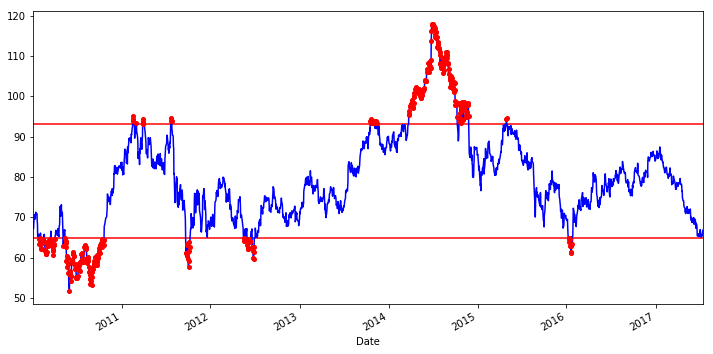

In [ ]:
import matplotlib.pyplot as plt
slb_close.plot(color='b', figsize=(12,6))
slb_filtered.plot(marker='o', style=' ', ms=4, color='r')

xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='r')

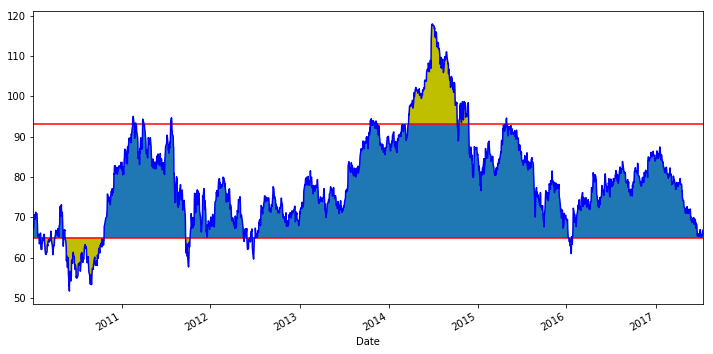

In [ ]:
slb_close.plot(color='b', figsize=(12,6))
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='r')
plt.fill_between(criteria.index, lower_10, slb_close.values)
plt.fill_between(criteria.index, lower_10, slb_close.values, where= slb_close < lower_10, color='y')
plt.fill_between(criteria.index, upper_10, slb_close.values, where= slb_close > upper_10, color='y')

# Translating SQL WHERE clauses

In [ ]:
employee = pd.read_csv('data/employee.csv')

In [ ]:
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [ ]:
employee.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [ ]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int64

In [ ]:
criteria_dept = employee.DEPARTMENT.isin(['Houston Police Department-HPD', 'Houston Fire Department (HFD)'])
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 120000)

In [ ]:
criteria_final = criteria_dept & criteria_gender & criteria_sal

In [ ]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

UNIQUE_ID                     DEPARTMENT  GENDER  BASE_SALARY
61          61  Houston Fire Department (HFD)  Female      96668.0
136        136  Houston Police Department-HPD  Female      81239.0
367        367  Houston Police Department-HPD  Female      86534.0
474        474  Houston Police Department-HPD  Female      91181.0
513        513  Houston Police Department-HPD  Female      81239.0

## There's more...

In [ ]:
criteria_sal = employee.BASE_SALARY.between(80000, 120000)

In [ ]:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]
criteria = ~employee.DEPARTMENT.isin(top_5_depts)
employee[criteria].head()

UNIQUE_ID               POSITION_TITLE                   DEPARTMENT  \
0           0  ASSISTANT DIRECTOR (EX LVL)  Municipal Courts Department   
1           1            LIBRARY ASSISTANT                      Library   
4           4                  ELECTRICIAN  General Services Department   
18         18     MAINTENANCE MECHANIC III  General Services Department   
32         32            SENIOR ACCOUNTANT                      Finance   

    BASE_SALARY                       RACE EMPLOYMENT_TYPE  GENDER  \
0      121862.0            Hispanic/Latino       Full Time  Female   
1       26125.0            Hispanic/Latino       Full Time  Female   
4       56347.0                      White       Full Time    Male   
18      40581.0            Hispanic/Latino       Full Time    Male   
32      46963.0  Black or African American       Full Time    Male   

   EMPLOYMENT_STATUS   HIRE_DATE    JOB_DATE  
0             Active  2006-06-12  2012-10-13  
1             Active  2000-07-19  2010-09-18  
4             Active  1989-06-19  1994-10-22  
18            Active  2008-12-29  2008-12-29  
32            Active  1991-02-11  2016-02-13

# Determing normality of stock market returns

In [ ]:
amzn = pd.read_csv('data/amzn_stock.csv', index_col='Date', parse_dates=['Date'])
amzn.head()

Open    High     Low   Close    Volume
Date                                                
2010-01-04  136.25  136.61  133.14  133.90   7600543
2010-01-05  133.43  135.48  131.81  134.69   8856456
2010-01-06  134.60  134.73  131.65  132.25   7180977
2010-01-07  132.01  132.32  128.80  130.00  11030124
2010-01-08  130.56  133.68  129.03  133.52   9833829

In [ ]:
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

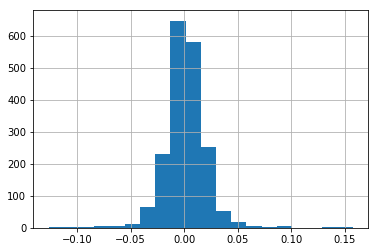

In [ ]:
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=20)

In [ ]:
mean = amzn_daily_return.mean()
std = amzn_daily_return.std()

In [ ]:
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

In [ ]:
within_1 = abs_z_score.lt(1).mean()
within_2 = abs_z_score.lt(2).mean()
within_3 = abs_z_score.lt(3).mean()

In [ ]:
print('{:.3f} fall within 1 standard deviation. '
       '{:.3f} within 2 and {:.3f} within 3'.format(within_1, within_2, within_3))

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3


In [ ]:
def test_return_normality(stock_data):
    close = stock_data['Close']
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=20)
    mean = daily_return.mean()
    std = daily_return.std()
    abs_z_score = abs(daily_return - mean) / std

    within_1 = (abs_z_score < 1).mean()
    within_2 = (abs_z_score < 2).mean()
    within_3 = (abs_z_score < 3).mean()

    print('{:.3f} fall within 1 standard deviation. '
          '{:.3f} within 2 and {:.3f} within 3'.format(within_1, within_2, within_3))

0.742 fall within 1 standard deviation. 0.946 within 2 and 0.986 within 3


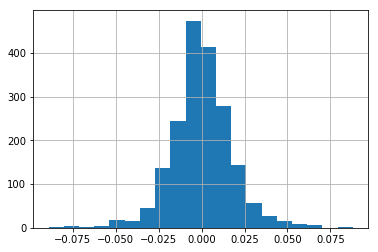

In [ ]:
slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
test_return_normality(slb)

# Improving readability of boolean indexing with the query method

In [ ]:
employee = pd.read_csv('data/employee.csv')
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

In [ ]:
query_string = "DEPARTMENT in @depts " \
               "and GENDER == 'Female' " \
               "and 80000 <= BASE_SALARY <= 120000"

emp_filtered = employee.query(query_string)
emp_filtered[select_columns].head()

UNIQUE_ID                     DEPARTMENT  GENDER  BASE_SALARY
61          61  Houston Fire Department (HFD)  Female      96668.0
136        136  Houston Police Department-HPD  Female      81239.0
367        367  Houston Police Department-HPD  Female      86534.0
474        474  Houston Police Department-HPD  Female      91181.0
513        513  Houston Police Department-HPD  Female      81239.0

# There's more...

In [ ]:
top10_depts = employee.DEPARTMENT.value_counts().index[:10].tolist()
employee_filtered2 = employee.query("DEPARTMENT not in @top10_depts and GENDER == 'Female'")
employee_filtered2[['DEPARTMENT', 'GENDER']].head()

DEPARTMENT  GENDER
0      Municipal Courts Department  Female
73           Human Resources Dept.  Female
96        City Controller's Office  Female
117               Legal Department  Female
146  Houston Information Tech Svcs  Female

# Preserving DataFrames with the where method

In [ ]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
facebook_likes = movie['actor_1_facebook_likes'].dropna()
facebook_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [ ]:
facebook_likes.describe(percentiles=[.1, .25, .5, .75, .9]).astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int64

In [ ]:
facebook_likes.describe(percentiles=[.1,.25,.5,.75,.9])

actor_1_facebook_likes  actor_2_facebook_likes  actor_3_facebook_likes
count             4909.000000             4903.000000             4893.000000
mean              6494.488491             1621.923516              631.276313
std              15106.986884             4011.299523             1625.874802
min                  0.000000                0.000000                0.000000
10%                240.000000               78.000000               32.000000
25%                607.000000              277.000000              132.000000
50%                982.000000              593.000000              366.000000
75%              11000.000000              912.000000              633.000000
90%              18000.000000             3000.000000              890.800000
max             640000.000000           137000.000000            23000.000000

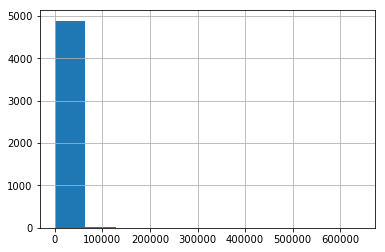

In [ ]:
facebook_likes.hist()

In [ ]:
criteria_high = facebook_likes < 20000
criteria_high.mean()

0.90853534324709717

In [ ]:
facebook_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [ ]:
facebook_likes.where(criteria_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [ ]:
criteria_low = facebook_likes > 300
facebook_likes_cap = facebook_likes.where(criteria_high, other=20000)\
                                   .where(criteria_low, 300)
facebook_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

In [ ]:
len(facebook_likes), len(facebook_likes_cap)

(4909, 4909)

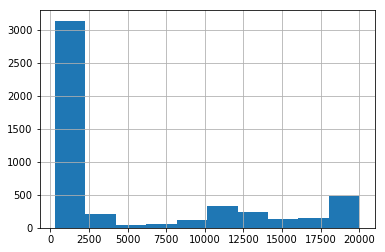

In [ ]:
facebook_likes_cap.hist()

In [ ]:
facebook_likes_cap2 = facebook_likes.clip(lower=300, upper=20000)
facebook_likes_cap2.equals(facebook_likes_cap)

True

# Masing DataFrame rows

In [ ]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
criteria = (movie['title_year'] >= 2010) | (movie['title_year'].isnull())

In [ ]:
movie.mask(criteria).head()

color   director_name  \
movie_title                                                         
Avatar                                      Color   James Cameron   
Pirates of the Caribbean: At World's End    Color  Gore Verbinski   
Spectre                                       NaN             NaN   
The Dark Knight Rises                         NaN             NaN   
Star Wars: Episode VII - The Force Awakens    NaN             NaN   

                                            num_critic_for_reviews  duration  \
movie_title                                                                    
Avatar                                                       723.0     178.0   
Pirates of the Caribbean: At World's End                     302.0     169.0   
Spectre                                                        NaN       NaN   
The Dark Knight Rises                                          NaN       NaN   
Star Wars: Episode VII - The Force Awakens                     NaN       NaN   

                                            director_facebook_likes  \
movie_title                                                           
Avatar                                                          0.0   
Pirates of the Caribbean: At World's End                      563.0   
Spectre                                                         NaN   
The Dark Knight Rises                                           NaN   
Star Wars: Episode VII - The Force Awakens                      NaN   

                                            actor_3_facebook_likes  \
movie_title                                                          
Avatar                                                       855.0   
Pirates of the Caribbean: At World's End                    1000.0   
Spectre                                                        NaN   
The Dark Knight Rises                                          NaN   
Star Wars: Episode VII - The Force Awakens                     NaN   

                                                actor_2_name  \
movie_title                                                    
Avatar                                      Joel David Moore   
Pirates of the Caribbean: At World's End       Orlando Bloom   
Spectre                                                  NaN   
The Dark Knight Rises                                    NaN   
Star Wars: Episode VII - The Force Awakens               NaN   

                                            actor_1_facebook_likes  \
movie_title                                                          
Avatar                                                      1000.0   
Pirates of the Caribbean: At World's End                   40000.0   
Spectre                                                        NaN   
The Dark Knight Rises                                          NaN   
Star Wars: Episode VII - The Force Awakens                     NaN   

                                                  gross  \
movie_title                                               
Avatar                                      760505847.0   
Pirates of the Caribbean: At World's End    309404152.0   
Spectre                                             NaN   
The Dark Knight Rises                               NaN   
Star Wars: Episode VII - The Force Awakens          NaN   

                                                                     genres  \
movie_title                                                                   
Avatar                                      Action|Adventure|Fantasy|Sci-Fi   
Pirates of the Caribbean: At World's End           Action|Adventure|Fantasy   
Spectre                                                                 NaN   
The Dark Knight Rises                                                   NaN   
Star Wars: Episode VII - The Force Awakens                              NaN   

                                           actor_1_name  num_voted_users  \
movie_title               

In [ ]:
movie_mask_filtered = movie.mask(criteria).dropna(how='all')
movie_mask_filtered.head()

color   director_name  \
movie_title                                                       
Avatar                                    Color   James Cameron   
Pirates of the Caribbean: At World's End  Color  Gore Verbinski   
Spider-Man 3                              Color       Sam Raimi   
Harry Potter and the Half-Blood Prince    Color     David Yates   
Superman Returns                          Color    Bryan Singer   

                                          num_critic_for_reviews  duration  \
movie_title                                                                  
Avatar                                                     723.0     178.0   
Pirates of the Caribbean: At World's End                   302.0     169.0   
Spider-Man 3                                               392.0     156.0   
Harry Potter and the Half-Blood Prince                     375.0     153.0   
Superman Returns                                           434.0     169.0   

                                          director_facebook_likes  \
movie_title                                                         
Avatar                                                        0.0   
Pirates of the Caribbean: At World's End                    563.0   
Spider-Man 3                                                  0.0   
Harry Potter and the Half-Blood Prince                      282.0   
Superman Returns                                              0.0   

                                          actor_3_facebook_likes  \
movie_title                                                        
Avatar                                                     855.0   
Pirates of the Caribbean: At World's End                  1000.0   
Spider-Man 3                                              4000.0   
Harry Potter and the Half-Blood Prince                   10000.0   
Superman Returns                                           903.0   

                                              actor_2_name  \
movie_title                                                  
Avatar                                    Joel David Moore   
Pirates of the Caribbean: At World's End     Orlando Bloom   
Spider-Man 3                                  James Franco   
Harry Potter and the Half-Blood Prince    Daniel Radcliffe   
Superman Returns                             Marlon Brando   

                                          actor_1_facebook_likes        gross  \
movie_title                                                                     
Avatar                                                    1000.0  760505847.0   
Pirates of the Caribbean: At World's End                 40000.0  309404152.0   
Spider-Man 3                                             24000.0  336530303.0   
Harry Potter and the Half-Blood Prince                   25000.0  301956980.0   
Superman Returns                                         18000.0  200069408.0   

                                                                    genres  \
movie_title                                                                  
Avatar                                     Action|Adventure|Fantasy|Sci-Fi   
Pirates of the Caribbean: At World's End          Action|Adventure|Fantasy   
Spider-Man 3                                      Action|Adventure|Romance   
Harry Potter and the Half-Blood Prince    Adventure|Family|Fantasy|Mystery   
Superman Returns                                   Action|Adventure|Sci-Fi   

                                          actor_1_name  num_voted_users  \
movie_title                                                               
Avatar                                     CCH Pounder         886204.0   
Pirates of the Caribbean: At World's End   Johnny Depp         471220.0   
Spider-Man 3                              J.K. Simmons         383056.0   
Harry Potter and the Half-Blood Prince    Alan Rickman         321795.0   
Superman Returns                          Kevin Spacey         2

In [ ]:
movie_boolean_filtered = movie[movie['title_year'] < 2010]
movie_boolean_filtered.head()

color   director_name  \
movie_title                                                       
Avatar                                    Color   James Cameron   
Pirates of the Caribbean: At World's End  Color  Gore Verbinski   
Spider-Man 3                              Color       Sam Raimi   
Harry Potter and the Half-Blood Prince    Color     David Yates   
Superman Returns                          Color    Bryan Singer   

                                          num_critic_for_reviews  duration  \
movie_title                                                                  
Avatar                                                     723.0     178.0   
Pirates of the Caribbean: At World's End                   302.0     169.0   
Spider-Man 3                                               392.0     156.0   
Harry Potter and the Half-Blood Prince                     375.0     153.0   
Superman Returns                                           434.0     169.0   

                                          director_facebook_likes  \
movie_title                                                         
Avatar                                                        0.0   
Pirates of the Caribbean: At World's End                    563.0   
Spider-Man 3                                                  0.0   
Harry Potter and the Half-Blood Prince                      282.0   
Superman Returns                                              0.0   

                                          actor_3_facebook_likes  \
movie_title                                                        
Avatar                                                     855.0   
Pirates of the Caribbean: At World's End                  1000.0   
Spider-Man 3                                              4000.0   
Harry Potter and the Half-Blood Prince                   10000.0   
Superman Returns                                           903.0   

                                              actor_2_name  \
movie_title                                                  
Avatar                                    Joel David Moore   
Pirates of the Caribbean: At World's End     Orlando Bloom   
Spider-Man 3                                  James Franco   
Harry Potter and the Half-Blood Prince    Daniel Radcliffe   
Superman Returns                             Marlon Brando   

                                          actor_1_facebook_likes        gross  \
movie_title                                                                     
Avatar                                                    1000.0  760505847.0   
Pirates of the Caribbean: At World's End                 40000.0  309404152.0   
Spider-Man 3                                             24000.0  336530303.0   
Harry Potter and the Half-Blood Prince                   25000.0  301956980.0   
Superman Returns                                         18000.0  200069408.0   

                                                                    genres  \
movie_title                                                                  
Avatar                                     Action|Adventure|Fantasy|Sci-Fi   
Pirates of the Caribbean: At World's End          Action|Adventure|Fantasy   
Spider-Man 3                                      Action|Adventure|Romance   
Harry Potter and the Half-Blood Prince    Adventure|Family|Fantasy|Mystery   
Superman Returns                                   Action|Adventure|Sci-Fi   

                                          actor_1_name  num_voted_users  \
movie_title                                                               
Avatar                                     CCH Pounder           886204   
Pirates of the Caribbean: At World's End   Johnny Depp           471220   
Spider-Man 3                              J.K. Simmons           383056   
Harry Potter and the Half-Blood Prince    Alan Rickman           321795   
Superman Returns                          Kevin Spacey          

In [ ]:
movie_mask_filtered.equals(movie_boolean_filtered)

False

In [ ]:
movie_mask_filtered.shape == movie_boolean_filtered.shape

True

In [ ]:
movie_mask_filtered.dtypes == movie_boolean_filtered.dtypes

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [ ]:
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_boolean_filtered, movie_mask_filtered, check_dtype=False)

In [ ]:
%timeit movie.mask(criteria).dropna(how='all')

11.2 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit movie[movie['title_year'] < 2010]

1.07 ms ± 34.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Selecting with booleans, integer location and labels

In [ ]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
criteria = (movie['content_rating'] == 'G') & (movie['imdb_score'] < 4)

In [ ]:
movie_loc = movie.loc[criteria]
movie_loc.head()

color     director_name  \
movie_title                                               
The True Story of Puss'N Boots  Color  Jérôme Deschamps   
Doogal                          Color    Dave Borthwick   
Thomas and the Magic Railroad   Color    Britt Allcroft   
Barney's Great Adventure        Color       Steve Gomer   
Justin Bieber: Never Say Never  Color        Jon M. Chu   

                                num_critic_for_reviews  duration  \
movie_title                                                        
The True Story of Puss'N Boots                     4.0      80.0   
Doogal                                            31.0      77.0   
Thomas and the Magic Railroad                     47.0      85.0   
Barney's Great Adventure                          24.0      76.0   
Justin Bieber: Never Say Never                    84.0     115.0   

                                director_facebook_likes  \
movie_title                                               
The True Story of Puss'N Boots                      0.0   
Doogal                                              3.0   
Thomas and the Magic Railroad                       2.0   
Barney's Great Adventure                            9.0   
Justin Bieber: Never Say Never                    209.0   

                                actor_3_facebook_likes   actor_2_name  \
movie_title                                                             
The True Story of Puss'N Boots                     0.0    André Wilms   
Doogal                                           593.0  Kylie Minogue   
Thomas and the Magic Railroad                    402.0     Colm Feore   
Barney's Great Adventure                          47.0     Kyla Pratt   
Justin Bieber: Never Say Never                    41.0  Sean Kingston   

                                actor_1_facebook_likes       gross  \
movie_title                                                          
The True Story of Puss'N Boots                    44.0         NaN   
Doogal                                           787.0   7382993.0   
Thomas and the Magic Railroad                   1000.0  15911333.0   
Barney's Great Adventure                         595.0  11144518.0   
Justin Bieber: Never Say Never                   569.0  73000942.0   

                                                                   genres  \
movie_title                                                                 
The True Story of Puss'N Boots                 Adventure|Animation|Comedy   
Doogal                          Adventure|Animation|Comedy|Family|Fantasy   
Thomas and the Magic Railroad       Adventure|Comedy|Drama|Family|Fantasy   
Barney's Great Adventure                                 Adventure|Family   
Justin Bieber: Never Say Never                          Documentary|Music   

                                  actor_1_name  num_voted_users  \
movie_title                                                       
The True Story of Puss'N Boots  Yolande Moreau              753   
Doogal                            Jimmy Fallon             3851   
Thomas and the Magic Railroad      Mara Wilson             2855   
Barney's Great Adventure         Trevor Morgan             2724   
Justin Bieber: Never Say Never   Usher Raymond            74351   

                                cast_total_facebook_likes      actor_3_name  \
movie_title                                                                   
The True Story of Puss'N Boots                         53  Jérôme Deschamps   
Doogal                                               2185       Jon Stewart   
Thomas and the Magic Railroad                        2429       Peter Fonda   
Barney's Great Adventure                             1139   Shirley Douglas   
Justin Bieber: Never Say Never                        714       Boys II Men   

                                facenumber_in_poster  \
movie_title                                            
The True Story of Puss'N Boots                  

In [ ]:
movie_loc.equals(movie[criteria])

True

In [ ]:
movie_iloc = movie.iloc[criteria]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [ ]:
movie_iloc = movie.iloc[criteria.values]

In [ ]:
movie_iloc.equals(movie_loc)

True

In [ ]:
movie.loc[criteria.values]

color      director_name  \
movie_title                                                
The True Story of Puss'N Boots  Color   Jérôme Deschamps   
Doogal                          Color     Dave Borthwick   
Thomas and the Magic Railroad   Color     Britt Allcroft   
Barney's Great Adventure        Color        Steve Gomer   
Justin Bieber: Never Say Never  Color         Jon M. Chu   
Sunday School Musical           Color  Rachel Goldenberg   

                                num_critic_for_reviews  duration  \
movie_title                                                        
The True Story of Puss'N Boots                     4.0      80.0   
Doogal                                            31.0      77.0   
Thomas and the Magic Railroad                     47.0      85.0   
Barney's Great Adventure                          24.0      76.0   
Justin Bieber: Never Say Never                    84.0     115.0   
Sunday School Musical                              5.0      93.0   

                                director_facebook_likes  \
movie_title                                               
The True Story of Puss'N Boots                      0.0   
Doogal                                              3.0   
Thomas and the Magic Railroad                       2.0   
Barney's Great Adventure                            9.0   
Justin Bieber: Never Say Never                    209.0   
Sunday School Musical                               7.0   

                                actor_3_facebook_likes   actor_2_name  \
movie_title                                                             
The True Story of Puss'N Boots                     0.0    André Wilms   
Doogal                                           593.0  Kylie Minogue   
Thomas and the Magic Railroad                    402.0     Colm Feore   
Barney's Great Adventure                          47.0     Kyla Pratt   
Justin Bieber: Never Say Never                    41.0  Sean Kingston   
Sunday School Musical                             73.0    Mark Hengst   

                                actor_1_facebook_likes       gross  \
movie_title                                                          
The True Story of Puss'N Boots                    44.0         NaN   
Doogal                                           787.0   7382993.0   
Thomas and the Magic Railroad                   1000.0  15911333.0   
Barney's Great Adventure                         595.0  11144518.0   
Justin Bieber: Never Say Never                   569.0  73000942.0   
Sunday School Musical                            349.0         NaN   

                                                                   genres  \
movie_title                                                                 
The True Story of Puss'N Boots                 Adventure|Animation|Comedy   
Doogal                          Adventure|Animation|Comedy|Family|Fantasy   
Thomas and the Magic Railroad       Adventure|Comedy|Drama|Family|Fantasy   
Barney's Great Adventure                                 Adventure|Family   
Justin Bieber: Never Say Never                          Documentary|Music   
Sunday School Musical                                       Drama|Musical   

                                     actor_1_name  num_voted_users  \
movie_title                                                          
The True Story of Puss'N Boots     Yolande Moreau              753   
Doogal                               Jimmy Fallon             3851   
Thomas and the Magic Railroad         Mara Wilson             2855   
Barney's Great Adventure            Trevor Morgan             2724   
Justin Bieber: Never Say Never      Usher Raymond            74351   
Sunday School Musical           Dustin Fitzsimons              602   

                                cast_total_facebook_likes      actor_3_name  \
movie_title                                                                   
The True Story of Puss'N Boots                     

In [ ]:
criteria_col = movie.dtypes == np.int64
criteria_col.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [ ]:
movie.loc[:, criteria_col].head()

num_voted_users  \
movie_title                                                   
Avatar                                               886204   
Pirates of the Caribbean: At World's End             471220   
Spectre                                              275868   
The Dark Knight Rises                               1144337   
Star Wars: Episode VII - The Force Awakens                8   

                                            cast_total_facebook_likes  \
movie_title                                                             
Avatar                                                           4834   
Pirates of the Caribbean: At World's End                        48350   
Spectre                                                         11700   
The Dark Knight Rises                                          106759   
Star Wars: Episode VII - The Force Awakens                        143   

                                            movie_facebook_likes  
movie_title                                                       
Avatar                                                     33000  
Pirates of the Caribbean: At World's End                       0  
Spectre                                                    85000  
The Dark Knight Rises                                     164000  
Star Wars: Episode VII - The Force Awakens                     0

In [ ]:
movie.iloc[:, criteria_col.values].head()

num_voted_users  \
movie_title                                                   
Avatar                                               886204   
Pirates of the Caribbean: At World's End             471220   
Spectre                                              275868   
The Dark Knight Rises                               1144337   
Star Wars: Episode VII - The Force Awakens                8   

                                            cast_total_facebook_likes  \
movie_title                                                             
Avatar                                                           4834   
Pirates of the Caribbean: At World's End                        48350   
Spectre                                                         11700   
The Dark Knight Rises                                          106759   
Star Wars: Episode VII - The Force Awakens                        143   

                                            movie_facebook_likes  
movie_title                                                       
Avatar                                                     33000  
Pirates of the Caribbean: At World's End                       0  
Spectre                                                    85000  
The Dark Knight Rises                                     164000  
Star Wars: Episode VII - The Force Awakens                     0

In [ ]:
movie.loc[criteria, ['content_rating', 'imdb_score', 'title_year', 'gross']].sort_values('imdb_score')

content_rating  imdb_score  title_year  \
movie_title                                                             
Justin Bieber: Never Say Never              G         1.6      2011.0   
Sunday School Musical                       G         2.5      2008.0   
Doogal                                      G         2.8      2006.0   
Barney's Great Adventure                    G         2.8      1998.0   
The True Story of Puss'N Boots              G         2.9      2009.0   
Thomas and the Magic Railroad               G         3.6      2000.0   

                                     gross  
movie_title                                 
Justin Bieber: Never Say Never  73000942.0  
Sunday School Musical                  NaN  
Doogal                           7382993.0  
Barney's Great Adventure        11144518.0  
The True Story of Puss'N Boots         NaN  
Thomas and the Magic Railroad   15911333.0

In [ ]:
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
col_index = [movie.columns.get_loc(col) for col in cols]
col_index

[20, 24, 22, 8]

In [ ]:
movie.iloc[criteria.values, col_index].sort_values('imdb_score')

content_rating  imdb_score  title_year  \
movie_title                                                             
Justin Bieber: Never Say Never              G         1.6      2011.0   
Sunday School Musical                       G         2.5      2008.0   
Doogal                                      G         2.8      2006.0   
Barney's Great Adventure                    G         2.8      1998.0   
The True Story of Puss'N Boots              G         2.9      2009.0   
Thomas and the Magic Railroad               G         3.6      2000.0   

                                     gross  
movie_title                                 
Justin Bieber: Never Say Never  73000942.0  
Sunday School Musical                  NaN  
Doogal                           7382993.0  
Barney's Great Adventure        11144518.0  
The True Story of Puss'N Boots         NaN  
Thomas and the Magic Railroad   15911333.0

## How it works

In [ ]:
a = criteria.values
a[:5]

array([False, False, False, False, False], dtype=bool)

In [ ]:
len(a), len(criteria)

(4916, 4916)

# There's more...

In [ ]:
movie.loc[[True, False, True], [True, False, False, True]]

color  duration
movie_title                 
Avatar       Color     178.0
Spectre      Color     148.0

In [ ]:
import pandas as pd
import numpy as np

# Examining the index

In [ ]:
college = pd.read_csv('data/college.csv')
columns = college.columns
columns

Index(['INSTNM', 'CITY', 'STABBR', 'HBCU', 'MENONLY', 'WOMENONLY', 'RELAFFIL',
       'SATVRMID', 'SATMTMID', 'DISTANCEONLY', 'UGDS', 'UGDS_WHITE',
       'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI',
       'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF', 'CURROPER', 'PCTPELL',
       'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP'],
      dtype='object')

In [ ]:
columns.values

array(['INSTNM', 'CITY', 'STABBR', 'HBCU', 'MENONLY', 'WOMENONLY',
       'RELAFFIL', 'SATVRMID', 'SATMTMID', 'DISTANCEONLY', 'UGDS',
       'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN',
       'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF',
       'CURROPER', 'PCTPELL', 'PCTFLOAN', 'UG25ABV', 'MD_EARN_WNE_P10',
       'GRAD_DEBT_MDN_SUPP'], dtype=object)

In [ ]:
columns[5]

'WOMENONLY'

In [ ]:
columns[[1,8,10]]

Index(['CITY', 'SATMTMID', 'UGDS'], dtype='object')

In [ ]:
columns[-7:-4]

Index(['PPTUG_EF', 'CURROPER', 'PCTPELL'], dtype='object')

In [ ]:
columns.min(), columns.max(), columns.isnull().sum()

('CITY', 'WOMENONLY', 0)

In [ ]:
columns + '_A'

Index(['INSTNM_A', 'CITY_A', 'STABBR_A', 'HBCU_A', 'MENONLY_A', 'WOMENONLY_A',
       'RELAFFIL_A', 'SATVRMID_A', 'SATMTMID_A', 'DISTANCEONLY_A', 'UGDS_A',
       'UGDS_WHITE_A', 'UGDS_BLACK_A', 'UGDS_HISP_A', 'UGDS_ASIAN_A',
       'UGDS_AIAN_A', 'UGDS_NHPI_A', 'UGDS_2MOR_A', 'UGDS_NRA_A',
       'UGDS_UNKN_A', 'PPTUG_EF_A', 'CURROPER_A', 'PCTPELL_A', 'PCTFLOAN_A',
       'UG25ABV_A', 'MD_EARN_WNE_P10_A', 'GRAD_DEBT_MDN_SUPP_A'],
      dtype='object')

In [ ]:
columns > 'G'

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True], dtype=bool)

In [ ]:
columns[1] = 'city'

TypeError: Index does not support mutable operations

In [ ]:
c1 = columns[:4]
c1

Index(['INSTNM', 'CITY', 'STABBR', 'HBCU'], dtype='object')

In [ ]:
c2 = columns[2:5]
c2

Index(['STABBR', 'HBCU', 'MENONLY'], dtype='object')

In [ ]:
c1.union(c2)

Index(['CITY', 'HBCU', 'INSTNM', 'MENONLY', 'STABBR'], dtype='object')

In [ ]:
c1 | c2

Index(['CITY', 'HBCU', 'INSTNM', 'MENONLY', 'STABBR'], dtype='object')

In [ ]:
c1.symmetric_difference(c2)

Index(['CITY', 'INSTNM', 'MENONLY'], dtype='object')

In [ ]:
c1 ^ c2

Index(['CITY', 'INSTNM', 'MENONLY'], dtype='object')

# Cartesian Product

In [ ]:
s1 = pd.Series(index=list('aaab'), data=np.arange(4))
s1

a    0
a    1
a    2
b    3
dtype: int64

In [ ]:
s2 = pd.Series(index=list('cababb'), data=np.arange(6))
s2

c    0
a    1
b    2
a    3
b    4
b    5
dtype: int64

In [ ]:
s1 + s2

a    1.0
a    3.0
a    2.0
a    4.0
a    3.0
a    5.0
b    5.0
b    7.0
b    8.0
c    NaN
dtype: float64

## There's more

In [ ]:
s1 = pd.Series(index=list('aaabb'), data=np.arange(5))
s2 = pd.Series(index=list('aaabb'), data=np.arange(5))
s1 + s2

a    0
a    2
a    4
b    6
b    8
dtype: int64

In [ ]:
s1 = pd.Series(index=list('aaabb'), data=np.arange(5))
s2 = pd.Series(index=list('bbaaa'), data=np.arange(5))
s1 + s2

a    2
a    3
a    4
a    3
a    4
a    5
a    4
a    5
a    6
b    3
b    4
b    4
b    5
dtype: int64

# Exploding Indexes

In [ ]:
employee = pd.read_csv('data/employee.csv', index_col='RACE')
employee.head()

UNIQUE_ID               POSITION_TITLE  \
RACE                                                      
Hispanic/Latino          0  ASSISTANT DIRECTOR (EX LVL)   
Hispanic/Latino          1            LIBRARY ASSISTANT   
White                    2               POLICE OFFICER   
White                    3            ENGINEER/OPERATOR   
White                    4                  ELECTRICIAN   

                                    DEPARTMENT  BASE_SALARY EMPLOYMENT_TYPE  \
RACE                                                                          
Hispanic/Latino    Municipal Courts Department     121862.0       Full Time   
Hispanic/Latino                        Library      26125.0       Full Time   
White            Houston Police Department-HPD      45279.0       Full Time   
White            Houston Fire Department (HFD)      63166.0       Full Time   
White              General Services Department      56347.0       Full Time   

                 GENDER EMPLOYMENT_STATUS   HIRE_DATE    JOB_DATE  
RACE                                                               
Hispanic/Latino  Female            Active  2006-06-12  2012-10-13  
Hispanic/Latino  Female            Active  2000-07-19  2010-09-18  
White              Male            Active  2015-02-03  2015-02-03  
White              Male            Active  1982-02-08  1991-05-25  
White              Male            Active  1989-06-19  1994-10-22

In [ ]:
salary1 = employee['BASE_SALARY']
salary2 = employee['BASE_SALARY']
salary1 is salary2

True

In [ ]:
salary1 = employee['BASE_SALARY'].copy()
salary2 = employee['BASE_SALARY'].copy()
salary1 is salary2

False

In [ ]:
salary1 = salary1.sort_index()
salary1.head()

RACE
American Indian or Alaskan Native    78355.0
American Indian or Alaskan Native    26125.0
American Indian or Alaskan Native    98536.0
American Indian or Alaskan Native        NaN
American Indian or Alaskan Native    55461.0
Name: BASE_SALARY, dtype: float64

In [ ]:
salary2.head()

RACE
Hispanic/Latino    121862.0
Hispanic/Latino     26125.0
White               45279.0
White               63166.0
White               56347.0
Name: BASE_SALARY, dtype: float64

In [ ]:
salary_add = salary1 + salary2

In [ ]:
salary_add.head()

RACE
American Indian or Alaskan Native    138702.0
American Indian or Alaskan Native    156710.0
American Indian or Alaskan Native    176891.0
American Indian or Alaskan Native    159594.0
American Indian or Alaskan Native    127734.0
Name: BASE_SALARY, dtype: float64

In [ ]:
salary_add1 = salary1 + salary1
len(salary1), len(salary2), len(salary_add), len(salary_add1)

(2000, 2000, 1175424, 2000)

## There's more...

In [ ]:
index_vc = salary1.index.fillna('None').value_counts()
index_vc

Black or African American            700
White                                665
Hispanic/Latino                      480
Asian/Pacific Islander               107
None                                  35
American Indian or Alaskan Native     11
Others                                 2
Name: RACE, dtype: int64

In [ ]:
index_vc.pow(2).sum()

1175424

# New
1. appending chunks of data
2. scale by the max from both sides

# Filling values with unequal indexes

In [ ]:
baseball_14 = pd.read_csv('data/baseball14.csv', index_col='playerID')
baseball_15 = pd.read_csv('data/baseball15.csv', index_col='playerID')
baseball_16 = pd.read_csv('data/baseball16.csv', index_col='playerID')
baseball_14.head()

yearID  stint teamID lgID    G   AB   R    H  2B  3B  ...    RBI  \
playerID                                                         ...          
altuvjo01    2014      1    HOU   AL  158  660  85  225  47   3  ...   59.0   
cartech02    2014      1    HOU   AL  145  507  68  115  21   1  ...   88.0   
castrja01    2014      1    HOU   AL  126  465  43  103  21   2  ...   56.0   
corpoca01    2014      1    HOU   AL   55  170  22   40   6   0  ...   19.0   
dominma01    2014      1    HOU   AL  157  564  51  121  17   0  ...   57.0   

             SB   CS  BB     SO  IBB  HBP   SH   SF  GIDP  
playerID                                                   
altuvjo01  56.0  9.0  36   53.0  7.0  5.0  1.0  5.0  20.0  
cartech02   5.0  2.0  56  182.0  6.0  5.0  0.0  4.0  12.0  
castrja01   1.0  0.0  34  151.0  1.0  9.0  1.0  3.0  11.0  
corpoca01   0.0  0.0  14   37.0  0.0  3.0  1.0  2.0   3.0  
dominma01   0.0  1.0  29  125.0  2.0  5.0  2.0  7.0  23.0  

[5 rows x 21 columns]

In [ ]:
baseball_14.index.difference(baseball_15.index)

Index(['corpoca01', 'dominma01', 'fowlede01', 'grossro01', 'guzmaje01',
       'hoeslj01', 'krausma01', 'preslal01', 'singljo02'],
      dtype='object', name='playerID')

In [ ]:
baseball_14.index.difference(baseball_15.index)

Index(['congeha01', 'correca01', 'gattiev01', 'gomezca01', 'lowrije01',
       'rasmuco01', 'tuckepr01', 'valbulu01'],
      dtype='object', name='playerID')

In [ ]:
hits_14 = baseball_14['H']
hits_15 = baseball_15['H']
hits_16 = baseball_16['H']
hits_14.head()

playerID
altuvjo01    225
cartech02    115
castrja01    103
corpoca01     40
dominma01    121
Name: H, dtype: int64

In [ ]:
(hits_14 + hits_15).head()

playerID
altuvjo01    425.0
cartech02    193.0
castrja01    174.0
congeha01      NaN
corpoca01      NaN
Name: H, dtype: float64

In [ ]:
hits_14.add(hits_15, fill_value=0).head()

playerID
altuvjo01    425.0
cartech02    193.0
castrja01    174.0
congeha01     46.0
corpoca01     40.0
Name: H, dtype: float64

In [ ]:
hits_total = hits_14.add(hits_15, fill_value=0).add(hits_16, fill_value=0)
hits_total.head()

playerID
altuvjo01    641.0
bregmal01     53.0
cartech02    193.0
castrja01    243.0
congeha01     46.0
Name: H, dtype: float64

In [ ]:
hits_total.hasnans

False

## How it works...

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd'], data=[np.nan, 3, np.nan, 1])
s

a    NaN
b    3.0
c    NaN
d    1.0
dtype: float64

In [ ]:
s1 = pd.Series(index=['a', 'b', 'c'], data=[np.nan, 6, 10])
s1

a     NaN
b     6.0
c    10.0
dtype: float64

In [ ]:
s.add(s1, fill_value=5)

a     NaN
b     9.0
c    15.0
d     6.0
dtype: float64

In [ ]:
s1.add(s, fill_value=5)

a     NaN
b     9.0
c    15.0
d     6.0
dtype: float64

## There's more

In [ ]:
df_14 = baseball_14[['G','AB', 'R', 'H']]
df_14.head()

G   AB   R    H
playerID                    
altuvjo01  158  660  85  225
cartech02  145  507  68  115
castrja01  126  465  43  103
corpoca01   55  170  22   40
dominma01  157  564  51  121

In [ ]:
df_15 = baseball_15[['AB', 'R', 'H', 'HR']]
df_15.head()

AB   R    H  HR
playerID                   
altuvjo01  638  86  200  15
cartech02  391  50   78  24
castrja01  337  38   71  11
congeha01  201  25   46  11
correca01  387  52  108  22

In [ ]:
(df_14 + df_15).head(10).style.highlight_null('yellow')

In [ ]:
df_14.add(df_15, fill_value=0).head(10).style.highlight_null('yellow')

# Appending columns from different DataFrames

In [ ]:
employee = pd.read_csv('data/employee.csv')
dept_salary = employee[['DEPARTMENT', 'BASE_SALARY']]

In [ ]:
dept_salary = dept_salary.sort_values(['DEPARTMENT', 'BASE_SALARY'], ascending=[True, False])

In [ ]:
max_dept_salary = dept_salary.drop_duplicates(subset='DEPARTMENT')
max_dept_salary.head()

DEPARTMENT  BASE_SALARY
1494    Admn. & Regulatory Affairs     140416.0
149       City Controller's Office      64251.0
236                   City Council     100000.0
647   Convention and Entertainment      38397.0
1500   Dept of Neighborhoods (DON)      89221.0

In [ ]:
max_dept_salary = max_dept_salary.set_index('DEPARTMENT')
employee = employee.set_index('DEPARTMENT')

In [ ]:
employee['MAX_DEPT_SALARY'] = max_dept_salary['BASE_SALARY']

In [ ]:
pd.options.display.max_columns = 6

In [ ]:
employee.head()

UNIQUE_ID               POSITION_TITLE  \
DEPARTMENT                                                              
Municipal Courts Department            0  ASSISTANT DIRECTOR (EX LVL)   
Library                                1            LIBRARY ASSISTANT   
Houston Police Department-HPD          2               POLICE OFFICER   
Houston Fire Department (HFD)          3            ENGINEER/OPERATOR   
General Services Department            4                  ELECTRICIAN   

                               BASE_SALARY       ...         HIRE_DATE  \
DEPARTMENT                                       ...                     
Municipal Courts Department       121862.0       ...        2006-06-12   
Library                            26125.0       ...        2000-07-19   
Houston Police Department-HPD      45279.0       ...        2015-02-03   
Houston Fire Department (HFD)      63166.0       ...        1982-02-08   
General Services Department        56347.0       ...        1989-06-19   

                                 JOB_DATE MAX_DEPT_SALARY  
DEPARTMENT                                                 
Municipal Courts Department    2012-10-13        121862.0  
Library                        2010-09-18        107763.0  
Houston Police Department-HPD  2015-02-03        199596.0  
Houston Fire Department (HFD)  1991-05-25        210588.0  
General Services Department    1994-10-22         89194.0  

[5 rows x 10 columns]

In [ ]:
employee.query('BASE_SALARY > MAX_DEPT_SALARY')

Empty DataFrame
Columns: [UNIQUE_ID, POSITION_TITLE, BASE_SALARY, RACE, EMPLOYMENT_TYPE, GENDER, EMPLOYMENT_STATUS, HIRE_DATE, JOB_DATE, MAX_DEPT_SALARY]
Index: []

[0 rows x 10 columns]

## How it works...

In [ ]:
np.random.seed(1234)
random_salary = dept_salary.sample(n=10).set_index('DEPARTMENT')
random_salary

BASE_SALARY
DEPARTMENT                                 
Public Works & Engineering-PWE      50586.0
Houston Police Department-HPD       66614.0
Houston Police Department-HPD       66614.0
Housing and Community Devp.         78853.0
...                                     ...
Public Works & Engineering-PWE      37211.0
Public Works & Engineering-PWE      54683.0
Human Resources Dept.               58474.0
Health & Human Services             47050.0

[10 rows x 1 columns]

In [ ]:
employee['RANDOM_SALARY'] = random_salary['BASE_SALARY']

ValueError: cannot reindex from a duplicate axis

## There's more...

In [ ]:
employee['MAX_SALARY2'] = max_dept_salary['BASE_SALARY'].head(3)

In [ ]:
employee.MAX_SALARY2.value_counts()

140416.0    29
100000.0    11
64251.0      5
Name: MAX_SALARY2, dtype: int64

In [ ]:
employee.MAX_SALARY2.isnull().mean()

0.97750000000000004

# Highlighting maximum value from each column

In [ ]:
pd.options.display.max_rows = 8

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college.dtypes

CITY                   object
STABBR                 object
HBCU                  float64
MENONLY               float64
                       ...   
PCTFLOAN              float64
UG25ABV               float64
MD_EARN_WNE_P10        object
GRAD_DEBT_MDN_SUPP     object
Length: 26, dtype: object

In [ ]:
college.MD_EARN_WNE_P10.value_counts().head()

PrivacySuppressed    822
38800                151
21500                 97
49200                 78
27400                 46
Name: MD_EARN_WNE_P10, dtype: int64

In [ ]:
college['MD_EARN_WNE_P10'] = pd.to_numeric(college.MD_EARN_WNE_P10, errors='coerce')
college['GRAD_DEBT_MDN_SUPP'] = pd.to_numeric(college.GRAD_DEBT_MDN_SUPP, errors='coerce')

In [ ]:
college.dtypes.loc[['MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP']]

MD_EARN_WNE_P10       float64
GRAD_DEBT_MDN_SUPP    float64
dtype: object

In [ ]:
college_numeric = college.select_dtypes(include=[np.number])
college_numeric.head() # only numeric columns

HBCU  MENONLY  WOMENONLY  \
INSTNM                                                          
Alabama A & M University              1.0      0.0        0.0   
University of Alabama at Birmingham   0.0      0.0        0.0   
Amridge University                    0.0      0.0        0.0   
University of Alabama in Huntsville   0.0      0.0        0.0   
Alabama State University              1.0      0.0        0.0   

                                            ...          UG25ABV  \
INSTNM                                      ...                    
Alabama A & M University                    ...           0.1049   
University of Alabama at Birmingham         ...           0.2422   
Amridge University                          ...           0.8540   
University of Alabama in Huntsville         ...           0.2640   
Alabama State University                    ...           0.1270   

                                     MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
INSTNM                                                                    
Alabama A & M University                     30300.0             33888.0  
University of Alabama at Birmingham          39700.0             21941.5  
Amridge University                           40100.0             23370.0  
University of Alabama in Huntsville          45500.0             24097.0  
Alabama State University                     26600.0             33118.5  

[5 rows x 24 columns]

In [ ]:
criteria = college_numeric.nunique() == 2
criteria.head()

HBCU          True
MENONLY       True
WOMENONLY     True
RELAFFIL      True
SATVRMID     False
dtype: bool

In [ ]:
binary_cols = college_numeric.columns[criteria].tolist()
binary_cols

['HBCU', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'DISTANCEONLY', 'CURROPER']

In [ ]:
college_numeric2 = college_numeric.drop(labels=binary_cols, axis='columns')
college_numeric2.head()

SATVRMID  SATMTMID     UGDS  \
INSTNM                                                             
Alabama A & M University                424.0     420.0   4206.0   
University of Alabama at Birmingham     570.0     565.0  11383.0   
Amridge University                        NaN       NaN    291.0   
University of Alabama in Huntsville     595.0     590.0   5451.0   
Alabama State University                425.0     430.0   4811.0   

                                            ...          UG25ABV  \
INSTNM                                      ...                    
Alabama A & M University                    ...           0.1049   
University of Alabama at Birmingham         ...           0.2422   
Amridge University                          ...           0.8540   
University of Alabama in Huntsville         ...           0.2640   
Alabama State University                    ...           0.1270   

                                     MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
INSTNM                                                                    
Alabama A & M University                     30300.0             33888.0  
University of Alabama at Birmingham          39700.0             21941.5  
Amridge University                           40100.0             23370.0  
University of Alabama in Huntsville          45500.0             24097.0  
Alabama State University                     26600.0             33118.5  

[5 rows x 18 columns]

In [ ]:
max_cols = college_numeric2.idxmax()
max_cols

SATVRMID                      California Institute of Technology
SATMTMID                      California Institute of Technology
UGDS                               University of Phoenix-Arizona
UGDS_WHITE                Mr Leon's School of Hair Design-Moscow
                                         ...                    
PCTFLOAN                                  ABC Beauty College Inc
UG25ABV                           Dongguk University-Los Angeles
MD_EARN_WNE_P10                     Medical College of Wisconsin
GRAD_DEBT_MDN_SUPP    Southwest University of Visual Arts-Tucson
Length: 18, dtype: object

In [ ]:
unique_max_cols = max_cols.unique()
unique_max_cols[:5]

array(['California Institute of Technology',
       'University of Phoenix-Arizona',
       "Mr Leon's School of Hair Design-Moscow",
       'Velvatex College of Beauty Culture',
       'Thunderbird School of Global Management'], dtype=object)

In [ ]:
college_numeric2.loc[unique_max_cols].style.highlight_max()

In [ ]:
college_numeric2.loc[max_cols.values]

SATVRMID  SATMTMID      UGDS  \
INSTNM                                                                     
California Institute of Technology             765.0     785.0     983.0   
California Institute of Technology             765.0     785.0     983.0   
University of Phoenix-Arizona                    NaN       NaN  151558.0   
Mr Leon's School of Hair Design-Moscow           NaN       NaN      16.0   
...                                              ...       ...       ...   
ABC Beauty College Inc                           NaN       NaN      38.0   
Dongguk University-Los Angeles                   NaN       NaN      20.0   
Medical College of Wisconsin                     NaN       NaN       NaN   
Southwest University of Visual Arts-Tucson       NaN       NaN     161.0   

                                                   ...          UG25ABV  \
INSTNM                                             ...                    
California Institute of Technology                 ...           0.0082   
California Institute of Technology                 ...           0.0082   
University of Phoenix-Arizona                      ...              NaN   
Mr Leon's School of Hair Design-Moscow             ...           0.2000   
...                                                ...              ...   
ABC Beauty College Inc                             ...           0.4688   
Dongguk University-Los Angeles                     ...           1.0000   
Medical College of Wisconsin                       ...              NaN   
Southwest University of Visual Arts-Tucson         ...           0.8657   

                                            MD_EARN_WNE_P10  \
INSTNM                                                        
California Institute of Technology                  77800.0   
California Institute of Technology                  77800.0   
University of Phoenix-Arizona                           NaN   
Mr Leon's School of Hair Design-Moscow                  NaN   
...                                                     ...   
ABC Beauty College Inc                                  NaN   
Dongguk University-Los Angeles                          NaN   
Medical College of Wisconsin                       233100.0   
Southwest University of Visual Arts-Tucson          27200.0   

                                            GRAD_DEBT_MDN_SUPP  
INSTNM                                                          
California Institute of Technology                     11812.5  
California Institute of Technology                     11812.5  
University of Phoenix-Arizona                          33000.0  
Mr Leon's School of Hair Design-Moscow                 15710.0  
...                                                        ...  
ABC Beauty College Inc                                 16500.0  
Dongguk University-Los Angeles                             NaN  
Medical College of Wisconsin                               NaN  
Southwest University of Visual Arts-Tucson             49750.0  

[18 rows x 18 columns]

# Replicating idxmax with method chaining

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
college['MD_EARN_WNE_P10'] = pd.to_numeric(college.MD_EARN_WNE_P10, errors='coerce')
college['GRAD_DEBT_MDN_SUPP'] = pd.to_numeric(college.GRAD_DEBT_MDN_SUPP, errors='coerce')
college_numeric = college.select_dtypes(include=[np.number])
criteria = college_numeric.nunique() == 2
binary_cols = college_numeric.columns[criteria].tolist()
college_numeric = college_numeric.drop(labels=binary_cols, axis='columns')

In [ ]:
college_numeric.max().head()

SATVRMID         765.0
SATMTMID         785.0
UGDS          151558.0
UGDS_WHITE         1.0
UGDS_BLACK         1.0
dtype: float64

In [ ]:
college_numeric.eq(college_numeric.max()).head()

SATVRMID  SATMTMID   UGDS  UGDS_WHITE  \
INSTNM                                                                       
Alabama A & M University                False     False  False       False   
University of Alabama at Birmingham     False     False  False       False   
Amridge University                      False     False  False       False   
University of Alabama in Huntsville     False     False  False       False   
Alabama State University                False     False  False       False   

                                     UGDS_BLACK  UGDS_HISP  UGDS_ASIAN  \
INSTNM                                                                   
Alabama A & M University                  False      False       False   
University of Alabama at Birmingham       False      False       False   
Amridge University                        False      False       False   
University of Alabama in Huntsville       False      False       False   
Alabama State University                  False      False       False   

                                     UGDS_AIAN  UGDS_NHPI  UGDS_2MOR  \
INSTNM                                                                 
Alabama A & M University                 False      False      False   
University of Alabama at Birmingham      False      False      False   
Amridge University                       False      False      False   
University of Alabama in Huntsville      False      False      False   
Alabama State University                 False      False      False   

                                     UGDS_NRA  UGDS_UNKN  PPTUG_EF  PCTPELL  \
INSTNM                                                                        
Alabama A & M University                False      False     False    False   
University of Alabama at Birmingham     False      False     False    False   
Amridge University                      False      False     False    False   
University of Alabama in Huntsville     False      False     False    False   
Alabama State University                False      False     False    False   

                                     PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
INSTNM                                                                    
Alabama A & M University                False    False            False   
University of Alabama at Birmingham     False    False            False   
Amridge University                      False    False            False   
University of Alabama in Huntsville     False    False            False   
Alabama State University                False    False            False   

                                     GRAD_DEBT_MDN_SUPP  
INSTNM                                                   
Alabama A & M University                          False  
University of Alabama at Birmingham               False  
Amridge University                                False  
University of Alabama in Huntsville               False  
Alabama State University                          False

In [ ]:
has_row_max =college_numeric.eq(college_numeric.max()).any(axis='columns')
has_row_max.head()

INSTNM
Alabama A & M University               False
University of Alabama at Birmingham    False
Amridge University                     False
University of Alabama in Huntsville    False
Alabama State University               False
dtype: bool

In [ ]:
college_numeric.shape

(7535, 18)

In [ ]:
has_row_max.sum()

401

In [ ]:
college_numeric.eq(college_numeric.max()).cumsum().cumsum().eq(1).any(axis='columns')[lambda x: x]

INSTNM
Thunderbird School of Global Management                  True
Southwest University of Visual Arts-Tucson               True
ABC Beauty College Inc                                   True
Velvatex College of Beauty Culture                       True
California Institute of Technology                       True
Le Cordon Bleu College of Culinary Arts-San Francisco    True
MTI Business College Inc                                 True
Dongguk University-Los Angeles                           True
Mr Leon's School of Hair Design-Moscow                   True
Haskell Indian Nations University                        True
LIU Brentwood                                            True
Medical College of Wisconsin                             True
Palau Community College                                  True
California University of Management and Sciences         True
Cosmopolitan Beauty and Tech School                      True
University of Phoenix-Arizona                            True
d

In [ ]:
%timeit college_numeric2.idxmax()

1.05 ms ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
college_numeric2.idxmax??

In [ ]:
pd.options.display.max_rows=6

In [ ]:
college_numeric.eq(college_numeric.max()).cumsum()

SATVRMID  SATMTMID  UGDS  \
INSTNM                                                                         
Alabama A & M University                                   0         0     0   
University of Alabama at Birmingham                        0         0     0   
Amridge University                                         0         0     0   
...                                                      ...       ...   ...   
National Personal Training Institute of Cleveland          1         1     1   
Bay Area Medical Academy - San Jose Satellite L...         1         1     1   
Excel Learning Center-San Antonio South                    1         1     1   

                                                    UGDS_WHITE  UGDS_BLACK  \
INSTNM                                                                       
Alabama A & M University                                     0           0   
University of Alabama at Birmingham                          0           0   
Amridge University                                           0           0   
...                                                        ...         ...   
National Personal Training Institute of Cleveland          109          28   
Bay Area Medical Academy - San Jose Satellite L...         109          28   
Excel Learning Center-San Antonio South                    109          28   

                                                    UGDS_HISP  UGDS_ASIAN  \
INSTNM                                                                      
Alabama A & M University                                    0           0   
University of Alabama at Birmingham                         0           0   
Amridge University                                          0           0   
...                                                       ...         ...   
National Personal Training Institute of Cleveland         136           1   
Bay Area Medical Academy - San Jose Satellite L...        136           1   
Excel Learning Center-San Antonio South                   136           1   

                                                    UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                     
Alabama A & M University                                    0          0   
University of Alabama at Birmingham                         0          0   
Amridge University                                          0          0   
...                                                       ...        ...   
National Personal Training Institute of Cleveland           2          1   
Bay Area Medical Academy - San Jose Satellite L...          2          1   
Excel Learning Center-San Antonio South                     2          1   

                                                    UGDS_2MOR  UGDS_NRA  \
INSTNM                                                                    
Alabama A & M University                                    0         0   
University of Alabama at Birmingham                         0         0   
Amridge University                                          0         0   
...                                                       ...       ...   
National Personal Training Institute of Cleveland           1         1   
Bay Area Medical Academy - San Jose Satellite L...          1         1   
Excel Learning Center-San Antonio South                     1         1   

                                                    UGDS_UNKN  PPTUG_EF  \
INSTNM                                                                    
Alabama A & M University                                    0         0   
University of Alabama at Birmingham                         0         0   
Amridge University                                          0         0   
...                                                       ...       ...   
National Personal Training Institute of Cleveland           1        44   
Bay Area Medical Academy - San Jose Satellite L.

In [ ]:
college_numeric.eq(college_numeric.max()).cumsum().cumsum()

SATVRMID  SATMTMID  UGDS  \
INSTNM                                                                         
Alabama A & M University                                   0         0     0   
University of Alabama at Birmingham                        0         0     0   
Amridge University                                         0         0     0   
...                                                      ...       ...   ...   
National Personal Training Institute of Cleveland       7307      7307   417   
Bay Area Medical Academy - San Jose Satellite L...      7308      7308   418   
Excel Learning Center-San Antonio South                 7309      7309   419   

                                                    UGDS_WHITE  UGDS_BLACK  \
INSTNM                                                                       
Alabama A & M University                                     0           0   
University of Alabama at Birmingham                          0           0   
Amridge University                                           0           0   
...                                                        ...         ...   
National Personal Training Institute of Cleveland       379968       73163   
Bay Area Medical Academy - San Jose Satellite L...      380077       73191   
Excel Learning Center-San Antonio South                 380186       73219   

                                                    UGDS_HISP  UGDS_ASIAN  \
INSTNM                                                                      
Alabama A & M University                                    0           0   
University of Alabama at Birmingham                         0           0   
Amridge University                                          0           0   
...                                                       ...         ...   
National Personal Training Institute of Cleveland      341375         985   
Bay Area Medical Academy - San Jose Satellite L...     341511         986   
Excel Learning Center-San Antonio South                341647         987   

                                                    UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                     
Alabama A & M University                                    0          0   
University of Alabama at Birmingham                         0          0   
Amridge University                                          0          0   
...                                                       ...        ...   
National Personal Training Institute of Cleveland       11386       3318   
Bay Area Medical Academy - San Jose Satellite L...      11388       3319   
Excel Learning Center-San Antonio South                 11390       3320   

                                                    UGDS_2MOR  UGDS_NRA  \
INSTNM                                                                    
Alabama A & M University                                    0         0   
University of Alabama at Birmingham                         0         0   
Amridge University                                          0         0   
...                                                       ...       ...   
National Personal Training Institute of Cleveland        5058      1078   
Bay Area Medical Academy - San Jose Satellite L...       5059      1079   
Excel Learning Center-San Antonio South                  5060      1080   

                                                    UGDS_UNKN  PPTUG_EF  \
INSTNM                                                                    
Alabama A & M University                                    0         0   
University of Alabama at Birmingham                         0         0   
Amridge University                                          0         0   
...                                                       ...       ...   
National Personal Training Institute of Cleveland        7278    113737   
Bay Area Medical Academy - San Jose Satellite L.

In [ ]:
college_numeric.eq(college_numeric.max()).cumsum().cumsum()

SATVRMID  SATMTMID  UGDS  \
INSTNM                                                                         
Alabama A & M University                                   0         0     0   
University of Alabama at Birmingham                        0         0     0   
Amridge University                                         0         0     0   
...                                                      ...       ...   ...   
National Personal Training Institute of Cleveland       7307      7307   417   
Bay Area Medical Academy - San Jose Satellite L...      7308      7308   418   
Excel Learning Center-San Antonio South                 7309      7309   419   

                                                    UGDS_WHITE  UGDS_BLACK  \
INSTNM                                                                       
Alabama A & M University                                     0           0   
University of Alabama at Birmingham                          0           0   
Amridge University                                           0           0   
...                                                        ...         ...   
National Personal Training Institute of Cleveland       379968       73163   
Bay Area Medical Academy - San Jose Satellite L...      380077       73191   
Excel Learning Center-San Antonio South                 380186       73219   

                                                    UGDS_HISP  UGDS_ASIAN  \
INSTNM                                                                      
Alabama A & M University                                    0           0   
University of Alabama at Birmingham                         0           0   
Amridge University                                          0           0   
...                                                       ...         ...   
National Personal Training Institute of Cleveland      341375         985   
Bay Area Medical Academy - San Jose Satellite L...     341511         986   
Excel Learning Center-San Antonio South                341647         987   

                                                    UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                     
Alabama A & M University                                    0          0   
University of Alabama at Birmingham                         0          0   
Amridge University                                          0          0   
...                                                       ...        ...   
National Personal Training Institute of Cleveland       11386       3318   
Bay Area Medical Academy - San Jose Satellite L...      11388       3319   
Excel Learning Center-San Antonio South                 11390       3320   

                                                    UGDS_2MOR  UGDS_NRA  \
INSTNM                                                                    
Alabama A & M University                                    0         0   
University of Alabama at Birmingham                         0         0   
Amridge University                                          0         0   
...                                                       ...       ...   
National Personal Training Institute of Cleveland        5058      1078   
Bay Area Medical Academy - San Jose Satellite L...       5059      1079   
Excel Learning Center-San Antonio South                  5060      1080   

                                                    UGDS_UNKN  PPTUG_EF  \
INSTNM                                                                    
Alabama A & M University                                    0         0   
University of Alabama at Birmingham                         0         0   
Amridge University                                          0         0   
...                                                       ...       ...   
National Personal Training Institute of Cleveland        7278    113737   
Bay Area Medical Academy - San Jose Satellite L.

In [ ]:
college_idxmax = college_numeric.eq(college_numeric.max())\
                                .cumsum()\
                                .cumsum()\
                                .eq(1)\
                                .any(axis='columns')
college_idxmax.head()

INSTNM
Alabama A & M University               False
University of Alabama at Birmingham    False
Amridge University                     False
University of Alabama in Huntsville    False
Alabama State University               False
dtype: bool

In [ ]:
idxmax_cols = college_idxmax[college_idxmax]
idxmax_cols

INSTNM
Thunderbird School of Global Management             True
Southwest University of Visual Arts-Tucson          True
ABC Beauty College Inc                              True
                                                    ... 
California University of Management and Sciences    True
Cosmopolitan Beauty and Tech School                 True
University of Phoenix-Arizona                       True
Length: 16, dtype: bool

In [ ]:
set(college_numeric.idxmax().unique()) == set(idxmax_cols.index)

True

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
flights = pd.read_csv('data/flights.csv')
flights.head()

MONTH  WEEKDAY AIRLINE ORG_AIR DEST_AIR  SCHED_DEP  DEP_DELAY  AIR_TIME  \
0      1        4      WN     LAX      SLC       1625       58.0      94.0   
1      1        4      UA     DEN      IAD        823        7.0     154.0   
2      1        4      MQ     DFW      VPS       1305       36.0      85.0   
3      1        4      AA     DFW      DCA       1555        7.0     126.0   
4      1        4      WN     LAX      MCI       1720       48.0     166.0   

   DIST  SCHED_ARR  ARR_DELAY  DIVERTED  CANCELLED  
0   590       1905       65.0         0          0  
1  1452       1333      -13.0         0          0  
2   641       1453       35.0         0          0  
3  1192       1935       -7.0         0          0  
4  1363       2225       39.0         0          0

In [ ]:
flights.groupby('AIRLINE')['ARR_DELAY'].agg('mean').head()

AIRLINE
AA    5.542661
AS   -0.833333
B6    8.692593
DL    0.339691
EV    7.034580
Name: ARR_DELAY, dtype: float64

In [ ]:
flights.groupby('AIRLINE').agg({'ARR_DELAY':'mean'}).head()

ARR_DELAY
AIRLINE           
AA        5.542661
AS       -0.833333
B6        8.692593
DL        0.339691
EV        7.034580

In [ ]:
flights.groupby('AIRLINE')['ARR_DELAY'].agg(np.mean).head()

AIRLINE
AA    5.542661
AS   -0.833333
B6    8.692593
DL    0.339691
EV    7.034580
Name: ARR_DELAY, dtype: float64

In [ ]:
flights.groupby('AIRLINE')['ARR_DELAY'].mean().head()

AIRLINE
AA    5.542661
AS   -0.833333
B6    8.692593
DL    0.339691
EV    7.034580
Name: ARR_DELAY, dtype: float64

## How it works...

In [ ]:
grouped = flights.groupby('AIRLINE')
type(grouped)

pandas.core.groupby.DataFrameGroupBy

## There's more

In [ ]:
flights.groupby('AIRLINE')['ARR_DELAY'].agg(np.sqrt)

/Users/Ted/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:842: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: func(x, *args, **kwargs)
/Users/Ted/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:3015: RuntimeWarning: invalid value encountered in sqrt
  output = func(group, *args, **kwargs)


Exception: Must produce aggregated value

# Grouping and aggregating with multiple columns and functions

In [ ]:
flights = pd.read_csv('data/flights.csv')
flights.head()

MONTH  WEEKDAY AIRLINE ORG_AIR DEST_AIR  SCHED_DEP  DEP_DELAY  AIR_TIME  \
0      1        4      WN     LAX      SLC       1625       58.0      94.0   
1      1        4      UA     DEN      IAD        823        7.0     154.0   
2      1        4      MQ     DFW      VPS       1305       36.0      85.0   
3      1        4      AA     DFW      DCA       1555        7.0     126.0   
4      1        4      WN     LAX      MCI       1720       48.0     166.0   

   DIST  SCHED_ARR  ARR_DELAY  DIVERTED  CANCELLED  
0   590       1905       65.0         0          0  
1  1452       1333      -13.0         0          0  
2   641       1453       35.0         0          0  
3  1192       1935       -7.0         0          0  
4  1363       2225       39.0         0          0

In [ ]:
# The number of cancelled flights for every airline per day weekday
flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED'].agg('sum').head(7)

AIRLINE  WEEKDAY
AA       1          41
         2           9
         3          16
         4          20
         5          18
         6          21
         7          29
Name: CANCELLED, dtype: int64

In [ ]:
#Find the number and percentage of cancelled and diverted flights for every airline per weekday
flights.groupby(['AIRLINE', 'WEEKDAY'])['CANCELLED', 'DIVERTED'].agg(['sum', 'mean']).head(7)

CANCELLED           DIVERTED          
                      sum      mean      sum      mean
AIRLINE WEEKDAY                                       
AA      1              41  0.032106        6  0.004699
        2               9  0.007341        2  0.001631
        3              16  0.011949        2  0.001494
        4              20  0.015004        5  0.003751
        5              18  0.014151        1  0.000786
        6              21  0.018667        9  0.008000
        7              29  0.021837        1  0.000753

In [ ]:
# For each origin to destination flight, find the total number of flights,
# the number and percentage of cancelled flights and the average and variance of the airtime.
flights.groupby(['ORG_AIR', 'DEST_AIR']).agg({'CANCELLED': ['sum', 'mean', 'size'],
                                              'AIR_TIME':['mean', 'var']}).head()

CANCELLED              AIR_TIME           
                       sum mean size        mean        var
ORG_AIR DEST_AIR                                           
ATL     ABE              0  0.0   31   96.387097  45.778495
        ABQ              0  0.0   16  170.500000  87.866667
        ABY              0  0.0   19   28.578947   6.590643
        ACY              0  0.0    6   91.333333  11.466667
        AEX              0  0.0   40   78.725000  47.332692

# Removing the MultiIndex after grouping

In [ ]:
flights = pd.read_csv('data/flights.csv')
flights.head()

MONTH  WEEKDAY AIRLINE ORG_AIR DEST_AIR  SCHED_DEP  DEP_DELAY  AIR_TIME  \
0      1        4      WN     LAX      SLC       1625       58.0      94.0   
1      1        4      UA     DEN      IAD        823        7.0     154.0   
2      1        4      MQ     DFW      VPS       1305       36.0      85.0   
3      1        4      AA     DFW      DCA       1555        7.0     126.0   
4      1        4      WN     LAX      MCI       1720       48.0     166.0   

   DIST  SCHED_ARR  ARR_DELAY  DIVERTED  CANCELLED  
0   590       1905       65.0         0          0  
1  1452       1333      -13.0         0          0  
2   641       1453       35.0         0          0  
3  1192       1935       -7.0         0          0  
4  1363       2225       39.0         0          0

In [ ]:
airline_info = flights.groupby(['AIRLINE', 'WEEKDAY'])\
                      .agg({'DIST':['sum', 'mean'],
                                    'ARR_DELAY':['min', 'max']}).astype(int)
airline_info.head()

DIST       ARR_DELAY     
                     sum  mean       min  max
AIRLINE WEEKDAY                              
AA      1        1455386  1139       -60  551
        2        1358256  1107       -52  725
        3        1496665  1117       -45  473
        4        1452394  1089       -46  349
        5        1427749  1122       -41  732

In [ ]:
level0 = airline_info.columns.get_level_values(0)
level0

Index(['DIST', 'DIST', 'ARR_DELAY', 'ARR_DELAY'], dtype='object')

In [ ]:
level1 = airline_info.columns.get_level_values(1)
level1

Index(['sum', 'mean', 'min', 'max'], dtype='object')

In [ ]:
airline_info.columns = level0 + '_' + level1

In [ ]:
airline_info.head(7)

DIST_sum  DIST_mean  ARR_DELAY_min  ARR_DELAY_max
AIRLINE WEEKDAY                                                   
AA      1         1455386       1139            -60            551
        2         1358256       1107            -52            725
        3         1496665       1117            -45            473
        4         1452394       1089            -46            349
        5         1427749       1122            -41            732
        6         1265340       1124            -50            858
        7         1461906       1100            -49            626

In [ ]:
airline_info.reset_index().head(7)

AIRLINE  WEEKDAY  DIST_sum  DIST_mean  ARR_DELAY_min  ARR_DELAY_max
0      AA        1   1455386       1139            -60            551
1      AA        2   1358256       1107            -52            725
2      AA        3   1496665       1117            -45            473
3      AA        4   1452394       1089            -46            349
4      AA        5   1427749       1122            -41            732
5      AA        6   1265340       1124            -50            858
6      AA        7   1461906       1100            -49            626

## There's more...

In [ ]:
flights.groupby(['AIRLINE'], as_index=False)['DIST'].agg('mean').round(0)

AIRLINE    DIST
0       AA  1114.0
1       AS  1066.0
2       B6  1772.0
3       DL   866.0
4       EV   460.0
5       F9   970.0
6       HA  2615.0
7       MQ   404.0
8       NK  1047.0
9       OO   511.0
10      UA  1231.0
11      US  1181.0
12      VX  1240.0
13      WN   810.0

In [ ]:
flights.groupby(['AIRLINE'], as_index=False, sort=False)['DIST'].agg('mean')

AIRLINE         DIST
0       WN   809.985626
1       UA  1230.918891
2       MQ   404.229041
3       AA  1114.347865
4       F9   969.593014
5       EV   460.237453
6       OO   511.239375
7       NK  1047.428100
8       US  1181.226625
9       AS  1065.884115
10      DL   866.448448
11      VX  1240.296073
12      B6  1771.882136
13      HA  2615.178571

# Customizing an aggregation function

In [ ]:
college = pd.read_csv('data/college.csv')
college.head()

INSTNM        CITY STABBR  HBCU  MENONLY  \
0             Alabama A & M University      Normal     AL   1.0      0.0   
1  University of Alabama at Birmingham  Birmingham     AL   0.0      0.0   
2                   Amridge University  Montgomery     AL   0.0      0.0   
3  University of Alabama in Huntsville  Huntsville     AL   0.0      0.0   
4             Alabama State University  Montgomery     AL   1.0      0.0   

   WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY         ...          \
0        0.0         0     424.0     420.0           0.0         ...           
1        0.0         0     570.0     565.0           0.0         ...           
2        0.0         1       NaN       NaN           1.0         ...           
3        0.0         0     595.0     590.0           0.0         ...           
4        0.0         0     425.0     430.0           0.0         ...           

   UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  PCTFLOAN  \
0     0.0000    0.0059     0.0138    0.0656         1   0.7356    0.8284   
1     0.0368    0.0179     0.0100    0.2607         1   0.3460    0.5214   
2     0.0000    0.0000     0.2715    0.4536         1   0.6801    0.7795   
3     0.0172    0.0332     0.0350    0.2146         1   0.3072    0.4596   
4     0.0098    0.0243     0.0137    0.0892         1   0.7347    0.7554   

   UG25ABV  MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
0   0.1049            30300               33888  
1   0.2422            39700             21941.5  
2   0.8540            40100               23370  
3   0.2640            45500               24097  
4   0.1270            26600             33118.5  

[5 rows x 27 columns]

In [ ]:
college.groupby('STABBR')['UGDS'].agg(['mean', 'std']).round(0).head()

mean      std
STABBR                 
AK      2493.0   4052.0
AL      2790.0   4658.0
AR      1644.0   3143.0
AS      1276.0      NaN
AZ      4130.0  14894.0

In [ ]:
def max_deviation(s):
    std_score = (s - s.mean()) / s.std()
    return std_score.abs().max()

In [ ]:
college.groupby('STABBR')['UGDS'].agg(max_deviation).round(1).head()

STABBR
AK    2.6
AL    5.8
AR    6.3
AS    NaN
AZ    9.9
Name: UGDS, dtype: float64

## There's more...

In [ ]:
college.groupby('STABBR')['UGDS', 'SATVRMID', 'SATMTMID'].agg(max_deviation).round(1).head()

UGDS  SATVRMID  SATMTMID
STABBR                          
AK       2.6       NaN       NaN
AL       5.8       1.6       1.8
AR       6.3       2.2       2.3
AS       NaN       NaN       NaN
AZ       9.9       1.9       1.4

In [ ]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS', 'SATVRMID', 'SATMTMID']\
       .agg([max_deviation, 'mean', 'std']).round(1).head()

UGDS                      SATVRMID               \
                max_deviation    mean     std max_deviation   mean   std   
STABBR RELAFFIL                                                            
AK     0                  2.1  3508.9  4539.5           NaN    NaN   NaN   
       1                  1.1   123.3   132.9           NaN  555.0   NaN   
AL     0                  5.2  3248.8  5102.4           1.6  514.9  56.5   
       1                  2.4   979.7   870.8           1.5  498.0  53.0   
AR     0                  5.8  1793.7  3401.6           1.9  481.1  37.9   

                     SATMTMID               
                max_deviation   mean   std  
STABBR RELAFFIL                             
AK     0                  NaN    NaN   NaN  
       1                  NaN  503.0   NaN  
AL     0                  1.7  515.8  56.7  
       1                  1.4  485.6  61.4  
AR     0                  2.0  503.6  39.0

In [ ]:
max_deviation.__name__

'max_deviation'

In [ ]:
max_deviation.__name__ = 'Max Deviation'

In [ ]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS', 'SATVRMID', 'SATMTMID']\
       .agg([max_deviation, 'mean', 'std']).round(1).head()

UGDS                      SATVRMID               \
                Max Deviation    mean     std Max Deviation   mean   std   
STABBR RELAFFIL                                                            
AK     0                  2.1  3508.9  4539.5           NaN    NaN   NaN   
       1                  1.1   123.3   132.9           NaN  555.0   NaN   
AL     0                  5.2  3248.8  5102.4           1.6  514.9  56.5   
       1                  2.4   979.7   870.8           1.5  498.0  53.0   
AR     0                  5.8  1793.7  3401.6           1.9  481.1  37.9   

                     SATMTMID               
                Max Deviation   mean   std  
STABBR RELAFFIL                             
AK     0                  NaN    NaN   NaN  
       1                  NaN  503.0   NaN  
AL     0                  1.7  515.8  56.7  
       1                  1.4  485.6  61.4  
AR     0                  2.0  503.6  39.0

# Customizing aggregating functions with kwargs and args

In [ ]:
college = pd.read_csv('data/college.csv')
grouped = college.groupby(['STABBR', 'RELAFFIL'])

In [ ]:
import inspect
inspect.signature(grouped.agg)

<Signature (arg, *args, **kwargs)>

## How to do it...

In [ ]:
def pct_between_1_3k(s):
    return s.between(1000, 3000).mean()

In [ ]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(pct_between_1_3k).head(9)

STABBR  RELAFFIL
AK      0           0.142857
        1           0.000000
AL      0           0.236111
        1           0.333333
AR      0           0.279412
        1           0.111111
AS      0           1.000000
AZ      0           0.096774
        1           0.000000
Name: UGDS, dtype: float64

In [ ]:
def pct_between(s, low, high):
    return s.between(low, high).mean()

In [ ]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(pct_between, 1000, 10000).head(9)

STABBR  RELAFFIL
AK      0           0.428571
        1           0.000000
AL      0           0.458333
        1           0.375000
AR      0           0.397059
        1           0.166667
AS      0           1.000000
AZ      0           0.233871
        1           0.111111
Name: UGDS, dtype: float64

## How it works...

In [ ]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(pct_between, high=10000, low=1000).head(9)

STABBR  RELAFFIL
AK      0           0.428571
        1           0.000000
AL      0           0.458333
        1           0.375000
AR      0           0.397059
        1           0.166667
AS      0           1.000000
AZ      0           0.233871
        1           0.111111
Name: UGDS, dtype: float64

In [ ]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(pct_between, 1000, high=10000).head(9)

STABBR  RELAFFIL
AK      0           0.428571
        1           0.000000
AL      0           0.458333
        1           0.375000
AR      0           0.397059
        1           0.166667
AS      0           1.000000
AZ      0           0.233871
        1           0.111111
Name: UGDS, dtype: float64

## There's more...

In [ ]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(['mean', pct_between], low=100, high=1000)

TypeError: pct_between() missing 2 required positional arguments: 'low' and 'high'

In [ ]:
def make_agg_func(func, name, *args, **kwargs):
    def wrapper(x):
        return func(x, *args, **kwargs)
    wrapper.__name__ = name
    return wrapper

my_agg1 = make_agg_func(pct_between, 'pct_1_3k', low=1000, high=3000)
my_agg2 = make_agg_func(pct_between, 'pct_10_30k', 10000, 30000)

In [ ]:
college.groupby(['STABBR', 'RELAFFIL'])['UGDS'].agg(['mean', my_agg1, my_agg2]).head()

mean  pct_1_3k  pct_10_30k
STABBR RELAFFIL                                   
AK     0         3508.857143  0.142857    0.142857
       1          123.333333  0.000000    0.000000
AL     0         3248.774648  0.236111    0.083333
       1          979.722222  0.333333    0.000000
AR     0         1793.691176  0.279412    0.014706

# Examining a groupby object

In [ ]:
college = pd.read_csv('data/college.csv')
grouped = college.groupby(['STABBR', 'RELAFFIL'])
type(grouped)

pandas.core.groupby.DataFrameGroupBy

In [ ]:
print([attr for attr in dir(grouped) if not attr.startswith('_')])

['CITY', 'CURROPER', 'DISTANCEONLY', 'GRAD_DEBT_MDN_SUPP', 'HBCU', 'INSTNM', 'MD_EARN_WNE_P10', 'MENONLY', 'PCTFLOAN', 'PCTPELL', 'PPTUG_EF', 'RELAFFIL', 'SATMTMID', 'SATVRMID', 'STABBR', 'UG25ABV', 'UGDS', 'UGDS_2MOR', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_NHPI', 'UGDS_NRA', 'UGDS_UNKN', 'UGDS_WHITE', 'WOMENONLY', 'agg', 'aggregate', 'all', 'any', 'apply', 'backfill', 'bfill', 'boxplot', 'corr', 'corrwith', 'count', 'cov', 'cumcount', 'cummax', 'cummin', 'cumprod', 'cumsum', 'describe', 'diff', 'dtypes', 'expanding', 'ffill', 'fillna', 'filter', 'first', 'get_group', 'groups', 'head', 'hist', 'idxmax', 'idxmin', 'indices', 'last', 'mad', 'max', 'mean', 'median', 'min', 'ndim', 'ngroup', 'ngroups', 'nth', 'nunique', 'ohlc', 'pad', 'pct_change', 'plot', 'prod', 'quantile', 'rank', 'resample', 'rolling', 'sem', 'shift', 'size', 'skew', 'std', 'sum', 'tail', 'take', 'transform', 'tshift', 'var']


In [ ]:
grouped.ngroups

112

In [ ]:
groups = list(grouped.groups.keys())
groups[:6]

[('AK', 0), ('AK', 1), ('AL', 0), ('AL', 1), ('AR', 0), ('AR', 1)]

In [ ]:
grouped.get_group(('FL', 1)).head()

CITY  CURROPER  DISTANCEONLY GRAD_DEBT_MDN_SUPP  HBCU  \
712     Graceville         1           0.0              20052   0.0   
713          Miami         1           0.0              28250   0.0   
714    Panama City         0           0.0  PrivacySuppressed   0.0   
715  Daytona Beach         1           0.0              36250   1.0   
724      Kissimmee         1           0.0              20199   0.0   

                                    INSTNM MD_EARN_WNE_P10  MENONLY  PCTFLOAN  \
712         The Baptist College of Florida           30800      0.0    0.5602   
713                       Barry University           44100      0.0    0.6733   
714  Gooding Institute of Nurse Anesthesia             NaN      0.0       NaN   
715             Bethune-Cookman University           29400      0.0    0.8867   
724             Johnson University Florida           26300      0.0    0.7384   

     PCTPELL    ...      UGDS_2MOR  UGDS_AIAN  UGDS_ASIAN  UGDS_BLACK  \
712   0.5878    ...         0.0308     0.0066      0.0044      0.0639   
713   0.5045    ...         0.0164     0.0038      0.0153      0.3177   
714      NaN    ...            NaN        NaN         NaN         NaN   
715   0.7758    ...         0.0198     0.0010      0.0021      0.8891   
724   0.6689    ...         0.0045     0.0000      0.0091      0.1136   

     UGDS_HISP  UGDS_NHPI  UGDS_NRA  UGDS_UNKN  UGDS_WHITE  WOMENONLY  
712     0.0441     0.0000    0.0000     0.0507      0.7996        0.0  
713     0.2867     0.0015    0.0741     0.0841      0.2004        0.0  
714        NaN        NaN       NaN        NaN         NaN        0.0  
715     0.0277     0.0018    0.0205     0.0190      0.0190        0.0  
724     0.1545     0.0000    0.0045     0.0136      0.7000        0.0  

[5 rows x 25 columns]

In [ ]:
from IPython.display import display

In [ ]:
i = 0
for name, group in grouped:
    print(name)
    display(group.head(2))
    i += 1
    if i == 5:
        break

('AK', 0)


INSTNM       CITY STABBR  HBCU  MENONLY  \
60  University of Alaska Anchorage  Anchorage     AK   0.0      0.0   
62  University of Alaska Fairbanks  Fairbanks     AK   0.0      0.0   

    WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY         ...          \
60        0.0         0       NaN       NaN           0.0         ...           
62        0.0         0       NaN       NaN           0.0         ...           

    UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  PCTFLOAN  \
60     0.0980    0.0181     0.0457    0.4539         1   0.2385    0.2647   
62     0.0401    0.0110     0.3060    0.3887         1   0.2263    0.2550   

    UG25ABV  MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
60   0.4386            42500             19449.5  
62   0.4519            36200               19355  

[2 rows x 27 columns]

('AK', 1)


INSTNM       CITY STABBR  HBCU  MENONLY  WOMENONLY  \
61       Alaska Bible College     Palmer     AK   0.0      0.0        0.0   
64  Alaska Pacific University  Anchorage     AK   0.0      0.0        0.0   

    RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY         ...          UGDS_2MOR  \
61         1       NaN       NaN           0.0         ...             0.0370   
64         1     555.0     503.0           0.0         ...             0.0945   

    UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  PCTFLOAN  UG25ABV  \
61       0.0     0.0000    0.1481         1   0.3571    0.2857   0.4286   
64       0.0     0.0873    0.3745         1   0.3152    0.5297   0.4910   

    MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
61              NaN   PrivacySuppressed  
64            47000               23250  

[2 rows x 27 columns]

('AL', 0)


INSTNM        CITY STABBR  HBCU  MENONLY  \
0             Alabama A & M University      Normal     AL   1.0      0.0   
1  University of Alabama at Birmingham  Birmingham     AL   0.0      0.0   

   WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY         ...          \
0        0.0         0     424.0     420.0           0.0         ...           
1        0.0         0     570.0     565.0           0.0         ...           

   UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  PCTFLOAN  \
0     0.0000    0.0059     0.0138    0.0656         1   0.7356    0.8284   
1     0.0368    0.0179     0.0100    0.2607         1   0.3460    0.5214   

   UG25ABV  MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
0   0.1049            30300               33888  
1   0.2422            39700             21941.5  

[2 rows x 27 columns]

('AL', 1)


INSTNM        CITY STABBR  HBCU  MENONLY  WOMENONLY  \
2            Amridge University  Montgomery     AL   0.0      0.0        0.0   
10  Birmingham Southern College  Birmingham     AL   0.0      0.0        0.0   

    RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY         ...          UGDS_2MOR  \
2          1       NaN       NaN           1.0         ...             0.0000   
10         1     560.0     560.0           0.0         ...             0.0051   

    UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  PCTFLOAN  UG25ABV  \
2        0.0     0.2715    0.4536         1   0.6801    0.7795   0.8540   
10       0.0     0.0051    0.0017         1   0.1920    0.4809   0.0152   

    MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
2             40100               23370  
10            44200               27000  

[2 rows x 27 columns]

('AR', 0)


INSTNM         CITY STABBR  HBCU  \
128        University of Arkansas at Little Rock  Little Rock     AR   0.0   
129  University of Arkansas for Medical Sciences  Little Rock     AR   0.0   

     MENONLY  WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY  \
128      0.0        0.0         0     470.0     510.0           0.0   
129      0.0        0.0         0       NaN       NaN           0.0   

            ...          UGDS_2MOR  UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  \
128         ...             0.0755    0.0283     0.0003    0.4126         1   
129         ...             0.0281    0.0070     0.0169    0.2433         1   

     PCTPELL  PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
128   0.3941    0.4775   0.4062            33900               21736  
129   0.3944    0.6144   0.5133            61400               12500  

[2 rows x 27 columns]

## There's more...

In [ ]:
grouped.nth([1, -1]).head(8)

CITY  CURROPER  DISTANCEONLY GRAD_DEBT_MDN_SUPP  HBCU  \
STABBR RELAFFIL                                                                
AK     0          Fairbanks         1           0.0              19355   0.0   
       0             Barrow         1           0.0  PrivacySuppressed   0.0   
       1          Anchorage         1           0.0              23250   0.0   
       1           Soldotna         1           0.0  PrivacySuppressed   0.0   
AL     0         Birmingham         1           0.0            21941.5   0.0   
       0             Dothan         1           0.0  PrivacySuppressed   0.0   
       1         Birmingham         1           0.0              27000   0.0   
       1         Huntsville         1           NaN            36173.5   NaN   

                                                  INSTNM MD_EARN_WNE_P10  \
STABBR RELAFFIL                                                            
AK     0                  University of Alaska Fairbanks           36200   
       0                               Ilisagvik College           24900   
       1                       Alaska Pacific University           47000   
       1                        Alaska Christian College             NaN   
AL     0             University of Alabama at Birmingham           39700   
       0         Alabama College of Osteopathic Medicine             NaN   
       1                     Birmingham Southern College           44200   
       1            Strayer University-Huntsville Campus           49200   

                 MENONLY  PCTFLOAN  PCTPELL    ...      UGDS_2MOR  UGDS_AIAN  \
STABBR RELAFFIL                                ...                             
AK     0             0.0    0.2550   0.2263    ...         0.0401     0.1284   
       0             0.0    0.0000   0.1323    ...         0.0000     0.6881   
       1             0.0    0.5297   0.3152    ...         0.0945     0.1855   
       1             0.0    0.6792   0.8868    ...         0.0147     0.7794   
AL     0             0.0    0.5214   0.3460    ...         0.0368     0.0022   
       0             0.0       NaN      NaN    ...            NaN        NaN   
       1             0.0    0.4809   0.1920    ...         0.0051     0.0102   
       1             NaN       NaN      NaN    ...            NaN        NaN   

                 UGDS_ASIAN  UGDS_BLACK  UGDS_HISP  UGDS_NHPI  UGDS_NRA  \
STABBR RELAFFIL                                                           
AK     0             0.0126      0.0210     0.0522     0.0027    0.0110   
       0             0.0826      0.0183     0.0092     0.0459    0.0183   
       1             0.0255      0.0291     0.0364     0.0109    0.0000   
       1             0.0000      0.0000     0.0147     0.0000    0.0000   
AL     0             0.0518      0.2600     0.0283     0.0007    0.0179   
       0                NaN         NaN        NaN        NaN       NaN   
       1             0.0517      0.1102     0.0195     0.0000    0.0000   
       1                NaN         NaN        NaN        NaN       NaN   

                 UGDS_UNKN  UGDS_WHITE  WOMENONLY  
STABBR RELAFFIL                                    
AK     0            0.3060      0.4259        0.0  
       0            0.0000      0.1376        0.0  
       1            0.0873      0.5309        0.0  
       1            0.1324      0.0588        0.0  
AL     0            0.0100      0.5922        0.0  
       0               NaN         NaN        0.0  
       1            0.0051      0.7983        0.0  
       1               NaN         NaN        NaN  

[8 rows x 25 columns]

# Filtering for states with minimum

In [ ]:
college = pd.read_csv('data/college.csv', index_col='INSTNM')
grouped = college.groupby('STABBR')
grouped.ngroups

59

In [ ]:
%timeit college['STABBR'].nunique()

244 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
def check_minority(df, threshold):
    minority_pct = 1 - df['UGDS_WHITE']
    total_minority = (df['UGDS'] * minority_pct).sum()
    total_ugds = df['UGDS'].sum()
    total_minority_pct = total_minority / total_ugds
    return total_minority_pct > threshold

In [ ]:
college_filtered = grouped.filter(check_minority, threshold=.5)
college_filtered.head()

CITY STABBR  HBCU  MENONLY  \
INSTNM                                                                    
Everest College-Phoenix                   Phoenix     AZ   0.0      0.0   
Collins College                           Phoenix     AZ   0.0      0.0   
Empire Beauty School-Paradise Valley      Phoenix     AZ   0.0      0.0   
Empire Beauty School-Tucson                Tucson     AZ   0.0      0.0   
Thunderbird School of Global Management  Glendale     AZ   0.0      0.0   

                                         WOMENONLY  RELAFFIL  SATVRMID  \
INSTNM                                                                   
Everest College-Phoenix                        0.0         1       NaN   
Collins College                                0.0         0       NaN   
Empire Beauty School-Paradise Valley           0.0         1       NaN   
Empire Beauty School-Tucson                    0.0         0       NaN   
Thunderbird School of Global Management        0.0         0       NaN   

                                         SATMTMID  DISTANCEONLY    UGDS  \
INSTNM                                                                    
Everest College-Phoenix                       NaN           0.0  4102.0   
Collins College                               NaN           0.0    83.0   
Empire Beauty School-Paradise Valley          NaN           0.0    25.0   
Empire Beauty School-Tucson                   NaN           0.0   126.0   
Thunderbird School of Global Management       NaN           0.0     1.0   

                                                ...          UGDS_2MOR  \
INSTNM                                          ...                      
Everest College-Phoenix                         ...             0.0373   
Collins College                                 ...             0.0241   
Empire Beauty School-Paradise Valley            ...             0.0400   
Empire Beauty School-Tucson                     ...             0.0000   
Thunderbird School of Global Management         ...             0.0000   

                                         UGDS_NRA  UGDS_UNKN  PPTUG_EF  \
INSTNM                                                                   
Everest College-Phoenix                       0.0     0.1026    0.4749   
Collins College                               0.0     0.3855    0.3373   
Empire Beauty School-Paradise Valley          0.0     0.0000    0.1600   
Empire Beauty School-Tucson                   0.0     0.0079    0.2222   
Thunderbird School of Global Management       0.0     0.0000    1.0000   

                                         CURROPER  PCTPELL  PCTFLOAN  UG25ABV  \
INSTNM                                                                          
Everest College-Phoenix                         0   0.8291    0.7151   0.6700   
Collins College                                 0   0.7205    0.8228   0.4764   
Empire Beauty School-Paradise Valley            0   0.6349    0.5873   0.4651   
Empire Beauty School-Tucson                     1   0.7962    0.6615   0.4229   
Thunderbird School of Global Management         0   0.0000    0.0000   0.0000   

                                         MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
INSTNM                                                                        
Everest College-Phoenix                            28600                9500  
Collins College                                    25700               47000  
Empire Beauty School-Paradise Valley               17800                9588  
Empire Beauty School-Tucson                        18200                9833  
Thunderbird School of Global Management           118900   PrivacySuppressed  

[5 rows x 26 columns]

In [ ]:
college.shape

(7535, 26)

In [ ]:
college_filtered.shape

(3028, 26)

In [ ]:
college_filtered['STABBR'].nunique()

20

## There's more...

In [ ]:
college_filtered_20 = grouped.filter(check_minority, threshold=.2)
college_filtered_20.shape

(7461, 26)

In [ ]:
college_filtered_20['STABBR'].nunique()

57

In [ ]:
college_filtered_70 = grouped.filter(check_minority, threshold=.7)
college_filtered_70.shape

(957, 26)

In [ ]:
college_filtered_70['STABBR'].nunique()

10

In [ ]:
college_filtered_95 = grouped.filter(check_minority, threshold=.95)
college_filtered_95.shape

(156, 26)

# Transforming through a weight-loss

In [ ]:
weight_loss = pd.read_csv('data/weight_loss.csv')
weight_loss.query('Month == "Jan"')

Name Month    Week  Weight
0  Bob   Jan  Week 1     291
1  Amy   Jan  Week 1     197
2  Bob   Jan  Week 2     288
3  Amy   Jan  Week 2     189
4  Bob   Jan  Week 3     283
5  Amy   Jan  Week 3     189
6  Bob   Jan  Week 4     283
7  Amy   Jan  Week 4     190

In [ ]:
def find_perc_loss(s):
    return (s - s.iloc[0]) / s.iloc[0]

In [ ]:
per_weight_loss = weight_loss.groupby(['Name', 'Month'])['Weight'].transform(find_perc_loss)
per_weight_loss.head(8)

0    0.000000
1    0.000000
2   -0.010309
3   -0.040609
4   -0.027491
5   -0.040609
6   -0.027491
7   -0.035533
Name: Weight, dtype: float64

In [ ]:
weight_loss['Perc Weight Loss'] = per_weight_loss.round(3)
weight_loss.query('Name=="Bob" and Month in ["Jan", "Feb"]')

Name Month    Week  Weight  Perc Weight Loss
0   Bob   Jan  Week 1     291             0.000
2   Bob   Jan  Week 2     288            -0.010
4   Bob   Jan  Week 3     283            -0.027
6   Bob   Jan  Week 4     283            -0.027
8   Bob   Feb  Week 1     283             0.000
10  Bob   Feb  Week 2     275            -0.028
12  Bob   Feb  Week 3     268            -0.053
14  Bob   Feb  Week 4     268            -0.053

In [ ]:
week4 = weight_loss.query('Week == "Week 4"')
week4

Name Month    Week  Weight  Perc Weight Loss
6   Bob   Jan  Week 4     283            -0.027
7   Amy   Jan  Week 4     190            -0.036
14  Bob   Feb  Week 4     268            -0.053
15  Amy   Feb  Week 4     173            -0.089
22  Bob   Mar  Week 4     261            -0.026
23  Amy   Mar  Week 4     170            -0.017
30  Bob   Apr  Week 4     250            -0.042
31  Amy   Apr  Week 4     161            -0.053

In [ ]:
winner = week4.pivot(index='Month', columns='Name', values='Perc Weight Loss')
winner

Name     Amy    Bob
Month              
Apr   -0.053 -0.042
Feb   -0.089 -0.053
Jan   -0.036 -0.027
Mar   -0.017 -0.026

In [ ]:
winner['Winner'] = np.where(winner['Amy'] < winner['Bob'], 'Amy', 'Bob')
winner.style.highlight_min(axis=1)

In [ ]:
winner.Winner.value_counts()

Amy    3
Bob    1
Name: Winner, dtype: int64

## There's more...

In [ ]:
week4a = week4.copy()
month_chron = week4a['Month'].unique() # or month.drop_duplicates
month_chron

array(['Jan', 'Feb', 'Mar', 'Apr'], dtype=object)

In [ ]:
week4a['Month'] = pd.Categorical(week4a['Month'], categories=month_chron)
week4a.pivot(index='Month', columns='Name', values='Perc Weight Loss')

Name     Amy    Bob
Month              
Jan   -0.036 -0.027
Feb   -0.089 -0.053
Mar   -0.017 -0.026
Apr   -0.053 -0.042

# Calculating weighted mean SAT scores per state with apply

In [ ]:
college = pd.read_csv('data/college.csv')
college2 = college.dropna(subset=['UGDS', 'SATMTMID', 'SATVRMID'])
college.shape

(7535, 27)

In [ ]:
college2.shape

(1184, 27)

In [ ]:
def weighted_math_average(df):
    weighted_math = df['UGDS'] * df['SATMTMID']
    return int(weighted_math.sum() / df['UGDS'].sum())

In [ ]:
college2.groupby('STABBR').apply(weighted_math_average).head()

STABBR
AK    503
AL    536
AR    529
AZ    569
CA    564
dtype: int64

In [ ]:
college2.groupby('STABBR').agg(weighted_math_average).head()

INSTNM  CITY  HBCU  MENONLY  WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  \
STABBR                                                                         
AK         503   503   503      503        503       503       503       503   
AL         536   536   536      536        536       536       536       536   
AR         529   529   529      529        529       529       529       529   
AZ         569   569   569      569        569       569       569       569   
CA         564   564   564      564        564       564       564       564   

        DISTANCEONLY  UGDS         ...          UGDS_2MOR  UGDS_NRA  \
STABBR                             ...                                
AK               503   503         ...                503       503   
AL               536   536         ...                536       536   
AR               529   529         ...                529       529   
AZ               569   569         ...                569       569   
CA               564   564         ...                564       564   

        UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  PCTFLOAN  UG25ABV  \
STABBR                                                              
AK            503       503       503      503       503      503   
AL            536       536       536      536       536      536   
AR            529       529       529      529       529      529   
AZ            569       569       569      569       569      569   
CA            564       564       564      564       564      564   

        MD_EARN_WNE_P10  GRAD_DEBT_MDN_SUPP  
STABBR                                       
AK                  503                 503  
AL                  536                 536  
AR                  529                 529  
AZ                  569                 569  
CA                  564                 564  

[5 rows x 26 columns]

In [ ]:
college2.groupby('STABBR')['SATMTMID'].agg(weighted_math_average)

KeyError: 'UGDS'

In [ ]:
from collections import OrderedDict
def weighted_average(df):
    data = OrderedDict()
    weighted_math = df['UGDS'] * df['SATMTMID']
    weighted_verbal = df['UGDS'] * df['SATVRMID']

    data['weighted_math_avg'] = weighted_math.sum() / df['UGDS'].sum()
    data['weighted_verbal_avg'] = weighted_verbal.sum() / df['UGDS'].sum()
    data['math_avg'] = df['SATMTMID'].mean()
    data['verbal_avg'] = df['SATVRMID'].mean()
    data['count'] = len(df)
    return pd.Series(data, dtype='int')

college2.groupby('STABBR').apply(weighted_average).head(10)

weighted_math_avg  weighted_verbal_avg  math_avg  verbal_avg  count
STABBR                                                                     
AK                    503                  555       503         555      1
AL                    536                  533       504         508     21
AR                    529                  504       515         491     16
AZ                    569                  557       536         538      6
CA                    564                  539       562         549     72
CO                    553                  547       540         537     14
CT                    545                  533       522         517     14
DC                    621                  623       588         589      6
DE                    569                  553       495         486      3
FL                    565                  565       521         529     38

## There's more...

In [ ]:
from scipy.stats import gmean, hmean
def calculate_means(df):
    df_means = pd.DataFrame(index=['Arithmetic', 'Weighted', 'Geometric', 'Harmonic'])
    cols = ['SATMTMID', 'SATVRMID']
    for col in cols:
        arithmetic = df[col].mean()
        weighted = np.average(df[col], weights=df['UGDS'])
        geometric = gmean(df[col])
        harmonic = hmean(df[col])
        df_means[col] = [arithmetic, weighted, geometric, harmonic]

    df_means['count'] = len(df)
    return df_means.astype(int)

college2.groupby('STABBR').filter(lambda x: len(x) != 1).groupby('STABBR').apply(calculate_means).head(10)

SATMTMID  SATVRMID  count
STABBR                                      
AL     Arithmetic       504       508     21
       Weighted         536       533     21
       Geometric        500       505     21
       Harmonic         497       502     21
AR     Arithmetic       515       491     16
       Weighted         529       504     16
       Geometric        514       489     16
       Harmonic         513       487     16
AZ     Arithmetic       536       538      6
       Weighted         569       557      6

# Grouping by continuous variables

In [ ]:
flights = pd.read_csv('data/flights.csv')
flights.head()

MONTH  DAY  WEEKDAY AIRLINE ORG_AIR DEST_AIR  SCHED_DEP  DEP_DELAY  \
0      1    1        4      WN     LAX      SLC       1625       58.0   
1      1    1        4      UA     DEN      IAD        823        7.0   
2      1    1        4      MQ     DFW      VPS       1305       36.0   
3      1    1        4      AA     DFW      DCA       1555        7.0   
4      1    1        4      WN     LAX      MCI       1720       48.0   

   AIR_TIME  DIST  SCHED_ARR  ARR_DELAY  DIVERTED  CANCELLED  
0      94.0   590       1905       65.0         0          0  
1     154.0  1452       1333      -13.0         0          0  
2      85.0   641       1453       35.0         0          0  
3     126.0  1192       1935       -7.0         0          0  
4     166.0  1363       2225       39.0         0          0

In [ ]:
https://www.wunderground.com/history/airport/KDFW/2015/2/27/DailyHistory.html?req_city=Dallas-Fort+Worth+International&req_state=TX&req_statename=Texas&reqdb.zip=75261&reqdb.magic=5&reqdb.wmo=99999&MR=1

(58492, 13)

In [ ]:
flights.DIST.hasnans

False

In [ ]:
flights.dropna(subset=['DIST']).shape

(58492, 13)

In [ ]:
bins = [-np.inf, 200, 500, 1000, 2000, np.inf]
cuts = pd.cut(flights['DIST'], bins=bins)
cuts.head()

0     (500.0, 1000.0]
1    (1000.0, 2000.0]
2     (500.0, 1000.0]
3    (1000.0, 2000.0]
4    (1000.0, 2000.0]
Name: DIST, dtype: category
Categories (5, interval[float64]): [(-inf, 200.0] < (200.0, 500.0] < (500.0, 1000.0] < (1000.0, 2000.0] < (2000.0, inf]]

In [ ]:
cuts.value_counts()

(500.0, 1000.0]     20659
(200.0, 500.0]      15874
(1000.0, 2000.0]    14186
(2000.0, inf]        4054
(-inf, 200.0]        3719
Name: DIST, dtype: int64

In [ ]:
flights.groupby(cuts)['AIRLINE'].value_counts(normalize=True).round(3).head(15)

DIST            AIRLINE
(-inf, 200.0]   OO         0.326
                EV         0.289
                MQ         0.211
                DL         0.086
                AA         0.052
                UA         0.027
                WN         0.009
(200.0, 500.0]  WN         0.194
                DL         0.189
                OO         0.159
                EV         0.156
                MQ         0.100
                AA         0.071
                UA         0.062
                VX         0.028
Name: AIRLINE, dtype: float64

## How it works...

In [ ]:
flights.groupby(cuts)['AIRLINE'].value_counts(normalize=True)

DIST              AIRLINE
(-inf, 200.0]     OO         0.325625
                  EV         0.289325
                  MQ         0.210809
                  DL         0.086045
                  AA         0.052165
                  UA         0.027427
                  WN         0.008604
(200.0, 500.0]    WN         0.193902
                  DL         0.188736
                  OO         0.158687
                  EV         0.156293
                  MQ         0.100164
                  AA         0.071375
                  UA         0.062051
                  VX         0.028222
                  US         0.016001
                  NK         0.011843
                  B6         0.006867
                  F9         0.004914
                  AS         0.000945
(500.0, 1000.0]   DL         0.205625
                  AA         0.143908
                  WN         0.138196
                  UA         0.131129
                  OO         0.106443
                  EV    

## There's more...

In [ ]:
flights.groupby(cuts)['AIR_TIME'].quantile(q=[.25, .5, .75]).div(60).round(2)

DIST                  
(-inf, 200.0]     0.25    0.43
                  0.50    0.50
                  0.75    0.57
(200.0, 500.0]    0.25    0.77
                  0.50    0.92
                  0.75    1.05
(500.0, 1000.0]   0.25    1.43
                  0.50    1.65
                  0.75    1.92
(1000.0, 2000.0]  0.25    2.50
                  0.50    2.93
                  0.75    3.40
(2000.0, inf]     0.25    4.30
                  0.50    4.70
                  0.75    5.03
Name: AIR_TIME, dtype: float64

In [ ]:
labels=['Under an Hour', '1 Hour', '1-2 Hours', '2-4 Hours', '4+ Hours']
cuts2 = pd.cut(flights['DIST'], bins=bins, labels=labels)
flights.groupby(cuts2)['AIRLINE'].value_counts(normalize=True).round(3).unstack().style.highlight_max(axis=1)

# Counting the total number of flights between cities

In [ ]:
flights = pd.read_csv('data/flights.csv')
flights.head()

MONTH  WEEKDAY AIRLINE ORG_AIR DEST_AIR  SCHED_DEP  DEP_DELAY  AIR_TIME  \
0      1        4      WN     LAX      SLC       1625       58.0      94.0   
1      1        4      UA     DEN      IAD        823        7.0     154.0   
2      1        4      MQ     DFW      VPS       1305       36.0      85.0   
3      1        4      AA     DFW      DCA       1555        7.0     126.0   
4      1        4      WN     LAX      MCI       1720       48.0     166.0   

   DIST  SCHED_ARR  ARR_DELAY  DIVERTED  CANCELLED  
0   590       1905       65.0         0          0  
1  1452       1333      -13.0         0          0  
2   641       1453       35.0         0          0  
3  1192       1935       -7.0         0          0  
4  1363       2225       39.0         0          0

In [ ]:
flights_count = flights.groupby(['ORG_AIR', 'DEST_AIR']).size()
flights_count.head()

ORG_AIR  DEST_AIR
ATL      ABE         31
         ABQ         16
         ABY         19
         ACY          6
         AEX         40
dtype: int64

In [ ]:
flights_count.loc[[('ATL', 'IAH'), ('IAH', 'ATL')]]

ORG_AIR  DEST_AIR
ATL      IAH         121
IAH      ATL         148
dtype: int64

In [ ]:
flights_sorted = flights[['ORG_AIR', 'DEST_AIR']].apply(sorted, axis=1)
flights_sorted.head()

ORG_AIR DEST_AIR
0     LAX      SLC
1     DEN      IAD
2     DFW      VPS
3     DCA      DFW
4     LAX      MCI

In [ ]:
flights_count_ord = flights_sorted.rename(columns={'ORG_AIR':'AIR1', 'DEST_AIR':'AIR2'}) \
                                  .groupby(['AIR1', 'AIR2']) \
                                  .size()
flights_count_ord.head(10)

AIR1  AIR2
ABE   ATL     31
      ORD     24
ABI   DFW     74
ABQ   ATL     16
      DEN     46
      DFW     54
      IAH     26
      LAS     35
      LAX     55
      MSP      9
dtype: int64

In [ ]:
flights_count_ord.loc[('ATL', 'IAH')]

269

In [ ]:
flights_count_ord.loc[('IAH', 'ATL')]

IndexingError: Too many indexers

## There's more...

In [ ]:
data_sorted = np.sort(flights[['ORG_AIR', 'DEST_AIR']])
data_sorted[:10]

array([['LAX', 'SLC'],
       ['DEN', 'IAD'],
       ['DFW', 'VPS'],
       ['DCA', 'DFW'],
       ['LAX', 'MCI'],
       ['IAH', 'SAN'],
       ['DFW', 'MSY'],
       ['PHX', 'SFO'],
       ['ORD', 'STL'],
       ['IAH', 'SJC']], dtype=object)

In [ ]:
flights_sorted2 = pd.DataFrame(data_sorted, columns=['AIR1', 'AIR2'])
flights_sorted2.equals(flights_sorted.rename(columns={'ORG_AIR':'AIR1', 'DEST_AIR':'AIR2'}))

True

In [ ]:
%timeit flights_sorted = flights[['ORG_AIR', 'DEST_AIR']].apply(sorted, axis=1)

7.41 s ± 189 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
data_sorted = np.sort(flights[['ORG_AIR', 'DEST_AIR']])
flights_sorted2 = pd.DataFrame(data_sorted, columns=['AIR1', 'AIR2'])

10.6 ms ± 453 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Finding the longest streak of on-time flights

In [ ]:
s = pd.Series([1, 1, 1, 0, 1, 1, 1, 0])
s

0    1
1    1
2    1
3    0
4    1
5    1
6    1
7    0
dtype: int64

In [ ]:
s1 = s.cumsum()
s1

0    1
1    2
2    3
3    3
4    4
5    5
6    6
7    6
dtype: int64

In [ ]:
s.mul(s1).diff()

0    NaN
1    1.0
2    1.0
3   -3.0
4    4.0
5    1.0
6    1.0
7   -6.0
dtype: float64

In [ ]:
s.mul(s1).diff().where(lambda x: x < 0)

0    NaN
1    NaN
2    NaN
3   -3.0
4    NaN
5    NaN
6    NaN
7   -6.0
dtype: float64

In [ ]:
s.mul(s1).diff().where(lambda x: x < 0).ffill().add(s1, fill_value=0)

0    1.0
1    2.0
2    3.0
3    0.0
4    1.0
5    2.0
6    3.0
7    0.0
dtype: float64

In [ ]:
flights = pd.read_csv('data/flights.csv')
flights['ON_TIME'] = flights['ARR_DELAY'].lt(15).astype(int)
flights[['AIRLINE', 'ORG_AIR', 'ON_TIME']].head(10)

AIRLINE ORG_AIR  ON_TIME
0      WN     LAX        0
1      UA     DEN        1
2      MQ     DFW        0
3      AA     DFW        1
4      WN     LAX        0
5      UA     IAH        1
6      AA     DFW        0
7      F9     SFO        1
8      AA     ORD        1
9      UA     IAH        1

In [ ]:
def max_streak(s):
    s1 = s.cumsum()
    return s.mul(s1).diff().where(lambda x: x < 0) \
            .ffill().add(s1, fill_value=0).max()

In [ ]:
flights.sort_values(['MONTH', 'DAY', 'SCHED_DEP']) \
       .groupby(['AIRLINE', 'ORG_AIR'])['ON_TIME'] \
       .agg(['mean', 'size', max_streak]).round(2).head()

mean  size  max_streak
AIRLINE ORG_AIR                        
AA      ATL      0.82   233          15
        DEN      0.74   219          17
        DFW      0.78  4006          64
        IAH      0.80   196          24
        LAS      0.79   374          29

## There's more...

In [ ]:
def max_delay_streak(df):
    df = df.reset_index(drop=True)
    s = 1 - df['ON_TIME']
    s1 = s.cumsum()
    streak = s.mul(s1).diff().where(lambda x: x < 0) \
              .ffill().add(s1, fill_value=0)
    last_idx = streak.idxmax()
    first_idx = last_idx - streak.max() + 1
    df_return = df.loc[[first_idx, last_idx], ['MONTH', 'DAY']]
    df_return['streak'] = streak.max()
    df_return.index = ['first', 'last']
    df_return.index.name='streak_row'
    return df_return

In [ ]:
flights.sort_values(['MONTH', 'DAY', 'SCHED_DEP']) \
       .groupby(['AIRLINE', 'ORG_AIR']) \
       .apply(max_delay_streak) \
       .sort_values(['streak','MONTH','DAY'], ascending=[False, True, True]).head(10)

MONTH   DAY  streak
AIRLINE ORG_AIR streak_row                     
AA      DFW     first         2.0  26.0    38.0
                last          3.0   1.0    38.0
MQ      ORD     first         1.0   6.0    28.0
                last          1.0  12.0    28.0
        DFW     first         2.0  21.0    25.0
                last          2.0  26.0    25.0
NK      ORD     first         6.0   7.0    15.0
                last          6.0  18.0    15.0
DL      ATL     first        12.0  23.0    14.0
                last         12.0  24.0    14.0

In [ ]:
import pandas as pd
import numpy as np

# Tidying variable values as column names with stack

In [ ]:
state_fruit = pd.read_csv('data/state_fruit.csv', index_col=0)
state_fruit

Apple  Orange  Banana
Texas       12      10      40
Arizona      9       7      12
Florida      0      14     190

In [ ]:
state_fruit.stack()

Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [ ]:
state_fruit_tidy = state_fruit.stack().reset_index()
state_fruit_tidy

level_0 level_1    0
0    Texas   Apple   12
1    Texas  Orange   10
2    Texas  Banana   40
3  Arizona   Apple    9
4  Arizona  Orange    7
5  Arizona  Banana   12
6  Florida   Apple    0
7  Florida  Orange   14
8  Florida  Banana  190

In [ ]:
state_fruit_tidy.columns = ['state', 'fruit', 'weight']
state_fruit_tidy

state   fruit  weight
0    Texas   Apple      12
1    Texas  Orange      10
2    Texas  Banana      40
3  Arizona   Apple       9
4  Arizona  Orange       7
5  Arizona  Banana      12
6  Florida   Apple       0
7  Florida  Orange      14
8  Florida  Banana     190

In [ ]:
state_fruit.stack()\
           .rename_axis(['state', 'fruit'])\

state    fruit 
Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [ ]:
state_fruit.stack()\
           .rename_axis(['state', 'fruit'])\
           .reset_index(name='weight')

state   fruit  weight
0    Texas   Apple      12
1    Texas  Orange      10
2    Texas  Banana      40
3  Arizona   Apple       9
4  Arizona  Orange       7
5  Arizona  Banana      12
6  Florida   Apple       0
7  Florida  Orange      14
8  Florida  Banana     190

## There's more...

In [ ]:
state_fruit2 = pd.read_csv('data/state_fruit2.csv')
state_fruit2

State  Apple  Orange  Banana
0    Texas     12      10      40
1  Arizona      9       7      12
2  Florida      0      14     190

In [ ]:
state_fruit2.stack()

0  State       Texas
   Apple          12
   Orange         10
   Banana         40
1  State     Arizona
   Apple           9
   Orange          7
   Banana         12
2  State     Florida
   Apple           0
   Orange         14
   Banana        190
dtype: object

In [ ]:
state_fruit2.set_index('State').stack()

State          
Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

# Tidying variable values as column names with melt

In [ ]:
state_fruit2 = pd.read_csv('data/state_fruit2.csv')
state_fruit2

State  Apple  Orange  Banana
0    Texas     12      10      40
1  Arizona      9       7      12
2  Florida      0      14     190

In [ ]:
state_fruit2.melt(id_vars=['State'],
                 value_vars=['Apple', 'Orange', 'Banana'])

State variable  value
0    Texas    Apple     12
1  Arizona    Apple      9
2  Florida    Apple      0
3    Texas   Orange     10
4  Arizona   Orange      7
5  Florida   Orange     14
6    Texas   Banana     40
7  Arizona   Banana     12
8  Florida   Banana    190

In [ ]:
state_fruit2.index=list('abc')
state_fruit2.index.name = 'letter'

In [ ]:
state_fruit2

State  Apple  Orange  Banana
letter                                
a         Texas     12      10      40
b       Arizona      9       7      12
c       Florida      0      14     190

In [ ]:
state_fruit2.melt(id_vars=['State'],
                 value_vars=['Apple', 'Orange', 'Banana'],
                 var_name='Fruit',
                 value_name='Weight')

State   Fruit  Weight
0    Texas   Apple      12
1  Arizona   Apple       9
2  Florida   Apple       0
3    Texas  Orange      10
4  Arizona  Orange       7
5  Florida  Orange      14
6    Texas  Banana      40
7  Arizona  Banana      12
8  Florida  Banana     190

## There's more...

In [ ]:
state_fruit2.melt()

variable    value
0     State    Texas
1     State  Arizona
2     State  Florida
3     Apple       12
4     Apple        9
5     Apple        0
6    Orange       10
7    Orange        7
8    Orange       14
9    Banana       40
10   Banana       12
11   Banana      190

In [ ]:
state_fruit2.melt(id_vars='State')

State variable  value
0    Texas    Apple     12
1  Arizona    Apple      9
2  Florida    Apple      0
3    Texas   Orange     10
4  Arizona   Orange      7
5  Florida   Orange     14
6    Texas   Banana     40
7  Arizona   Banana     12
8  Florida   Banana    190

# Stacking multiple variables simultaneously

In [ ]:
movie = pd.read_csv('data/movie.csv')
actor = movie[['movie_title', 'actor_1_name', 'actor_2_name', 'actor_3_name',
               'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']]
actor.head()

movie_title     actor_1_name  \
0                                      Avatar      CCH Pounder   
1    Pirates of the Caribbean: At World's End      Johnny Depp   
2                                     Spectre  Christoph Waltz   
3                       The Dark Knight Rises        Tom Hardy   
4  Star Wars: Episode VII - The Force Awakens      Doug Walker   

       actor_2_name          actor_3_name  actor_1_facebook_likes  \
0  Joel David Moore             Wes Studi                  1000.0   
1     Orlando Bloom        Jack Davenport                 40000.0   
2      Rory Kinnear      Stephanie Sigman                 11000.0   
3    Christian Bale  Joseph Gordon-Levitt                 27000.0   
4        Rob Walker                   NaN                   131.0   

   actor_2_facebook_likes  actor_3_facebook_likes  
0                   936.0                   855.0  
1                  5000.0                  1000.0  
2                   393.0                   161.0  
3                 23000.0                 23000.0  
4                    12.0                     NaN

In [ ]:
def change_col_name(col_name):
    col_name = col_name.replace('_name', '')
    if 'facebook' in col_name:
        fb_idx = col_name.find('facebook')
        col_name = col_name[:5] + col_name[fb_idx - 1:] + col_name[5:fb_idx-1]
    return col_name

In [ ]:
actor2 = actor.rename(columns=change_col_name)
actor2.head()

movie_title          actor_1  \
0                                      Avatar      CCH Pounder   
1    Pirates of the Caribbean: At World's End      Johnny Depp   
2                                     Spectre  Christoph Waltz   
3                       The Dark Knight Rises        Tom Hardy   
4  Star Wars: Episode VII - The Force Awakens      Doug Walker   

            actor_2               actor_3  actor_facebook_likes_1  \
0  Joel David Moore             Wes Studi                  1000.0   
1     Orlando Bloom        Jack Davenport                 40000.0   
2      Rory Kinnear      Stephanie Sigman                 11000.0   
3    Christian Bale  Joseph Gordon-Levitt                 27000.0   
4        Rob Walker                   NaN                   131.0   

   actor_facebook_likes_2  actor_facebook_likes_3  
0                   936.0                   855.0  
1                  5000.0                  1000.0  
2                   393.0                   161.0  
3                 23000.0                 23000.0  
4                    12.0                     NaN

In [ ]:
actor2_tidy = pd.wide_to_long(actor2,
                              stubnames=['actor', 'actor_facebook_likes'],
                              i=['movie_title'],
                              j='actor_num',
                              sep='_').reset_index()
actor2_tidy.head()

movie_title actor_num            actor  \
0                                      Avatar         1      CCH Pounder   
1    Pirates of the Caribbean: At World's End         1      Johnny Depp   
2                                     Spectre         1  Christoph Waltz   
3                       The Dark Knight Rises         1        Tom Hardy   
4  Star Wars: Episode VII - The Force Awakens         1      Doug Walker   

   actor_facebook_likes  
0                1000.0  
1               40000.0  
2               11000.0  
3               27000.0  
4                 131.0

In [ ]:
actor2.rename

<bound method DataFrame.rename of                                       movie_title                  actor_1  \
0                                          Avatar              CCH Pounder   
1        Pirates of the Caribbean: At World's End              Johnny Depp   
2                                         Spectre          Christoph Waltz   
3                           The Dark Knight Rises                Tom Hardy   
4      Star Wars: Episode VII - The Force Awakens              Doug Walker   
5                                     John Carter             Daryl Sabara   
6                                    Spider-Man 3             J.K. Simmons   
7                                         Tangled             Brad Garrett   
8                         Avengers: Age of Ultron          Chris Hemsworth   
9          Harry Potter and the Half-Blood Prince             Alan Rickman   
10             Batman v Superman: Dawn of Justice             Henry Cavill   
11                            

## There's more...

In [ ]:
df = pd.read_csv('data/stackme.csv')
df

State Country    a1   b2   Test  d  e
0    TX      US  0.45  0.3  Test1  2  6
1    MA      US  0.03  1.2  Test2  9  7
2    ON     CAN  0.70  4.2  Test3  4  2

In [ ]:
df2 = df.rename(columns = {'a1':'group1_a1', 'b2':'group1_b2',
                           'd':'group2_a1', 'e':'group2_b2'})
df2

State Country  group1_a1  group1_b2   Test  group2_a1  group2_b2
0    TX      US       0.45        0.3  Test1          2          6
1    MA      US       0.03        1.2  Test2          9          7
2    ON     CAN       0.70        4.2  Test3          4          2

In [ ]:
pd.wide_to_long(df2,
                stubnames=['group1', 'group2'],
                i=['State', 'Country', 'Test'],
                j='Label',
                suffix='.+',
                sep='_')

group1  group2
State Country Test  Label                
TX    US      Test1 a1       0.45       2
                    b2       0.30       6
MA    US      Test2 a1       0.03       9
                    b2       1.20       7
ON    CAN     Test3 a1       0.70       4
                    b2       4.20       2

# Inverting stacked data

In [ ]:
college = pd.read_csv('data/college.csv',
                      index_col='INSTNM',
                      usecols=lambda x: 'UGDS_' in x or x == 'INSTNM')
college.head()

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                 0.0333      0.9353     0.0055   
University of Alabama at Birmingham      0.5922      0.2600     0.0283   
Amridge University                       0.2990      0.4192     0.0069   
University of Alabama in Huntsville      0.6988      0.1255     0.0382   
Alabama State University                 0.0158      0.9208     0.0121   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                 0.0019     0.0024     0.0019   
University of Alabama at Birmingham      0.0518     0.0022     0.0007   
Amridge University                       0.0034     0.0000     0.0000   
University of Alabama in Huntsville      0.0376     0.0143     0.0002   
Alabama State University                 0.0019     0.0010     0.0006   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                0.0000    0.0059     0.0138  
University of Alabama at Birmingham     0.0368    0.0179     0.0100  
Amridge University                      0.0000    0.0000     0.2715  
University of Alabama in Huntsville     0.0172    0.0332     0.0350  
Alabama State University                0.0098    0.0243     0.0137

In [ ]:
college_stacked = college.stack()
college_stacked.head(18)

INSTNM                                         
Alabama A & M University             UGDS_WHITE    0.0333
                                     UGDS_BLACK    0.9353
                                     UGDS_HISP     0.0055
                                     UGDS_ASIAN    0.0019
                                     UGDS_AIAN     0.0024
                                     UGDS_NHPI     0.0019
                                     UGDS_2MOR     0.0000
                                     UGDS_NRA      0.0059
                                     UGDS_UNKN     0.0138
University of Alabama at Birmingham  UGDS_WHITE    0.5922
                                     UGDS_BLACK    0.2600
                                     UGDS_HISP     0.0283
                                     UGDS_ASIAN    0.0518
                                     UGDS_AIAN     0.0022
                                     UGDS_NHPI     0.0007
                                     UGDS_2MOR     0.0368
                        

In [ ]:
college_stacked.unstack().head()

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                 0.0333      0.9353     0.0055   
University of Alabama at Birmingham      0.5922      0.2600     0.0283   
Amridge University                       0.2990      0.4192     0.0069   
University of Alabama in Huntsville      0.6988      0.1255     0.0382   
Alabama State University                 0.0158      0.9208     0.0121   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                 0.0019     0.0024     0.0019   
University of Alabama at Birmingham      0.0518     0.0022     0.0007   
Amridge University                       0.0034     0.0000     0.0000   
University of Alabama in Huntsville      0.0376     0.0143     0.0002   
Alabama State University                 0.0019     0.0010     0.0006   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                0.0000    0.0059     0.0138  
University of Alabama at Birmingham     0.0368    0.0179     0.0100  
Amridge University                      0.0000    0.0000     0.2715  
University of Alabama in Huntsville     0.0172    0.0332     0.0350  
Alabama State University                0.0098    0.0243     0.0137

In [ ]:
college2 = pd.read_csv('data/college.csv',
                      usecols=lambda x: 'UGDS_' in x or x == 'INSTNM')
college2.head()

INSTNM  UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
0             Alabama A & M University      0.0333      0.9353     0.0055   
1  University of Alabama at Birmingham      0.5922      0.2600     0.0283   
2                   Amridge University      0.2990      0.4192     0.0069   
3  University of Alabama in Huntsville      0.6988      0.1255     0.0382   
4             Alabama State University      0.0158      0.9208     0.0121   

   UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
0      0.0019     0.0024     0.0019     0.0000    0.0059     0.0138  
1      0.0518     0.0022     0.0007     0.0368    0.0179     0.0100  
2      0.0034     0.0000     0.0000     0.0000    0.0000     0.2715  
3      0.0376     0.0143     0.0002     0.0172    0.0332     0.0350  
4      0.0019     0.0010     0.0006     0.0098    0.0243     0.0137

In [ ]:
college_melted = college2.melt(id_vars='INSTNM', var_name='Race', value_name='Percentage')
college_melted.head()

INSTNM        Race  Percentage
0             Alabama A & M University  UGDS_WHITE      0.0333
1  University of Alabama at Birmingham  UGDS_WHITE      0.5922
2                   Amridge University  UGDS_WHITE      0.2990
3  University of Alabama in Huntsville  UGDS_WHITE      0.6988
4             Alabama State University  UGDS_WHITE      0.0158

In [ ]:
college_melted_inv = college_melted.pivot(index='INSTNM', columns='Race', values='Percentage')
college_melted_inv.head()

Race                                                UGDS_2MOR  UGDS_AIAN  \
INSTNM                                                                     
A & W Healthcare Educators                             0.0000        0.0   
A T Still University of Health Sciences                   NaN        NaN   
ABC Beauty Academy                                     0.0000        0.0   
ABC Beauty College Inc                                 0.0000        0.0   
AI Miami International University of Art and De...     0.0018        0.0   

Race                                                UGDS_ASIAN  UGDS_BLACK  \
INSTNM                                                                       
A & W Healthcare Educators                              0.0000      0.9750   
A T Still University of Health Sciences                    NaN         NaN   
ABC Beauty Academy                                      0.9333      0.0333   
ABC Beauty College Inc                                  0.0000      0.6579   
AI Miami International University of Art and De...      0.0018      0.0198   

Race                                                UGDS_HISP  UGDS_NHPI  \
INSTNM                                                                     
A & W Healthcare Educators                             0.0250        0.0   
A T Still University of Health Sciences                   NaN        NaN   
ABC Beauty Academy                                     0.0333        0.0   
ABC Beauty College Inc                                 0.0526        0.0   
AI Miami International University of Art and De...     0.4773        0.0   

Race                                                UGDS_NRA  UGDS_UNKN  \
INSTNM                                                                    
A & W Healthcare Educators                            0.0000     0.0000   
A T Still University of Health Sciences                  NaN        NaN   
ABC Beauty Academy                                    0.0000     0.0000   
ABC Beauty College Inc                                0.0000     0.0000   
AI Miami International University of Art and De...    0.0025     0.4644   

Race                                                UGDS_WHITE  
INSTNM                                                          
A & W Healthcare Educators                              0.0000  
A T Still University of Health Sciences                    NaN  
ABC Beauty Academy                                      0.0000  
ABC Beauty College Inc                                  0.2895  
AI Miami International University of Art and De...      0.0324

In [ ]:
college2_replication = college_melted_inv.loc[college2['INSTNM'], college2.columns[1:]]\
                                         .reset_index()
college2.equals(college2_replication)

True

## There's more...

In [ ]:
college.stack().unstack(0)

INSTNM      Alabama A & M University  University of Alabama at Birmingham  \
UGDS_WHITE                    0.0333                               0.5922   
UGDS_BLACK                    0.9353                               0.2600   
UGDS_HISP                     0.0055                               0.0283   
UGDS_ASIAN                    0.0019                               0.0518   
UGDS_AIAN                     0.0024                               0.0022   
UGDS_NHPI                     0.0019                               0.0007   
UGDS_2MOR                     0.0000                               0.0368   
UGDS_NRA                      0.0059                               0.0179   
UGDS_UNKN                     0.0138                               0.0100   

INSTNM      Amridge University  University of Alabama in Huntsville  \
UGDS_WHITE              0.2990                               0.6988   
UGDS_BLACK              0.4192                               0.1255   
UGDS_HISP               0.0069                               0.0382   
UGDS_ASIAN              0.0034                               0.0376   
UGDS_AIAN               0.0000                               0.0143   
UGDS_NHPI               0.0000                               0.0002   
UGDS_2MOR               0.0000                               0.0172   
UGDS_NRA                0.0000                               0.0332   
UGDS_UNKN               0.2715                               0.0350   

INSTNM      Alabama State University  The University of Alabama  \
UGDS_WHITE                    0.0158                     0.7825   
UGDS_BLACK                    0.9208                     0.1119   
UGDS_HISP                     0.0121                     0.0348   
UGDS_ASIAN                    0.0019                     0.0106   
UGDS_AIAN                     0.0010                     0.0038   
UGDS_NHPI                     0.0006                     0.0009   
UGDS_2MOR                     0.0098                     0.0261   
UGDS_NRA                      0.0243                     0.0268   
UGDS_UNKN                     0.0137                     0.0026   

INSTNM      Central Alabama Community College  Athens State University  \
UGDS_WHITE                             0.7255                   0.7823   
UGDS_BLACK                             0.2613                   0.1200   
UGDS_HISP                              0.0044                   0.0191   
UGDS_ASIAN                             0.0025                   0.0053   
UGDS_AIAN                              0.0044                   0.0157   
UGDS_NHPI                              0.0000                   0.0010   
UGDS_2MOR                              0.0000                   0.0174   
UGDS_NRA                               0.0000                   0.0057   
UGDS_UNKN                              0.0019                   0.0334   

INSTNM      Auburn University at Montgomery  Auburn University  \
UGDS_WHITE                           0.5328             0.8507   
UGDS_BLACK                           0.3376             0.0704   
UGDS_HISP                            0.0074             0.0248   
UGDS_ASIAN                           0.0221             0.0227   
UGDS_AIAN                            0.0044             0.0074   
UGDS_NHPI                            0.0016             0.0000   
UGDS_2MOR                            0.0297             0.0000   
UGDS_NRA                             0.0397             0.0100   
UGDS_UNKN                            0.0246             0.0140   

INSTNM                   ...                 \
UGDS_WHITE               ...                  
UGDS_BLACK               ...                  
UGDS_HISP                ...                  
UGDS_ASIAN               ...                  
UGDS_AIAN                ...                  
UGDS_NHPI                ...                  
UGDS_2MOR                ...                  
UGDS_NRA                 ...                  
UGDS_UNKN             

In [ ]:
college.T

INSTNM      Alabama A & M University  University of Alabama at Birmingham  \
UGDS_WHITE                    0.0333                               0.5922   
UGDS_BLACK                    0.9353                               0.2600   
UGDS_HISP                     0.0055                               0.0283   
UGDS_ASIAN                    0.0019                               0.0518   
UGDS_AIAN                     0.0024                               0.0022   
UGDS_NHPI                     0.0019                               0.0007   
UGDS_2MOR                     0.0000                               0.0368   
UGDS_NRA                      0.0059                               0.0179   
UGDS_UNKN                     0.0138                               0.0100   

INSTNM      Amridge University  University of Alabama in Huntsville  \
UGDS_WHITE              0.2990                               0.6988   
UGDS_BLACK              0.4192                               0.1255   
UGDS_HISP               0.0069                               0.0382   
UGDS_ASIAN              0.0034                               0.0376   
UGDS_AIAN               0.0000                               0.0143   
UGDS_NHPI               0.0000                               0.0002   
UGDS_2MOR               0.0000                               0.0172   
UGDS_NRA                0.0000                               0.0332   
UGDS_UNKN               0.2715                               0.0350   

INSTNM      Alabama State University  The University of Alabama  \
UGDS_WHITE                    0.0158                     0.7825   
UGDS_BLACK                    0.9208                     0.1119   
UGDS_HISP                     0.0121                     0.0348   
UGDS_ASIAN                    0.0019                     0.0106   
UGDS_AIAN                     0.0010                     0.0038   
UGDS_NHPI                     0.0006                     0.0009   
UGDS_2MOR                     0.0098                     0.0261   
UGDS_NRA                      0.0243                     0.0268   
UGDS_UNKN                     0.0137                     0.0026   

INSTNM      Central Alabama Community College  Athens State University  \
UGDS_WHITE                             0.7255                   0.7823   
UGDS_BLACK                             0.2613                   0.1200   
UGDS_HISP                              0.0044                   0.0191   
UGDS_ASIAN                             0.0025                   0.0053   
UGDS_AIAN                              0.0044                   0.0157   
UGDS_NHPI                              0.0000                   0.0010   
UGDS_2MOR                              0.0000                   0.0174   
UGDS_NRA                               0.0000                   0.0057   
UGDS_UNKN                              0.0019                   0.0334   

INSTNM      Auburn University at Montgomery  Auburn University  \
UGDS_WHITE                           0.5328             0.8507   
UGDS_BLACK                           0.3376             0.0704   
UGDS_HISP                            0.0074             0.0248   
UGDS_ASIAN                           0.0221             0.0227   
UGDS_AIAN                            0.0044             0.0074   
UGDS_NHPI                            0.0016             0.0000   
UGDS_2MOR                            0.0297             0.0000   
UGDS_NRA                             0.0397             0.0100   
UGDS_UNKN                            0.0246             0.0140   

INSTNM                       ...                     \
UGDS_WHITE                   ...                      
UGDS_BLACK                   ...                      
UGDS_HISP                    ...                      
UGDS_ASIAN                   ...                      
UGDS_AIAN                    ...                      
UGDS_NHPI                    ...                      
UGDS_2MOR                    ...                      
UGDS_

# Unstacking after a grouping aggregation

In [ ]:
employee = pd.read_csv('data/employee.csv')

In [ ]:
employee.groupby('RACE')['BASE_SALARY'].mean().astype(int)

RACE
American Indian or Alaskan Native    60272
Asian/Pacific Islander               61660
Black or African American            50137
Hispanic/Latino                      52345
Others                               51278
White                                64419
Name: BASE_SALARY, dtype: int64

In [ ]:
agg = employee.groupby(['RACE', 'GENDER'])['BASE_SALARY'].mean().astype(int)
agg

RACE                               GENDER
American Indian or Alaskan Native  Female    60238
                                   Male      60305
Asian/Pacific Islander             Female    63226
                                   Male      61033
Black or African American          Female    48915
                                   Male      51082
Hispanic/Latino                    Female    46503
                                   Male      54782
Others                             Female    63785
                                   Male      38771
White                              Female    66793
                                   Male      63940
Name: BASE_SALARY, dtype: int64

In [ ]:
agg.unstack('GENDER')

GENDER                             Female   Male
RACE                                            
American Indian or Alaskan Native   60238  60305
Asian/Pacific Islander              63226  61033
Black or African American           48915  51082
Hispanic/Latino                     46503  54782
Others                              63785  38771
White                               66793  63940

In [ ]:
agg.unstack('RACE')

RACE    American Indian or Alaskan Native  Asian/Pacific Islander  \
GENDER                                                              
Female                              60238                   63226   
Male                                60305                   61033   

RACE    Black or African American  Hispanic/Latino  Others  White  
GENDER                                                             
Female                      48915            46503   63785  66793  
Male                        51082            54782   38771  63940

## There's more...

In [ ]:
agg2 = employee.groupby(['RACE', 'GENDER'])['BASE_SALARY'].agg(['mean', 'max', 'min']).astype(int)
agg2

mean     max    min
RACE                              GENDER                      
American Indian or Alaskan Native Female  60238   98536  26125
                                  Male    60305   81239  26125
Asian/Pacific Islander            Female  63226  130416  26125
                                  Male    61033  163228  27914
Black or African American         Female  48915  150416  24960
                                  Male    51082  275000  26125
Hispanic/Latino                   Female  46503  126115  26125
                                  Male    54782  165216  26104
Others                            Female  63785   63785  63785
                                  Male    38771   38771  38771
White                             Female  66793  178331  27955
                                  Male    63940  210588  26125

# Replicating pivot_table with a groupby aggregation

In [ ]:
flights = pd.read_csv('data/flights.csv')
flights.head()

MONTH  DAY  WEEKDAY AIRLINE ORG_AIR DEST_AIR  SCHED_DEP  DEP_DELAY  \
0      1    1        4      WN     LAX      SLC       1625       58.0   
1      1    1        4      UA     DEN      IAD        823        7.0   
2      1    1        4      MQ     DFW      VPS       1305       36.0   
3      1    1        4      AA     DFW      DCA       1555        7.0   
4      1    1        4      WN     LAX      MCI       1720       48.0   

   AIR_TIME  DIST  SCHED_ARR  ARR_DELAY  DIVERTED  CANCELLED  
0      94.0   590       1905       65.0         0          0  
1     154.0  1452       1333      -13.0         0          0  
2      85.0   641       1453       35.0         0          0  
3     126.0  1192       1935       -7.0         0          0  
4     166.0  1363       2225       39.0         0          0

In [ ]:
fp = flights.pivot_table(index='AIRLINE',
                         columns='ORG_AIR',
                         values='CANCELLED',
                         aggfunc='sum',
                         fill_value=0).round(2)
fp.head()

ORG_AIR  ATL  DEN  DFW  IAH  LAS  LAX  MSP  ORD  PHX  SFO
AIRLINE                                                  
AA         3    4   86    3    3   11    3   35    4    2
AS         0    0    0    0    0    0    0    0    0    0
B6         0    0    0    0    0    0    0    0    0    1
DL        28    1    0    0    1    1    4    0    1    2
EV        18    6   27   36    0    0    6   53    0    0

In [ ]:
fg = flights.groupby(['AIRLINE', 'ORG_AIR'])['CANCELLED'].sum()
fg.head()

AIRLINE  ORG_AIR
AA       ATL         3
         DEN         4
         DFW        86
         IAH         3
         LAS         3
Name: CANCELLED, dtype: int64

In [ ]:
fg_unstack = fg.unstack('ORG_AIR', fill_value=0)
fg_unstack.head()

ORG_AIR  ATL  DEN  DFW  IAH  LAS  LAX  MSP  ORD  PHX  SFO
AIRLINE                                                  
AA         3    4   86    3    3   11    3   35    4    2
AS         0    0    0    0    0    0    0    0    0    0
B6         0    0    0    0    0    0    0    0    0    1
DL        28    1    0    0    1    1    4    0    1    2
EV        18    6   27   36    0    0    6   53    0    0

In [ ]:
fp.equals(fg_unstack)

True

## There's more...

In [ ]:
fp2 = flights.pivot_table(index=['AIRLINE', 'MONTH'],
                          columns=['ORG_AIR', 'CANCELLED'],
                          values=['DEP_DELAY', 'DIST'],
                          aggfunc=[np.mean, np.sum],
                          fill_value=0)
fp2.head()

mean                                                 \
              DEP_DELAY                                                  
ORG_AIR             ATL           DEN           DFW             IAH      
CANCELLED             0  1          0  1          0    1          0  1   
AIRLINE MONTH                                                            
AA      1     -3.250000  0   7.062500  0  11.977591 -3.0   9.750000  0   
        2     -3.000000  0   5.461538  0   8.756579  0.0   1.000000  0   
        3     -0.166667  0   7.666667  0  15.383784  0.0  10.900000  0   
        4      0.071429  0  20.266667  0  10.501493  0.0   6.933333  0   
        5      5.777778  0  23.466667  0  16.798780  0.0   3.055556  0   

                             ...      sum                                \
                             ...     DIST                                 
ORG_AIR              LAS     ...      LAX          MSP        ORD         
CANCELLED              0  1  ...        0     1      0  1       0     1   
AIRLINE MONTH                ...                                          
AA      1      32.375000  0  ...   135921  2475   7281  0  129334     0   
        2      -3.055556  0  ...   113483  5454   5040  0  120572  5398   
        3      12.074074  0  ...   131836  1744  14471  0  127072   802   
        4      27.241379  0  ...   170285     0   4541  0  152154  4718   
        5       2.818182  0  ...   167484     0   6298  0  110864  1999   

                                        
                                        
ORG_AIR          PHX         SFO        
CANCELLED          0    1      0     1  
AIRLINE MONTH                           
AA      1      21018    0  33483     0  
        2      17049  868  32110  2586  
        3      25770    0  43580     0  
        4      17727    0  51054     0  
        5      11164    0  40233     0  

[5 rows x 80 columns]

In [ ]:
flights.groupby(['AIRLINE', 'MONTH', 'ORG_AIR', 'CANCELLED'])['DEP_DELAY', 'DIST'] \
       .agg(['mean', 'sum']) \
       .unstack(['ORG_AIR', 'CANCELLED'], fill_value=0) \
       .swaplevel(0, 1, axis='columns') \
       .head()

mean                                                    \
              DEP_DELAY                                                     
ORG_AIR             ATL            DEN            DFW             IAH       
CANCELLED             0   1          0   1          0    1          0   1   
AIRLINE MONTH                                                               
AA      1     -3.250000 NaN   7.062500 NaN  11.977591 -3.0   9.750000 NaN   
        2     -3.000000 NaN   5.461538 NaN   8.756579  NaN   1.000000 NaN   
        3     -0.166667 NaN   7.666667 NaN  15.383784  NaN  10.900000 NaN   
        4      0.071429 NaN  20.266667 NaN  10.501493  NaN   6.933333 NaN   
        5      5.777778 NaN  23.466667 NaN  16.798780  NaN   3.055556 NaN   

                               ...         sum                                 \
                               ...        DIST                                  
ORG_AIR              LAS       ...         LAX              MSP           ORD   
CANCELLED              0   1   ...           0       1        0   1         0   
AIRLINE MONTH                  ...                                              
AA      1      32.375000 NaN   ...    135921.0  2475.0   7281.0 NaN  129334.0   
        2      -3.055556 NaN   ...    113483.0  5454.0   5040.0 NaN  120572.0   
        3      12.074074 NaN   ...    131836.0  1744.0  14471.0 NaN  127072.0   
        4      27.241379 NaN   ...    170285.0     NaN   4541.0 NaN  152154.0   
        5       2.818182 NaN   ...    167484.0     NaN   6298.0 NaN  110864.0   

                                                        
                                                        
ORG_AIR                    PHX             SFO          
CANCELLED           1        0      1        0       1  
AIRLINE MONTH                                           
AA      1         NaN  21018.0    NaN  33483.0     NaN  
        2      5398.0  17049.0  868.0  32110.0  2586.0  
        3       802.0  25770.0    NaN  43580.0     NaN  
        4      4718.0  17727.0    NaN  51054.0     NaN  
        5      1999.0  11164.0    NaN  40233.0     NaN  

[5 rows x 80 columns]

# Renaming axis levels for easy reshaping

In [ ]:
college = pd.read_csv('data/college.csv')

In [ ]:
cg = college.groupby(['STABBR', 'RELAFFIL'])['UGDS', 'SATMTMID'] \
            .agg(['count', 'min', 'max']).head(6)

In [ ]:
cg

UGDS                 SATMTMID              
                count    min      max    count    min    max
STABBR RELAFFIL                                             
AK     0            7  109.0  12865.0        0    NaN    NaN
       1            3   27.0    275.0        1  503.0  503.0
AL     0           71   12.0  29851.0       13  420.0  590.0
       1           18   13.0   3033.0        8  400.0  560.0
AR     0           68   18.0  21405.0        9  427.0  565.0
       1           14   20.0   4485.0        7  495.0  600.0

In [ ]:
cg = cg.rename_axis(['AGG_COLS', 'AGG_FUNCS'], axis='columns')
cg

AGG_COLS         UGDS                 SATMTMID              
AGG_FUNCS       count    min      max    count    min    max
STABBR RELAFFIL                                             
AK     0            7  109.0  12865.0        0    NaN    NaN
       1            3   27.0    275.0        1  503.0  503.0
AL     0           71   12.0  29851.0       13  420.0  590.0
       1           18   13.0   3033.0        8  400.0  560.0
AR     0           68   18.0  21405.0        9  427.0  565.0
       1           14   20.0   4485.0        7  495.0  600.0

In [ ]:
cg.stack('AGG_FUNCS').head()

AGG_COLS                      UGDS  SATMTMID
STABBR RELAFFIL AGG_FUNCS                   
AK     0        count          7.0       0.0
                min          109.0       NaN
                max        12865.0       NaN
       1        count          3.0       1.0
                min           27.0     503.0

In [ ]:
cg.stack('AGG_FUNCS').swaplevel('AGG_FUNCS', 'STABBR', axis='index').head()

AGG_COLS                      UGDS  SATMTMID
AGG_FUNCS RELAFFIL STABBR                   
count     0        AK          7.0       0.0
min       0        AK        109.0       NaN
max       0        AK      12865.0       NaN
count     1        AK          3.0       1.0
min       1        AK         27.0     503.0

In [ ]:
cg.stack('AGG_FUNCS') \
  .swaplevel('AGG_FUNCS', 'STABBR', axis='index') \
  .sort_index(level='RELAFFIL', axis='index') \
  .sort_index(level='AGG_COLS', axis='columns').head(6)

AGG_COLS                   SATMTMID   UGDS
AGG_FUNCS RELAFFIL STABBR                 
count     0        AK           0.0    7.0
                   AL          13.0   71.0
                   AR           9.0   68.0
min       0        AK           NaN  109.0
                   AL         420.0   12.0
                   AR         427.0   18.0

In [ ]:
cg.stack('AGG_FUNCS').unstack(['RELAFFIL', 'STABBR'])

AGG_COLS      UGDS                                          SATMTMID         \
RELAFFIL         0      1        0       1        0       1        0      1   
STABBR          AK     AK       AL      AL       AR      AR       AK     AK   
AGG_FUNCS                                                                     
count          7.0    3.0     71.0    18.0     68.0    14.0      0.0    1.0   
min          109.0   27.0     12.0    13.0     18.0    20.0      NaN  503.0   
max        12865.0  275.0  29851.0  3033.0  21405.0  4485.0      NaN  503.0   

AGG_COLS                               
RELAFFIL       0      1      0      1  
STABBR        AL     AL     AR     AR  
AGG_FUNCS                              
count       13.0    8.0    9.0    7.0  
min        420.0  400.0  427.0  495.0  
max        590.0  560.0  565.0  600.0

In [ ]:
cg.stack(['AGG_FUNCS', 'AGG_COLS']).head(12)

STABBR  RELAFFIL  AGG_FUNCS  AGG_COLS
AK      0         count      UGDS            7.0
                             SATMTMID        0.0
                  min        UGDS          109.0
                  max        UGDS        12865.0
        1         count      UGDS            3.0
                             SATMTMID        1.0
                  min        UGDS           27.0
                             SATMTMID      503.0
                  max        UGDS          275.0
                             SATMTMID      503.0
AL      0         count      UGDS           71.0
                             SATMTMID       13.0
dtype: float64

# There's more...

In [ ]:
cg.rename_axis([None, None], axis='index').rename_axis([None, None], axis='columns')

UGDS                 SATMTMID              
     count    min      max    count    min    max
AK 0     7  109.0  12865.0        0    NaN    NaN
   1     3   27.0    275.0        1  503.0  503.0
AL 0    71   12.0  29851.0       13  420.0  590.0
   1    18   13.0   3033.0        8  400.0  560.0
AR 0    68   18.0  21405.0        9  427.0  565.0
   1    14   20.0   4485.0        7  495.0  600.0

# Tidying when multiple variables are stored as column names

In [ ]:
weightlifting = pd.read_csv('data/weightlifting_men.csv')
weightlifting

Weight Category  M35 35-39  M40 40-44  M45 45-49  M50 50-54  M55 55-59  \
0              56        137        130        125        115        102   
1              62        152        145        137        127        112   
2              69        167        160        150        140        125   
3              77        182        172        165        150        135   
4              85        192        182        175        160        142   
5              94        202        192        182        167        150   
6             105        210        200        190        175        157   
7            105+        217        207        197        182        165   

   M60 60-64  M65 65-69  M70 70-74  M75 75-79  M80 80+  
0         92         80         67         62       55  
1        102         90         75         67       57  
2        112         97         82         75       60  
3        122        107         90         82       65  
4        130        112         95         87       70  
5        137        120        100         90       75  
6        142        122        102         95       80  
7        150        127        107        100       85

In [ ]:
wl_melt = weightlifting.melt(id_vars='Weight Category',
                             var_name='sex_age',
                             value_name='Qual Total')
wl_melt.head()

Weight Category    sex_age  Qual Total
0              56  M35 35-39         137
1              62  M35 35-39         152
2              69  M35 35-39         167
3              77  M35 35-39         182
4              85  M35 35-39         192

In [ ]:
sex_age = wl_melt['sex_age'].str.split(expand=True)
sex_age.head()

0      1
0  M35  35-39
1  M35  35-39
2  M35  35-39
3  M35  35-39
4  M35  35-39

In [ ]:
sex_age.columns = ['Sex', 'Age Group']
sex_age.head()

Sex Age Group
0  M35     35-39
1  M35     35-39
2  M35     35-39
3  M35     35-39
4  M35     35-39

In [ ]:
sex_age['Sex'] = sex_age['Sex'].str[0]
sex_age.head()

Sex Age Group
0   M     35-39
1   M     35-39
2   M     35-39
3   M     35-39
4   M     35-39

In [ ]:
wl_tidy = pd.concat([sex_age, wl_melt[['Weight Category', 'Qual Total']]], axis='columns')
wl_tidy.head()

Sex Age Group Weight Category  Qual Total
0   M     35-39              56         137
1   M     35-39              62         152
2   M     35-39              69         167
3   M     35-39              77         182
4   M     35-39              85         192

In [ ]:
sex_age[['Weight Category', 'Qual Total']] = wl_melt[['Weight Category', 'Qual Total']]

## There's more...

In [ ]:
new_cols = {'Sex':wl_melt.sex_age.str[0],
                'Age Group':wl_melt.sex_age.str.extract('(\d{2}[-+](?:\d{2})?)', expand=False)}

In [ ]:
wl_tidy2 = wl_melt.assign(**new_cols).drop('sex_age', axis='columns')
wl_tidy2.head()

Weight Category  Qual Total Age Group Sex
0              56         137     35-39   M
1              62         152     35-39   M
2              69         167     35-39   M
3              77         182     35-39   M
4              85         192     35-39   M

In [ ]:
wl_tidy2.sort_index(axis=1).equals(wl_tidy.sort_index(axis=1))

True

# Tidying when multiple variables are stored as column values

In [ ]:
inspections = pd.read_csv('data/restaurant_inspections.csv', parse_dates=['Date'])
inspections.head(10)

Name       Date         Info  \
0  E & E Grill House 2017-08-08      Borough   
1  E & E Grill House 2017-08-08      Cuisine   
2  E & E Grill House 2017-08-08  Description   
3  E & E Grill House 2017-08-08        Grade   
4  E & E Grill House 2017-08-08        Score   
5        PIZZA WAGON 2017-04-12      Borough   
6        PIZZA WAGON 2017-04-12      Cuisine   
7        PIZZA WAGON 2017-04-12  Description   
8        PIZZA WAGON 2017-04-12        Grade   
9        PIZZA WAGON 2017-04-12        Score   

                                               Value  
0                                          MANHATTAN  
1                                           American  
2  Non-food contact surface improperly constructe...  
3                                                  A  
4                                                9.0  
5                                           BROOKLYN  
6                                              Pizza  
7  Food contact surface not properly washed, rins...  
8                                                  A  
9                                               10.0

In [ ]:
inspections.pivot(index=['Name', 'Date'], columns='Info', values='Value')

NotImplementedError: > 1 ndim Categorical are not supported at this time

In [ ]:
inspections.set_index(['Name','Date', 'Info']).head(10)

Value
Name              Date       Info                                                          
E & E Grill House 2017-08-08 Borough                                              MANHATTAN
                             Cuisine                                               American
                             Description  Non-food contact surface improperly constructe...
                             Grade                                                        A
                             Score                                                      9.0
PIZZA WAGON       2017-04-12 Borough                                               BROOKLYN
                             Cuisine                                                  Pizza
                             Description  Food contact surface not properly washed, rins...
                             Grade                                                        A
                             Score                                                     10.0

In [ ]:
inspections.set_index(['Name','Date', 'Info']).unstack('Info').head()

Value  \
Info                                              Borough   
Name                                Date                    
3 STAR JUICE CENTER                 2017-05-10   BROOKLYN   
A & L PIZZA RESTAURANT              2017-08-22   BROOKLYN   
AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25   BROOKLYN   
ANTOJITOS DELI FOOD                 2017-06-01   BROOKLYN   
BANGIA                              2017-06-16  MANHATTAN   

                                                                                                   \
Info                                                                                      Cuisine   
Name                                Date                                                            
3 STAR JUICE CENTER                 2017-05-10                     Juice, Smoothies, Fruit Salads   
A & L PIZZA RESTAURANT              2017-08-22                                              Pizza   
AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25                                            Turkish   
ANTOJITOS DELI FOOD                 2017-06-01  Latin (Cuban, Dominican, Puerto Rican, South &...   
BANGIA                              2017-06-16                                             Korean   

                                                                                                   \
Info                                                                                  Description   
Name                                Date                                                            
3 STAR JUICE CENTER                 2017-05-10  Facility not vermin proof. Harborage or condit...   
A & L PIZZA RESTAURANT              2017-08-22  Facility not vermin proof. Harborage or condit...   
AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25  Plumbing not properly installed or maintained;...   
ANTOJITOS DELI FOOD                 2017-06-01  Live roaches present in facility's food and/or...   
BANGIA                              2017-06-16  Covered garbage receptacle not provided or ina...   

                                                            
Info                                           Grade Score  
Name                                Date                    
3 STAR JUICE CENTER                 2017-05-10     A  12.0  
A & L PIZZA RESTAURANT              2017-08-22     A   9.0  
AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25     A  13.0  
ANTOJITOS DELI FOOD                 2017-06-01     A  10.0  
BANGIA                              2017-06-16     A   9.0

In [ ]:
insp_tidy = inspections.set_index(['Name','Date', 'Info']) \
                               .unstack('Info') \
                               .reset_index(col_level=-1)
insp_tidy.head()

Value  \
Info                                 Name       Date    Borough   
0                     3 STAR JUICE CENTER 2017-05-10   BROOKLYN   
1                  A & L PIZZA RESTAURANT 2017-08-22   BROOKLYN   
2     AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25   BROOKLYN   
3                     ANTOJITOS DELI FOOD 2017-06-01   BROOKLYN   
4                                  BANGIA 2017-06-16  MANHATTAN   

                                                         \
Info                                            Cuisine   
0                        Juice, Smoothies, Fruit Salads   
1                                                 Pizza   
2                                               Turkish   
3     Latin (Cuban, Dominican, Puerto Rican, South &...   
4                                                Korean   

                                                                     
Info                                        Description Grade Score  
0     Facility not vermin proof. Harborage or condit...     A  12.0  
1     Facility not vermin proof. Harborage or condit...     A   9.0  
2     Plumbing not properly installed or maintained;...     A  13.0  
3     Live roaches present in facility's food and/or...     A  10.0  
4     Covered garbage receptacle not provided or ina...     A   9.0

In [ ]:
insp_tidy.columns = insp_tidy.columns.droplevel(0).rename(None)
insp_tidy.head()

Name       Date    Borough  \
0                  3 STAR JUICE CENTER 2017-05-10   BROOKLYN   
1               A & L PIZZA RESTAURANT 2017-08-22   BROOKLYN   
2  AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25   BROOKLYN   
3                  ANTOJITOS DELI FOOD 2017-06-01   BROOKLYN   
4                               BANGIA 2017-06-16  MANHATTAN   

                                             Cuisine  \
0                     Juice, Smoothies, Fruit Salads   
1                                              Pizza   
2                                            Turkish   
3  Latin (Cuban, Dominican, Puerto Rican, South &...   
4                                             Korean   

                                         Description Grade Score  
0  Facility not vermin proof. Harborage or condit...     A  12.0  
1  Facility not vermin proof. Harborage or condit...     A   9.0  
2  Plumbing not properly installed or maintained;...     A  13.0  
3  Live roaches present in facility's food and/or...     A  10.0  
4  Covered garbage receptacle not provided or ina...     A   9.0

In [ ]:
inspections.set_index(['Name','Date', 'Info']) \
          .squeeze() \
          .unstack('Info') \
          .reset_index() \
          .rename_axis(None, axis='columns')

Name       Date        Borough  \
0                      3 STAR JUICE CENTER 2017-05-10       BROOKLYN   
1                   A & L PIZZA RESTAURANT 2017-08-22       BROOKLYN   
2      AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25       BROOKLYN   
3                      ANTOJITOS DELI FOOD 2017-06-01       BROOKLYN   
4                                   BANGIA 2017-06-16      MANHATTAN   
5                          BANGKOK CUISINE 2017-07-19      MANHATTAN   
6                                    BASIL 2017-05-03       BROOKLYN   
7                               BEIT JEDDO 2017-03-23       BROOKLYN   
8                   BIG FLEISHIG'S EXPRESS 2017-02-22       BROOKLYN   
9                     BLOSSOM  ON COLUMBUS 2017-01-25      MANHATTAN   
10                  BON APPETIT RESTAURANT 2017-06-27         QUEENS   
11                      BRANDY'S PIANO BAR 2017-07-24      MANHATTAN   
12           CADWALADER, WICKERSHAM & TAFT 2017-06-07      MANHATTAN   
13                                 CAFE 58 2017-04-11       BROOKLYN   
14                               CAFFEBENE 2017-08-07      MANHATTAN   
15                          CALL IT A WRAP 2017-08-24  STATEN ISLAND   
16                        CHARLENA CHATEAU 2017-02-28       BROOKLYN   
17  CIBO EXPRESS GOURMET MARKET (VAGABOND) 2017-05-24         QUEENS   
18                          CIPRIANI DOLCI 2017-01-17      MANHATTAN   
19            COZY CORNER BAR & RESTAURANT 2017-05-03         QUEENS   
20                           D-LITE DONUTS 2017-06-30         QUEENS   
21                            DELI & GRILL 2017-04-26       BROOKLYN   
22                       E & E Grill House 2017-08-08      MANHATTAN   
23                     EMILIO SUPER BAKERY 2017-04-18          BRONX   
24                             EMIR PALACE 2017-05-16       BROOKLYN   
25                  FIRST STOP BAR & GRILL 2017-05-11         QUEENS   
26                  FISH MARKET RESTAURANT 2017-06-16      MANHATTAN   
27               GOURMET SPRING RESTAURANT 2017-02-13         QUEENS   
28           HAPPY TOWN CHINESE RESTAURANT 2017-03-15         QUEENS   
29                      HILLSIDE DOSA HUTT 2017-08-02         QUEENS   
..                                     ...        ...            ...   
70                      PRIMA PASTA & CAFE 2017-01-24         QUEENS   
71                                  PROMDI 2017-06-13         QUEENS   
72                    PUNCH LINE JUICE BAR 2017-08-02       BROOKLYN   
73                   QUE SABOR BAKERY CAFE 2017-04-06         QUEENS   
74                               ROOM CAFE 2017-08-01         QUEENS   
75                   ROSA MEXICANO TRIBECA 2017-06-19      MANHATTAN   
76                      S & R LE JUICE BAR 2017-02-10          BRONX   
77                              SABI SUSHI 2017-06-19      MANHATTAN   
78            SAJOMA RESTAURANT & PIZZERIA 2017-02-13       BROOKLYN   
79                     SCALETTA RISTORANTE 2017-02-01      MANHATTAN   
80                            SHENANIGAN'S 2017-08-16         QUEENS   
81                                   SOLAS 2017-02-28      MANHATTAN   
82                   SOOKK THAI RESTAURANT 2017-02-23      MANHATTAN   
83           SOUTH SLOPE EATERY & JUICEBAR 2017-07-12       BROOKLYN   
84                   SUNBURST ESPRESSO BAR 2017-03-24      MANHATTAN   
85             SUSHI Q JAPANESE RESTAURANT 2017-08-08          BRONX   
86                            SUSHI YASAKA 2017-07-27      MANHATTAN   
87                   SWEDISH FOOTBALL CLUB 2017-01-13       BROOKLYN   
88             TAK KING CHINESE RESTAURANT 2017-04-19       BROOKLYN   
89                  TAQUERIA JIMMY EXPRESS 2017-03-09       BROOKLYN   
90           TEXAS FRIED CHICKEN AND PIZZA 2017-03-23       BROOKLYN   
91                         THE CELTIC COVE 2017-08-09         QUEENS   
92                           THE CRAFTSMAN 2017-09-15      MANHATTAN   
93                             TOWERS CAFE 2017-08-16       BROOKLYN   
94    

## There's more...

In [ ]:
inspections.pivot_table(index=['Name', 'Date'],
                        columns='Info',
                        values='Value',
                        aggfunc='first') \
           .reset_index()\
           .rename_axis(None, axis='columns')

Name       Date        Borough  \
0                      3 STAR JUICE CENTER 2017-05-10       BROOKLYN   
1                   A & L PIZZA RESTAURANT 2017-08-22       BROOKLYN   
2      AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25       BROOKLYN   
3                      ANTOJITOS DELI FOOD 2017-06-01       BROOKLYN   
4                                   BANGIA 2017-06-16      MANHATTAN   
5                          BANGKOK CUISINE 2017-07-19      MANHATTAN   
6                                    BASIL 2017-05-03       BROOKLYN   
7                               BEIT JEDDO 2017-03-23       BROOKLYN   
8                   BIG FLEISHIG'S EXPRESS 2017-02-22       BROOKLYN   
9                     BLOSSOM  ON COLUMBUS 2017-01-25      MANHATTAN   
10                  BON APPETIT RESTAURANT 2017-06-27         QUEENS   
11                      BRANDY'S PIANO BAR 2017-07-24      MANHATTAN   
12           CADWALADER, WICKERSHAM & TAFT 2017-06-07      MANHATTAN   
13                                 CAFE 58 2017-04-11       BROOKLYN   
14                               CAFFEBENE 2017-08-07      MANHATTAN   
15                          CALL IT A WRAP 2017-08-24  STATEN ISLAND   
16                        CHARLENA CHATEAU 2017-02-28       BROOKLYN   
17  CIBO EXPRESS GOURMET MARKET (VAGABOND) 2017-05-24         QUEENS   
18                          CIPRIANI DOLCI 2017-01-17      MANHATTAN   
19            COZY CORNER BAR & RESTAURANT 2017-05-03         QUEENS   
20                           D-LITE DONUTS 2017-06-30         QUEENS   
21                            DELI & GRILL 2017-04-26       BROOKLYN   
22                       E & E Grill House 2017-08-08      MANHATTAN   
23                     EMILIO SUPER BAKERY 2017-04-18          BRONX   
24                             EMIR PALACE 2017-05-16       BROOKLYN   
25                  FIRST STOP BAR & GRILL 2017-05-11         QUEENS   
26                  FISH MARKET RESTAURANT 2017-06-16      MANHATTAN   
27               GOURMET SPRING RESTAURANT 2017-02-13         QUEENS   
28           HAPPY TOWN CHINESE RESTAURANT 2017-03-15         QUEENS   
29                      HILLSIDE DOSA HUTT 2017-08-02         QUEENS   
..                                     ...        ...            ...   
70                      PRIMA PASTA & CAFE 2017-01-24         QUEENS   
71                                  PROMDI 2017-06-13         QUEENS   
72                    PUNCH LINE JUICE BAR 2017-08-02       BROOKLYN   
73                   QUE SABOR BAKERY CAFE 2017-04-06         QUEENS   
74                               ROOM CAFE 2017-08-01         QUEENS   
75                   ROSA MEXICANO TRIBECA 2017-06-19      MANHATTAN   
76                      S & R LE JUICE BAR 2017-02-10          BRONX   
77                              SABI SUSHI 2017-06-19      MANHATTAN   
78            SAJOMA RESTAURANT & PIZZERIA 2017-02-13       BROOKLYN   
79                     SCALETTA RISTORANTE 2017-02-01      MANHATTAN   
80                            SHENANIGAN'S 2017-08-16         QUEENS   
81                                   SOLAS 2017-02-28      MANHATTAN   
82                   SOOKK THAI RESTAURANT 2017-02-23      MANHATTAN   
83           SOUTH SLOPE EATERY & JUICEBAR 2017-07-12       BROOKLYN   
84                   SUNBURST ESPRESSO BAR 2017-03-24      MANHATTAN   
85             SUSHI Q JAPANESE RESTAURANT 2017-08-08          BRONX   
86                            SUSHI YASAKA 2017-07-27      MANHATTAN   
87                   SWEDISH FOOTBALL CLUB 2017-01-13       BROOKLYN   
88             TAK KING CHINESE RESTAURANT 2017-04-19       BROOKLYN   
89                  TAQUERIA JIMMY EXPRESS 2017-03-09       BROOKLYN   
90           TEXAS FRIED CHICKEN AND PIZZA 2017-03-23       BROOKLYN   
91                         THE CELTIC COVE 2017-08-09         QUEENS   
92                           THE CRAFTSMAN 2017-09-15      MANHATTAN   
93                             TOWERS CAFE 2017-08-16       BROOKLYN   
94    

# Tidying when two or more values are stored in the same cell

In [ ]:
cities = pd.read_csv('data/texas_cities.csv')
cities

City             Geolocation
0  Houston  29.7604° N, 95.3698° W
1   Dallas  32.7767° N, 96.7970° W
2   Austin  30.2672° N, 97.7431° W

In [ ]:
geolocations = cities.Geolocation.str.split(pat='. ', expand=True)
geolocations.columns = ['latitude', 'latitude direction', 'longitude', 'longitude direction']
geolocations

latitude latitude direction longitude longitude direction
0  29.7604                  N   95.3698                   W
1  32.7767                  N   96.7970                   W
2  30.2672                  N   97.7431                   W

In [ ]:
geolocations = geolocations.astype({'latitude':'float', 'longitude':'float'})
geolocations.dtypes

latitude               float64
latitude direction      object
longitude              float64
longitude direction     object
dtype: object

In [ ]:
cities_tidy = pd.concat([cities['City'], geolocations], axis='columns')
cities_tidy

City  latitude latitude direction  longitude longitude direction
0  Houston   29.7604                  N    95.3698                   W
1   Dallas   32.7767                  N    96.7970                   W
2   Austin   30.2672                  N    97.7431                   W

In [ ]:
pd.concat([cities['City'], geolocations], axis='columns')

City  latitude latitude direction  longitude longitude direction
0  Houston   29.7604                  N    95.3698                   W
1   Dallas   32.7767                  N    96.7970                   W
2   Austin   30.2672                  N    97.7431                   W

## How it works...

In [ ]:
temp = geolocations.apply(pd.to_numeric, errors='ignore')
temp

latitude latitude direction  longitude longitude direction
0   29.7604                  N    95.3698                   W
1   32.7767                  N    96.7970                   W
2   30.2672                  N    97.7431                   W

In [ ]:
temp.dtypes

latitude               float64
latitude direction      object
longitude              float64
longitude direction     object
dtype: object

## There's more...

In [ ]:
cities.Geolocation.str.split(pat='° |, ', expand=True)

0  1        2  3
0  29.7604  N  95.3698  W
1  32.7767  N  96.7970  W
2  30.2672  N  97.7431  W

In [ ]:
cities.Geolocation.str.extract('([0-9.]+). (N|S), ([0-9.]+). (E|W)', expand=True)

0  1        2  3
0  29.7604  N  95.3698  W
1  32.7767  N  96.7970  W
2  30.2672  N  97.7431  W

# Tidying when variables are stored in column names and values

In [ ]:
sensors = pd.read_csv('data/sensors.csv')
sensors

Group     Property  2012  2013  2014  2015  2016
0     A     Pressure   928   873   814   973   870
1     A  Temperature  1026  1038  1009  1036  1042
2     A         Flow   819   806   861   882   856
3     B     Pressure   817   877   914   806   942
4     B  Temperature  1008  1041  1009  1002  1013
5     B         Flow   887   899   837   824   873

In [ ]:
sensors.melt(id_vars=['Group', 'Property'], var_name='Year').head(6)

Group     Property  Year  value
0     A     Pressure  2012    928
1     A  Temperature  2012   1026
2     A         Flow  2012    819
3     B     Pressure  2012    817
4     B  Temperature  2012   1008
5     B         Flow  2012    887

In [ ]:
sensors.melt(id_vars=['Group', 'Property'], var_name='Year') \
       .pivot_table(index=['Group', 'Year'], columns='Property', values='value') \
       .reset_index() \
       .rename_axis(None, axis='columns')

Group  Year  Flow  Pressure  Temperature
0     A  2012   819       928         1026
1     A  2013   806       873         1038
2     A  2014   861       814         1009
3     A  2015   882       973         1036
4     A  2016   856       870         1042
5     B  2012   887       817         1008
6     B  2013   899       877         1041
7     B  2014   837       914         1009
8     B  2015   824       806         1002
9     B  2016   873       942         1013

## There's more...

In [ ]:
sensors.set_index(['Group', 'Property']) \
       .stack() \
       .unstack('Property') \
       .rename_axis(['Group', 'Year'], axis='index') \
       .rename_axis(None, axis='columns') \
       .reset_index()

Group  Year  Flow  Pressure  Temperature
0     A  2012   819       928         1026
1     A  2013   806       873         1038
2     A  2014   861       814         1009
3     A  2015   882       973         1036
4     A  2016   856       870         1042
5     B  2012   887       817         1008
6     B  2013   899       877         1041
7     B  2014   837       914         1009
8     B  2015   824       806         1002
9     B  2016   873       942         1013

# Tidying when multiple observational units are stored in the same table

In [ ]:
movie = pd.read_csv('data/movie_altered.csv')
movie.head()

title rating    year  duration  \
0                                      Avatar  PG-13  2009.0     178.0   
1    Pirates of the Caribbean: At World's End  PG-13  2007.0     169.0   
2                                     Spectre  PG-13  2015.0     148.0   
3                       The Dark Knight Rises  PG-13  2012.0     164.0   
4  Star Wars: Episode VII - The Force Awakens    NaN     NaN       NaN   

          director_1  director_fb_likes_1          actor_1           actor_2  \
0      James Cameron                  0.0      CCH Pounder  Joel David Moore   
1     Gore Verbinski                563.0      Johnny Depp     Orlando Bloom   
2         Sam Mendes                  0.0  Christoph Waltz      Rory Kinnear   
3  Christopher Nolan              22000.0        Tom Hardy    Christian Bale   
4        Doug Walker                131.0      Doug Walker        Rob Walker   

                actor_3  actor_fb_likes_1  actor_fb_likes_2  actor_fb_likes_3  
0             Wes Studi            1000.0             936.0             855.0  
1        Jack Davenport           40000.0            5000.0            1000.0  
2      Stephanie Sigman           11000.0             393.0             161.0  
3  Joseph Gordon-Levitt           27000.0           23000.0           23000.0  
4                   NaN             131.0              12.0               NaN

In [ ]:
movie.insert(0, 'id', np.arange(len(movie)))
movie.head()

id                                       title rating    year  duration  \
0   0                                      Avatar  PG-13  2009.0     178.0   
1   1    Pirates of the Caribbean: At World's End  PG-13  2007.0     169.0   
2   2                                     Spectre  PG-13  2015.0     148.0   
3   3                       The Dark Knight Rises  PG-13  2012.0     164.0   
4   4  Star Wars: Episode VII - The Force Awakens    NaN     NaN       NaN   

          director_1  director_fb_likes_1          actor_1           actor_2  \
0      James Cameron                  0.0      CCH Pounder  Joel David Moore   
1     Gore Verbinski                563.0      Johnny Depp     Orlando Bloom   
2         Sam Mendes                  0.0  Christoph Waltz      Rory Kinnear   
3  Christopher Nolan              22000.0        Tom Hardy    Christian Bale   
4        Doug Walker                131.0      Doug Walker        Rob Walker   

                actor_3  actor_fb_likes_1  actor_fb_likes_2  actor_fb_likes_3  
0             Wes Studi            1000.0             936.0             855.0  
1        Jack Davenport           40000.0            5000.0            1000.0  
2      Stephanie Sigman           11000.0             393.0             161.0  
3  Joseph Gordon-Levitt           27000.0           23000.0           23000.0  
4                   NaN             131.0              12.0               NaN

In [ ]:
stubnames = ['director', 'director_fb_likes', 'actor', 'actor_fb_likes']
movie_long = pd.wide_to_long(movie,
                                 stubnames=stubnames,
                                 i='id',
                                 j='num',
                                 sep='_').reset_index()
movie_long['num'] = movie_long['num'].astype(int)
movie_long.head(9)

id  num rating  duration    year                                     title  \
0   0    1  PG-13     178.0  2009.0                                    Avatar   
1   0    2  PG-13     178.0  2009.0                                    Avatar   
2   0    3  PG-13     178.0  2009.0                                    Avatar   
3   1    1  PG-13     169.0  2007.0  Pirates of the Caribbean: At World's End   
4   1    2  PG-13     169.0  2007.0  Pirates of the Caribbean: At World's End   
5   1    3  PG-13     169.0  2007.0  Pirates of the Caribbean: At World's End   
6   2    1  PG-13     148.0  2015.0                                   Spectre   
7   2    2  PG-13     148.0  2015.0                                   Spectre   
8   2    3  PG-13     148.0  2015.0                                   Spectre   

         director  director_fb_likes             actor  actor_fb_likes  
0   James Cameron                0.0       CCH Pounder          1000.0  
1             NaN                NaN  Joel David Moore           936.0  
2             NaN                NaN         Wes Studi           855.0  
3  Gore Verbinski              563.0       Johnny Depp         40000.0  
4             NaN                NaN     Orlando Bloom          5000.0  
5             NaN                NaN    Jack Davenport          1000.0  
6      Sam Mendes                0.0   Christoph Waltz         11000.0  
7             NaN                NaN      Rory Kinnear           393.0  
8             NaN                NaN  Stephanie Sigman           161.0

In [ ]:
movie_table = movie_long[['id','title', 'year', 'duration', 'rating']]
director_table = movie_long[['id', 'director', 'num', 'director_fb_likes']]
actor_table = movie_long[['id', 'actor', 'num', 'actor_fb_likes']]

In [ ]:
movie_table.head(9)

id                                     title    year  duration rating
0   0                                    Avatar  2009.0     178.0  PG-13
1   0                                    Avatar  2009.0     178.0  PG-13
2   0                                    Avatar  2009.0     178.0  PG-13
3   1  Pirates of the Caribbean: At World's End  2007.0     169.0  PG-13
4   1  Pirates of the Caribbean: At World's End  2007.0     169.0  PG-13
5   1  Pirates of the Caribbean: At World's End  2007.0     169.0  PG-13
6   2                                   Spectre  2015.0     148.0  PG-13
7   2                                   Spectre  2015.0     148.0  PG-13
8   2                                   Spectre  2015.0     148.0  PG-13

In [ ]:
director_table.head(9)

id        director  num  director_fb_likes
0   0   James Cameron    1                0.0
1   0             NaN    2                NaN
2   0             NaN    3                NaN
3   1  Gore Verbinski    1              563.0
4   1             NaN    2                NaN
5   1             NaN    3                NaN
6   2      Sam Mendes    1                0.0
7   2             NaN    2                NaN
8   2             NaN    3                NaN

In [ ]:
actor_table.head(9)

id             actor  num  actor_fb_likes
0   0       CCH Pounder    1          1000.0
1   0  Joel David Moore    2           936.0
2   0         Wes Studi    3           855.0
3   1       Johnny Depp    1         40000.0
4   1     Orlando Bloom    2          5000.0
5   1    Jack Davenport    3          1000.0
6   2   Christoph Waltz    1         11000.0
7   2      Rory Kinnear    2           393.0
8   2  Stephanie Sigman    3           161.0

In [ ]:
movie_table = movie_table.drop_duplicates().reset_index(drop=True)
director_table = director_table.dropna().reset_index(drop=True)
actor_table = actor_table.dropna().reset_index(drop=True)

In [ ]:
movie_table.head()

id                                       title    year  duration rating
0   0                                      Avatar  2009.0     178.0  PG-13
1   1    Pirates of the Caribbean: At World's End  2007.0     169.0  PG-13
2   2                                     Spectre  2015.0     148.0  PG-13
3   3                       The Dark Knight Rises  2012.0     164.0  PG-13
4   4  Star Wars: Episode VII - The Force Awakens     NaN       NaN    NaN

In [ ]:
director_table.head()

id           director  num  director_fb_likes
0   0      James Cameron    1                0.0
1   1     Gore Verbinski    1              563.0
2   2         Sam Mendes    1                0.0
3   3  Christopher Nolan    1            22000.0
4   4        Doug Walker    1              131.0

In [ ]:
movie.memory_usage(deep=True).sum()

2318234

In [ ]:
movie_table.memory_usage(deep=True).sum() + \
director_table.memory_usage(deep=True).sum() + \
actor_table.memory_usage(deep=True).sum()

2624898

In [ ]:
director_cat = pd.Categorical(director_table['director'])
director_table.insert(1, 'director_id', director_cat.codes)

actor_cat = pd.Categorical(actor_table['actor'])
actor_table.insert(1, 'actor_id', actor_cat.codes)

director_table.head()

id  director_id           director  num  director_fb_likes
0   0          922      James Cameron    1                0.0
1   1          794     Gore Verbinski    1              563.0
2   2         2020         Sam Mendes    1                0.0
3   3          373  Christopher Nolan    1            22000.0
4   4          600        Doug Walker    1              131.0

In [ ]:
actor_table.head()

id  actor_id             actor  num  actor_fb_likes
0   0       824       CCH Pounder    1          1000.0
1   0      2867  Joel David Moore    2           936.0
2   0      6099         Wes Studi    3           855.0
3   1      2971       Johnny Depp    1         40000.0
4   1      4536     Orlando Bloom    2          5000.0

In [ ]:
director_associative = director_table[['id', 'director_id', 'num']]
dcols = ['director_id', 'director', 'director_fb_likes']
director_unique = director_table[dcols].drop_duplicates().reset_index(drop=True)
director_associative.head()

id  director_id  num
0   0          922    1
1   1          794    1
2   2         2020    1
3   3          373    1
4   4          600    1

In [ ]:
director_unique.head()

director_id           director  director_fb_likes
0          922      James Cameron                0.0
1          794     Gore Verbinski              563.0
2         2020         Sam Mendes                0.0
3          373  Christopher Nolan            22000.0
4          600        Doug Walker              131.0

In [ ]:
actor_associative = actor_table[['id', 'actor_id', 'num']]
acols = ['actor_id', 'actor', 'actor_fb_likes']
actor_unique = actor_table[acols].drop_duplicates().reset_index(drop=True)
actor_associative.head()

id  actor_id  num
0   0       824    1
1   0      2867    2
2   0      6099    3
3   1      2971    1
4   1      4536    2

In [ ]:
actor_unique.head()

actor_id             actor  actor_fb_likes
0       824       CCH Pounder          1000.0
1      2867  Joel David Moore           936.0
2      6099         Wes Studi           855.0
3      2971       Johnny Depp         40000.0
4      4536     Orlando Bloom          5000.0

In [ ]:
movie_table.memory_usage(deep=True).sum() + \
director_associative.memory_usage(deep=True).sum() + \
director_unique.memory_usage(deep=True).sum() + \
actor_associative.memory_usage(deep=True).sum() + \
actor_unique.memory_usage(deep=True).sum()

1833402

In [ ]:
movie_table.head()

id                                       title    year  duration rating
0   0                                      Avatar  2009.0     178.0  PG-13
1   1    Pirates of the Caribbean: At World's End  2007.0     169.0  PG-13
2   2                                     Spectre  2015.0     148.0  PG-13
3   3                       The Dark Knight Rises  2012.0     164.0  PG-13
4   4  Star Wars: Episode VII - The Force Awakens     NaN       NaN    NaN

In [ ]:
actors = actor_associative.merge(actor_unique, on='actor_id') \
                          .drop('actor_id', 1) \
                          .pivot_table(index='id', columns='num', aggfunc='first')

actors.columns = actors.columns.get_level_values(0) + '_' + \
                 actors.columns.get_level_values(1).astype(str)

directors = director_associative.merge(director_unique, on='director_id') \
                          .drop('director_id', 1) \
                          .pivot_table(index='id', columns='num', aggfunc='first')

directors.columns = directors.columns.get_level_values(0) + '_' + \
                    directors.columns.get_level_values(1).astype(str)

In [ ]:
actors.head()

actor_1           actor_2               actor_3  actor_fb_likes_1  \
id                                                                              
0       CCH Pounder  Joel David Moore             Wes Studi            1000.0   
1       Johnny Depp     Orlando Bloom        Jack Davenport           40000.0   
2   Christoph Waltz      Rory Kinnear      Stephanie Sigman           11000.0   
3         Tom Hardy    Christian Bale  Joseph Gordon-Levitt           27000.0   
4       Doug Walker        Rob Walker                  None             131.0   

    actor_fb_likes_2  actor_fb_likes_3  
id                                      
0              936.0             855.0  
1             5000.0            1000.0  
2              393.0             161.0  
3            23000.0           23000.0  
4               12.0               NaN

In [ ]:
directors.head()

director_1  director_fb_likes_1
id                                        
0       James Cameron                  0.0
1      Gore Verbinski                563.0
2          Sam Mendes                  0.0
3   Christopher Nolan              22000.0
4         Doug Walker                131.0

In [ ]:
movie2 = movie_table.merge(directors.reset_index(), on='id', how='left') \
                    .merge(actors.reset_index(), on='id', how='left')

In [ ]:
movie2.head()

id                                       title    year  duration rating  \
0   0                                      Avatar  2009.0     178.0  PG-13   
1   1    Pirates of the Caribbean: At World's End  2007.0     169.0  PG-13   
2   2                                     Spectre  2015.0     148.0  PG-13   
3   3                       The Dark Knight Rises  2012.0     164.0  PG-13   
4   4  Star Wars: Episode VII - The Force Awakens     NaN       NaN    NaN   

          director_1  director_fb_likes_1          actor_1           actor_2  \
0      James Cameron                  0.0      CCH Pounder  Joel David Moore   
1     Gore Verbinski                563.0      Johnny Depp     Orlando Bloom   
2         Sam Mendes                  0.0  Christoph Waltz      Rory Kinnear   
3  Christopher Nolan              22000.0        Tom Hardy    Christian Bale   
4        Doug Walker                131.0      Doug Walker        Rob Walker   

                actor_3  actor_fb_likes_1  actor_fb_likes_2  actor_fb_likes_3  
0             Wes Studi            1000.0             936.0             855.0  
1        Jack Davenport           40000.0            5000.0            1000.0  
2      Stephanie Sigman           11000.0             393.0             161.0  
3  Joseph Gordon-Levitt           27000.0           23000.0           23000.0  
4                  None             131.0              12.0               NaN

In [ ]:
movie.equals(movie2[movie.columns])

True

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Appending new rows to DataFrames

In [ ]:
names = pd.read_csv('data/names.csv')
names

Name  Age
0  Cornelia   70
1     Abbas   69
2  Penelope    4
3      Niko    2

In [ ]:
new_data_list = ['Aria', 1]
names.loc[4] = new_data_list
names

Name  Age
0  Cornelia   70
1     Abbas   69
2  Penelope    4
3      Niko    2
4      Aria    1

In [ ]:
names.loc['five'] = ['Zach', 3]
names

Name  Age
0     Cornelia   70
1        Abbas   69
2     Penelope    4
3         Niko    2
4         Aria    1
five      Zach    3

In [ ]:
names.loc[len(names)] = {'Name':'Zayd', 'Age':2}
names

Name  Age
0     Cornelia   70
1        Abbas   69
2     Penelope    4
3         Niko    2
4         Aria    1
five      Zach    3
6         Zayd    2

In [ ]:
names

Name  Age
0     Cornelia   70
1        Abbas   69
2     Penelope    4
3         Niko    2
4         Aria    1
five      Zach    3
6         Zayd    2

In [ ]:
names.loc[len(names)] = pd.Series({'Age':32, 'Name':'Dean'})
names

Name  Age
0     Cornelia   70
1        Abbas   69
2     Penelope    4
3         Niko    2
4         Aria    1
five      Zach    3
6         Zayd    2
7         Dean   32

In [ ]:
# Use append with fresh copy of names
names = pd.read_csv('data/names.csv')
names.append({'Name':'Aria', 'Age':1})

TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [ ]:
names.append({'Name':'Aria', 'Age':1}, ignore_index=True)

Name  Age
0  Cornelia   70
1     Abbas   69
2  Penelope    4
3      Niko    2
4      Aria    1

In [ ]:
names.index = ['Canada', 'Canada', 'USA', 'USA']
names

Name  Age
Canada  Cornelia   70
Canada     Abbas   69
USA     Penelope    4
USA         Niko    2

In [ ]:
names.append({'Name':'Aria', 'Age':1}, ignore_index=True)

Name  Age
0  Cornelia   70
1     Abbas   69
2  Penelope    4
3      Niko    2
4      Aria    1

In [ ]:
s = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names))
s

Age        3
Name    Zach
Name: 4, dtype: object

In [ ]:
names.append(s)

Name  Age
Canada  Cornelia   70
Canada     Abbas   69
USA     Penelope    4
USA         Niko    2
4           Zach    3

In [ ]:
s1 = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names))
s2 = pd.Series({'Name': 'Zayd', 'Age': 2}, name='USA')
names.append([s1, s2])

Name  Age
Canada  Cornelia   70
Canada     Abbas   69
USA     Penelope    4
USA         Niko    2
4           Zach    3
USA         Zayd    2

In [ ]:
bball_16 = pd.read_csv('data/baseball16.csv')
bball_16.head()

playerID  yearID  stint teamID lgID    G   AB    R    H  2B  ...    RBI  \
0  altuvjo01    2016      1    HOU   AL  161  640  108  216  42  ...   96.0   
1  bregmal01    2016      1    HOU   AL   49  201   31   53  13  ...   34.0   
2  castrja01    2016      1    HOU   AL  113  329   41   69  16  ...   32.0   
3  correca01    2016      1    HOU   AL  153  577   76  158  36  ...   96.0   
4  gattiev01    2016      1    HOU   AL  128  447   58  112  19  ...   72.0   

     SB    CS  BB     SO   IBB  HBP   SH   SF  GIDP  
0  30.0  10.0  60   70.0  11.0  7.0  3.0  7.0  15.0  
1   2.0   0.0  15   52.0   0.0  0.0  0.0  1.0   1.0  
2   2.0   1.0  45  123.0   0.0  1.0  1.0  0.0   9.0  
3  13.0   3.0  75  139.0   5.0  5.0  0.0  3.0  12.0  
4   2.0   1.0  43  127.0   6.0  4.0  0.0  5.0  12.0  

[5 rows x 22 columns]

In [ ]:
data_dict = bball_16.iloc[0].to_dict()
print(data_dict)

{'playerID': 'altuvjo01', 'yearID': 2016, 'stint': 1, 'teamID': 'HOU', 'lgID': 'AL', 'G': 161, 'AB': 640, 'R': 108, 'H': 216, '2B': 42, '3B': 5, 'HR': 24, 'RBI': 96.0, 'SB': 30.0, 'CS': 10.0, 'BB': 60, 'SO': 70.0, 'IBB': 11.0, 'HBP': 7.0, 'SH': 3.0, 'SF': 7.0, 'GIDP': 15.0}


In [ ]:
new_data_dict = {k: '' if isinstance(v, str) else np.nan for k, v in data_dict.items()}
print(new_data_dict)

{'playerID': '', 'yearID': nan, 'stint': nan, 'teamID': '', 'lgID': '', 'G': nan, 'AB': nan, 'R': nan, 'H': nan, '2B': nan, '3B': nan, 'HR': nan, 'RBI': nan, 'SB': nan, 'CS': nan, 'BB': nan, 'SO': nan, 'IBB': nan, 'HBP': nan, 'SH': nan, 'SF': nan, 'GIDP': nan}


## There's more...

In [ ]:
random_data = []
for i in range(1000):
    d = dict()
    for k, v in data_dict.items():
        if isinstance(v, str):
            d[k] = np.random.choice(list('abcde'))
        else:
            d[k] = np.random.randint(10)
    random_data.append(pd.Series(d, name=i + len(bball_16)))

random_data[0].head()

2B    9
3B    2
AB    7
BB    0
CS    1
Name: 16, dtype: object

In [ ]:
%%timeit
bball_16_copy = bball_16.copy()
for row in random_data:
    bball_16_copy = bball_16_copy.append(row)

5.05 s ± 187 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
bball_16_copy = bball_16.copy()
bball_16_copy = bball_16_copy.append(random_data)

74.3 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Concatenating multiple DataFrames together

In [ ]:
stocks_2016 = pd.read_csv('data/stocks_2016.csv', index_col='Symbol')
stocks_2017 = pd.read_csv('data/stocks_2017.csv', index_col='Symbol')

In [ ]:
stocks_2016

Shares  Low  High
Symbol                   
AAPL        80   95   110
TSLA        50   80   130
WMT         40   55    70

In [ ]:
stocks_2017

Shares  Low  High
Symbol                   
AAPL        50  120   140
GE         100   30    40
IBM         87   75    95
SLB         20   55    85
TXN        500   15    23
TSLA       100  100   300

In [ ]:
s_list = [stocks_2016, stocks_2017]
pd.concat(s_list)

Shares  Low  High
Symbol                   
AAPL        80   95   110
TSLA        50   80   130
WMT         40   55    70
AAPL        50  120   140
GE         100   30    40
IBM         87   75    95
SLB         20   55    85
TXN        500   15    23
TSLA       100  100   300

In [ ]:
pd.concat(s_list, keys=['2016', '2017'], names=['Year', 'Symbol'])

Shares  Low  High
Year Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300

In [ ]:
pd.concat(s_list, keys=['2016', '2017'], axis='columns', names=['Year', None])

Year   2016                2017              
     Shares   Low   High Shares    Low   High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0
GE      NaN   NaN    NaN  100.0   30.0   40.0
IBM     NaN   NaN    NaN   87.0   75.0   95.0
SLB     NaN   NaN    NaN   20.0   55.0   85.0
TSLA   50.0  80.0  130.0  100.0  100.0  300.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0
WMT    40.0  55.0   70.0    NaN    NaN    NaN

In [ ]:
pd.concat(s_list, join='inner', keys=['2016', '2017'], axis='columns', names=['Year', None])

Year     2016            2017          
       Shares Low High Shares  Low High
Symbol                                 
AAPL       80  95  110     50  120  140
TSLA       50  80  130    100  100  300

## There's more...

In [ ]:
stocks_2016.append(stocks_2017)

Shares  Low  High
Symbol                   
AAPL        80   95   110
TSLA        50   80   130
WMT         40   55    70
AAPL        50  120   140
GE         100   30    40
IBM         87   75    95
SLB         20   55    85
TXN        500   15    23
TSLA       100  100   300

In [ ]:
stocks_2015 = stocks_2016.copy()

In [ ]:
stocks_2017

Shares  Low  High
Symbol                   
AAPL        50  120   140
GE         100   30    40
IBM         87   75    95
SLB         20   55    85
TXN        500   15    23
TSLA       100  100   300

possibly add rule for no duplicate index

# Comparing President Trump's and Obama's approval rating

In [ ]:
base_url = 'http://www.presidency.ucsb.edu/data/popularity.php?pres={}'
trump_url = base_url.format(45)

df_list = pd.read_html(trump_url)
len(df_list)

14

In [ ]:
df0 = df_list[0]
df0.shape

(308, 1794)

In [ ]:
df0.head(7)

0     \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6  Document Archive  • Public Papers of the Presi...   

                                                1     \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6  Document Archive  • Public Papers of the Presi...   

                                                2    3    4     \
0                                                NaN  NaN  NaN   
1                                                NaN  NaN  NaN   
2                                                NaN  NaN  NaN   
3                                                NaN  NaN  NaN   
4                                                NaN  NaN  NaN   
5                                                NaN  NaN  NaN   
6  Document Archive  • Public Papers of the Presi...  NaN  NaN   

               5                                  6     \
0               NaN                                NaN   
1               NaN                                NaN   
2               NaN                                NaN   
3               NaN                                NaN   
4               NaN                                NaN   
5               NaN                                NaN   
6  Document Archive  • Public Papers of the Presidents   

                                         7                      8     \
0                                         NaN                    NaN   
1                                         NaN                    NaN   
2                                         NaN                    NaN   
3                                         NaN                    NaN   
4                                         NaN                    NaN   
5                                         NaN                    NaN   
6  • State of the Union  Addresses & Messages  • Inaugural Addresses   

                   9                           ...                          \
0                   NaN                        ...                           
1                   NaN                        ...                           
2                   NaN                        ...                           
3                   NaN                        ...                           
4                   NaN                        ...                           
5                   NaN                        ...                           
6  • Farewell Addresses                        ...                           

  1784        1785        1786 1787  1788  1789 1790       1791  \
0  NaN         NaN         NaN  NaN   NaN   NaN  NaN        NaN   
1  NaN         NaN         NaN  NaN   NaN   NaN  NaN        NaN   
2  NaN         NaN         NaN  NaN   NaN   NaN  NaN        NaN   
3  NaN         NaN         NaN  NaN   NaN   NaN  NaN        NaN   
4  NaN         NaN         NaN  NaN   NaN   NaN  NaN        NaN   
5  NaN         NaN         NaN  NaN   NaN   NaN  NaN        NaN   
6  NaN  01/20/2017  01/22/2017  NaN  45.0  45.0   10  Question:   

                                                1792  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6  Do you approve or disa

In [ ]:
df_list = pd.read_html(trump_url, match='Start Date')
len(df_list)

3

In [ ]:
df_list = pd.read_html(trump_url, match='Start Date', attrs={'align':'center'})
len(df_list)

1

In [ ]:
trump = df_list[0]
trump.shape

(249, 19)

In [ ]:
trump.head(8)

0           1           2   \
0  >84  84-67  66-55  54-50  49-45  44-40  39-35 ...         >84       84-67   
1                                                >84       84-67       66-55   
2                                                NaN         NaN         NaN   
3                                                NaN         NaN         NaN   
4                                          President  Start Date    End Date   
5                                                NaN         NaN         NaN   
6                                    Donald J. Trump  09/23/2017  09/25/2017   
7                                                NaN  09/22/2017  09/24/2017   

      3          4             5               6      7      8    9   10  11  \
0  66-55      54-50         49-45           44-40  39-35  34-25  <25 NaN NaN   
1  54-50      49-45         44-40           39-35  34-25    <25  NaN NaN NaN   
2    NaN        NaN           NaN             NaN    NaN    NaN  NaN NaN NaN   
3    NaN          %             %               %    NaN    NaN  NaN NaN NaN   
4    NaN  Approving  Disapproving  unsure/no data    NaN    NaN  NaN NaN NaN   
5    NaN        NaN           NaN             NaN    NaN    NaN  NaN NaN NaN   
6    NaN         39            56               5    NaN    NaN  NaN NaN NaN   
7    NaN         39            54               7    NaN    NaN  NaN NaN NaN   

   12  13  14  15  16  17  18  
0 NaN NaN NaN NaN NaN NaN NaN  
1 NaN NaN NaN NaN NaN NaN NaN  
2 NaN NaN NaN NaN NaN NaN NaN  
3 NaN NaN NaN NaN NaN NaN NaN  
4 NaN NaN NaN NaN NaN NaN NaN  
5 NaN NaN NaN NaN NaN NaN NaN  
6 NaN NaN NaN NaN NaN NaN NaN  
7 NaN NaN NaN NaN NaN NaN NaN

In [ ]:
df_list = pd.read_html(trump_url, match='Start Date', attrs={'align':'center'},
                       header=0, skiprows=[0,1,2,3,5], parse_dates=['Start Date', 'End Date'])
trump = df_list[0]
trump.head()

President Start Date   End Date  Unnamed: 3  Approving  Disapproving  \
0  Donald J. Trump 2017-09-23 2017-09-25         NaN         39            56   
1              NaN 2017-09-22 2017-09-24         NaN         39            54   
2              NaN 2017-09-21 2017-09-23         NaN         40            54   
3              NaN 2017-09-20 2017-09-22         NaN         37            56   
4              NaN 2017-09-19 2017-09-21         NaN         38            56   

   unsure/no data  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
0               5         NaN         NaN         NaN          NaN   
1               7         NaN         NaN         NaN          NaN   
2               6         NaN         NaN         NaN          NaN   
3               7         NaN         NaN         NaN          NaN   
4               6         NaN         NaN         NaN          NaN   

   Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 16  Unnamed: 17  Unnamed: 18  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN

In [ ]:
trump = trump.dropna(axis=1, how='all')
trump.head()

President Start Date   End Date  Approving  Disapproving  \
0  Donald J. Trump 2017-09-23 2017-09-25         39            56   
1              NaN 2017-09-22 2017-09-24         39            54   
2              NaN 2017-09-21 2017-09-23         40            54   
3              NaN 2017-09-20 2017-09-22         37            56   
4              NaN 2017-09-19 2017-09-21         38            56   

   unsure/no data  
0               5  
1               7  
2               6  
3               7  
4               6

In [ ]:
trump.isnull().sum()

President         242
Start Date          0
End Date            0
Approving           0
Disapproving        0
unsure/no data      0
dtype: int64

In [ ]:
trump = trump.ffill()
trump.head()

President Start Date   End Date  Approving  Disapproving  \
0  Donald J. Trump 2017-09-23 2017-09-25         39            56   
1  Donald J. Trump 2017-09-22 2017-09-24         39            54   
2  Donald J. Trump 2017-09-21 2017-09-23         40            54   
3  Donald J. Trump 2017-09-20 2017-09-22         37            56   
4  Donald J. Trump 2017-09-19 2017-09-21         38            56   

   unsure/no data  
0               5  
1               7  
2               6  
3               7  
4               6

In [ ]:
trump.dtypes

President                 object
Start Date        datetime64[ns]
End Date          datetime64[ns]
Approving                  int64
Disapproving               int64
unsure/no data             int64
dtype: object

In [ ]:
def get_pres_appr(pres_num):
    base_url = 'http://www.presidency.ucsb.edu/data/popularity.php?pres={}'
    pres_url = base_url.format(pres_num)
    df_list = pd.read_html(pres_url, match='Start Date', attrs={'align':'center'},
                       header=0, skiprows=[0,1,2,3,5], parse_dates=['Start Date', 'End Date'])
    pres = df_list[0].copy()
    pres = pres.dropna(axis=1, how='all')
    pres['President'] = pres['President'].ffill()
    return pres.sort_values('End Date').reset_index(drop=True)

In [ ]:
obama = get_pres_appr(44)
obama.head()

President Start Date   End Date  Approving  Disapproving  unsure/no data
0  Barack Obama 2009-01-21 2009-01-23         68            12              21
1  Barack Obama 2009-01-22 2009-01-24         69            13              18
2  Barack Obama 2009-01-23 2009-01-25         67            14              19
3  Barack Obama 2009-01-24 2009-01-26         65            15              20
4  Barack Obama 2009-01-25 2009-01-27         64            16              20

In [ ]:
pres_41_45 = pd.concat([get_pres_appr(x) for x in range(41,46)], ignore_index=True)
pres_41_45.groupby('President').head(3)

President Start Date   End Date  Approving  Disapproving  \
0            George Bush 1989-01-24 1989-01-26         51             6   
1            George Bush 1989-02-24 1989-02-27         60            11   
2            George Bush 1989-02-28 1989-03-02         62            13   
158   William J. Clinton 1993-01-24 1993-01-26         58            20   
159   William J. Clinton 1993-01-29 1993-01-31         53            30   
160   William J. Clinton 1993-02-12 1993-02-14         51            33   
386       George W. Bush 2001-02-01 2001-02-04         57            25   
387       George W. Bush 2001-02-09 2001-02-11         57            24   
388       George W. Bush 2001-02-19 2001-02-21         61            21   
656         Barack Obama 2009-01-21 2009-01-23         68            12   
657         Barack Obama 2009-01-22 2009-01-24         69            13   
658         Barack Obama 2009-01-23 2009-01-25         67            14   
3443     Donald J. Trump 2017-01-20 2017-01-22         45            45   
3444     Donald J. Trump 2017-01-21 2017-01-23         45            46   
3445     Donald J. Trump 2017-01-22 2017-01-24         46            45   

      unsure/no data  
0                 43  
1                 27  
2                 24  
158               22  
159               16  
160               15  
386               18  
387               17  
388               16  
656               21  
657               18  
658               19  
3443              10  
3444               9  
3445               9

In [ ]:
pres_41_45['End Date'].value_counts().head(8)

1990-08-26    2
1990-03-11    2
1999-02-09    2
2013-10-10    2
1990-08-12    2
1992-11-22    2
1990-05-22    2
1991-09-30    1
Name: End Date, dtype: int64

In [ ]:
pres_41_45 = pres_41_45.drop_duplicates(subset='End Date')

In [ ]:
pres_41_45.shape

(3679, 7)

In [ ]:
pres_41_45['President'].value_counts()

Barack Obama          2786
George W. Bush         270
Donald J. Trump        243
William J. Clinton     227
George Bush            153
Name: President, dtype: int64

In [ ]:
pres_41_45.groupby('President', sort=False).median().round(1)

Approving  Disapproving  unsure/no data
President                                                  
George Bush              62.0          22.0             9.0
William J. Clinton       57.0          36.0             6.0
George W. Bush           50.5          45.5             4.0
Barack Obama             47.0          47.0             7.0
Donald J. Trump          39.0          56.0             6.0

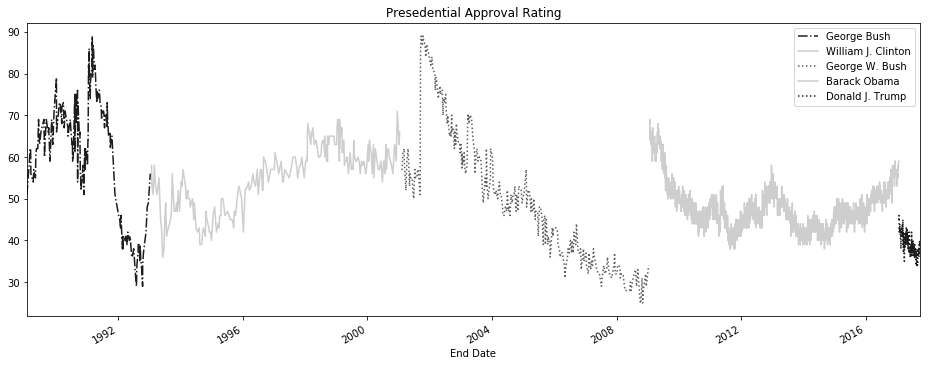

In [ ]:
from matplotlib import cm
fig, ax = plt.subplots(figsize=(16,6))

styles = ['-.', '-', ':', '-', ':']
colors = [.9, .3, .7, .3, .9]
groups = pres_41_45.groupby('President', sort=False)

for style, color, (pres, df) in zip(styles, colors, groups):
    df.plot('End Date', 'Approving', ax=ax, label=pres, style=style, color=cm.Greys(color),
            title='Presedential Approval Rating')

In [ ]:
pres_41_45['Days in Office'] = pres_41_45.groupby('President')['End Date'].transform(lambda x: x - x.iloc[0])
pres_41_45.groupby('President').head(3)

President Start Date   End Date  Approving  Disapproving  \
0            George Bush 1989-01-24 1989-01-26         51             6   
1            George Bush 1989-02-24 1989-02-27         60            11   
2            George Bush 1989-02-28 1989-03-02         62            13   
158   William J. Clinton 1993-01-24 1993-01-26         58            20   
159   William J. Clinton 1993-01-29 1993-01-31         53            30   
160   William J. Clinton 1993-02-12 1993-02-14         51            33   
386       George W. Bush 2001-02-01 2001-02-04         57            25   
387       George W. Bush 2001-02-09 2001-02-11         57            24   
388       George W. Bush 2001-02-19 2001-02-21         61            21   
656         Barack Obama 2009-01-21 2009-01-23         68            12   
657         Barack Obama 2009-01-22 2009-01-24         69            13   
658         Barack Obama 2009-01-23 2009-01-25         67            14   
3443     Donald J. Trump 2017-01-20 2017-01-22         45            45   
3444     Donald J. Trump 2017-01-21 2017-01-23         45            46   
3445     Donald J. Trump 2017-01-22 2017-01-24         46            45   

      unsure/no data Days in Office  
0                 43         0 days  
1                 27        32 days  
2                 24        35 days  
158               22         0 days  
159               16         5 days  
160               15        19 days  
386               18         0 days  
387               17         7 days  
388               16        17 days  
656               21         0 days  
657               18         1 days  
658               19         2 days  
3443              10         0 days  
3444               9         1 days  
3445               9         2 days

In [ ]:
pres_41_45.dtypes

President                  object
Start Date         datetime64[ns]
End Date           datetime64[ns]
Approving                   int64
Disapproving                int64
unsure/no data              int64
Days in Office    timedelta64[ns]
dtype: object

In [ ]:
pres_41_45['Days in Office'] = pres_41_45['Days in Office'].astype('int')
pres_41_45['Days in Office'].head()

0     0
1    32
2    35
3    43
4    46
Name: Days in Office, dtype: int64

In [ ]:
pres_pivot = pres_41_45.pivot(index='Days in Office', columns='President', values='Approving')
pres_pivot.head()

President       Barack Obama  Donald J. Trump  George Bush  George W. Bush  \
Days in Office                                                               
0                       68.0             45.0         51.0            57.0   
1                       69.0             45.0          NaN             NaN   
2                       67.0             46.0          NaN             NaN   
3                       65.0             46.0          NaN             NaN   
4                       64.0             45.0          NaN             NaN   

President       William J. Clinton  
Days in Office                      
0                             58.0  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN

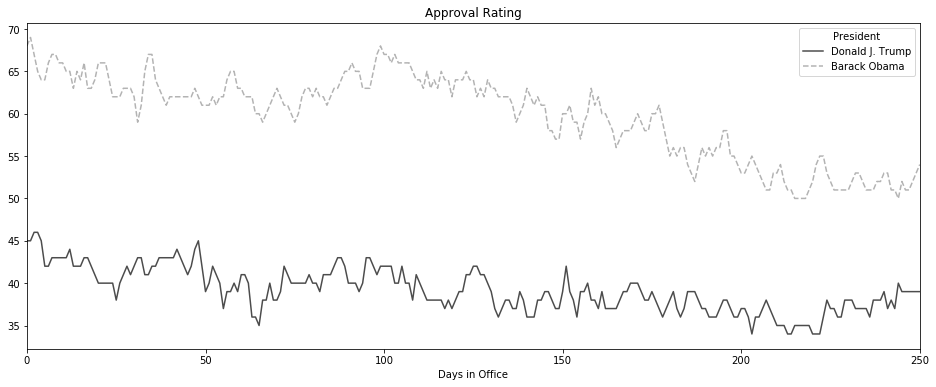

In [ ]:
plot_kwargs = dict(figsize=(16,6), color=cm.gray([.3, .7]), style=['-', '--'], title='Approval Rating')
pres_pivot.loc[:250, ['Donald J. Trump', 'Barack Obama']].ffill().plot(**plot_kwargs)

## There's more...

In [ ]:
pres_rm = pres_41_45.groupby('President', sort=False) \
                    .rolling('90D', on='End Date')['Approving'] \
                    .mean()
pres_rm.head()

President    End Date  
George Bush  1989-01-26    51.000000
             1989-02-27    55.500000
             1989-03-02    57.666667
             1989-03-10    58.750000
             1989-03-13    58.200000
Name: Approving, dtype: float64

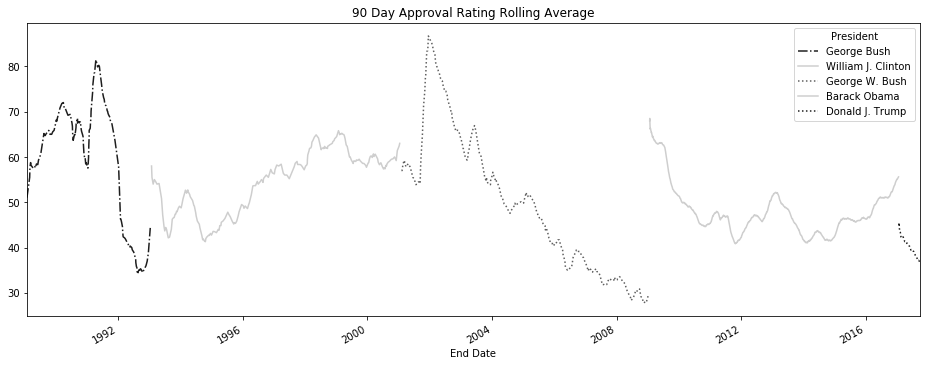

In [ ]:
styles = ['-.', '-', ':', '-', ':']
colors = [.9, .3, .7, .3, .9]
color = cm.Greys(colors)
title='90 Day Approval Rating Rolling Average'
plot_kwargs = dict(figsize=(16,6), style=styles, color = color, title=title)
correct_col_order = pres_41_45.President.unique()
pres_rm.unstack('President')[correct_col_order].plot(**plot_kwargs)

# Replicating concat with merge and join

In [ ]:
from IPython.display import display_html

years = 2016, 2017, 2018
stock_tables = [pd.read_csv('data/stocks_{}.csv'.format(year), index_col='Symbol')
                for year in years]

def display_frames(frames, num_spaces=0):
    t_style = '<table style="display: inline;"'
    tables_html = [df.to_html().replace('<table', t_style) for df in frames]

    space = '&nbsp;' * num_spaces
    display_html(space.join(tables_html), raw=True)

display_frames(stock_tables, 30)
stocks_2016, stocks_2017, stocks_2018 = stock_tables

Shares 
 Low 
 High 
 
 
 Symbol 
 
 
 
 
 
 
 
 AAPL 
 80 
 95 
 110 
 
 
 TSLA 
 50 
 80 
 130 
 
 
 WMT 
 40 
 55 
 70 
 
 
                                
 
 
 
 Shares 
 Low 
 High 
 
 
 Symbol 
 
 
 
 
 
 
 
 AAPL 
 50 
 120 
 140 
 
 
 GE 
 100 
 30 
 40 
 
 
 IBM 
 87 
 75 
 95 
 
 
 SLB 
 20 
 55 
 85 
 
 
 TXN 
 500 
 15 
 23 
 
 
 TSLA 
 100 
 100 
 300 
 
 
                                
 
 
 
 Shares 
 Low 
 High 
 
 
 Symbol 
 
 
 
 
 
 
 
 AAPL 
 40 
 135 
 170 
 
 
 AMZN 
 8 
 900 
 1125 
 
 
 TSLA 
 50 
 220 
 400

In [ ]:
pd.concat(stock_tables, keys=[2016, 2017, 2018])

Shares  Low  High
     Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300
2018 AAPL        40  135   170
     AMZN         8  900  1125
     TSLA        50  220   400

In [ ]:
pd.concat(dict(zip(years,stock_tables)), axis='columns')

2016                2017                 2018               
     Shares   Low   High Shares    Low   High Shares    Low    High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0   40.0  135.0   170.0
AMZN    NaN   NaN    NaN    NaN    NaN    NaN    8.0  900.0  1125.0
GE      NaN   NaN    NaN  100.0   30.0   40.0    NaN    NaN     NaN
IBM     NaN   NaN    NaN   87.0   75.0   95.0    NaN    NaN     NaN
SLB     NaN   NaN    NaN   20.0   55.0   85.0    NaN    NaN     NaN
TSLA   50.0  80.0  130.0  100.0  100.0  300.0   50.0  220.0   400.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0    NaN    NaN     NaN
WMT    40.0  55.0   70.0    NaN    NaN    NaN    NaN    NaN     NaN

In [ ]:
stocks_2016.join(stocks_2017, lsuffix='_2016', rsuffix='_2017', how='outer')

Shares_2016  Low_2016  High_2016  Shares_2017  Low_2017  High_2017
Symbol                                                                    
AAPL           80.0      95.0      110.0         50.0     120.0      140.0
GE              NaN       NaN        NaN        100.0      30.0       40.0
IBM             NaN       NaN        NaN         87.0      75.0       95.0
SLB             NaN       NaN        NaN         20.0      55.0       85.0
TSLA           50.0      80.0      130.0        100.0     100.0      300.0
TXN             NaN       NaN        NaN        500.0      15.0       23.0
WMT            40.0      55.0       70.0          NaN       NaN        NaN

In [ ]:
stocks_2016

Shares  Low  High
Symbol                   
AAPL        80   95   110
TSLA        50   80   130
WMT         40   55    70

In [ ]:
other = [stocks_2017.add_suffix('_2017'), stocks_2018.add_suffix('_2018')]
stocks_2016.add_suffix('_2016').join(other, how='outer')

Shares_2016  Low_2016  High_2016  Shares_2017  Low_2017  High_2017  \
AAPL         80.0      95.0      110.0         50.0     120.0      140.0   
AMZN          NaN       NaN        NaN          NaN       NaN        NaN   
GE            NaN       NaN        NaN        100.0      30.0       40.0   
IBM           NaN       NaN        NaN         87.0      75.0       95.0   
SLB           NaN       NaN        NaN         20.0      55.0       85.0   
TSLA         50.0      80.0      130.0        100.0     100.0      300.0   
TXN           NaN       NaN        NaN        500.0      15.0       23.0   
WMT          40.0      55.0       70.0          NaN       NaN        NaN   

      Shares_2018  Low_2018  High_2018  
AAPL         40.0     135.0      170.0  
AMZN          8.0     900.0     1125.0  
GE            NaN       NaN        NaN  
IBM           NaN       NaN        NaN  
SLB           NaN       NaN        NaN  
TSLA         50.0     220.0      400.0  
TXN           NaN       NaN        NaN  
WMT           NaN       NaN        NaN

In [ ]:
stock_join = stocks_2016.add_suffix('_2016').join(other, how='outer')
stock_concat = pd.concat(dict(zip(years,stock_tables)), axis='columns')

In [ ]:
stock_concat.columns = stock_concat.columns.get_level_values(1) + '_' + \
                            stock_concat.columns.get_level_values(0).astype(str)

In [ ]:
stock_concat

Shares_2016  Low_2016  High_2016  Shares_2017  Low_2017  High_2017  \
AAPL         80.0      95.0      110.0         50.0     120.0      140.0   
AMZN          NaN       NaN        NaN          NaN       NaN        NaN   
GE            NaN       NaN        NaN        100.0      30.0       40.0   
IBM           NaN       NaN        NaN         87.0      75.0       95.0   
SLB           NaN       NaN        NaN         20.0      55.0       85.0   
TSLA         50.0      80.0      130.0        100.0     100.0      300.0   
TXN           NaN       NaN        NaN        500.0      15.0       23.0   
WMT          40.0      55.0       70.0          NaN       NaN        NaN   

      Shares_2018  Low_2018  High_2018  
AAPL         40.0     135.0      170.0  
AMZN          8.0     900.0     1125.0  
GE            NaN       NaN        NaN  
IBM           NaN       NaN        NaN  
SLB           NaN       NaN        NaN  
TSLA         50.0     220.0      400.0  
TXN           NaN       NaN        NaN  
WMT           NaN       NaN        NaN

In [ ]:
step1 = stocks_2016.merge(stocks_2017, left_index=True, right_index=True,
                          how='outer', suffixes=('_2016', '_2017'))
stock_merge = step1.merge(stocks_2018.add_suffix('_2018'),
                          left_index=True, right_index=True, how='outer')

stock_concat.equals(stock_merge)

True

In [ ]:
data/fo

In [ ]:
names = ['prices', 'transactions']
food_tables = [pd.read_csv('data/food_{}.csv'.format(name)) for name in names]
food_prices, food_transactions = food_tables
display_frames(food_tables, 30)

item 
 store 
 price 
 Date 
 
 
 
 
 0 
 pear 
 A 
 0.99 
 2017 
 
 
 1 
 pear 
 B 
 1.99 
 2017 
 
 
 2 
 peach 
 A 
 2.99 
 2017 
 
 
 3 
 peach 
 B 
 3.49 
 2017 
 
 
 4 
 banana 
 A 
 0.39 
 2017 
 
 
 5 
 banana 
 B 
 0.49 
 2017 
 
 
 6 
 steak 
 A 
 5.99 
 2017 
 
 
 7 
 steak 
 B 
 6.99 
 2017 
 
 
 8 
 steak 
 B 
 4.99 
 2015 
 
 
                                
 
 
 
 custid 
 item 
 store 
 quantity 
 
 
 
 
 0 
 1 
 pear 
 A 
 5 
 
 
 1 
 1 
 banana 
 A 
 10 
 
 
 2 
 2 
 steak 
 B 
 3 
 
 
 3 
 2 
 pear 
 B 
 1 
 
 
 4 
 2 
 peach 
 B 
 2 
 
 
 5 
 2 
 steak 
 B 
 1 
 
 
 6 
 2 
 coconut 
 B 
 4

In [ ]:
food_transactions.merge(food_prices, on=['item', 'store'])

custid    item store  quantity  price  Date
0       1    pear     A         5   0.99  2017
1       1  banana     A        10   0.39  2017
2       2   steak     B         3   6.99  2017
3       2   steak     B         3   4.99  2015
4       2   steak     B         1   6.99  2017
5       2   steak     B         1   4.99  2015
6       2    pear     B         1   1.99  2017
7       2   peach     B         2   3.49  2017

In [ ]:
food_transactions.merge(food_prices.query('Date == 2017'), how='left')

custid     item store  quantity  price    Date
0       1     pear     A         5   0.99  2017.0
1       1   banana     A        10   0.39  2017.0
2       2    steak     B         3   6.99  2017.0
3       2     pear     B         1   1.99  2017.0
4       2    peach     B         2   3.49  2017.0
5       2    steak     B         1   6.99  2017.0
6       2  coconut     B         4    NaN     NaN

In [ ]:
food_prices_join = food_prices.query('Date == 2017').set_index(['item', 'store'])
food_prices_join

price  Date
item   store             
pear   A       0.99  2017
       B       1.99  2017
peach  A       2.99  2017
       B       3.49  2017
banana A       0.39  2017
       B       0.49  2017
steak  A       5.99  2017
       B       6.99  2017

In [ ]:
food_transactions.join(food_prices_join, on=['item', 'store'])

custid     item store  quantity  price    Date
0       1     pear     A         5   0.99  2017.0
1       1   banana     A        10   0.39  2017.0
2       2    steak     B         3   6.99  2017.0
3       2     pear     B         1   1.99  2017.0
4       2    peach     B         2   3.49  2017.0
5       2    steak     B         1   6.99  2017.0
6       2  coconut     B         4    NaN     NaN

In [ ]:
pd.concat([food_transactions.set_index(['item', 'store']),
           food_prices.set_index(['item', 'store'])], axis='columns')

Exception: cannot handle a non-unique multi-index!

In [ ]:
import glob

df_list = []
for filename in glob.glob('data/gas prices/*.csv'):
    df_list.append(pd.read_csv(filename, index_col='Week', parse_dates=['Week']))

gas = pd.concat(df_list, axis='columns')
gas.head()

All Grades  Diesel  Midgrade  Premium  Regular
Week                                                      
2017-09-25       2.701   2.788     2.859    3.105    2.583
2017-09-18       2.750   2.791     2.906    3.151    2.634
2017-09-11       2.800   2.802     2.953    3.197    2.685
2017-09-04       2.794   2.758     2.946    3.191    2.679
2017-08-28       2.513   2.605     2.668    2.901    2.399

# Connecting to SQL Databases

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/chinook.db')

In [ ]:
tracks = pd.read_sql_table('tracks', engine)
tracks.head()

TrackId                                     Name  AlbumId  MediaTypeId  \
0        1  For Those About To Rock (We Salute You)        1            1   
1        2                        Balls to the Wall        2            2   
2        3                          Fast As a Shark        3            2   
3        4                        Restless and Wild        3            2   
4        5                     Princess of the Dawn        3            2   

   GenreId                                           Composer  Milliseconds  \
0        1          Angus Young, Malcolm Young, Brian Johnson        343719   
1        1                                               None        342562   
2        1  F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...        230619   
3        1  F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...        252051   
4        1                         Deaffy & R.A. Smith-Diesel        375418   

      Bytes  UnitPrice  
0  11170334       0.99  
1   5510424       0.99  
2   3990994       0.99  
3   4331779       0.99  
4   6290521       0.99

In [ ]:
genres = pd.read_sql_table('genres', engine)
genres.head()

GenreId                Name
0        1                Rock
1        2                Jazz
2        3               Metal
3        4  Alternative & Punk
4        5       Rock And Roll

In [ ]:
genre_track = genres.merge(tracks[['GenreId', 'Milliseconds']],
                           on='GenreId', how='left') \
                     .drop('GenreId', axis='columns')

genre_track['Milliseconds'] = pd.to_timedelta(genre_track['Milliseconds'], unit='ms')
genre_track.head()

Name    Milliseconds
0  Rock 00:05:43.719000
1  Rock 00:05:42.562000
2  Rock 00:03:50.619000
3  Rock 00:04:12.051000
4  Rock 00:06:15.418000

In [ ]:
genre_time = genre_track.groupby('Name')['Milliseconds'].mean()
pd.to_timedelta(genre_time, unit='ms').dt.floor('s').sort_values()

Name
Rock And Roll        00:02:14
Opera                00:02:54
Hip Hop/Rap          00:02:58
Easy Listening       00:03:09
Bossa Nova           00:03:39
R&B/Soul             00:03:40
World                00:03:44
Pop                  00:03:49
Latin                00:03:52
Alternative & Punk   00:03:54
Soundtrack           00:04:04
Reggae               00:04:07
Alternative          00:04:24
Blues                00:04:30
Rock                 00:04:43
Jazz                 00:04:51
Classical            00:04:53
Heavy Metal          00:04:57
Electronica/Dance    00:05:02
Metal                00:05:09
Comedy               00:26:25
TV Shows             00:35:45
Drama                00:42:55
Science Fiction      00:43:45
Sci Fi & Fantasy     00:48:31
Name: Milliseconds, dtype: timedelta64[ns]

In [ ]:
cust = pd.read_sql_table('customers', engine,
                         columns=['CustomerId', 'FirstName', 'LastName'])
invoice = pd.read_sql_table('invoices', engine,
                            columns=['InvoiceId','CustomerId'])
ii = pd.read_sql_table('invoice_items', engine,
                       columns=['InvoiceId', 'UnitPrice', 'Quantity'])

In [ ]:
cust_inv = cust.merge(invoice, on='CustomerId') \
               .merge(ii, on='InvoiceId')
cust_inv.head()

CustomerId FirstName   LastName  InvoiceId  UnitPrice  Quantity
0           1      Luís  Gonçalves         98       1.99         1
1           1      Luís  Gonçalves         98       1.99         1
2           1      Luís  Gonçalves        121       0.99         1
3           1      Luís  Gonçalves        121       0.99         1
4           1      Luís  Gonçalves        121       0.99         1

In [ ]:
cust_inv.assign(Total = cust_inv['Quantity'] * cust_inv['UnitPrice']) \
        .groupby(['CustomerId', 'FirstName', 'LastName'])['Total'] \
        .sum() \
        .sort_values(ascending=False).head()

CustomerId  FirstName  LastName  
6           Helena     Holý          49.62
26          Richard    Cunningham    47.62
57          Luis       Rojas         46.62
46          Hugh       O'Reilly      45.62
45          Ladislav   Kovács        45.62
Name: Total, dtype: float64

## There's more...

In [ ]:
pd.read_sql_query('select * from tracks limit 5', engine)

TrackId                                     Name  AlbumId  MediaTypeId  \
0        1  For Those About To Rock (We Salute You)        1            1   
1        2                        Balls to the Wall        2            2   
2        3                          Fast As a Shark        3            2   
3        4                        Restless and Wild        3            2   
4        5                     Princess of the Dawn        3            2   

   GenreId                                           Composer  Milliseconds  \
0        1          Angus Young, Malcolm Young, Brian Johnson        343719   
1        1                                               None        342562   
2        1  F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...        230619   
3        1  F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...        252051   
4        1                         Deaffy & R.A. Smith-Diesel        375418   

      Bytes  UnitPrice  
0  11170334       0.99  
1   5510424       0.99  
2   3990994       0.99  
3   4331779       0.99  
4   6290521       0.99

In [ ]:
sql_string1 = '''
select
    Name,
    time(avg(Milliseconds) / 1000, 'unixepoch') as avg_time
from (
        select
            g.Name,
            t.Milliseconds
        from
            genres as g
        join
            tracks as t
            on
                g.genreid == t.genreid
    )
group by
    Name
order by
    avg_time
'''
pd.read_sql_query(sql_string1, engine)

Name  avg_time
0        Rock And Roll  00:02:14
1                Opera  00:02:54
2          Hip Hop/Rap  00:02:58
3       Easy Listening  00:03:09
4           Bossa Nova  00:03:39
5             R&B/Soul  00:03:40
6                World  00:03:44
7                  Pop  00:03:49
8                Latin  00:03:52
9   Alternative & Punk  00:03:54
10          Soundtrack  00:04:04
11              Reggae  00:04:07
12         Alternative  00:04:24
13               Blues  00:04:30
14                Rock  00:04:43
15                Jazz  00:04:51
16           Classical  00:04:53
17         Heavy Metal  00:04:57
18   Electronica/Dance  00:05:02
19               Metal  00:05:09
20              Comedy  00:26:25
21            TV Shows  00:35:45
22               Drama  00:42:55
23     Science Fiction  00:43:45
24    Sci Fi & Fantasy  00:48:31

In [ ]:
sql_string2 = '''
select
      c.customerid,
      c.FirstName,
      c.LastName,
      sum(ii.quantity *  ii.unitprice) as Total
from
     customers as c
join
     invoices as i
          on c.customerid = i.customerid
join
    invoice_items as ii
          on i.invoiceid = ii.invoiceid
group by
    c.customerid, c.FirstName, c.LastName
order by
    Total desc
'''
pd.read_sql_query(sql_string2, engine)

CustomerId  FirstName      LastName  Total
0            6     Helena          Holý  49.62
1           26    Richard    Cunningham  47.62
2           57       Luis         Rojas  46.62
3           45   Ladislav        Kovács  45.62
4           46       Hugh      O'Reilly  45.62
5           37       Fynn    Zimmermann  43.62
6           24      Frank       Ralston  43.62
7           28      Julia       Barnett  43.62
8           25     Victor       Stevens  42.62
9            7     Astrid        Gruber  42.62
10          44      Terhi    Hämäläinen  41.62
11           5  František   Wichterlová  40.62
12          43   Isabelle       Mercier  40.62
13          48   Johannes  Van der Berg  40.62
14          20        Dan        Miller  39.62
15          34       João     Fernandes  39.62
16           1       Luís     Gonçalves  39.62
17           3   François      Tremblay  39.62
18           4      Bjørn        Hansen  39.62
19          17       Jack         Smith  39.62
20          22    Heather       Leacock  39.62
21          42      Wyatt        Girard  39.62
22          15   Jennifer      Peterson  38.62
23          19        Tim         Goyer  38.62
24          39    Camille       Bernard  38.62
25          40  Dominique      Lefebvre  38.62
26          51     Joakim     Johansson  38.62
27          58      Manoj        Pareek  38.62
28           2     Leonie        Köhler  37.62
29           8       Daan       Peeters  37.62
30           9       Kara       Nielsen  37.62
31          10    Eduardo       Martins  37.62
32          11  Alexandre         Rocha  37.62
33          12    Roberto       Almeida  37.62
34          13   Fernanda         Ramos  37.62
35          14       Mark       Philips  37.62
36          16      Frank        Harris  37.62
37          18   Michelle        Brooks  37.62
38          21      Kathy         Chase  37.62
39          23       John        Gordon  37.62
40          27    Patrick          Gray  37.62
41          29     Robert         Brown  37.62
42          30     Edward       Francis  37.62
43          31     Martha          Silk  37.62
44          32      Aaron      Mitchell  37.62
45          33      Ellie      Sullivan  37.62
46          35   Madalena       Sampaio  37.62
47          36     Hannah     Schneider  37.62
48          38     Niklas      Schröder  37.62
49          41       Marc        Dubois  37.62
50          47      Lucas       Mancini  37.62
51          49  Stanisław        Wójcik  37.62
52          50    Enrique         Muñoz  37.62
53          52       Emma         Jones  37.62
54          53       Phil        Hughes  37.62
55          54      Steve        Murray  37.62
56          55       Mark        Taylor  37.62
57          56      Diego     Gutiérrez  37.62
58          59       Puja    Srivastava  36.64

# Chapter 11: Visualization with Matplotlib, Pandas, and Seaborn
## Recipes

* [Getting started with matplotlib](#Getting-started-with-matplotlib)
* [Visualizing data with matplotlib](#Visualizing-data-with-matplotlib)
* [Plotting basics with pandas](#Plotting-basics-with-pandas)
* [Visualizing the flights dataset](#Visualizing-the-flights-dataset)
* [Stacking area charts to discover emerging trends](#Stacking-area-charts-to-discover-emerging-trends)
* [Understanding the differences between seaborn and pandas](#Understanding-the-differences-between-seaborn-and-pandas)
* [Doing multivariate analysis with seaborn grids](#Doing-multivariate-analysis-with-seaborn-grids)
* [Uncovering Simpson's paradox in the diamonds dataset with seaborn](#Uncovering-Simpson's-paradox-in-the-diamonds-dataset-with-seaborn)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Getting started with matplotlib

## Getting Ready

Text(0.5,1.03,'Figure Title')

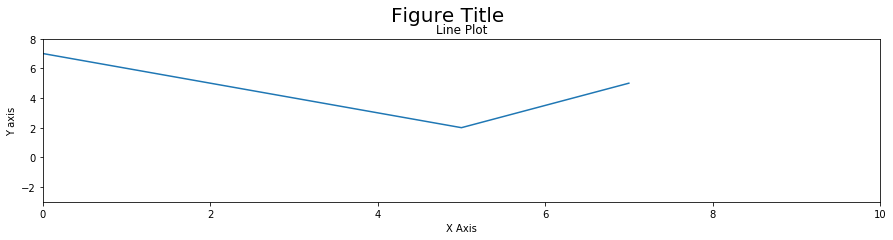

In [ ]:
x = [-3, 5, 7]
y = [10, 2, 5]

plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)

Text(0.5,1.03,'Figure Title')

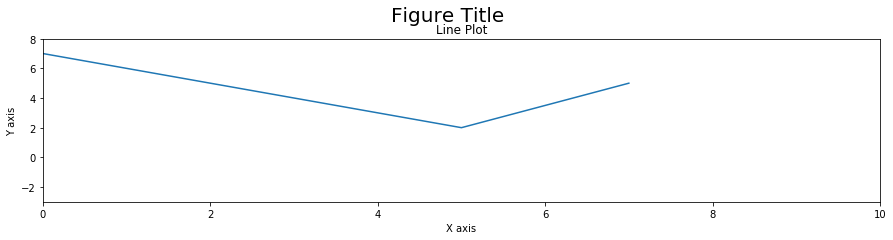

In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)

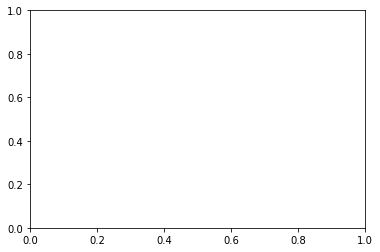

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)

In [ ]:
type(fig)

matplotlib.figure.Figure

In [ ]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [ ]:
fig.get_size_inches()

array([ 6.,  4.])

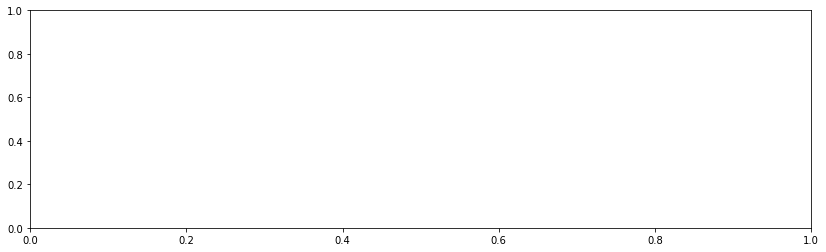

In [ ]:
fig.set_size_inches(14, 4)
fig

In [ ]:
fig.axes

In [ ]:
fig.axes[0] is ax

True

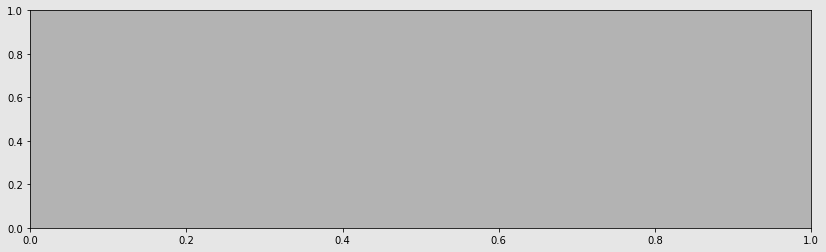

In [ ]:
fig.set_facecolor('.9')
ax.set_facecolor('.7')
fig

In [ ]:
spines = ax.spines
spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x113414da0>),
             ('right', <matplotlib.spines.Spine at 0x113434fd0>),
             ('bottom', <matplotlib.spines.Spine at 0x113434d30>),
             ('top', <matplotlib.spines.Spine at 0x113434e48>)])

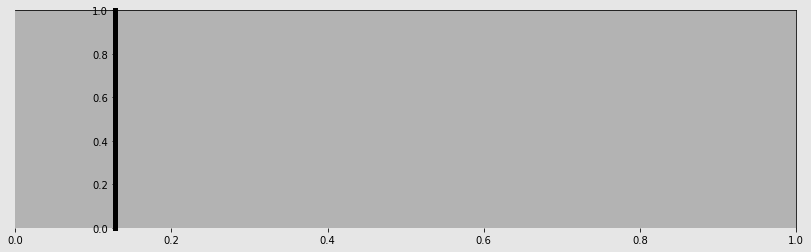

In [ ]:
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)

spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

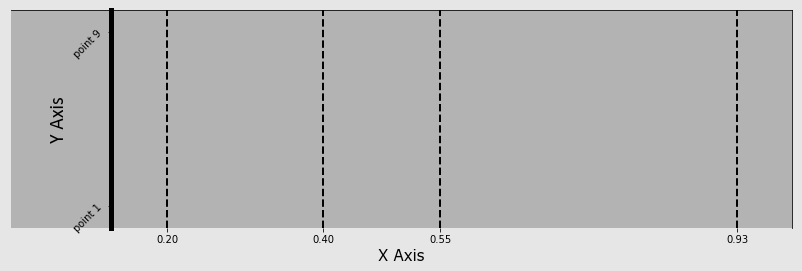

In [ ]:
ax.xaxis.grid(True, which='major', linewidth=2, color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)

ax.set_ylabel('Y Axis', family='Calibri', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig

In [ ]:
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5,22.2,'X Axis'),
  Text(1,23.2,''),
 'clip_box': TransformedBbox(Bbox([[0.0, 0.0], [1.0, 1.0]]), CompositeGenericTransform(CompositeGenericTransform(BboxTransformTo(Bbox([[0.0, 0.0], [1.0, 1.0]])), Affine2D(array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]]))), BboxTransformTo(TransformedBbox(Bbox([[0.125, 0.125], [0.9, 0.88]]), BboxTransformTo(TransformedBbox(Bbox([[0.0, 0.0], [14.0, 4.0]]), Affine2D(array([[ 72.,   0.,   0.],
        [  0.,  72.,   0.],
        [  0.,   0.,   1.]])))))))),
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_interval': array([ inf, -inf]),
 'figure': <matplotlib.figure.Figure at 0x11332abe0>,
 'gid': None,
 'gridlines': <a list of 4 Line2D gridline objects>,
 'label': Text(0.5,22.2,'X Axis'),
 'label_position': 'bottom',
 'label_text': 'X Axis',
 'major_formatter': <matplotlib.ticker.ScalarFormatter at 0x113543780>,
 'major_locator': <matp

In [ ]:
movie = pd.read_csv('data/movie.csv')

med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [ ]:
years = med_budget_roll.index.values
years[-5:]

array([ 2012.,  2013.,  2014.,  2015.,  2016.])

In [ ]:
budget = med_budget_roll.values
budget[-5:]

array([ 20.893,  19.893,  19.1  ,  17.98 ,  17.78 ])

Text(0,0.5,'Millions of Dollars')

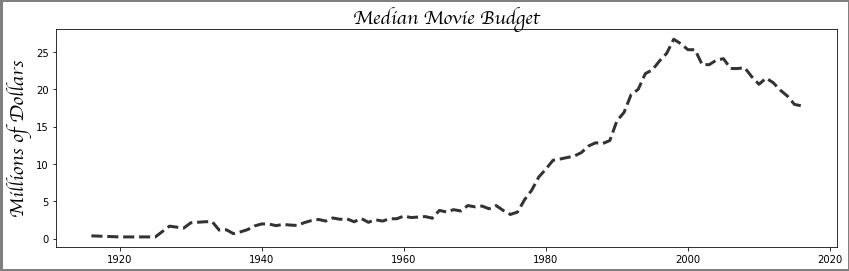

In [ ]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
text_kwargs=dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

In [ ]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

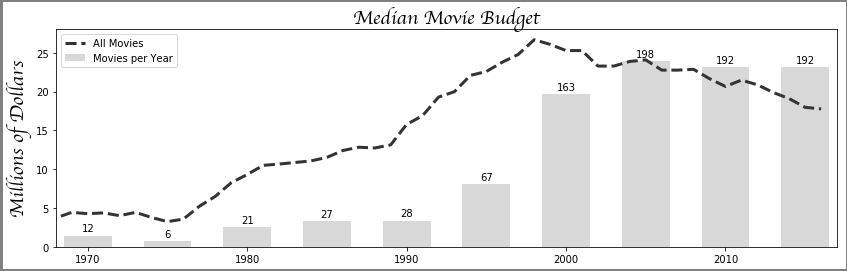

In [ ]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()
fig

## How it works...

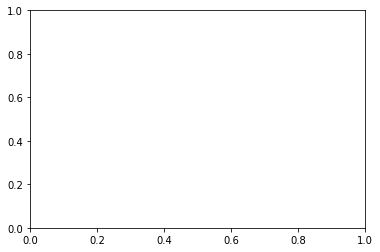

In [ ]:
plot_objects = plt.subplots()

In [ ]:
type(plot_objects)

tuple

In [ ]:
fig = plot_objects[0]
ax = plot_objects[1]

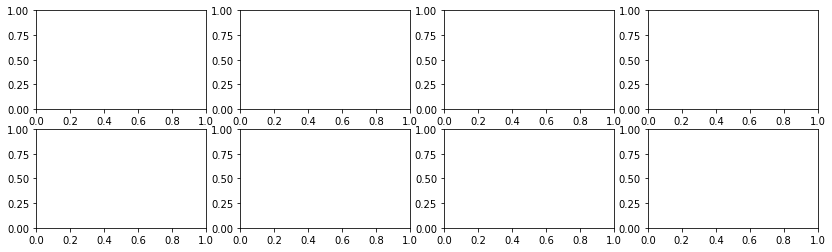

In [ ]:
plot_objects = plt.subplots(2, 4, figsize=(14, 4))

In [ ]:
plot_objects[1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113eefa20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1142f2898>]], dtype=object)

In [ ]:
fig.get_axes() == fig.axes

True

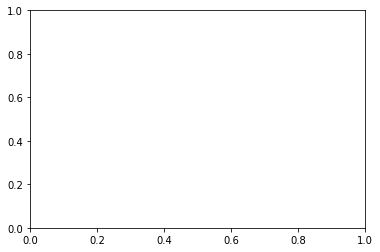

In [ ]:
fig, ax = plt.subplots()

In [ ]:
fig.axes == fig.get_axes()

True

In [ ]:
ax.xaxis == ax.get_xaxis()

True

In [ ]:
ax.yaxis == ax.get_yaxis()

True

# Visualizing data with matplotlib

In [ ]:
movie = pd.read_csv('data/movie.csv')
med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [ ]:
years = med_budget_roll.index.values
years[-5:]

array([ 2012.,  2013.,  2014.,  2015.,  2016.])

In [ ]:
budget = med_budget_roll.values
budget[-5:]

array([ 20.893,  19.893,  19.1  ,  17.98 ,  17.78 ])

Text(0,0.5,'Millions of Dollars')

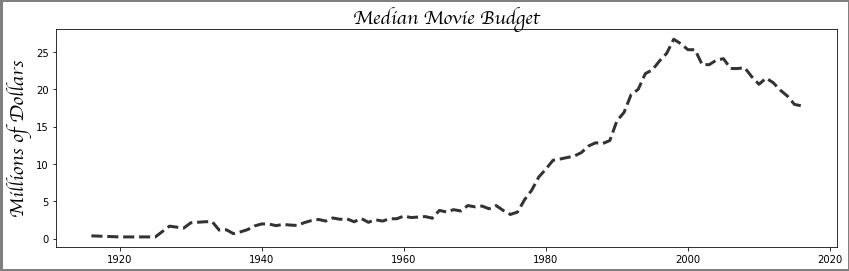

In [ ]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
text_kwargs=dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

In [ ]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

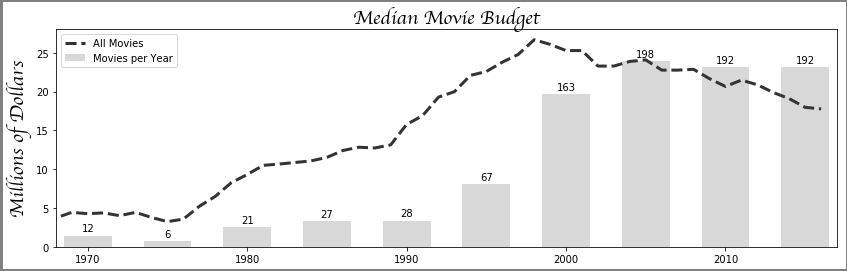

In [ ]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()
fig

In [ ]:
top10 = movie.sort_values('budget', ascending=False) \
             .groupby('title_year')['budget'] \
             .apply(lambda x: x.iloc[:10].median() / 1e6)

top10_roll = top10.rolling(5, min_periods=1).mean()
top10_roll.tail()

title_year
2012.0    192.9
2013.0    195.9
2014.0    191.7
2015.0    186.8
2016.0    189.1
Name: budget, dtype: float64

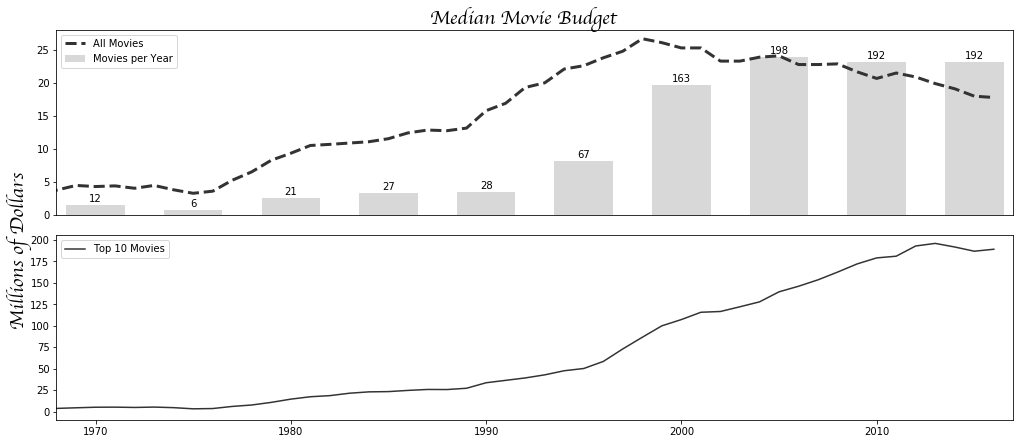

In [ ]:
fig2, ax_array = plt.subplots(2, 1, figsize=(14,6), sharex=True)
ax1 = ax_array[0]
ax2 = ax_array[1]

ax1.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
ax1.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax1.legend(loc='upper left')
ax1.set_xlim(1968, 2017)
plt.setp(ax1.get_xticklines(), visible=False)

for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax1.text(x, y + .5, str(v), ha='center')

ax2.plot(years, top10_roll.values, color='.2', label='Top 10 Movies')
ax2.legend(loc='upper left')

fig2.tight_layout()
fig2.suptitle('Median Movie Budget', y=1.02, **text_kwargs)
fig2.text(0, .6, 'Millions of Dollars', rotation='vertical', ha='center', **text_kwargs)

import os
path = os.path.expanduser('~/Desktop/movie_budget.png')
fig2.savefig(path, bbox_inches='tight')

## How it works...

In [ ]:
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [ ]:
med_budget.loc[2012:2016].mean()

17.78

In [ ]:
med_budget.loc[2011:2015].mean()

17.98

In [ ]:
med_budget.loc[2010:2014].mean()

19.1

In [ ]:
os.path.expanduser('~/Desktop/movie_budget.png')

'/Users/Ted/Desktop/movie_budget.png'

## There's more...

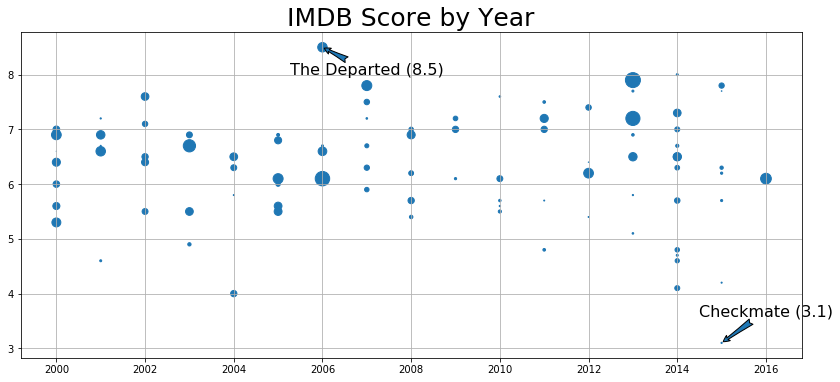

In [ ]:
cols = ['budget', 'title_year', 'imdb_score', 'movie_title']
m = movie[cols].dropna()

# m = movie[['budget', 'title_year', 'imdb_score', 'movie_title']].dropna()
m['budget2'] = m['budget'] / 1e6
np.random.seed(0)
movie_samp = m.query('title_year >= 2000').sample(100)

fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(x='title_year', y='imdb_score', s='budget2', data=movie_samp)

idx_min = movie_samp['imdb_score'].idxmin()
idx_max = movie_samp['imdb_score'].idxmax()
for idx, offset in zip([idx_min, idx_max], [.5, -.5]):
    year = movie_samp.loc[idx, 'title_year']
    score = movie_samp.loc[idx, 'imdb_score']
    title = movie_samp.loc[idx, 'movie_title']
    ax.annotate(xy=(year, score),
                xytext=(year + 1, score + offset),
                s=title + ' ({})'.format(score),
                ha='center',
                size=16,
                arrowprops=dict(arrowstyle="fancy"))
ax.set_title('IMDB Score by Year', size=25)
ax.grid(True)

# Plotting basics with pandas

In [ ]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'],
                  data={'Apples':[20, 10, 40, 20, 50],
                        'Oranges':[35, 40, 25, 19, 33]})
df

Apples  Oranges
Atiya          20       35
Abbas          10       40
Cornelia       40       25
Stephanie      20       19
Monte          50       33

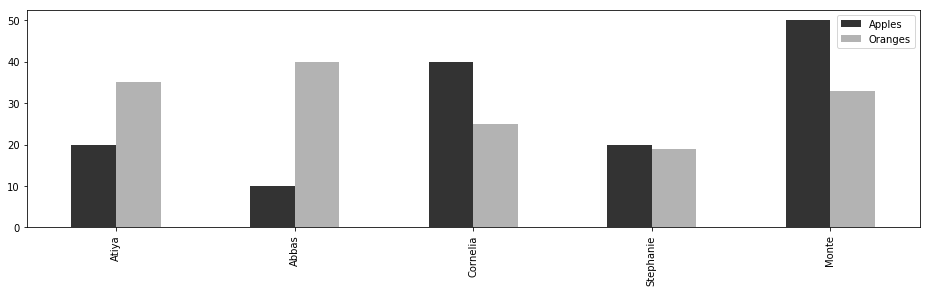

In [ ]:
color = ['.2', '.7']
df.plot(kind='bar', color=color, figsize=(16,4))

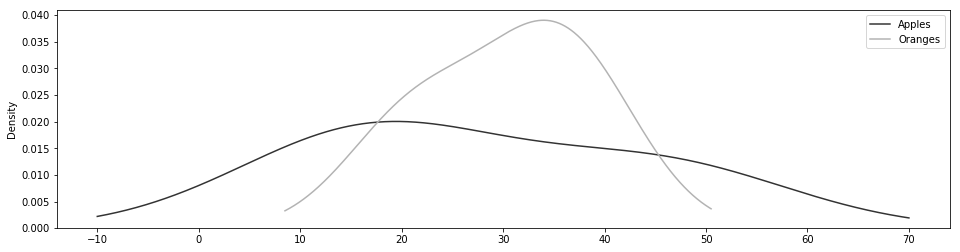

In [ ]:
df.plot(kind='kde', color=color, figsize=(16,4))

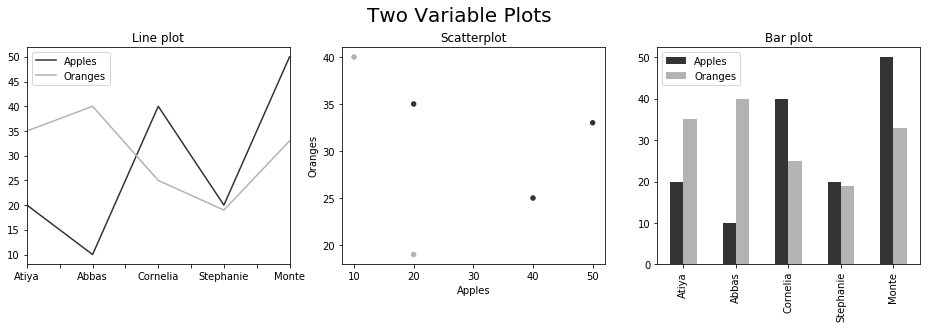

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('Two Variable Plots', size=20, y=1.02)
df.plot(kind='line', color=color, ax=ax1, title='Line plot')
df.plot(x='Apples', y='Oranges', kind='scatter', color=color,
        ax=ax2, title='Scatterplot')
df.plot(kind='bar', color=color, ax=ax3, title='Bar plot')

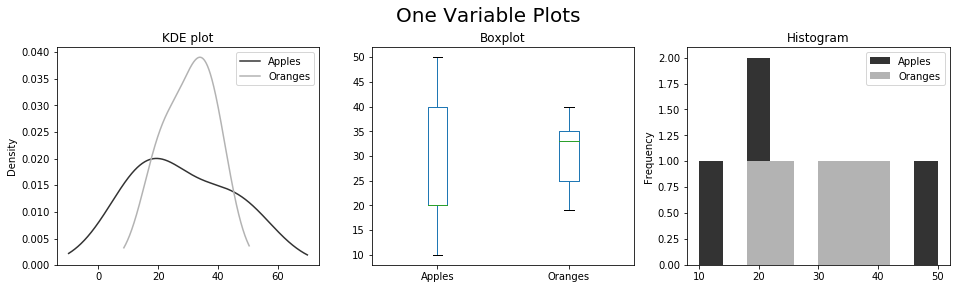

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('One Variable Plots', size=20, y=1.02)
df.plot(kind='kde', color=color, ax=ax1, title='KDE plot')
df.plot(kind='box', ax=ax2, title='Boxplot')
df.plot(kind='hist', color=color, ax=ax3, title='Histogram')

## There's more

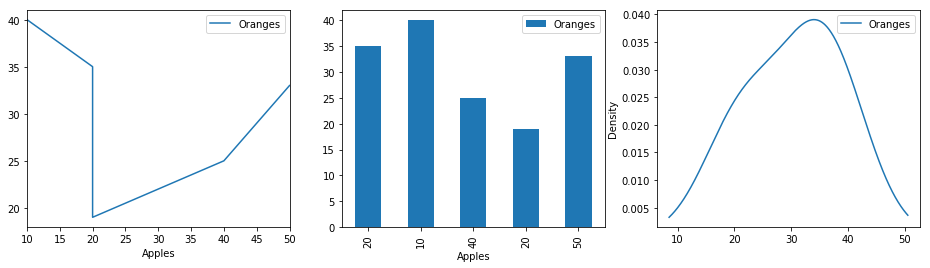

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
df.sort_values('Apples').plot(x='Apples', y='Oranges', kind='line', ax=ax1)
df.plot(x='Apples', y='Oranges', kind='bar', ax=ax2)
df.plot(x='Apples', kind='kde', ax=ax3)

# Visualizing the flights dataset

In [ ]:
flights = pd.read_csv('data/flights.csv')
flights.head()

MONTH  DAY  WEEKDAY AIRLINE ORG_AIR DEST_AIR  SCHED_DEP  DEP_DELAY  \
0      1    1        4      WN     LAX      SLC       1625       58.0   
1      1    1        4      UA     DEN      IAD        823        7.0   
2      1    1        4      MQ     DFW      VPS       1305       36.0   
3      1    1        4      AA     DFW      DCA       1555        7.0   
4      1    1        4      WN     LAX      MCI       1720       48.0   

   AIR_TIME  DIST  SCHED_ARR  ARR_DELAY  DIVERTED  CANCELLED  
0      94.0   590       1905       65.0         0          0  
1     154.0  1452       1333      -13.0         0          0  
2      85.0   641       1453       35.0         0          0  
3     126.0  1192       1935       -7.0         0          0  
4     166.0  1363       2225       39.0         0          0

In [ ]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
flights['ON_TIME'] = 1 - flights[cols].any(axis=1)

cols.append('ON_TIME')
status = flights[cols].sum()
status

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

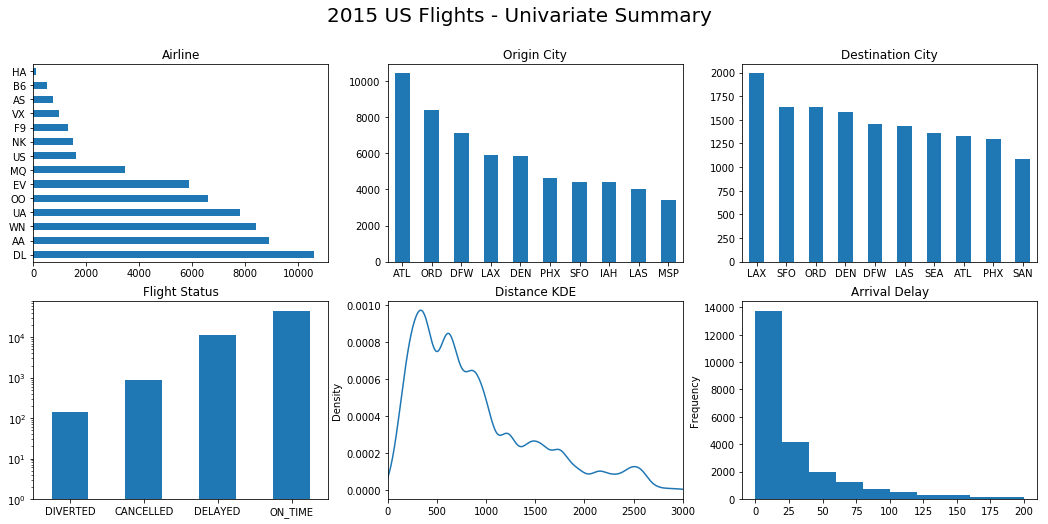

In [ ]:
fig, ax_array = plt.subplots(2, 3, figsize=(18,8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size=20)

ac = flights['AIRLINE'].value_counts()
ac.plot(kind='barh', ax=ax1, title ='Airline')

oc = flights['ORG_AIR'].value_counts()
oc.plot(kind='bar', ax=ax2, rot=0, title='Origin City')

dc = flights['DEST_AIR'].value_counts().head(10)
dc.plot(kind='bar', ax=ax3, rot=0, title='Destination City')

status.plot(kind='bar', ax=ax4, rot=0, log=True, title='Flight Status')
flights['DIST'].plot(kind='kde', ax=ax5, xlim=(0, 3000),
                     title='Distance KDE')
flights['ARR_DELAY'].plot(kind='hist', ax=ax6,
                          title='Arrival Delay', range=(0,200))

In [ ]:
hour = flights['SCHED_DEP'] // 100
minute = flights['SCHED_DEP'] % 100
df_date = flights[['MONTH', 'DAY']].assign(YEAR=2015, HOUR=hour, MINUTE=minute)
df_date.head()

MONTH  DAY  HOUR  MINUTE  YEAR
0      1    1    16      25  2015
1      1    1     8      23  2015
2      1    1    13       5  2015
3      1    1    15      55  2015
4      1    1    17      20  2015

In [ ]:
flight_dep = pd.to_datetime(df_date)
flight_dep.head()

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

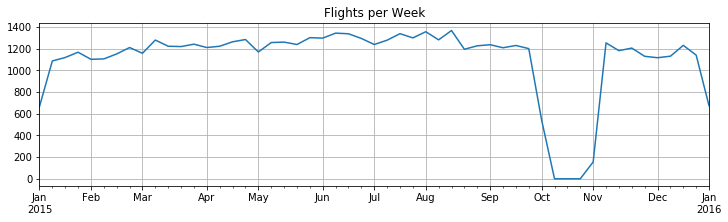

In [ ]:
flights.index = flight_dep
fc = flights.resample('W').size()
fc.plot(figsize=(12,3), title='Flights per Week', grid=True)

Text(0.5,1,'Flights per Week (Interpolated Missing Data)')

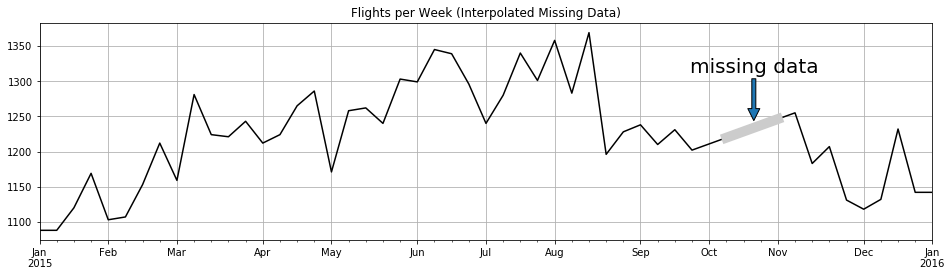

In [ ]:
fc_miss = fc.where(fc >  1000)
fc_intp = fc_miss.interpolate(limit_direction='both')

ax = fc_intp.plot(color='black', figsize=(16,4))
fc_intp[fc < 500].plot(linewidth=10, grid=True,
                       color='.8', ax=ax)

ax.annotate(xy=(.8, .55), xytext=(.8, .77),
            xycoords='axes fraction', s='missing data',
            ha='center',  size=20, arrowprops=dict())
ax.set_title('Flights per Week (Interpolated Missing Data)')

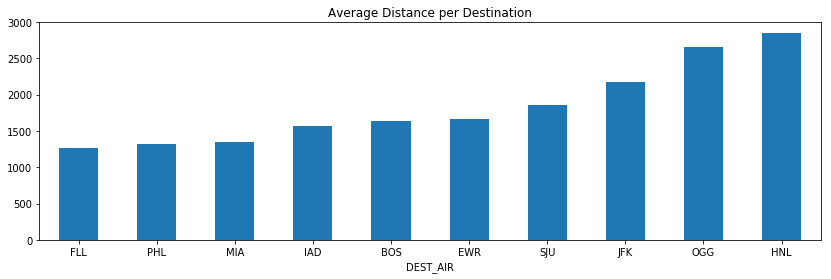

In [ ]:
flights.groupby('DEST_AIR')['DIST'] \
       .agg(['mean', 'count']) \
       .query('count > 100') \
       .sort_values('mean') \
       .tail(10) \
       .plot(kind='bar', y='mean', legend=False,
             rot=0, figsize=(14,4),
             title='Average Distance per Destination')

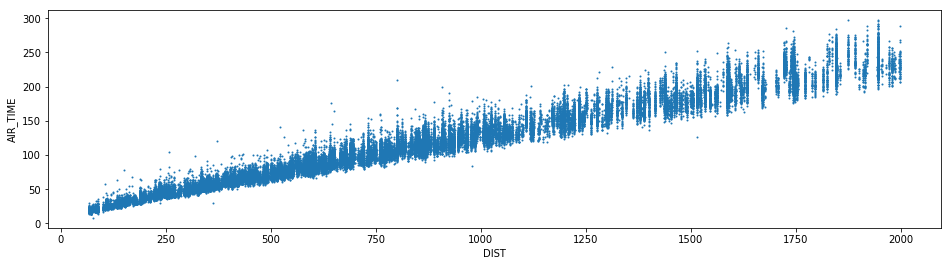

In [ ]:
fs = flights.reset_index(drop=True)[['DIST', 'AIR_TIME']].query('DIST <= 2000').dropna()
fs.plot(x='DIST', y='AIR_TIME', kind='scatter', s=1, figsize=(16,4))

In [ ]:
fs['DIST_GROUP'] = pd.cut(fs['DIST'], bins=range(0, 2001, 250))
fs['DIST_GROUP'].value_counts().sort_index()

(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: DIST_GROUP, dtype: int64

In [ ]:
normalize = lambda x: (x - x.mean()) / x.std()
fs['TIME_SCORE'] = fs.groupby('DIST_GROUP')['AIR_TIME'] \
                     .transform(normalize)

fs.head()

DIST  AIR_TIME    DIST_GROUP  TIME_SCORE
0   590      94.0    (500, 750]    0.490966
1  1452     154.0  (1250, 1500]   -1.267551
2   641      85.0    (500, 750]   -0.296749
3  1192     126.0  (1000, 1250]   -1.211020
4  1363     166.0  (1250, 1500]   -0.521999

/Users/Ted/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

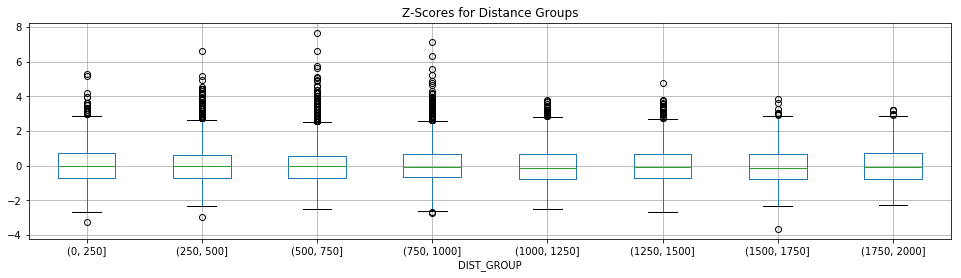

In [ ]:
ax = fs.boxplot(by='DIST_GROUP', column='TIME_SCORE', figsize=(16,4))
ax.set_title('Z-Scores for Distance Groups')
ax.figure.suptitle('')

In [ ]:
outliers = flights.iloc[fs[fs['TIME_SCORE'] > 6].index]
outliers = outliers[['AIRLINE','ORG_AIR', 'DEST_AIR', 'AIR_TIME',
                     'DIST', 'ARR_DELAY', 'DIVERTED']]
outliers['PLOT_NUM'] = range(1, len(outliers) + 1)
outliers

AIRLINE ORG_AIR DEST_AIR  AIR_TIME  DIST  ARR_DELAY  \
2015-04-08 09:40:00      DL     ATL      CVG     121.0   373       54.0   
2015-05-25 16:30:00      F9     MSP      ATL     199.0   907       79.0   
2015-09-10 20:00:00      UA     IAH      MCI     176.0   643       76.0   
2015-12-10 19:53:00      OO     PHX      SFO     164.0   651      146.0   
2015-12-26 09:15:00      NK     ORD      DFW     210.0   802       98.0   

                     DIVERTED  PLOT_NUM  
2015-04-08 09:40:00         0         1  
2015-05-25 16:30:00         0         2  
2015-09-10 20:00:00         0         3  
2015-12-10 19:53:00         0         4  
2015-12-26 09:15:00         0         5

Text(0.5,1,'Flight Time vs Distance with Outliers')

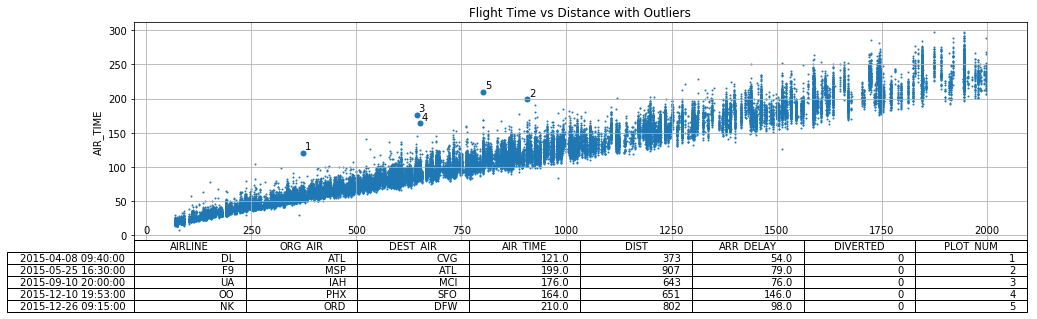

In [ ]:
ax = fs.plot(x='DIST', y='AIR_TIME',
             kind='scatter', s=1,
             figsize=(16,4), table=outliers)
outliers.plot(x='DIST', y='AIR_TIME',
              kind='scatter', s=25, ax=ax, grid=True)

outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]
for t, d, n  in outs.itertuples(index=False):
    ax.text(d + 5, t + 5, str(n))

plt.setp(ax.get_xticklabels(), y=.1)
plt.setp(ax.get_xticklines(), visible=False)
ax.set_xlabel('')
ax.set_title('Flight Time vs Distance with Outliers')

## There's more...

# Stacking area charts to discover emerging trends

In [ ]:
meetup = pd.read_csv('data/meetup_groups.csv',
                     parse_dates=['join_date'],
                     index_col='join_date')
meetup.head()

group     city state country
join_date                                                           
2016-11-18 02:41:29  houston machine learning  Houston    TX      us
2017-05-09 14:16:37  houston machine learning  Houston    TX      us
2016-12-30 02:34:16  houston machine learning  Houston    TX      us
2016-07-18 00:48:17  houston machine learning  Houston    TX      us
2017-05-25 12:58:16  houston machine learning  Houston    TX      us

In [ ]:
group_count = meetup.groupby([pd.Grouper(freq='W'), 'group']).size()
group_count.head()

join_date   group   
2010-11-07  houstonr     5
2010-11-14  houstonr    11
2010-11-21  houstonr     2
2010-12-05  houstonr     1
2011-01-16  houstonr     2
dtype: int64

In [ ]:
gc2 = group_count.unstack('group', fill_value=0)
gc2.tail()

group       houston data science  houston data visualization   \
join_date                                                       
2017-09-17                    16                            2   
2017-09-24                    19                            4   
2017-10-01                    20                            6   
2017-10-08                    22                           10   
2017-10-15                    14                           13   

group       houston energy data science   houston machine learning  houstonr  
join_date                                                                     
2017-09-17                             6                         5         0  
2017-09-24                            16                        12         7  
2017-10-01                             6                        20         1  
2017-10-08                            10                         4         2  
2017-10-15                             9                        11         2

In [ ]:
group_total = gc2.cumsum()
group_total.tail()

group       houston data science  houston data visualization   \
join_date                                                       
2017-09-17                  2105                         1708   
2017-09-24                  2124                         1712   
2017-10-01                  2144                         1718   
2017-10-08                  2166                         1728   
2017-10-15                  2180                         1741   

group       houston energy data science   houston machine learning  houstonr  
join_date                                                                     
2017-09-17                          1886                       708      1056  
2017-09-24                          1902                       720      1063  
2017-10-01                          1908                       740      1064  
2017-10-08                          1918                       744      1066  
2017-10-15                          1927                       755      1068

In [ ]:
row_total = group_total.sum(axis='columns')
group_cum_pct = group_total.div(row_total, axis='index')
group_cum_pct.tail()

group       houston data science  houston data visualization   \
join_date                                                       
2017-09-17              0.282058                     0.228862   
2017-09-24              0.282409                     0.227629   
2017-10-01              0.283074                     0.226829   
2017-10-08              0.284177                     0.226712   
2017-10-15              0.284187                     0.226959   

group       houston energy data science   houston machine learning  houstonr  
join_date                                                                     
2017-09-17                      0.252713                  0.094868  0.141498  
2017-09-24                      0.252892                  0.095732  0.141338  
2017-10-01                      0.251914                  0.097703  0.140481  
2017-10-08                      0.251640                  0.097612  0.139858  
2017-10-15                      0.251206                  0.098423  0.139226

Text(0.86,0.78,'Machine Learning')

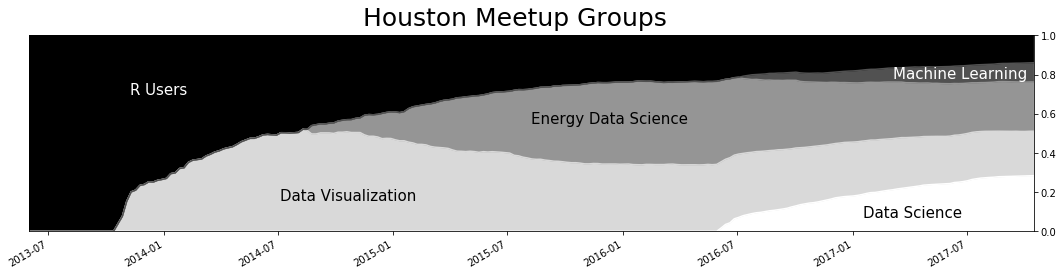

In [ ]:
ax = group_cum_pct.plot(kind='area', figsize=(18,4),
                        cmap='Greys', xlim=('2013-6', None),
                        ylim=(0, 1), legend=False)
ax.figure.suptitle('Houston Meetup Groups', size=25)
ax.set_xlabel('')
ax.yaxis.tick_right()

plot_kwargs = dict(xycoords='axes fraction', size=15)
ax.annotate(xy=(.1, .7), s='R Users', color='w', **plot_kwargs)
ax.annotate(xy=(.25, .16), s='Data Visualization', color='k', **plot_kwargs)
ax.annotate(xy=(.5, .55), s='Energy Data Science', color='k', **plot_kwargs)
ax.annotate(xy=(.83, .07), s='Data Science', color='k', **plot_kwargs)
ax.annotate(xy=(.86, .78), s='Machine Learning', color='w', **plot_kwargs)

## There's more...

In [ ]:
pie_data = group_cum_pct.asfreq('3MS', method='bfill') \
                        .tail(6).to_period('M').T
pie_data

join_date                      2016-06   2016-09   2016-12   2017-03  \
group                                                                  
houston data science          0.016949  0.110375  0.171245  0.212289   
houston data visualization    0.337827  0.306052  0.277244  0.261103   
houston energy data science   0.416025  0.354467  0.312271  0.288859   
houston machine learning      0.000000  0.037176  0.051969  0.071593   
houstonr                      0.229199  0.191931  0.187271  0.166156   

join_date                      2017-06   2017-09  
group                                             
houston data science          0.244033  0.280162  
houston data visualization    0.242085  0.230332  
houston energy data science   0.267576  0.253758  
houston machine learning      0.087839  0.093026  
houstonr                      0.158467  0.142722

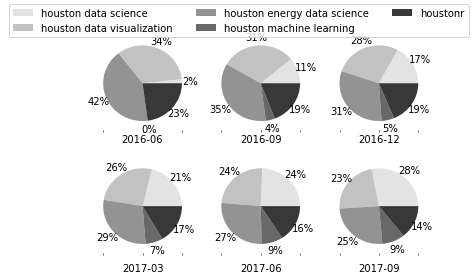

In [ ]:
from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))

ax_array = pie_data.plot(kind='pie', subplots=True,
                         layout=(2,3), labels=None,
                         autopct='%1.0f%%', pctdistance=1.22,
                         colors=greys)
ax1 = ax_array[0, 0]
ax1.figure.legend(ax1.patches, pie_data.index, ncol=3)
for ax in ax_array.flatten():
    ax.xaxis.label.set_visible(True)
    ax.set_xlabel(ax.get_ylabel())
    ax.set_ylabel('')
ax1.figure.subplots_adjust(hspace=.3)

# Understanding the differences between seaborn and pandas

## Getting ready...

In [ ]:
employee = pd.read_csv('data/employee.csv',
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee.head()

UNIQUE_ID               POSITION_TITLE                     DEPARTMENT  \
0          0  ASSISTANT DIRECTOR (EX LVL)    Municipal Courts Department   
1          1            LIBRARY ASSISTANT                        Library   
2          2               POLICE OFFICER  Houston Police Department-HPD   
3          3            ENGINEER/OPERATOR  Houston Fire Department (HFD)   
4          4                  ELECTRICIAN    General Services Department   

   BASE_SALARY             RACE EMPLOYMENT_TYPE  GENDER EMPLOYMENT_STATUS  \
0     121862.0  Hispanic/Latino       Full Time  Female            Active   
1      26125.0  Hispanic/Latino       Full Time  Female            Active   
2      45279.0            White       Full Time    Male            Active   
3      63166.0            White       Full Time    Male            Active   
4      56347.0            White       Full Time    Male            Active   

   HIRE_DATE   JOB_DATE  
0 2006-06-12 2012-10-13  
1 2000-07-19 2010-09-18  
2 2015-02-03 2015-02-03  
3 1982-02-08 1991-05-25  
4 1989-06-19 1994-10-22

In [ ]:
import seaborn as sns

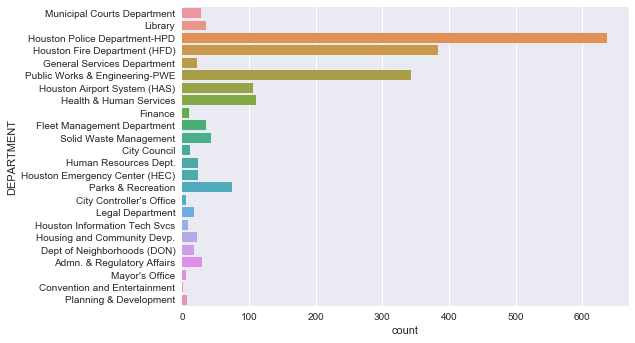

In [ ]:
sns.countplot(y='DEPARTMENT', data=employee)

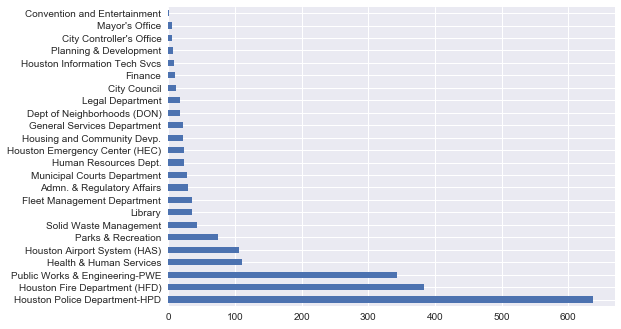

In [ ]:
employee['DEPARTMENT'].value_counts().plot('barh')

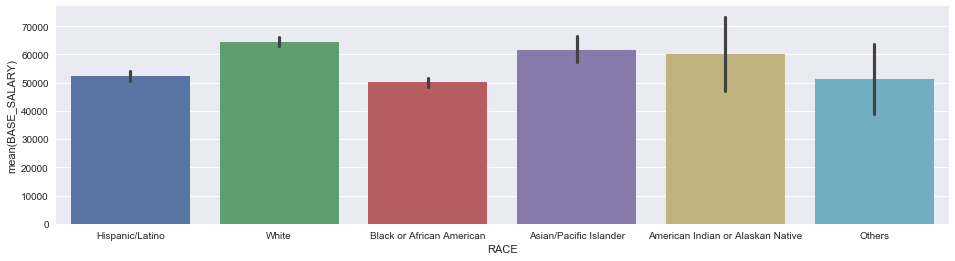

In [ ]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', data=employee)
ax.figure.set_size_inches(16, 4)

Text(0,0.5,'Mean Salary')

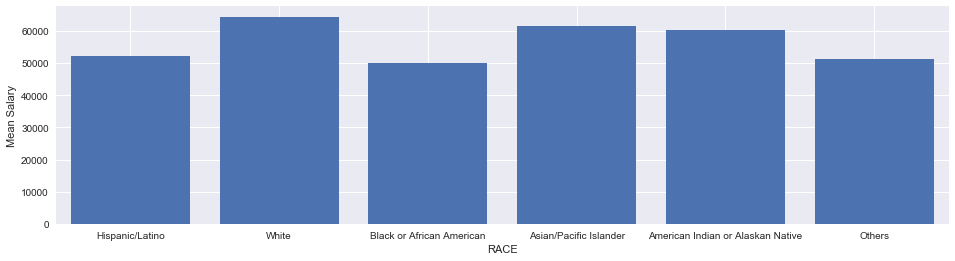

In [ ]:
avg_sal = employee.groupby('RACE', sort=False)['BASE_SALARY'].mean()
ax = avg_sal.plot(kind='bar', rot=0, figsize=(16,4), width=.8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel('Mean Salary')

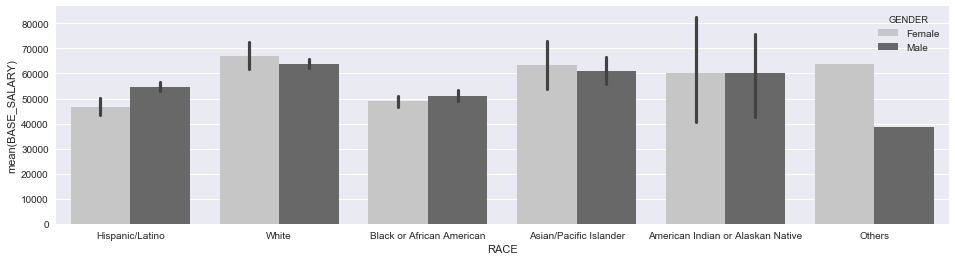

In [ ]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER',
                 data=employee, palette='Greys')
ax.figure.set_size_inches(16,4)

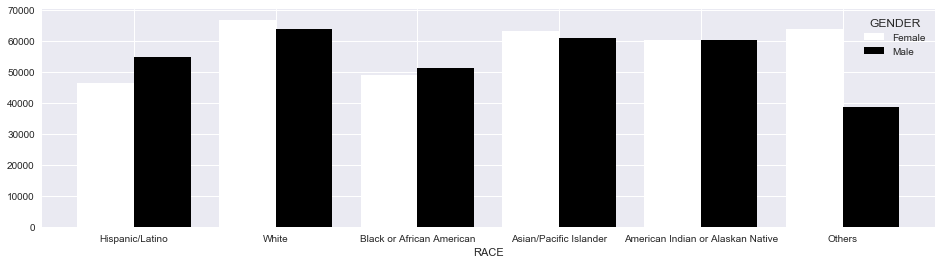

In [ ]:
employee.groupby(['RACE', 'GENDER'], sort=False)['BASE_SALARY'] \
        .mean().unstack('GENDER') \
        .plot(kind='bar', figsize=(16,4), rot=0,
              width=.8, cmap='Greys')

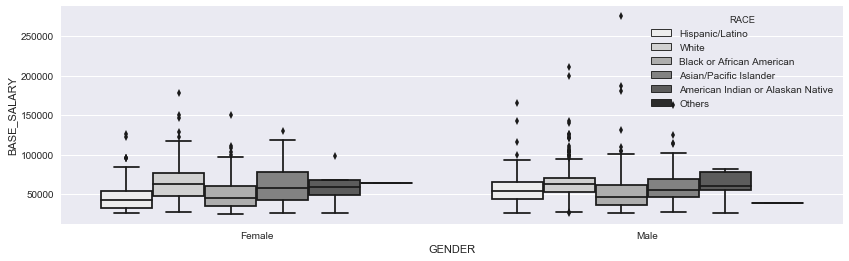

In [ ]:
ax = sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee, hue='RACE', palette='Greys')
ax.figure.set_size_inches(14,4)

/Users/Ted/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

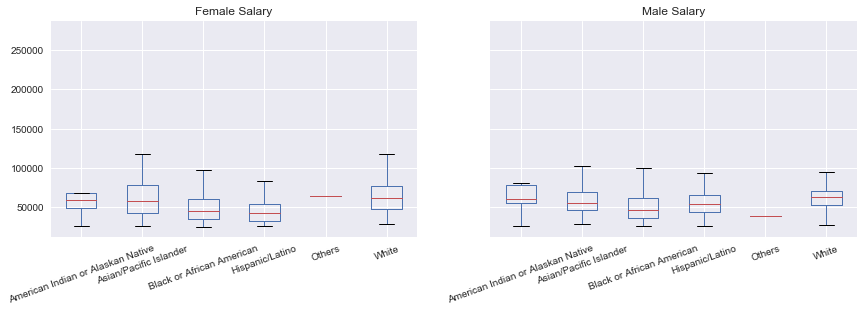

In [ ]:
fig, ax_array = plt.subplots(1, 2, figsize=(14,4), sharey=True)
for g, ax in zip(['Female', 'Male'], ax_array):
    employee.query('GENDER== @g') \
            .boxplot(by='RACE', column='BASE_SALARY', ax=ax, rot=20)
    ax.set_title(g + ' Salary')
    ax.set_xlabel('')
fig.suptitle('')

/Users/Ted/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

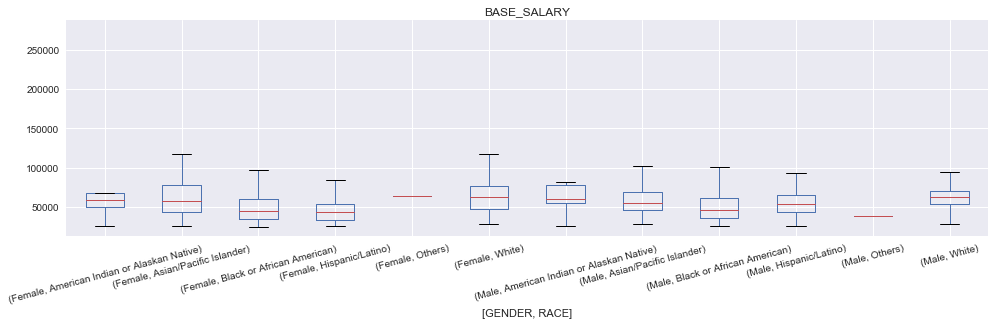

In [ ]:
ax = employee.boxplot(by=['GENDER', 'RACE'],
                      column='BASE_SALARY',
                      figsize=(16,4), rot=15)
ax.figure.suptitle('')

# Doing multivariate analysis with seaborn grids

In [ ]:
employee = pd.read_csv('data/employee.csv',
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
days_hired = (pd.to_datetime('12-1-2016') - employee['HIRE_DATE'])

one_year = pd.Timedelta(1, unit='Y')
employee['YEARS_EXPERIENCE'] =  days_hired / one_year
employee[['HIRE_DATE', 'YEARS_EXPERIENCE']].head()

HIRE_DATE  YEARS_EXPERIENCE
0 2006-06-12         10.472494
1 2000-07-19         16.369946
2 2015-02-03          1.826184
3 1982-02-08         34.812488
4 1989-06-19         27.452994

In [ ]:
import seaborn as sns

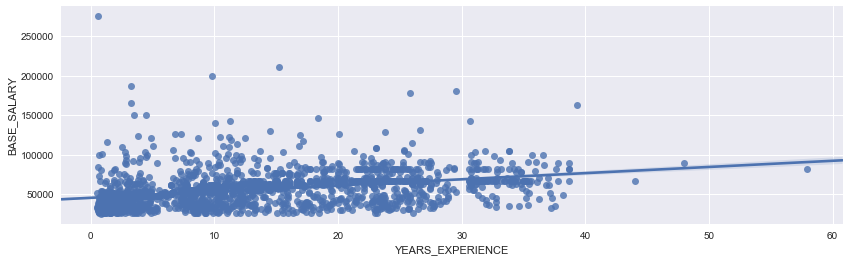

In [ ]:
ax = sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                 data=employee)
ax.figure.set_size_inches(14,4)

seaborn.axisgrid.FacetGrid

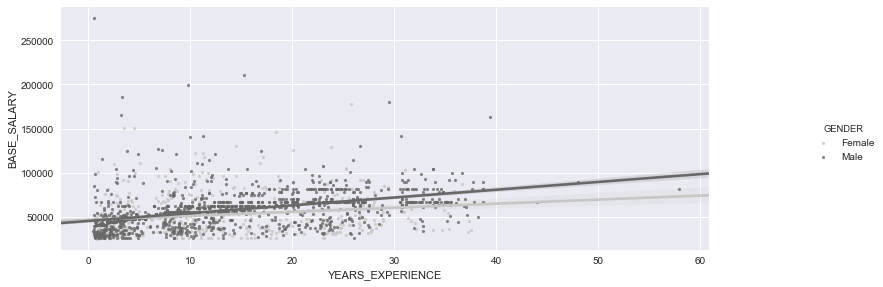

In [ ]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', palette='Greys',
                  scatter_kws={'s':10}, data=employee)
grid.fig.set_size_inches(14, 4)
type(grid)

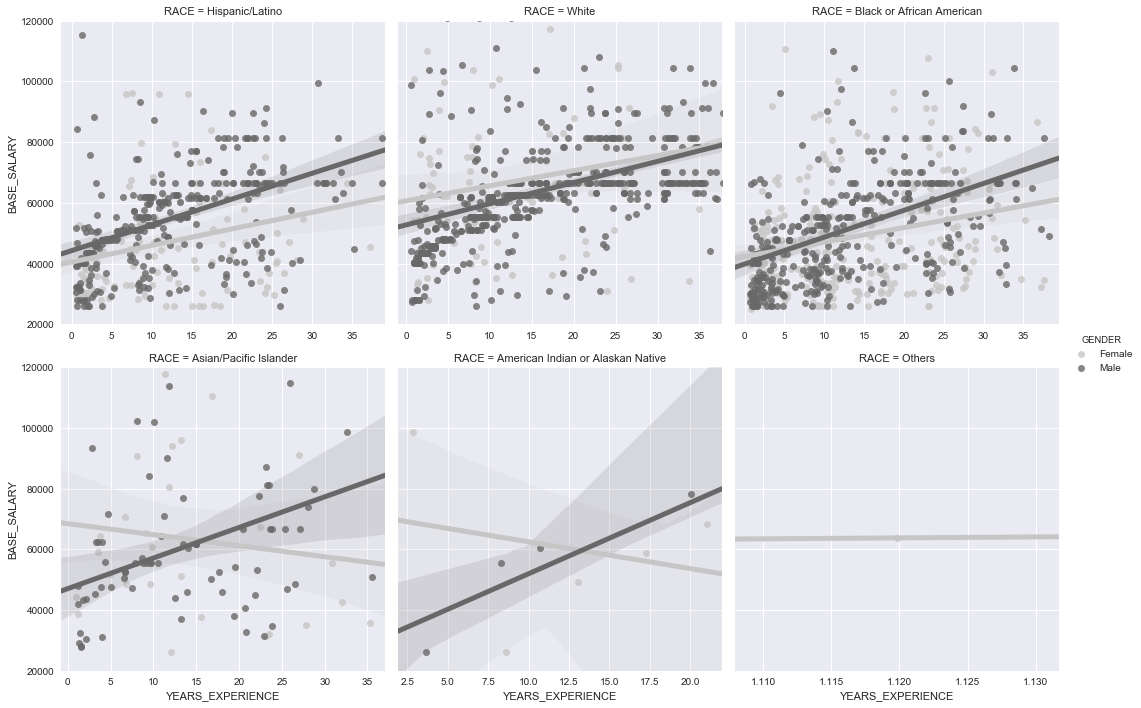

In [ ]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', col='RACE', col_wrap=3,
                  palette='Greys', sharex=False,
                  line_kws = {'linewidth':5},
                  data=employee)
grid.set(ylim=(20000, 120000))

In [ ]:
deps = employee['DEPARTMENT'].value_counts().index[:2]
races = employee['RACE'].value_counts().index[:3]
is_dep = employee['DEPARTMENT'].isin(deps)
is_race = employee['RACE'].isin(races)
emp2 = employee[is_dep & is_race].copy()
emp2['DEPARTMENT'] = emp2.DEPARTMENT.str.extract('(HPD|HFD)', expand=True)
emp2.shape

(968, 11)

In [ ]:
emp2['DEPARTMENT'].value_counts()

HPD    591
HFD    377
Name: DEPARTMENT, dtype: int64

In [ ]:
emp2['RACE'].value_counts()

White                        478
Hispanic/Latino              250
Black or African American    240
Name: RACE, dtype: int64

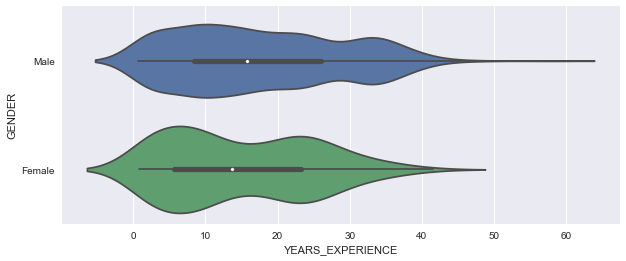

In [ ]:
ax = sns.violinplot(x = 'YEARS_EXPERIENCE', y='GENDER', data=emp2)
ax.figure.set_size_inches(10,4)

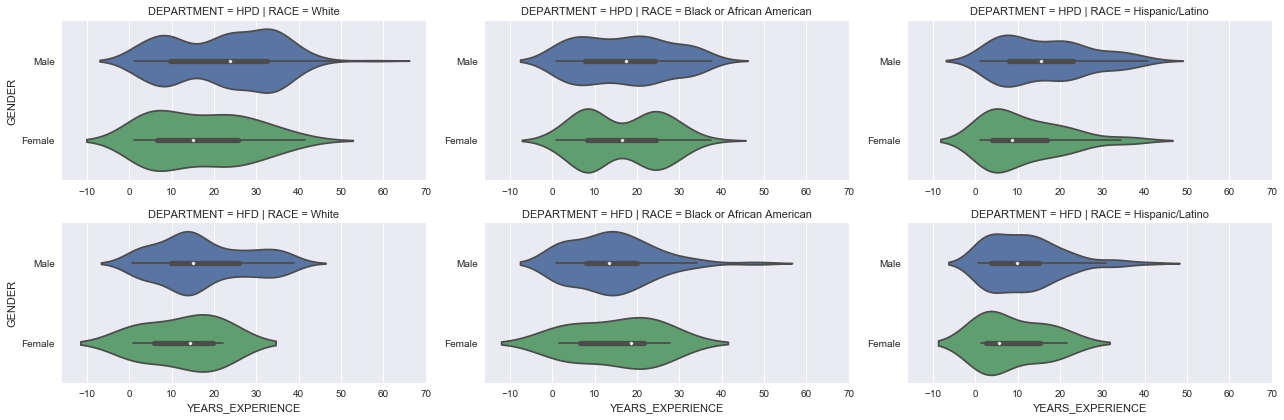

In [ ]:
sns.factorplot(x ='YEARS_EXPERIENCE', y='GENDER',
               col='RACE', row='DEPARTMENT',
               size=3, aspect=2,
               data=emp2, kind='violin')

# Uncovering Simpson's paradox in the diamonds dataset with seaborn

In [ ]:
pd.DataFrame(index=['Student A', 'Student B'],
             data={'Raw Score': ['50/100', '80/100'],
                   'Percent Correct':[50,80]}, columns=['Raw Score', 'Percent Correct'])

Raw Score  Percent Correct
Student A    50/100               50
Student B    80/100               80

In [ ]:
pd.DataFrame(index=['Student A', 'Student B'],
             data={'Difficult': ['45/95', '2/5'],
                   'Easy': ['5/5', '78/95'],
                   'Difficult Percent': [47, 40],
                   'Easy Percent' : [100, 82],
                  'Total Percent':[50, 80]},
             columns=['Difficult', 'Easy', 'Difficult Percent', 'Easy Percent', 'Total Percent'])

Difficult   Easy  Difficult Percent  Easy Percent  Total Percent
Student A     45/95    5/5                 47           100             50
Student B       2/5  78/95                 40            82             80

In [ ]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
diamonds['cut'] = pd.Categorical(diamonds['cut'],
                                 categories=cut_cats,
                                 ordered=True)

diamonds['color'] = pd.Categorical(diamonds['color'],
                                   categories=color_cats,
                                   ordered=True)

diamonds['clarity'] = pd.Categorical(diamonds['clarity'],
                                     categories=clarity_cats,
                                     ordered=True)

Text(0.5,0.98,'Price Decreasing with Increasing Quality?')

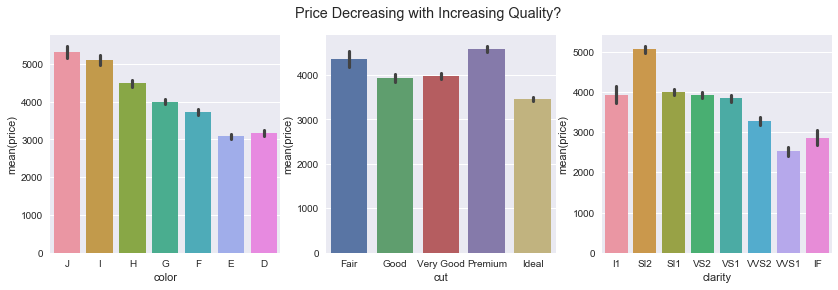

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='price', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='price', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='price', data=diamonds, ax=ax3)
fig.suptitle('Price Decreasing with Increasing Quality?')

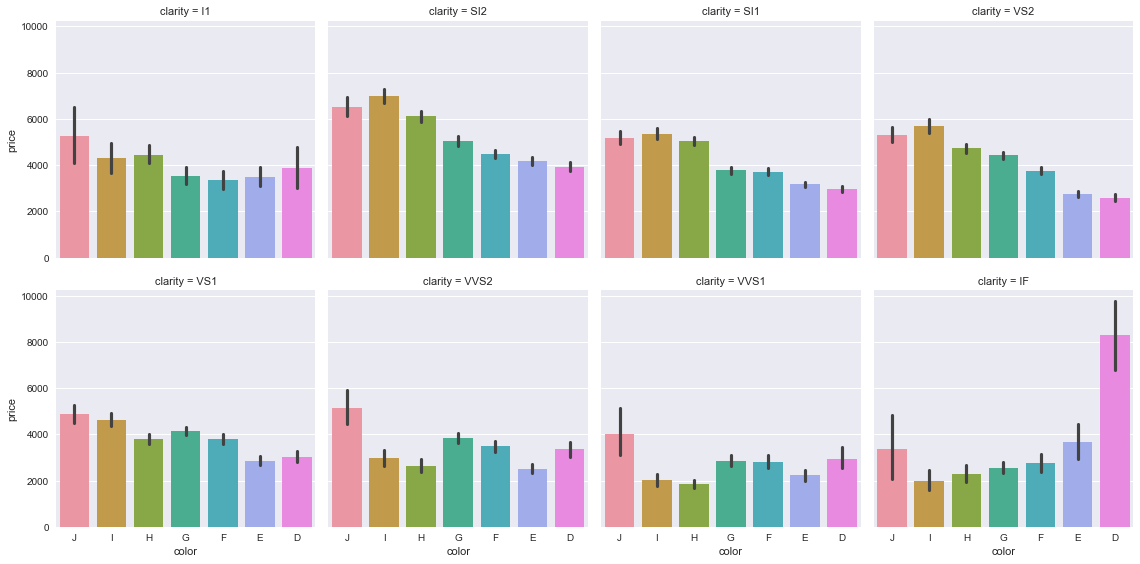

In [ ]:
sns.factorplot(x='color', y='price', col='clarity',
               col_wrap=4, data=diamonds, kind='bar')

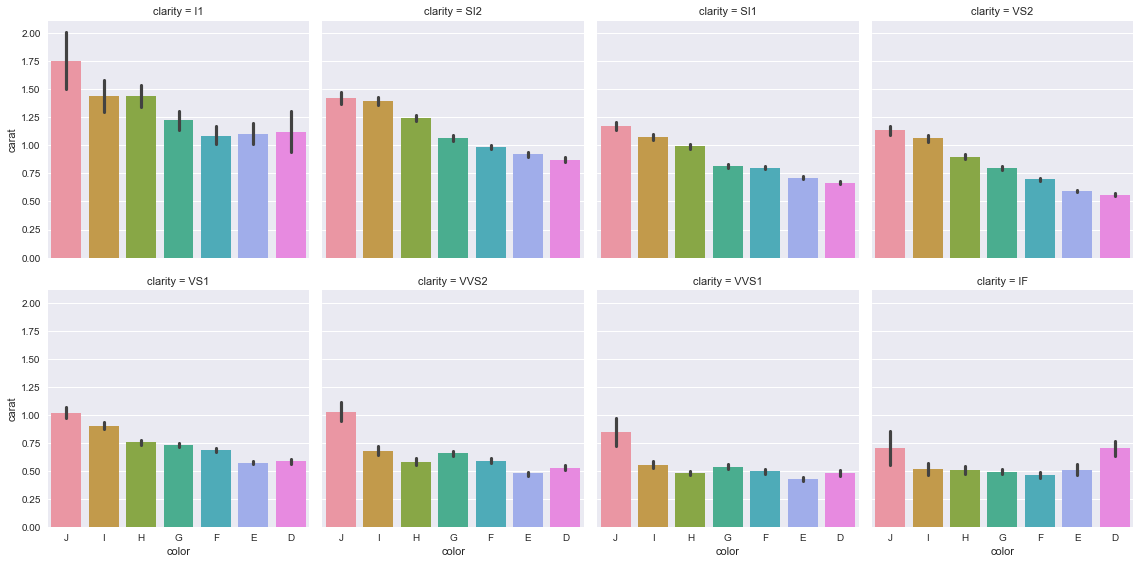

In [ ]:
sns.factorplot(x='color', y='carat', col='clarity',
               col_wrap=4, data=diamonds, kind='bar')

Text(0.5,0.98,'Diamond size decreases with quality')

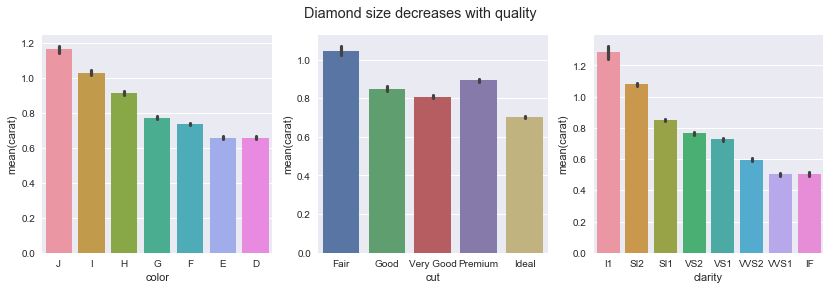

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='carat', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='carat', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='carat', data=diamonds, ax=ax3)
fig.suptitle('Diamond size decreases with quality')

Text(0.5,1.02,'Diamond price by size, color and clarity')

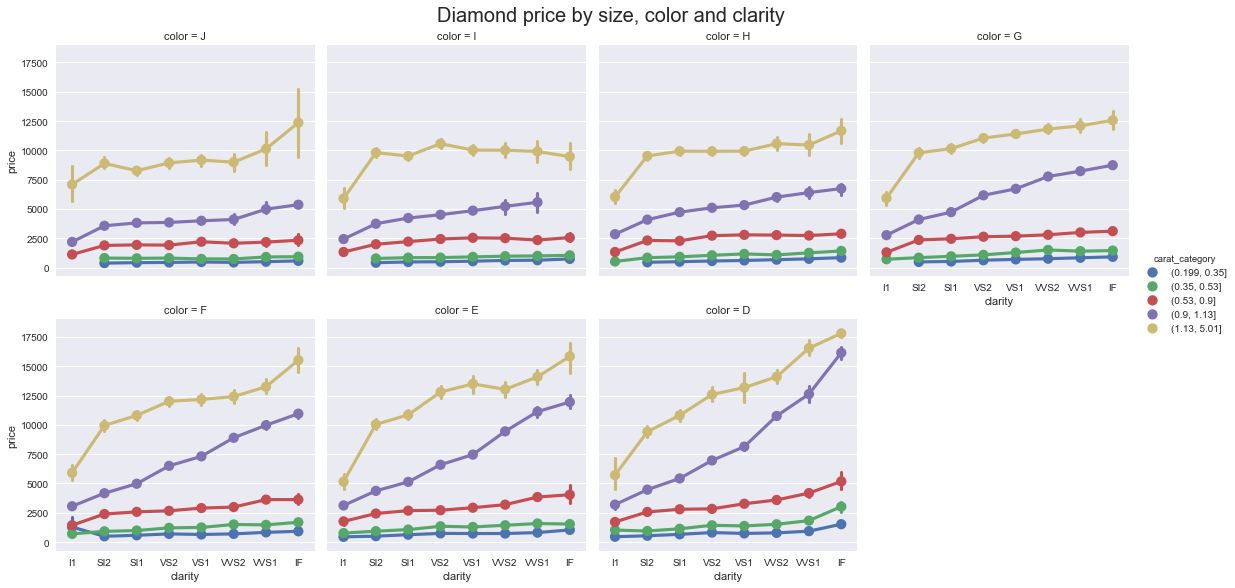

In [ ]:
diamonds['carat_category'] = pd.qcut(diamonds.carat, 5)

from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))

g = sns.factorplot(x='clarity', y='price', data=diamonds,
                   hue='carat_category', col='color',
                   col_wrap=4, kind='point') #, palette=greys)
g.fig.suptitle('Diamond price by size, color and clarity',
               y=1.02, size=20)

## There's more...

Text(0.5,1.02,'Replication of Step 3 with PairGrid')

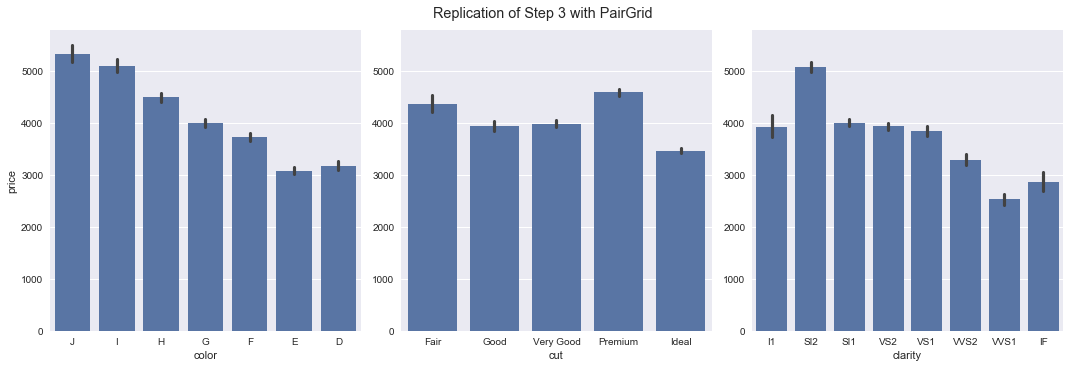

In [ ]:
g = sns.PairGrid(diamonds,size=5,
                 x_vars=["color", "cut", "clarity"],
                 y_vars=["price"])
g.map(sns.barplot)
g.fig.suptitle('Replication of Step 3 with PairGrid', y=1.02)

# Scikit-learn Components

This section covers basic machine learning concepts using scikit-learn, focusing on linear and logistic regression.


## Linear Regression Example

We'll use a simple dataset to demonstrate linear regression. The goal is to predict a continuous target variable based on one or more explanatory variables.

### Data Preparation
```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example dataset
data = {'Size': [50, 60, 70, 80, 90], 'Price': [150000, 180000, 210000, 240000, 270000]}
df = pd.DataFrame(data)

# Preparing the data
X = df[['Size']]  # Features
y = df['Price']   # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
```

### Model Training and Prediction
```python
# Creating the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
```

### Evaluation
```python
# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
```

### Interpretation
- The model's coefficients and intercept can be used to understand the relationship between the feature and the target variable.
- The Mean Squared Error provides a measure of how accurately the model predicts the response.



## Logistic Regression Example

This example demonstrates logistic regression for a binary classification problem.

### Data Preparation
```python
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Loading the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Using only the first two features
y = (iris.target != 0) * 1  # Binary target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
```

### Model Fitting and Prediction
```python
# Creating the logistic regression model
model = LogisticRegression()

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
```

### Evaluation
```python
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
```

### Interpretation
- The accuracy score gives the proportion of correctly predicted instances.
- The confusion matrix provides a breakdown of true positives, true negatives, false positives, and false negatives.
